# load modules and dataset

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import tqdm
import torch.nn.functional as F
import os
import numpy as np
import random
import re
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import eagleSqlTools
from torch.utils.tensorboard import SummaryWriter
import torchvision
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))

from useful_functions_notebook_1to5 import *

torch.Size([38348, 3, 29, 10])


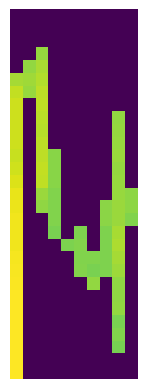

In [3]:
dataset = torch.load('data/dataset.pt')
dataset = dataset.permute(1, 0, 2, 3)
print(dataset.shape)
img = dataset[0, 1].unsqueeze(0)
img = img.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# normalize mass

In [3]:
mass = dataset[:, 1]
mass.mean(), mass.max()

(tensor(2.0332, dtype=torch.float64), tensor(10.9763, dtype=torch.float64))

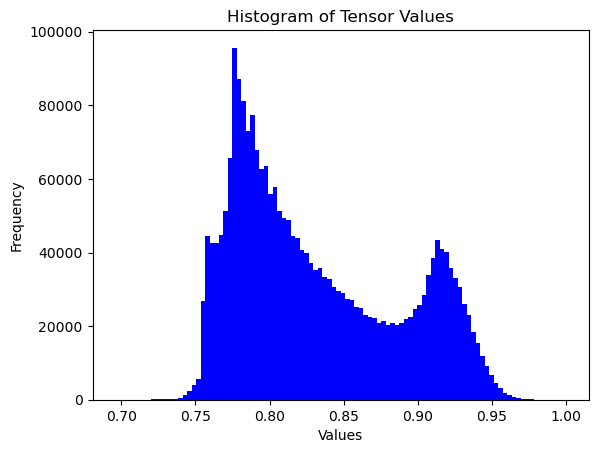

mass values minimum =  0.6958
mass values maximum =  1.0
mass values mean =  0.8322


In [4]:
min_values_mass = mass.min()
max_values_mass = mass.max()
dataset[:, 1] = (mass - min_values_mass) / (max_values_mass - min_values_mass)
mass_norm = dataset[:, 1]

nonzero_mass_ind_normalized = torch.nonzero(mass_norm.flatten())
nonzero_mass_normalized = mass_norm.flatten()[nonzero_mass_ind_normalized[:, 0]]


plt.hist(torch.round(nonzero_mass_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("mass values minimum = ", round(nonzero_mass_normalized.min().item(), 4))
print("mass values maximum = ", round(nonzero_mass_normalized.max().item(), 4))
print("mass values mean = ", round(nonzero_mass_normalized.mean().item(), 4))

reconstructed image:


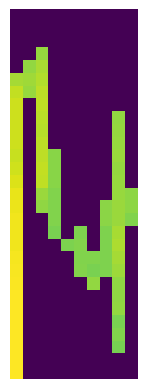

In [5]:
print("reconstructed image:")
img = dataset[0, 1].unsqueeze(0)
img = img.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# reference, 0 - 1 normalization on mass and distance

In [6]:

class Encoder_CGAN(nn.Module):
    def __init__(self, nvar, nsnap, nbr, latent_size, printer):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Conv2d(nvar, 16, kernel_size=(1, 5), stride=1),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(29 * 6 * 16, latent_size),
        )
        
        self.conv1 = nn.Conv2d(nvar, 16, kernel_size=(1, 5), stride=1)
        self.elu = nn.ELU()
        self.linear = nn.Linear(29 * 6 * 16, latent_size)
        self.flatten = nn.Flatten()
        self.printer = printer

    def forward(self, x):
        if self.printer:
            print("\Encoder:")
            print("input:", x.shape)
            x = self.elu(self.conv1(x))
            print("1:", x.shape)
            x = self.flatten(x)
            print("2", x.shape)
            x = self.linear(x)
            print("3", x.shape)

            return x
        else:
            return self.layers(x)

class Generator_CGAN(nn.Module):
    def __init__(self, nvar, nsnap, nbr, latent_size, printer):
        super().__init__()

        self.layers = nn.Sequential(
            nn.ConvTranspose2d(16, nvar, kernel_size=(1, 5), stride=1),
            nn.Sigmoid()
        )
        
        self.linear = nn.Linear(latent_size, 29 * 6 * 16)
        self.elu = nn.ELU()
        self.deconv1 = nn.ConvTranspose2d(16, nvar, kernel_size=(1, 5), stride=1)
        self.sigmoid = nn.Sigmoid() # since input is normalized to [0, 1]
        self.printer = printer

    def forward(self, x):
        if self.printer:
            print("\nGenerator:")
            print("input:", x.shape)
            x = self.elu(self.linear(x))
            print("1:", x.shape)
            x = x.view(-1, 16, 29, 6)
            print("2:", x.shape)
            x = self.sigmoid(self.deconv1(x))
            print("3", x.shape)
            return x
        else:
            x = self.elu(self.linear(x))
            x = x.view(-1, 16, 29, 6)

            return self.layers(x)
        
class AE(torch.nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

# helping functions

# reference

0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.20it/s]


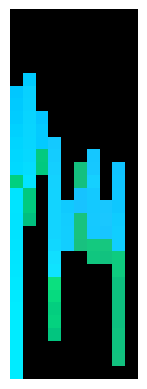

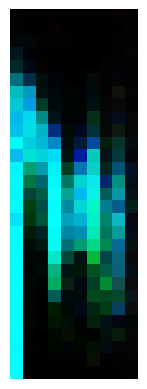

distance:


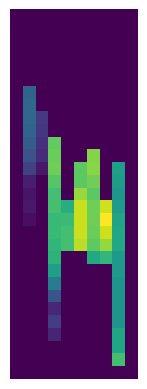

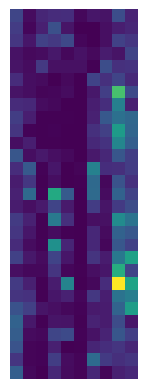

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.93it/s]


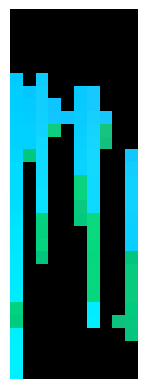

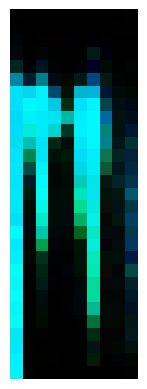

distance:


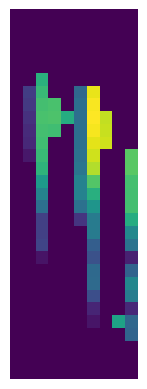

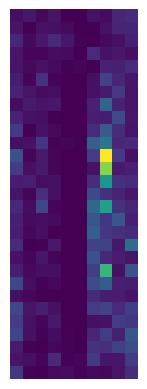

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]


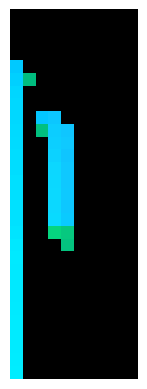

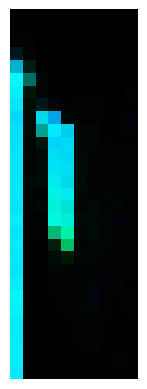

distance:


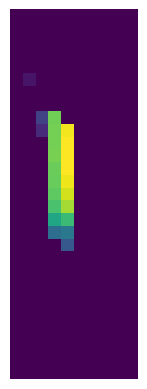

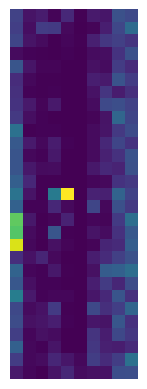

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.85it/s]


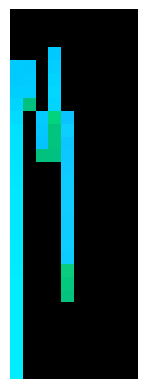

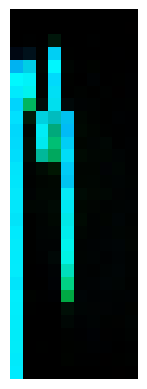

distance:


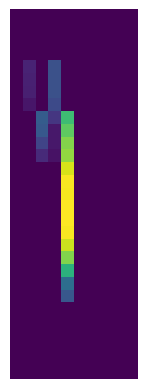

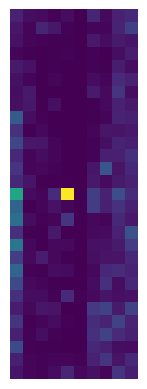

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.44it/s]


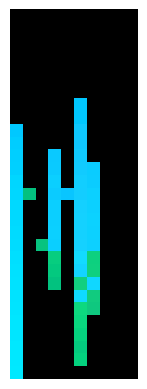

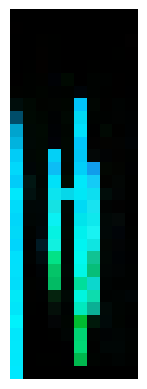

distance:


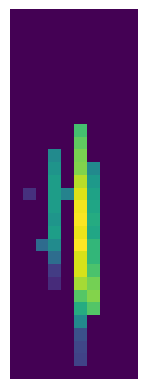

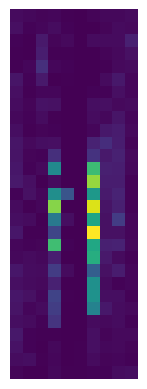

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.39it/s]


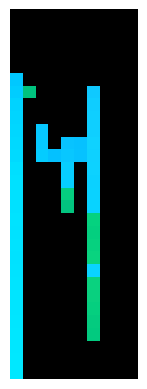

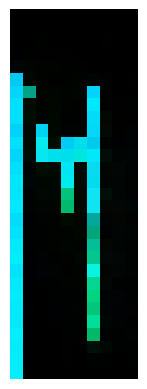

distance:


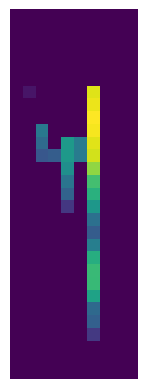

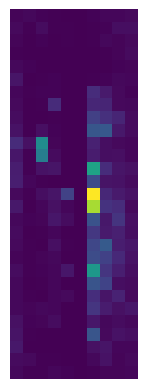

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.58it/s]


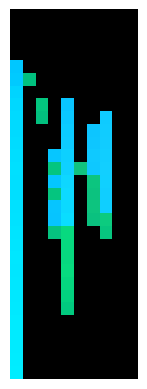

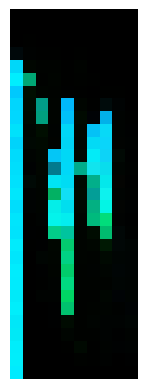

distance:


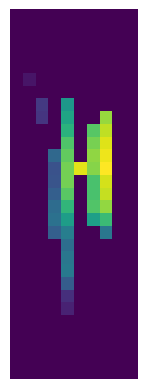

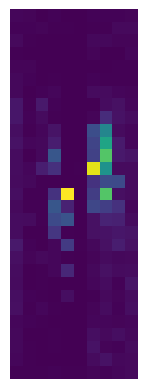

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.77it/s]


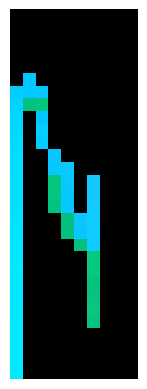

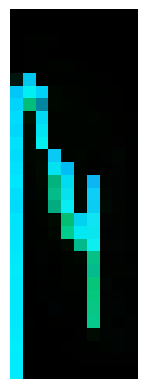

distance:


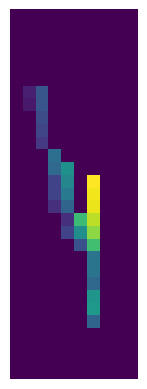

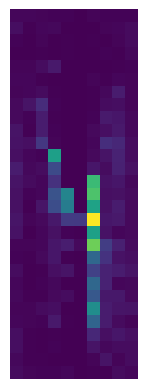

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.58it/s]


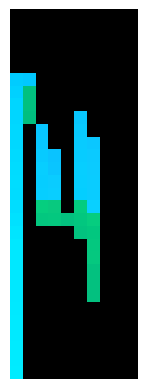

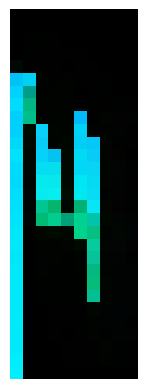

distance:


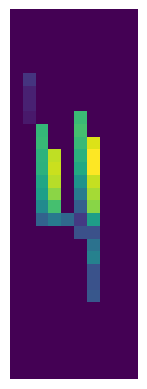

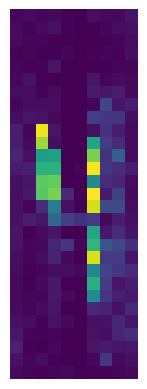

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.40it/s]


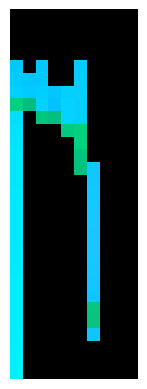

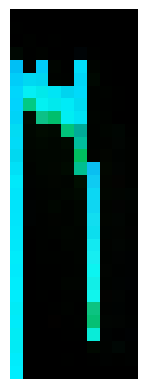

distance:


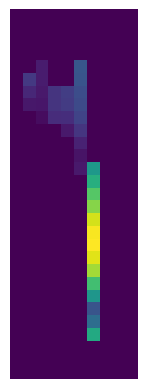

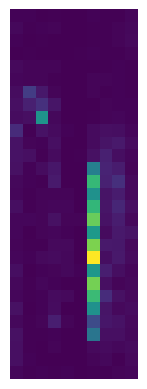

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.35it/s]


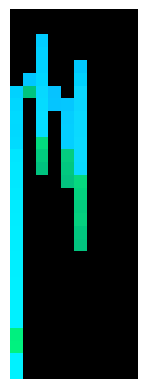

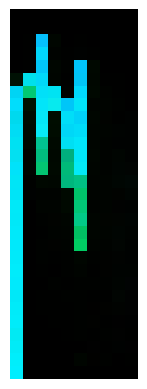

distance:


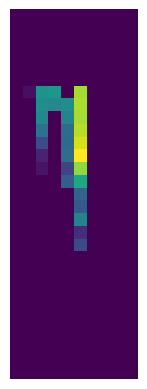

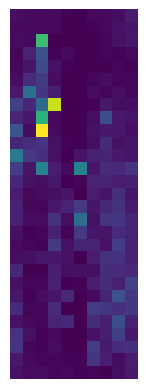

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.32it/s]


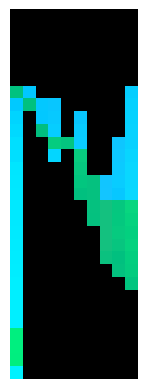

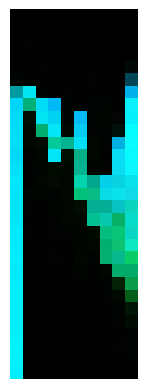

distance:


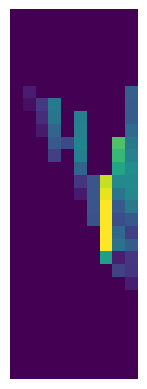

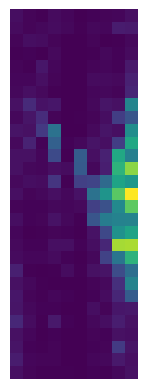

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


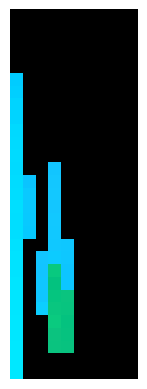

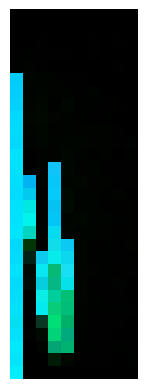

distance:


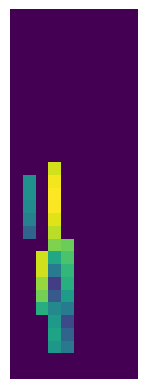

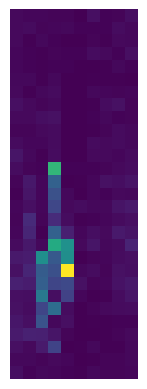

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.53it/s]


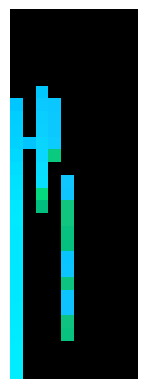

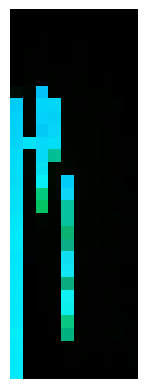

distance:


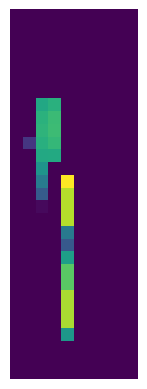

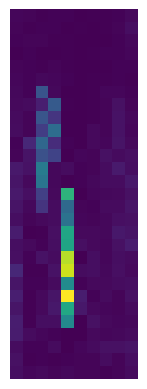

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.66it/s]


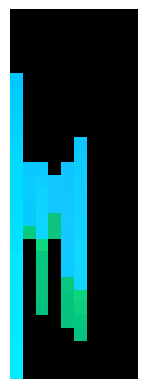

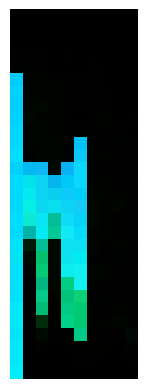

distance:


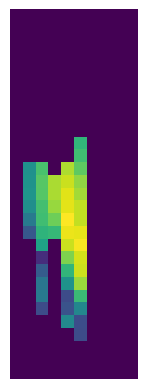

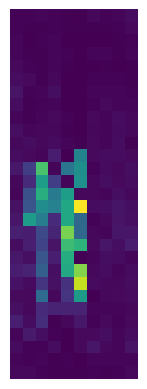

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.56it/s]


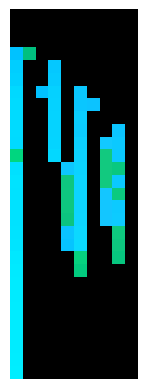

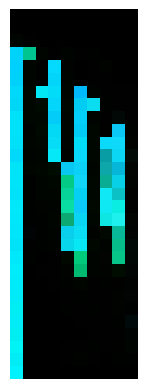

distance:


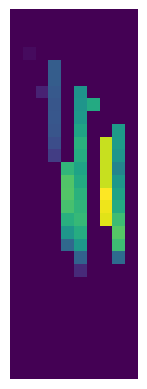

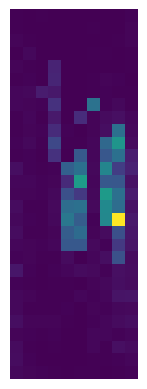

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.77it/s]


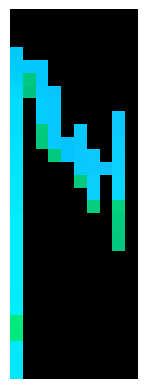

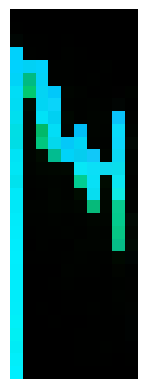

distance:


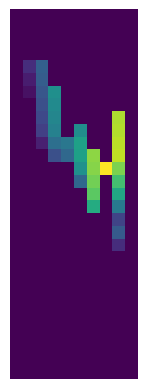

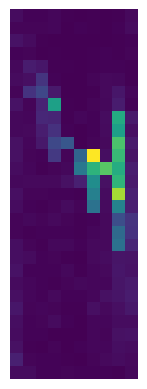

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.67it/s]


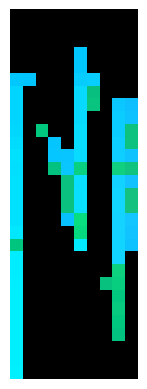

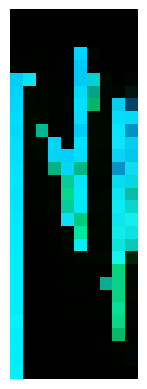

distance:


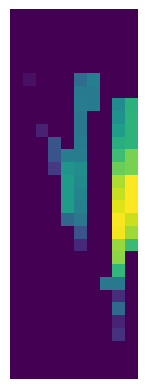

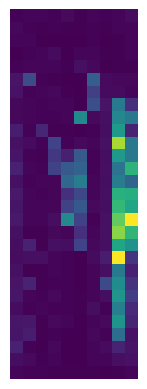

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.57it/s]


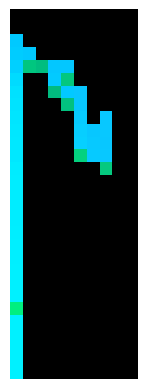

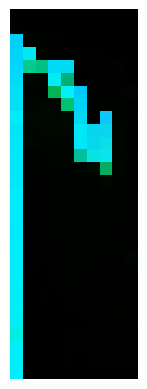

distance:


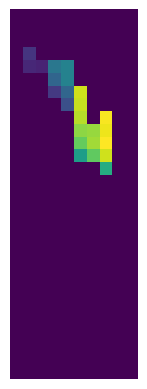

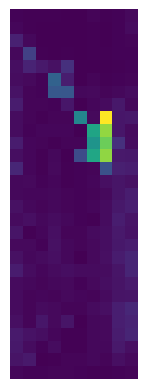

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.72it/s]


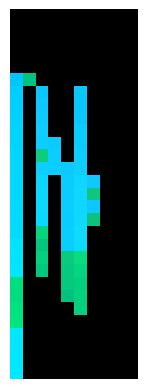

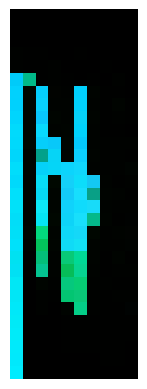

distance:


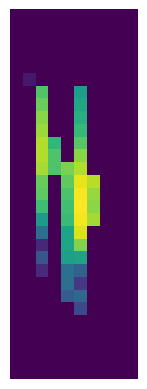

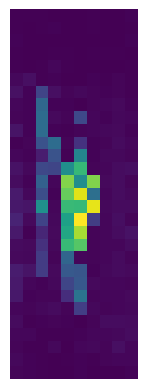

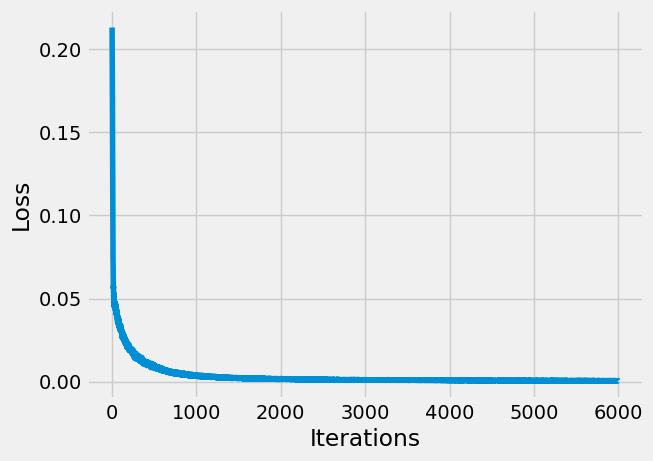

In [9]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(dataset_zero_one, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [9]:
def analyze_notebook3_0(reconstructed_images, images):
    reconstructed = torch.cat(reconstructed_images, dim = 0)
    images = torch.cat(images, dim = 0)

    reconstructed_dist = reconstructed[:, 0]
    image_dist = images[:, 0]

    print("\nOverall:")
    print("\nChecking zero values in reconstructed image:")
    print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
    print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
    zero_count = (reconstructed == 0).sum().item()
    total_elements = reconstructed.numel()
    percentage_zero = (zero_count / total_elements) * 100
    print("Percentage of zero elements:", round(percentage_zero, 2), "%")

    print("\nChecking zero values in original image:")
    print(f"minimum value in reconstructed image = {images.min():.6f}")
    print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
    zero_count = (images == 0).sum().item()
    total_elements = images.numel()
    percentage_zero = (zero_count / total_elements) * 100
    print("Percentage of zero elements:", round(percentage_zero, 2), "%")

    have_same_zero_values(images, reconstructed)


    print("\n")
    print("\n")
    print("\nDistance")
    print("\nChecking zero values in reconstructed image:")
    print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
    print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
    zero_count = (reconstructed_dist == 0).sum().item()
    total_elements = reconstructed_dist.numel()
    percentage_zero = (zero_count / total_elements) * 100
    print("Percentage of zero elements:", round(percentage_zero, 2), "%")

    print("\nChecking zero values in original image:")
    print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
    print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
    zero_count = (image_dist == 0).sum().item()
    total_elements = image_dist.numel()
    percentage_zero = (zero_count / total_elements) * 100
    print("Percentage of zero elements:", round(percentage_zero, 2), "%")

    have_same_zero_values(image_dist, reconstructed_dist)

In [46]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000001
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %


In [10]:
def have_same_zero_values(tensor1, tensor2):
    # Create boolean masks for zero values
    zero_mask1 = (tensor1 == 0)
    zero_mask2 = (tensor2 == 0)
    
    # Compare the boolean masks
    print("the two tensors have zeroes in the same spots =", torch.all(zero_mask1 == zero_mask2).item())
    
    percentage = 100 * torch.sum(zero_mask1 == zero_mask2) / len(zero_mask1.flatten())
    
    print(f"the two tensors have zeroes and nonzero values in {percentage:.2f}% of the same spots")
    
    return


In [24]:
have_same_zero_values(image_dist, reconstructed_dist)

the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 13.65% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 10.69% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000019
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 89.31 %


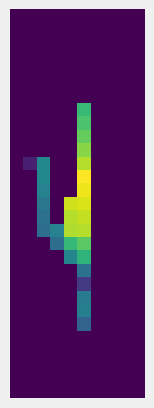

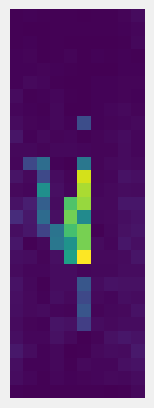

In [40]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# normalize distance #1 - log scaling with minmax normalization

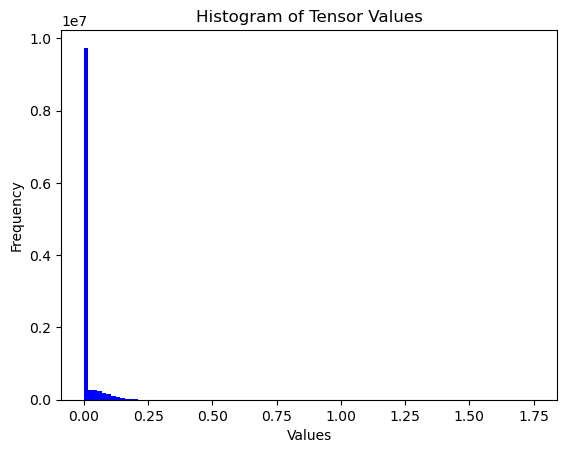

In [9]:
dist = dataset[:, 0].clone()
plt.hist(torch.round(dist.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

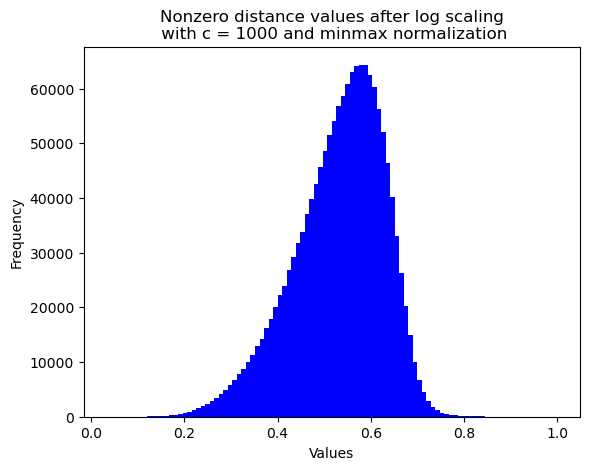

dist values minimum =  0.0323
dist values maximum =  1.0
dist values mean =  0.5318


In [6]:
def log_normalization(tensor, in_scale = 1, in_add = 1):
    return torch.log10(in_scale * tensor + in_add)

dist = dataset[:, 0].clone()

scale_in_dist = 1000
log_normalized_dist = log_normalization(dist, in_scale = scale_in_dist)

min_values_log_dist = log_normalized_dist.min()
max_values_log_dist = log_normalized_dist.max()
logg_dist_normalized = (log_normalized_dist - min_values_log_dist) / (max_values_log_dist - min_values_log_dist)


nonzero_log_dist_ind_normalized = torch.nonzero(logg_dist_normalized.flatten())
nonzero_log_dist_normalized = logg_dist_normalized.flatten()[nonzero_log_dist_ind_normalized[:, 0]]


plt.hist(torch.round(nonzero_log_dist_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Nonzero distance values after log scaling\n with c = 1000 and minmax normalization')

# Show the plot
plt.show()

print("dist values minimum = ", round(nonzero_log_dist_normalized.min().item(), 4))
print("dist values maximum = ", round(nonzero_log_dist_normalized.max().item(), 4))
print("dist values mean = ", round(nonzero_log_dist_normalized.mean().item(), 4))

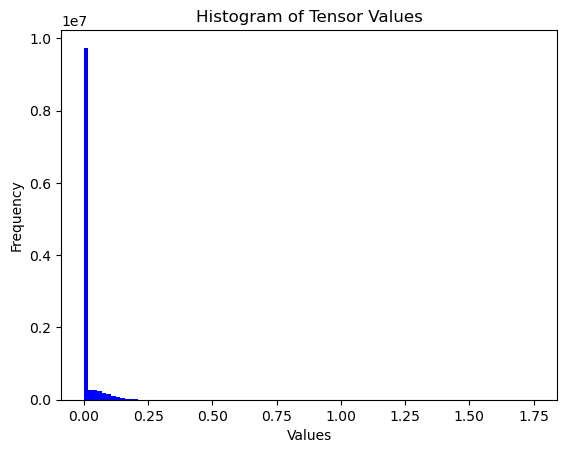

In [33]:
test = reset_normalize(logg_dist_normalized)
plt.hist(test.flatten().numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

In [26]:
def unnormalize(tensor, mini = 0, maxi = 3.2445):
    
    return tensor * (maxi - mini) + mini
    
def de_log_normalization(tensor, in_scale = 1000, in_add = 1):
    
    return ((10 ** tensor) - in_add) / in_scale

def reset_normalize(tensor):
    return de_log_normalization(unnormalize(tensor))

In [12]:
log_norm_dist_dataset = dataset.clone()

log_norm_dist_dataset[:, 0] = logg_dist_normalized
log_norm_dist_dataset.shape, log_norm_dist_dataset[:, 0].max(), log_norm_dist_dataset[:, 0].mean()

(torch.Size([38348, 3, 29, 10]),
 tensor(1., dtype=torch.float64),
 tensor(0.0726, dtype=torch.float64))

In [13]:
print(log_norm_dist_dataset[:, 0].min())
print(log_norm_dist_dataset[:, 0].max())
print(log_norm_dist_dataset[:, 0].mean())

print(log_norm_dist_dataset[:, 1].min())
print(log_norm_dist_dataset[:, 1].max())
print(log_norm_dist_dataset[:, 1].mean())

print(log_norm_dist_dataset[:, 2].min())
print(log_norm_dist_dataset[:, 2].max())
print(log_norm_dist_dataset[:, 2].mean())


tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.0726, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.1852, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.1964, dtype=torch.float64)


0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


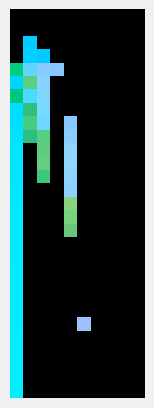

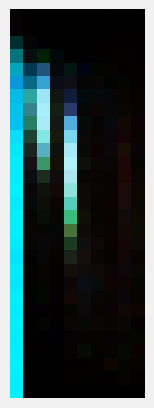

distance:


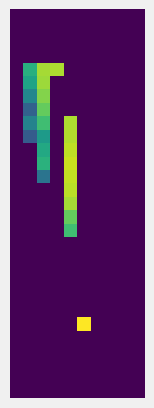

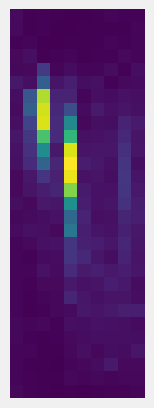

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.53it/s]


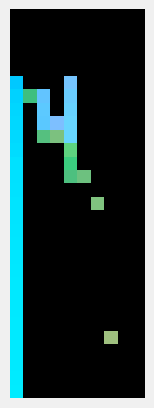

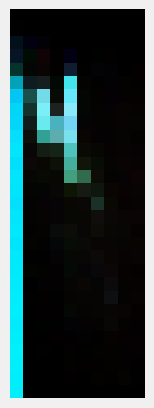

distance:


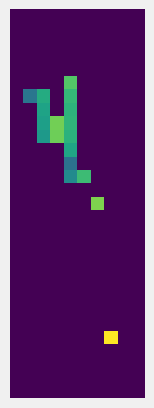

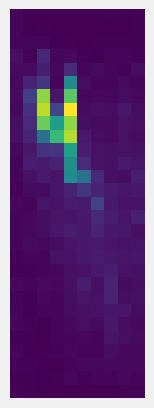

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.87it/s]


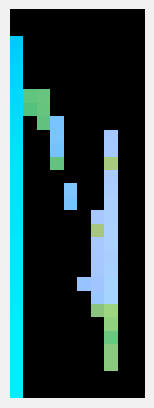

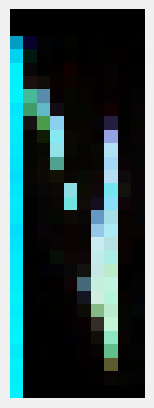

distance:


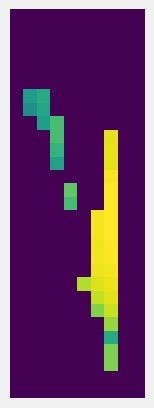

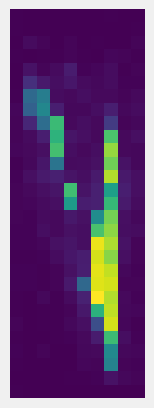

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.87it/s]


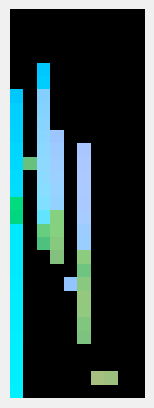

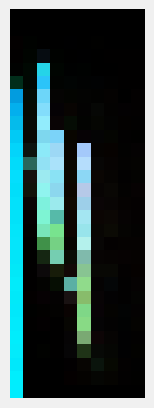

distance:


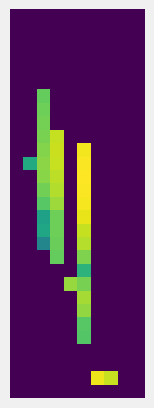

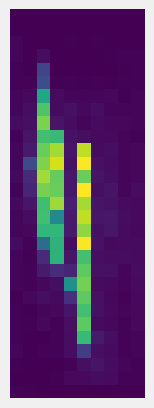

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.70it/s]


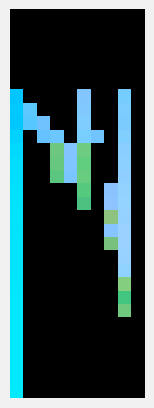

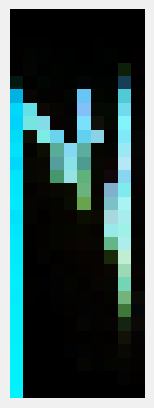

distance:


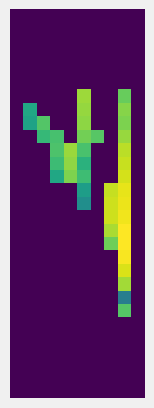

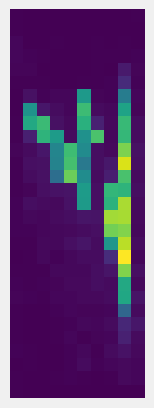

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.91it/s]


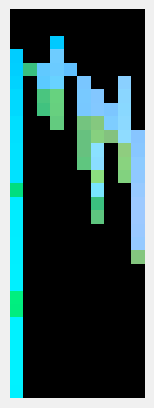

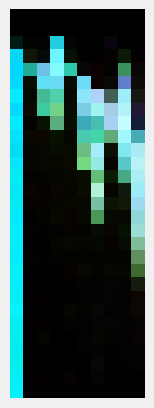

distance:


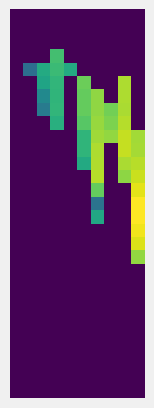

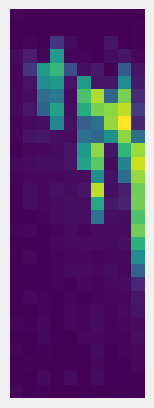

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.93it/s]


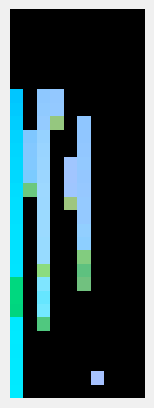

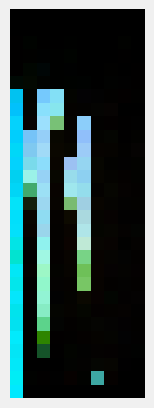

distance:


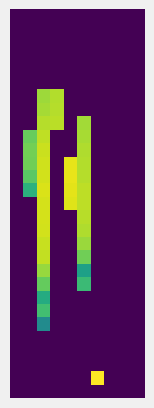

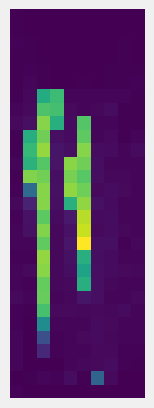

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.41it/s]


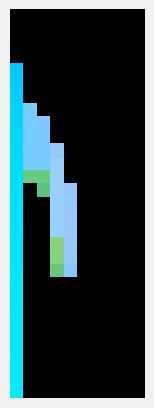

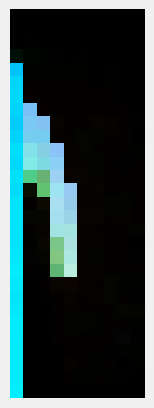

distance:


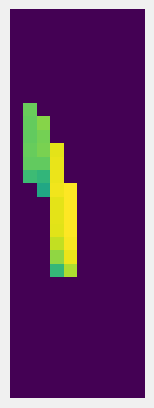

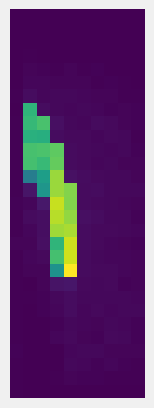

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.56it/s]


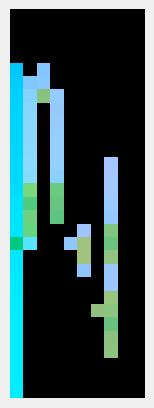

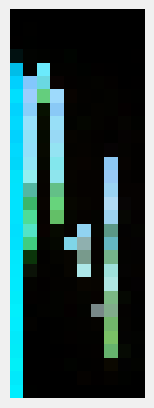

distance:


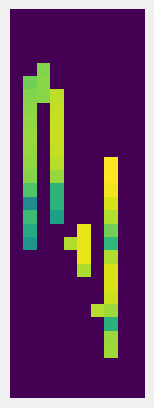

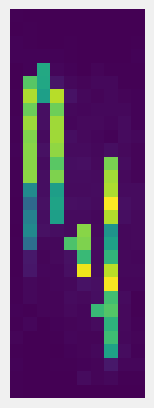

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.46it/s]


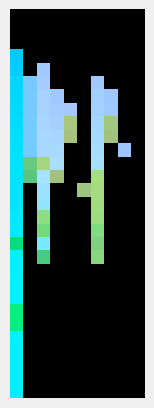

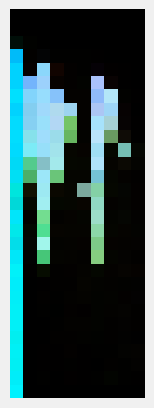

distance:


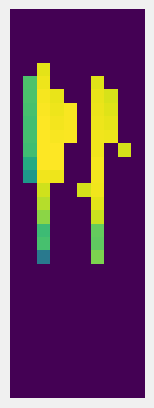

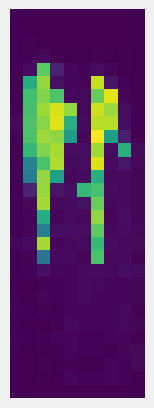

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.42it/s]


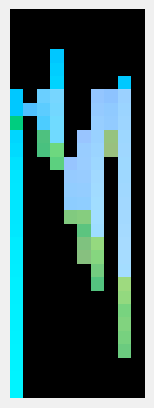

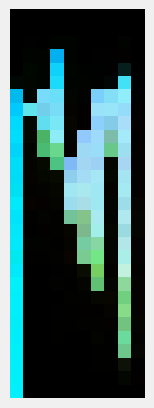

distance:


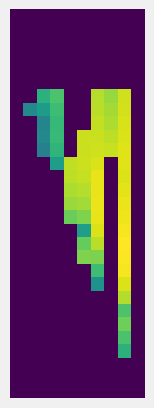

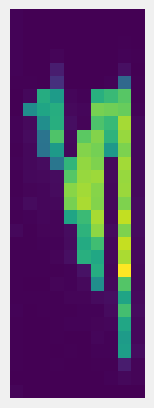

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.50it/s]


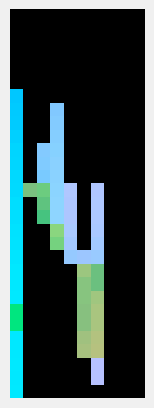

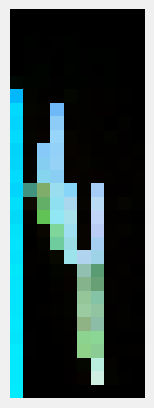

distance:


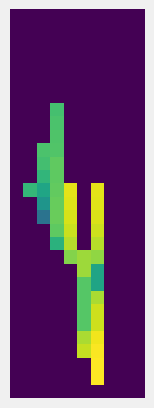

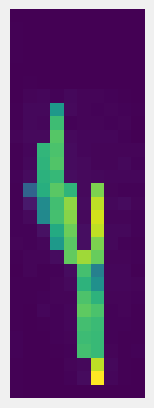

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.56it/s]


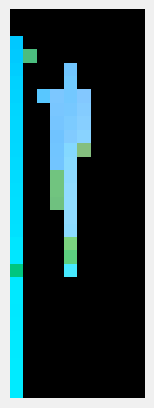

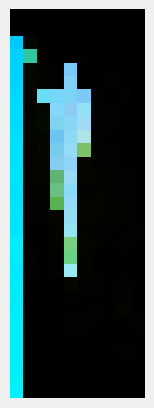

distance:


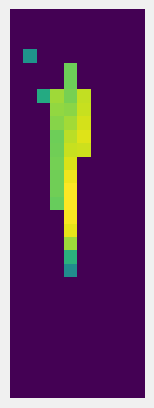

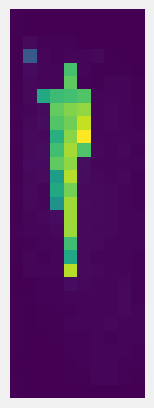

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


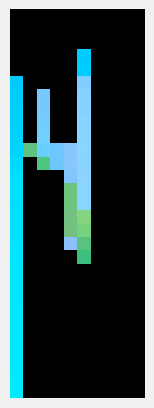

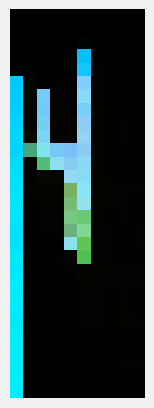

distance:


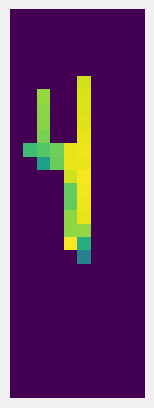

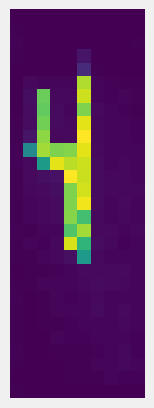

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.60it/s]


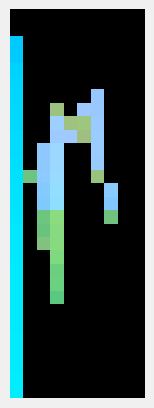

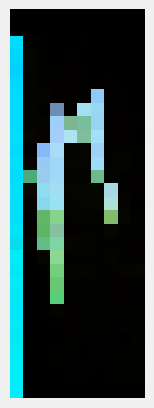

distance:


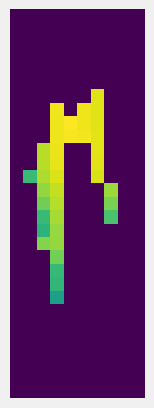

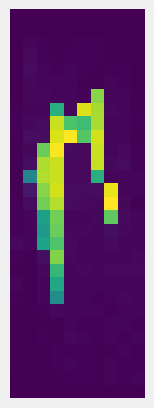

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.33it/s]


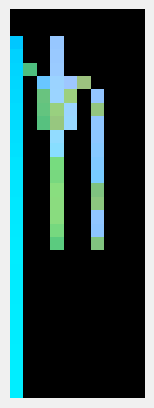

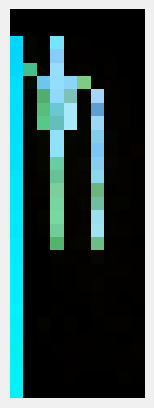

distance:


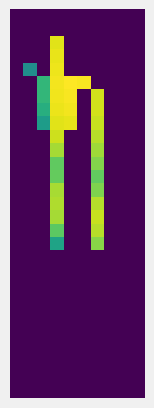

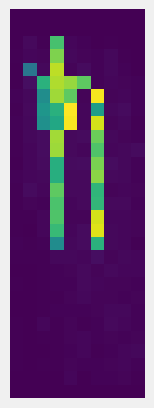

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


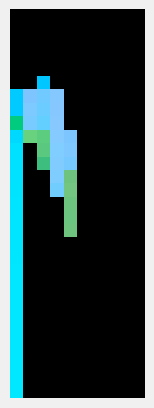

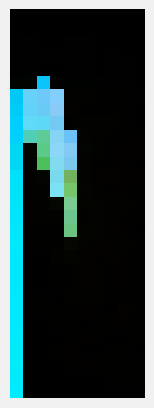

distance:


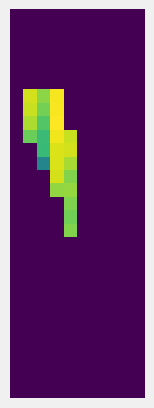

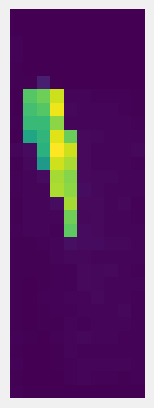

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.61it/s]


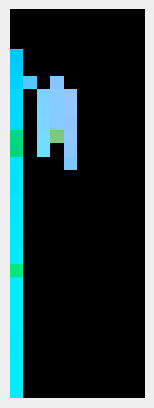

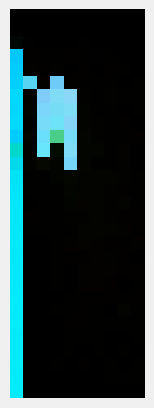

distance:


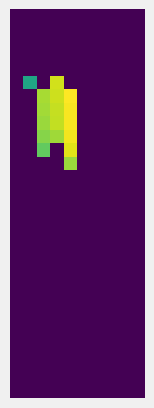

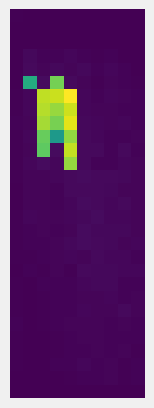

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.47it/s]


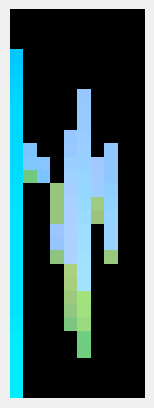

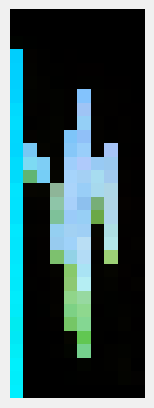

distance:


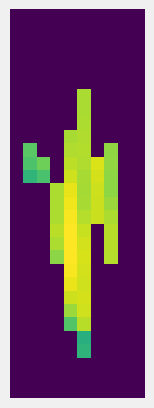

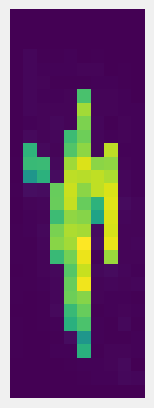

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.36it/s]


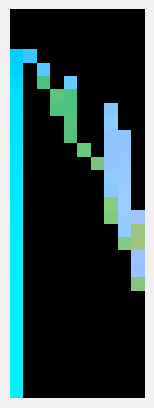

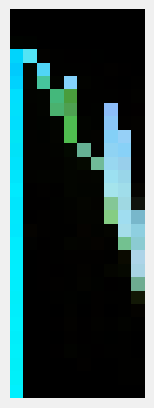

distance:


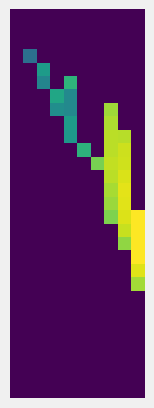

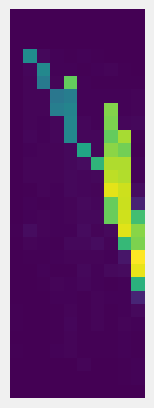

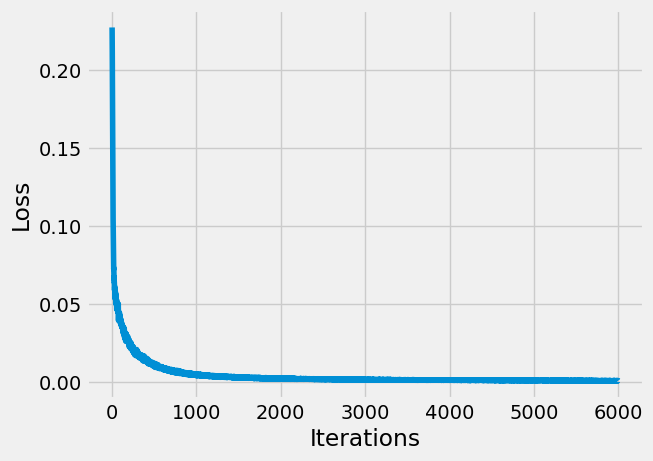

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(log_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

# test log scale and minmax normalization

In [12]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)

NameError: name 'reconstructed_images_small' is not defined

the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 21.03% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000012
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 78.97 %


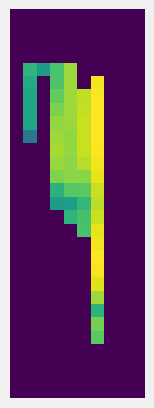

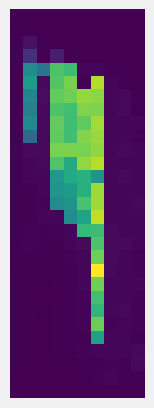

In [48]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# normalize distance #2 - clipping with minmax normalization

In [12]:
clip_norm_dist_dataset = dataset.clone()

dist = clip_norm_dist_dataset[:, 0].clone()

def threshold_tensor(tensor, threshold_value, replace_value):
    thresholded_tensor = torch.where(tensor > threshold_value, replace_value, tensor)
    return thresholded_tensor

threshold_value = 0.2
replace_value = 0.2
clipped_dist = threshold_tensor(dist, threshold_value, replace_value)


# minmax normalize between 0 and 1
min_values = clipped_dist.min()
max_values = clipped_dist.max()
normalized_clipped_dataset = (clipped_dist - min_values) / (max_values - min_values)

print(normalized_clipped_dataset.min(), normalized_clipped_dataset.max(), normalized_clipped_dataset.mean())

clip_norm_dist_dataset[:, 0] = normalized_clipped_dataset

print(clip_norm_dist_dataset[:, 0].min(), clip_norm_dist_dataset[:, 0].max(), clip_norm_dist_dataset[:, 0].mean())

tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.0446, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.0446, dtype=torch.float64)


0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


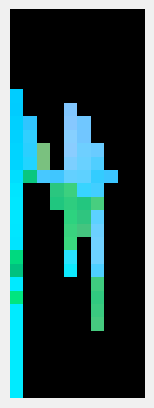

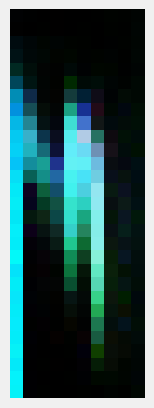

distance:


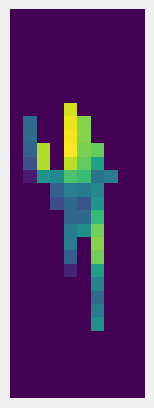

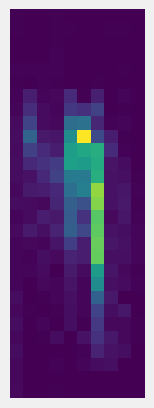

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.71it/s]


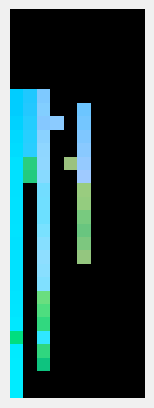

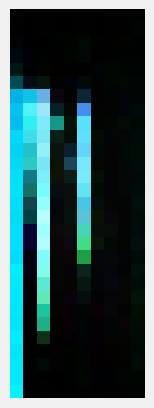

distance:


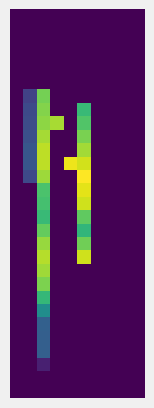

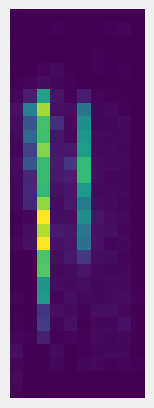

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.50it/s]


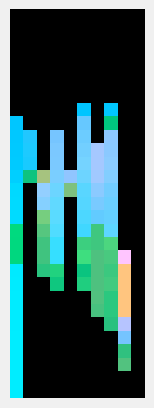

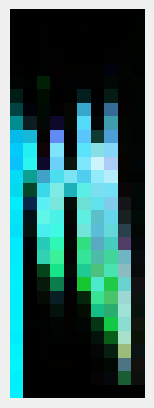

distance:


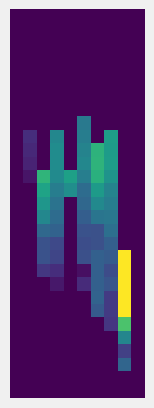

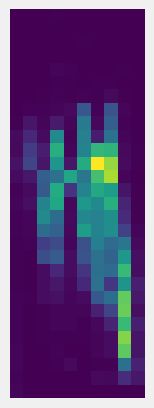

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.07it/s]


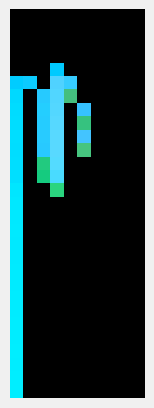

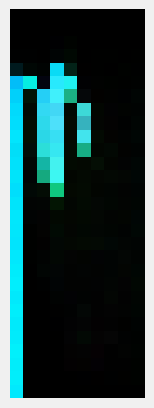

distance:


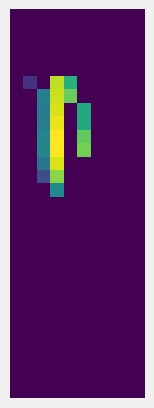

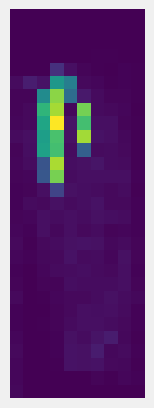

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.93it/s]


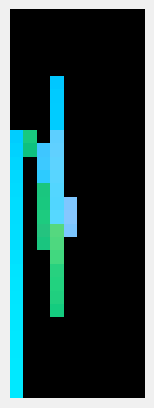

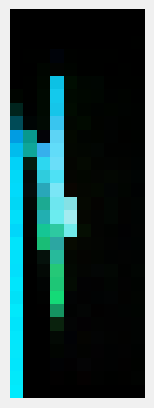

distance:


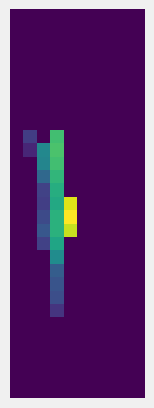

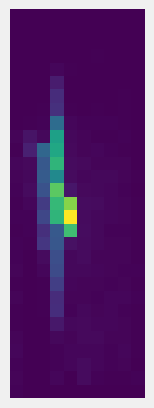

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.81it/s]


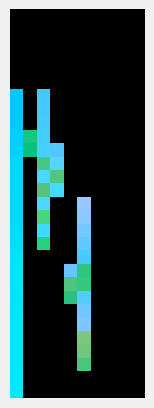

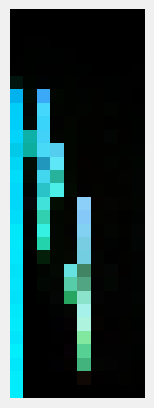

distance:


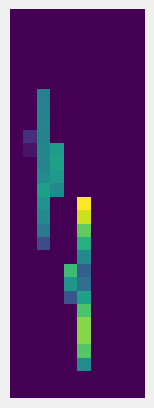

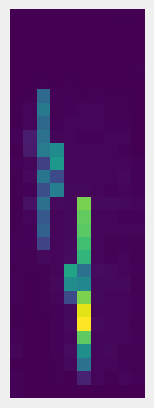

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.45it/s]


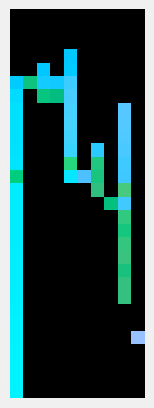

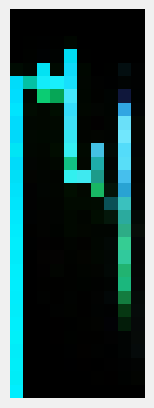

distance:


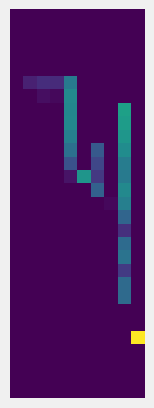

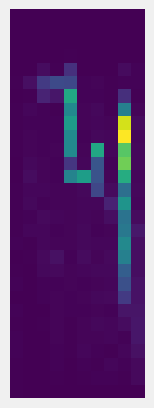

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.61it/s]


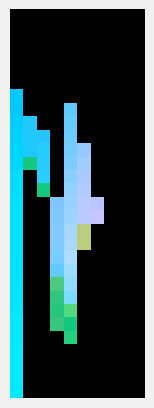

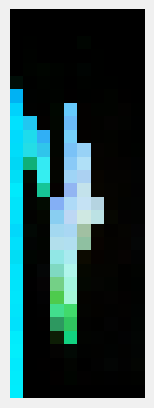

distance:


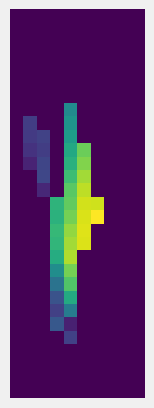

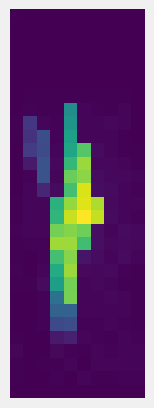

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.54it/s]


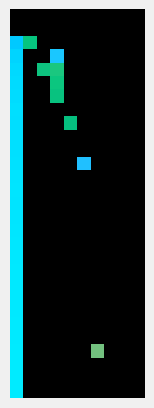

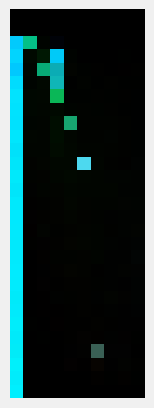

distance:


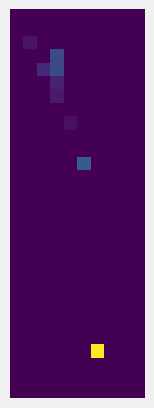

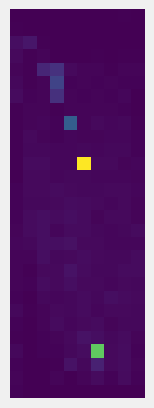

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.64it/s]


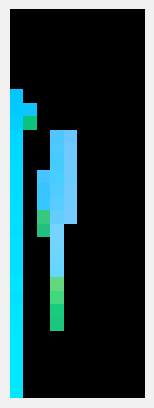

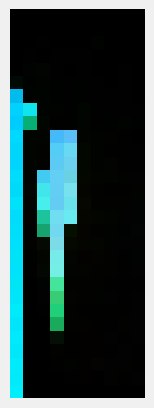

distance:


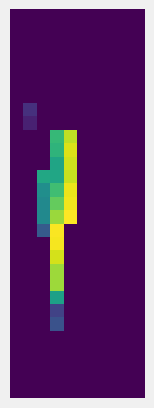

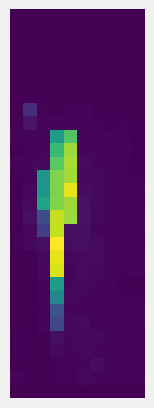

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.33it/s]


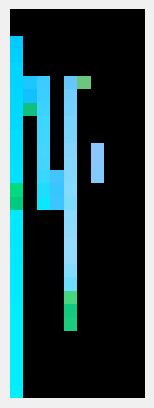

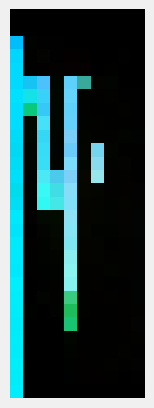

distance:


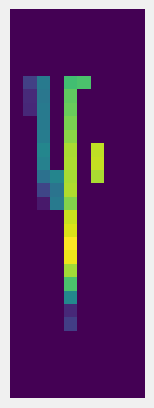

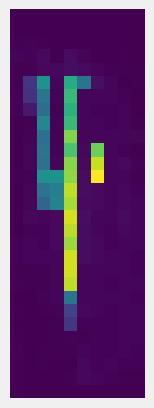

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.85it/s]


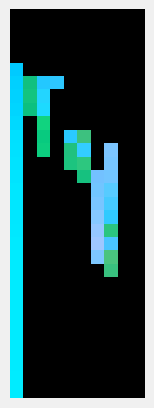

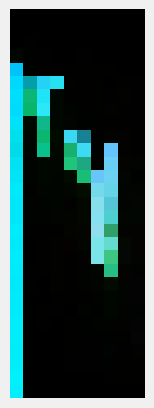

distance:


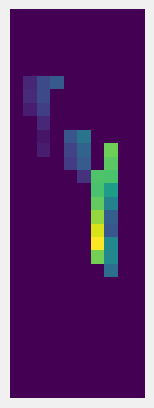

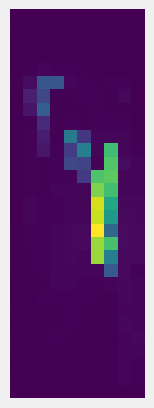

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.18it/s]


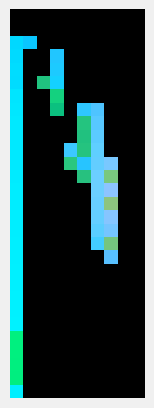

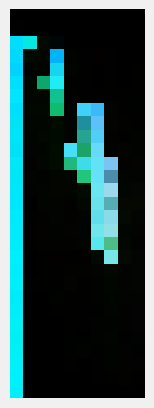

distance:


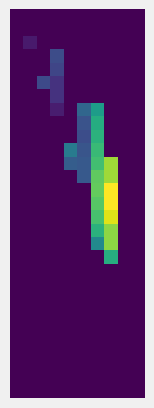

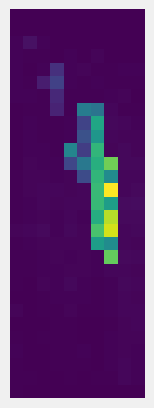

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.45it/s]


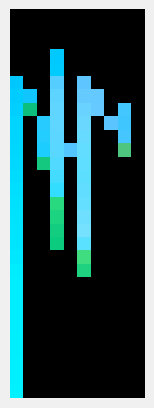

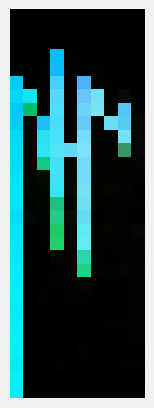

distance:


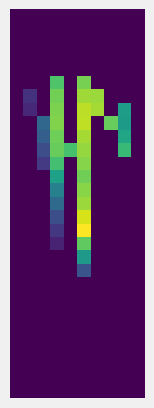

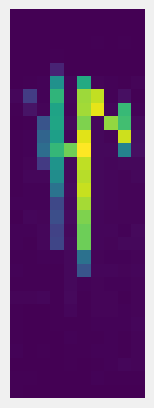

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.64it/s]


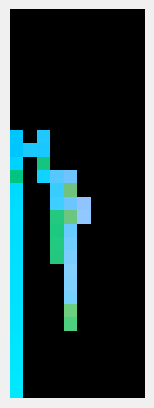

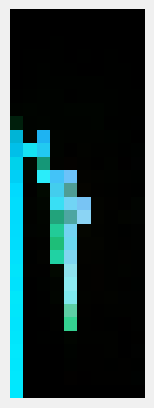

distance:


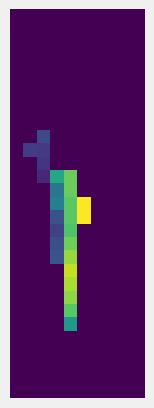

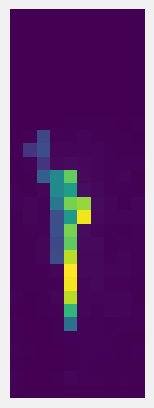

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.63it/s]


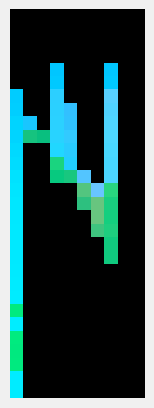

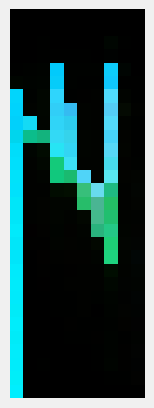

distance:


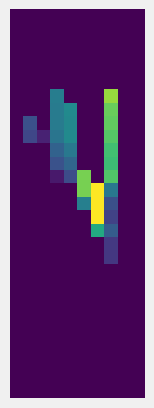

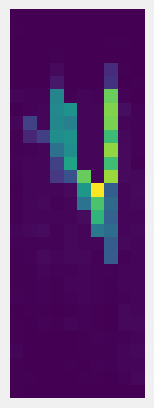

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.64it/s]


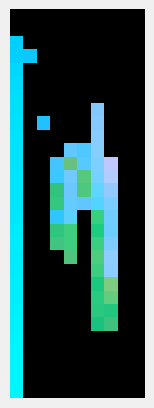

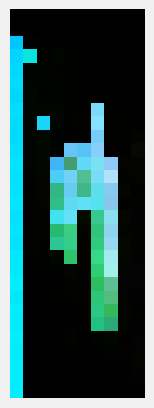

distance:


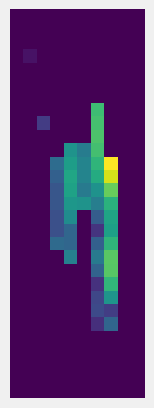

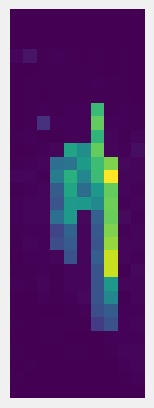

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.84it/s]


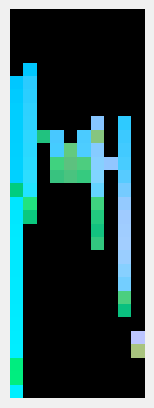

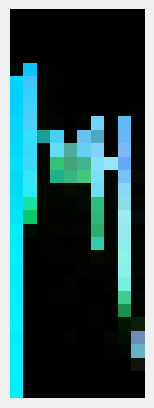

distance:


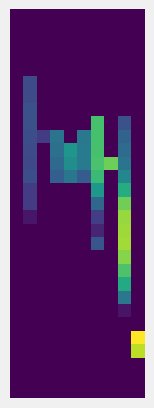

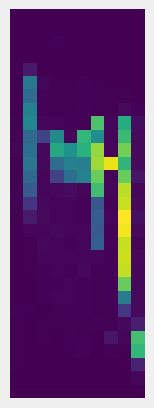

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]


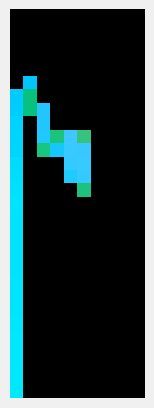

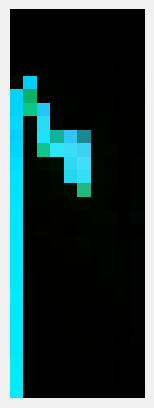

distance:


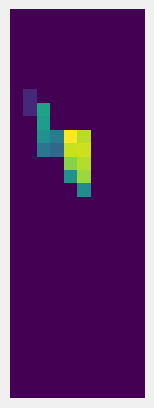

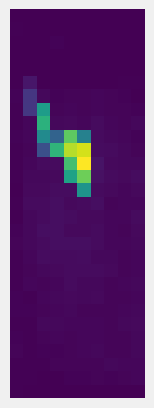

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.64it/s]


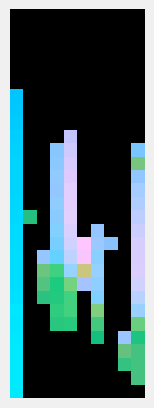

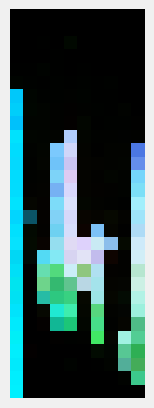

distance:


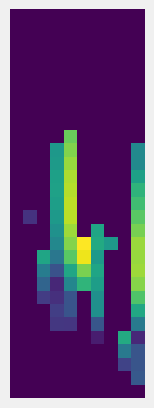

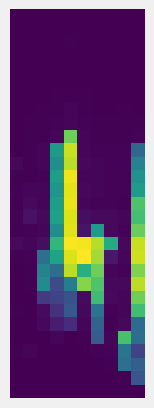

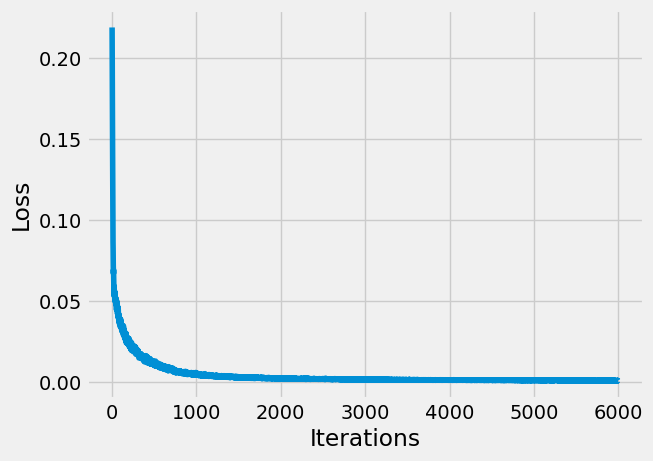

In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(clip_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [67]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.8f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.00000033
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 13.65% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 5.52% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000001
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.48 %


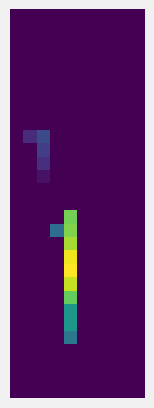

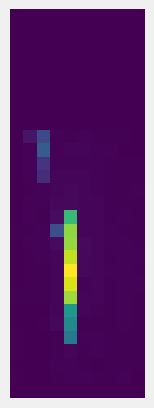

In [68]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# pushing nonzero values up with 0.5 then normalizing

min =  tensor(0., dtype=torch.float64)
max =  tensor(2.2550, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.0343, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.0343, dtype=torch.float64)


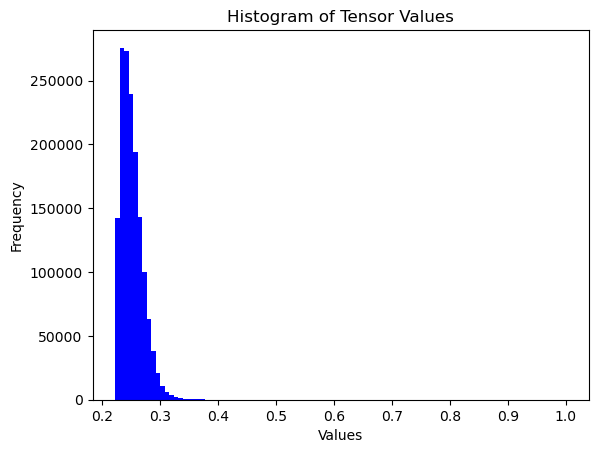

nonzero distance added 0.5 values minimum =  0.2219
nonzero distance added 0.5 values maximum =  1.0
nonzero distance added 0.5 values mean =  0.2509


In [13]:
push_norm_dist_dataset = dataset.clone()

dist = push_norm_dist_dataset[:, 0].clone()

def add_value(tensor, value = 0.5):
    tensor1 = tensor.clone()
    
    
    nonzero_mask = tensor1 != 0

    # Add 0.5 to nonzero values
    tensor1[nonzero_mask] += value
    
    return tensor1

dist_add_values = add_value(dist, 0.5)

min_values_add_dist = dist_add_values.min()
max_values_add_dist = dist_add_values.max()
print("min = ", min_values_add_dist)
print("max = ", max_values_add_dist)
add_dist_normalized = (dist_add_values - min_values_add_dist) / (max_values_add_dist - min_values_add_dist)

print(add_dist_normalized.min(), add_dist_normalized.max(), add_dist_normalized.mean())

push_norm_dist_dataset[:, 0] = add_dist_normalized

print(push_norm_dist_dataset[:, 0].min(), push_norm_dist_dataset[:, 0].max(), push_norm_dist_dataset[:, 0].mean())

nonzer_dist_add_value = torch.nonzero(push_norm_dist_dataset[:, 0].flatten())
nonzero_dist_add_value = push_norm_dist_dataset[:, 0].flatten()[nonzer_dist_add_value[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_dist_add_value.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance added 0.5 values minimum = ", round(nonzero_dist_add_value.min().item(), 4))
print("nonzero distance added 0.5 values maximum = ", round(nonzero_dist_add_value.max().item(), 4))
print("nonzero distance added 0.5 values mean = ", round(nonzero_dist_add_value.mean().item(), 4))

0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.37it/s]


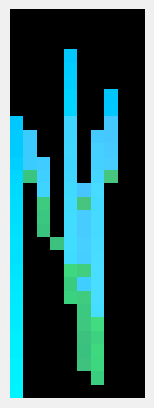

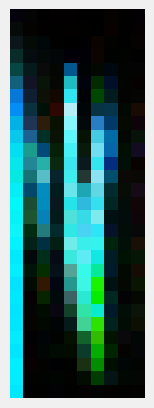

distance:


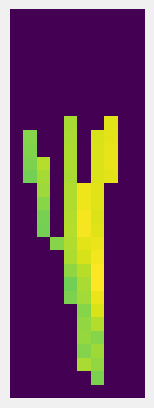

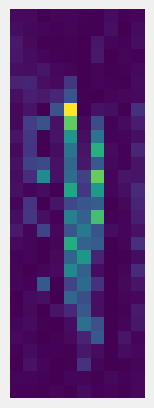

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.70it/s]


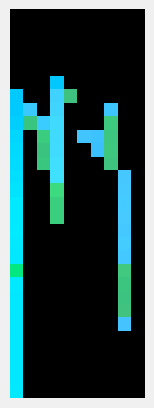

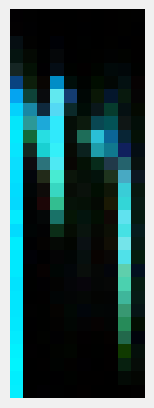

distance:


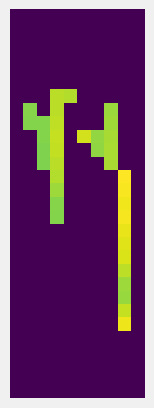

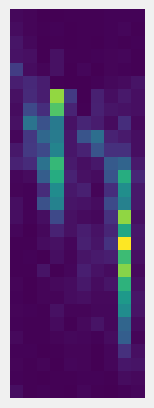

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.54it/s]


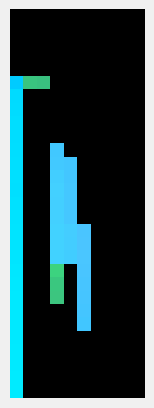

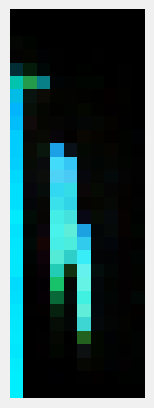

distance:


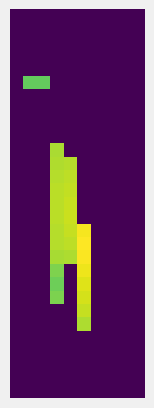

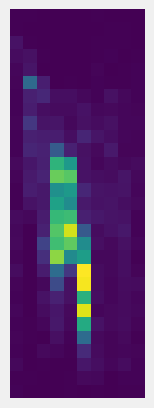

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.84it/s]


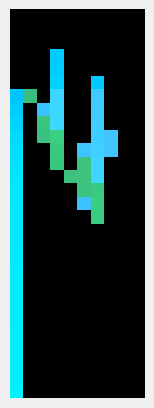

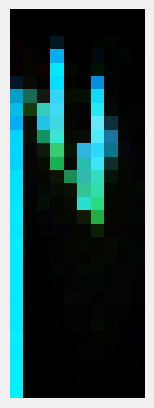

distance:


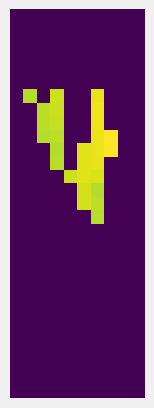

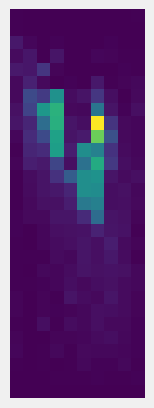

4/20


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.68it/s]


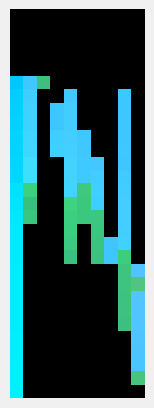

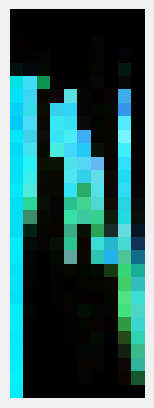

distance:


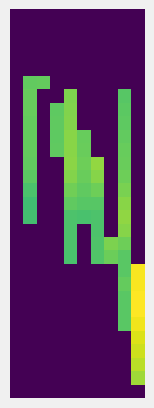

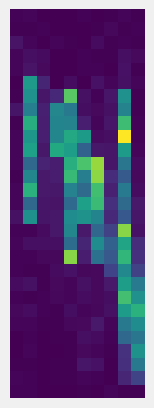

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.46it/s]


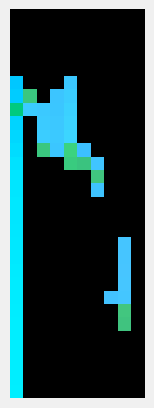

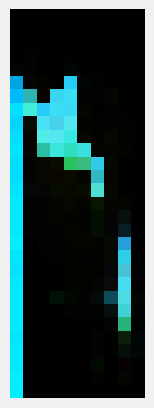

distance:


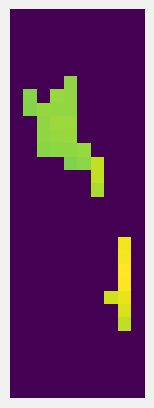

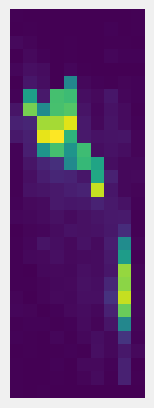

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.58it/s]


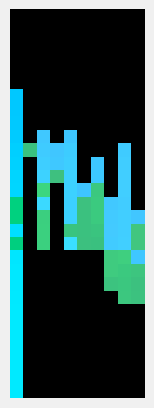

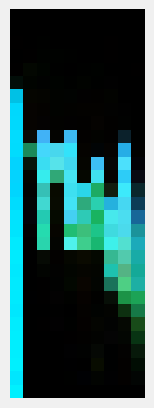

distance:


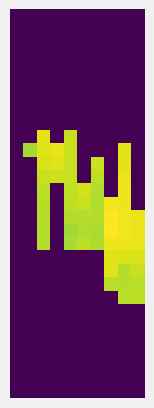

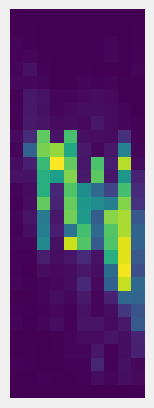

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.47it/s]


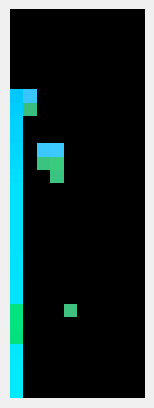

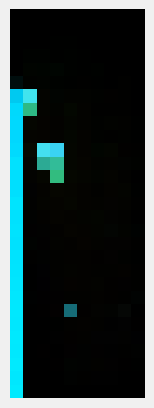

distance:


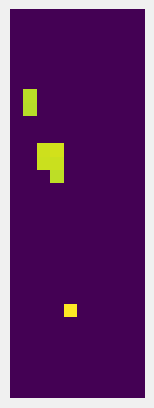

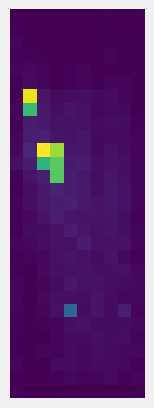

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.71it/s]


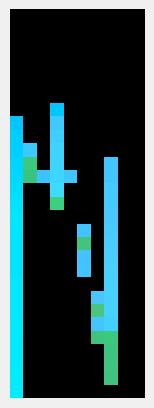

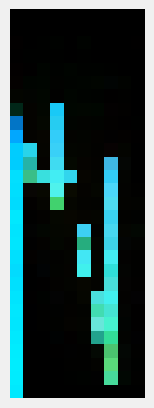

distance:


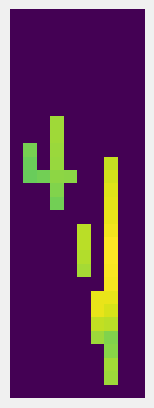

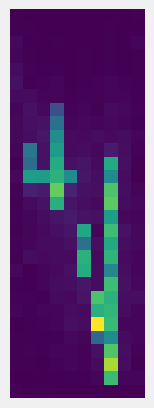

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.53it/s]


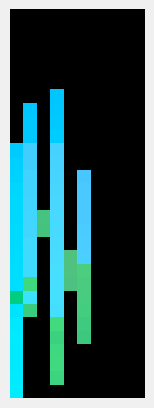

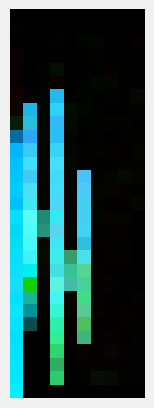

distance:


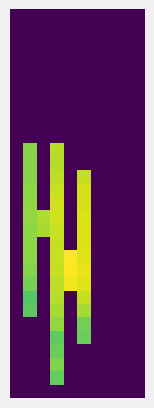

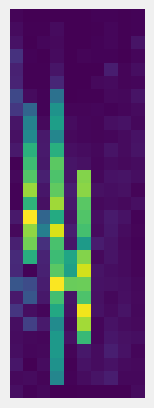

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.44it/s]


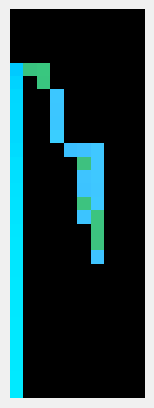

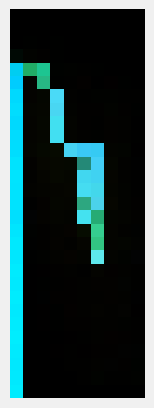

distance:


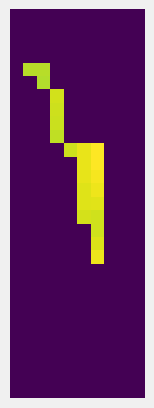

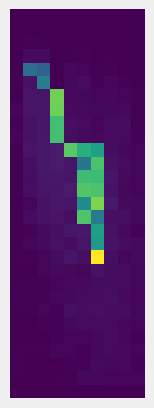

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.68it/s]


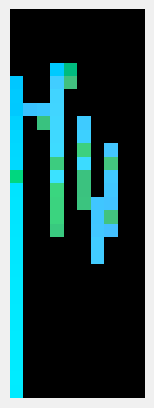

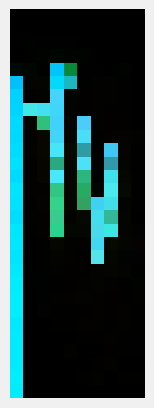

distance:


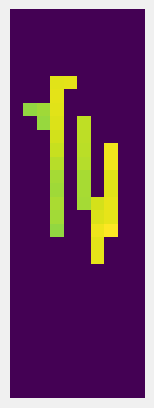

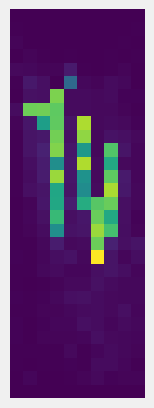

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.40it/s]


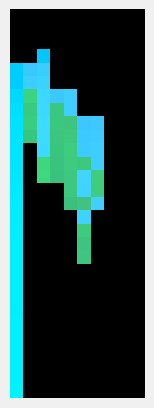

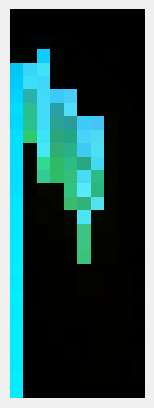

distance:


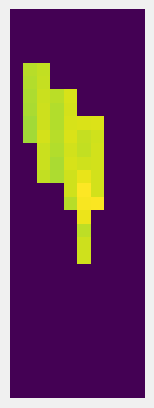

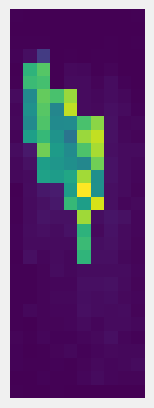

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.23it/s]


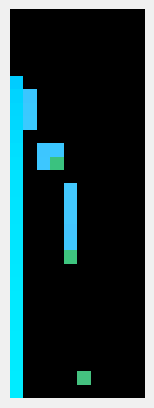

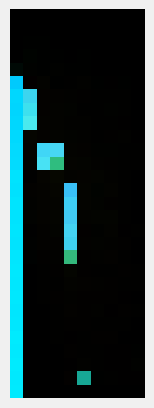

distance:


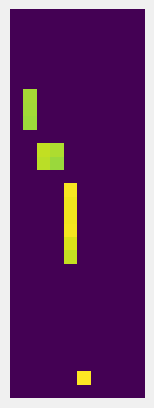

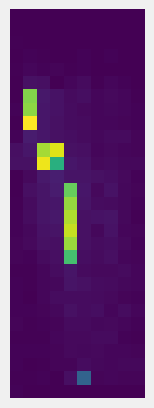

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.84it/s]


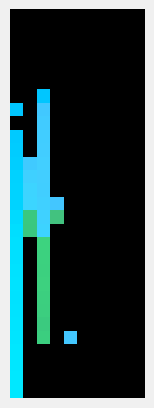

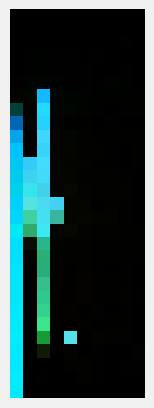

distance:


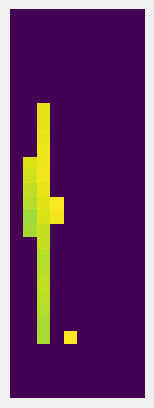

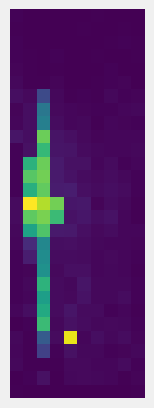

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.90it/s]


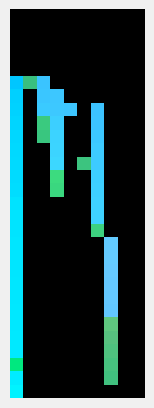

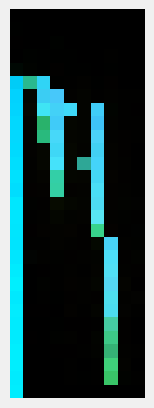

distance:


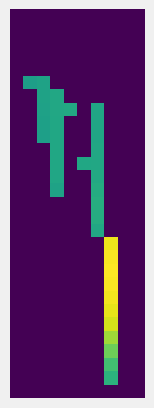

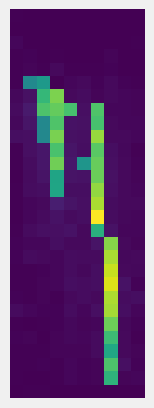

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.33it/s]


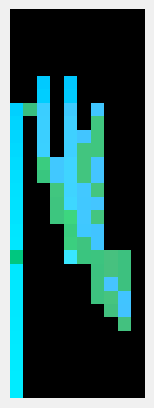

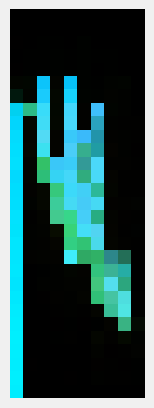

distance:


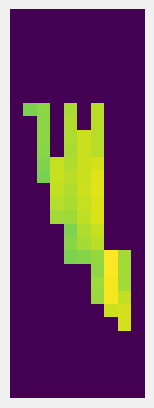

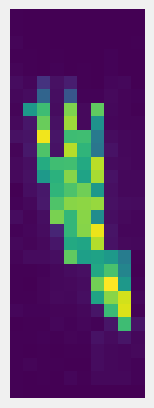

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.63it/s]


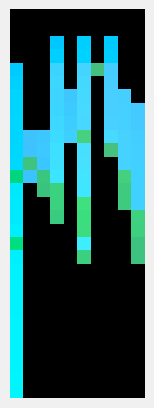

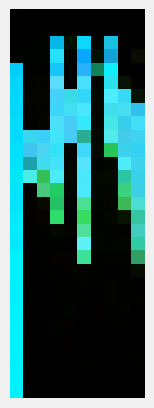

distance:


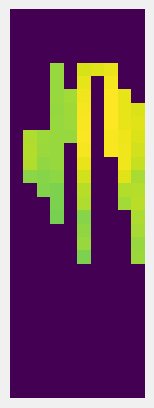

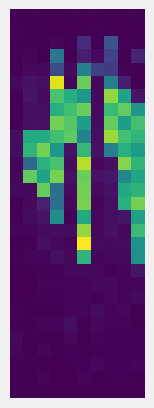

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.66it/s]


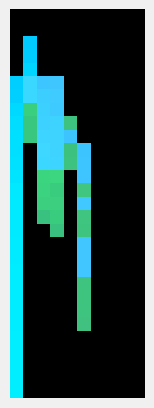

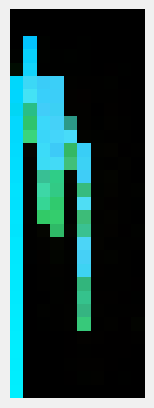

distance:


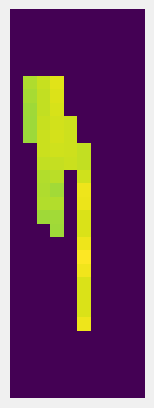

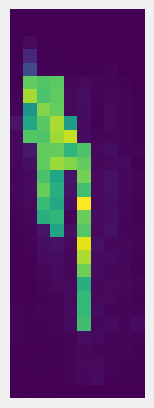

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.62it/s]


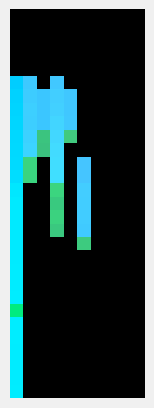

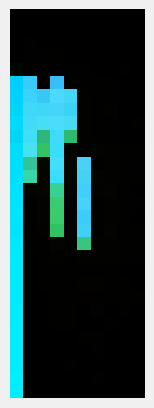

distance:


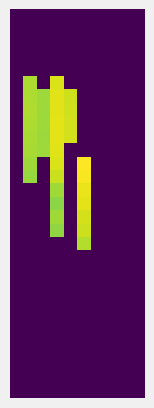

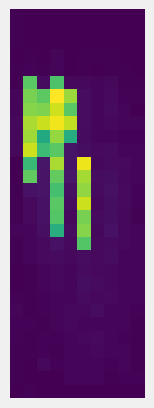

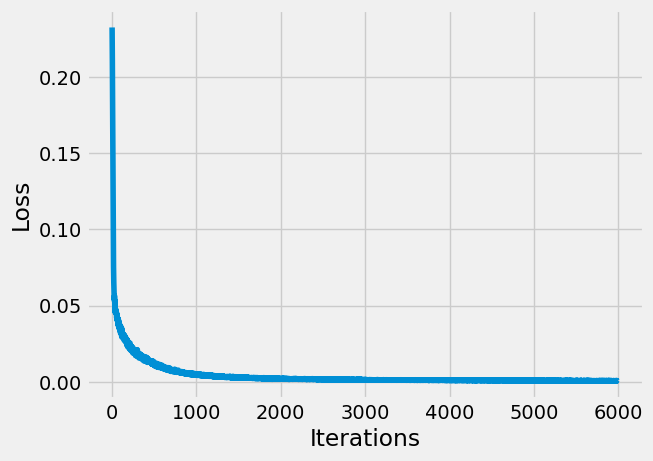

In [94]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(push_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [95]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000557
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 13.65% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 6.55% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000033
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 93.45 %


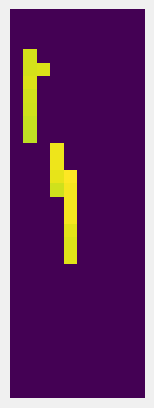

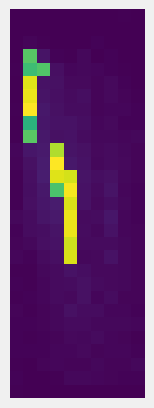

In [96]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# pushing nonzero values up with 10 then normalizing


min =  tensor(0., dtype=torch.float64)
max =  tensor(11.7550, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.1169, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.1169, dtype=torch.float64)


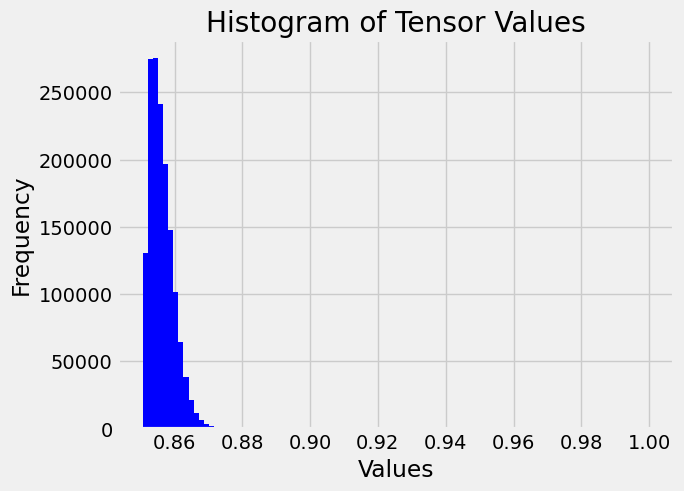

nonzero distance added 0.5 values minimum =  0.8507
nonzero distance added 0.5 values maximum =  1.0
nonzero distance added 0.5 values mean =  0.8563


In [86]:
push_norm_dist_dataset = dataset.clone()

dist = push_norm_dist_dataset[:, 0].clone()

def add_value(tensor, value = 0.5):
    tensor1 = tensor.clone()
    
    
    nonzero_mask = tensor1 != 0

    # Add 0.5 to nonzero values
    tensor1[nonzero_mask] += value
    
    return tensor1

dist_add_values = add_value(dist, 10)

min_values_add_dist = dist_add_values.min()
max_values_add_dist = dist_add_values.max()
print("min = ", min_values_add_dist)
print("max = ", max_values_add_dist)
add_dist_normalized = (dist_add_values - min_values_add_dist) / (max_values_add_dist - min_values_add_dist)

print(add_dist_normalized.min(), add_dist_normalized.max(), add_dist_normalized.mean())

push_norm_dist_dataset[:, 0] = add_dist_normalized

print(push_norm_dist_dataset[:, 0].min(), push_norm_dist_dataset[:, 0].max(), push_norm_dist_dataset[:, 0].mean())

nonzer_dist_add_value = torch.nonzero(push_norm_dist_dataset[:, 0].flatten())
nonzero_dist_add_value = push_norm_dist_dataset[:, 0].flatten()[nonzer_dist_add_value[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_dist_add_value.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance added 0.5 values minimum = ", round(nonzero_dist_add_value.min().item(), 4))
print("nonzero distance added 0.5 values maximum = ", round(nonzero_dist_add_value.max().item(), 4))
print("nonzero distance added 0.5 values mean = ", round(nonzero_dist_add_value.mean().item(), 4))

0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


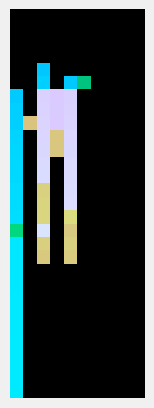

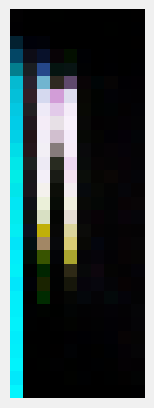

distance:


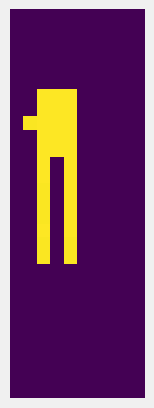

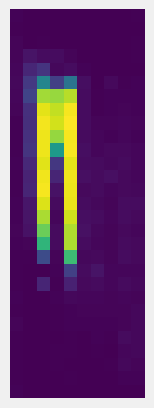

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.43it/s]


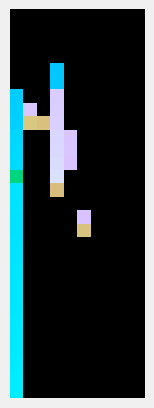

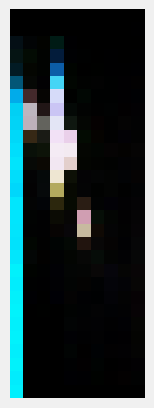

distance:


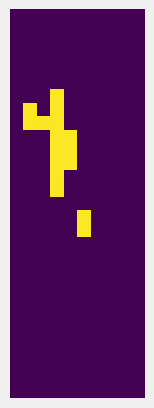

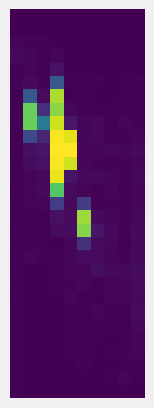

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.69it/s]


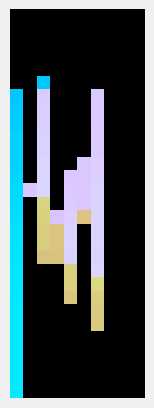

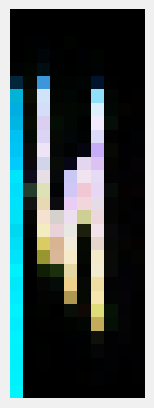

distance:


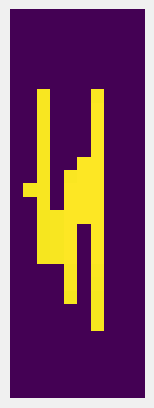

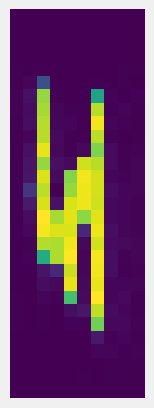

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


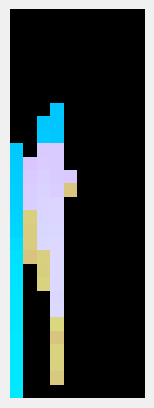

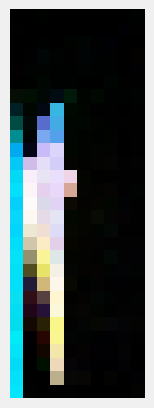

distance:


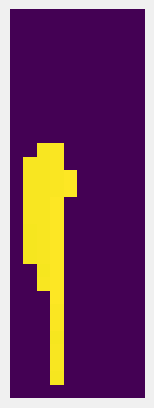

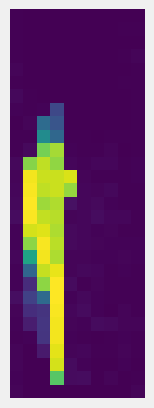

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.30it/s]


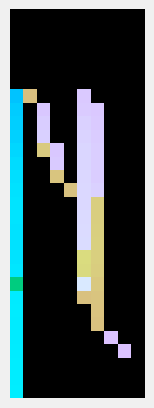

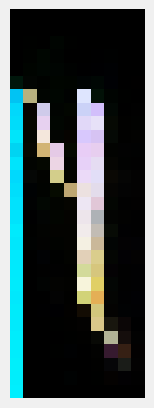

distance:


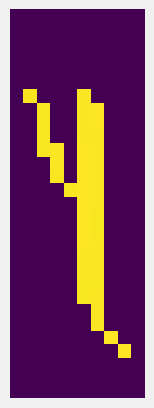

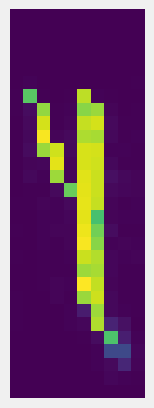

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.48it/s]


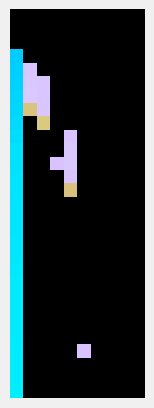

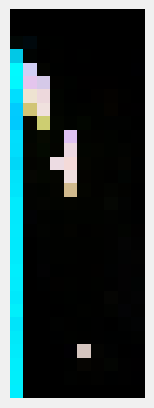

distance:


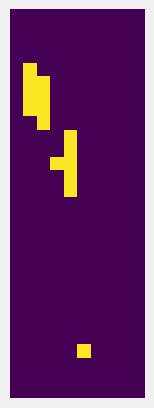

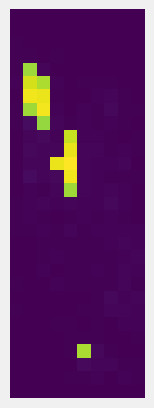

6/20


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.84it/s]


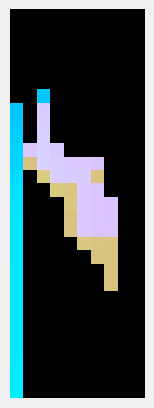

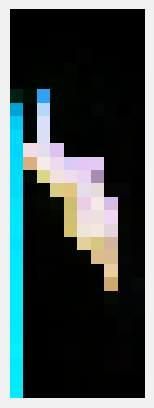

distance:


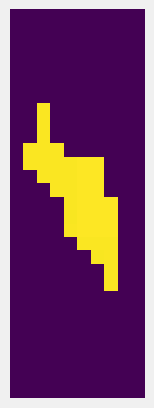

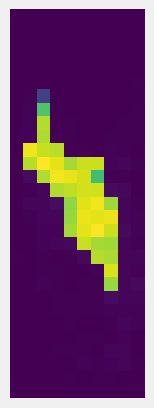

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.66it/s]


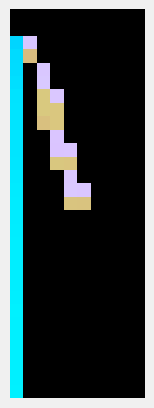

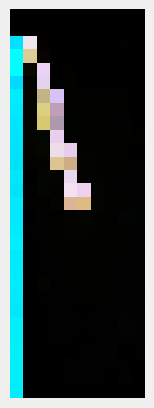

distance:


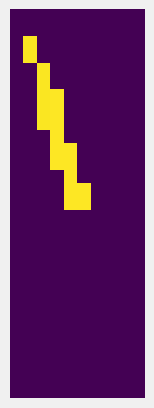

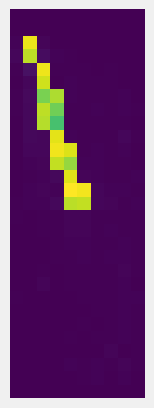

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.69it/s]


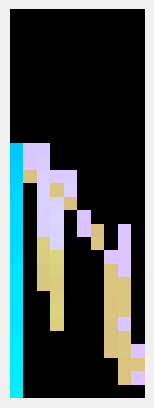

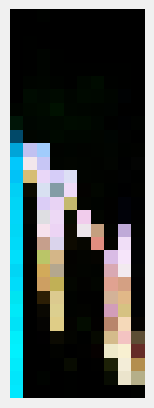

distance:


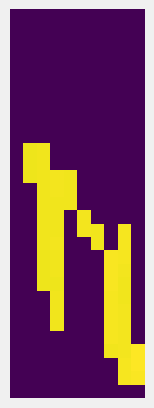

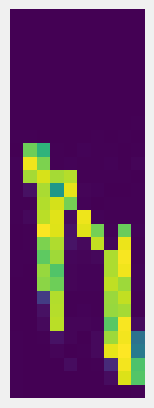

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


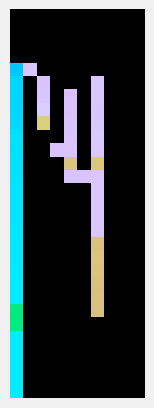

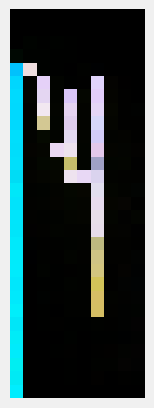

distance:


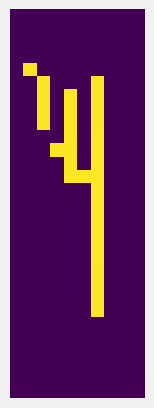

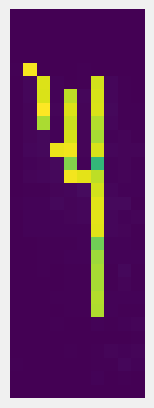

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.18it/s]


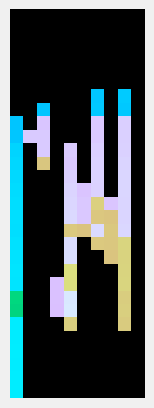

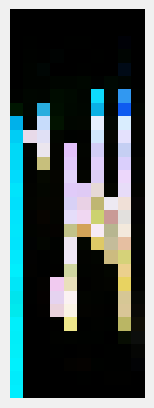

distance:


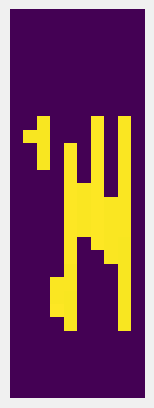

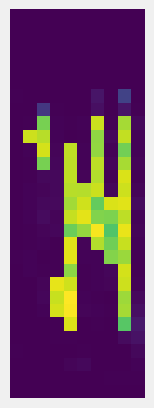

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.59it/s]


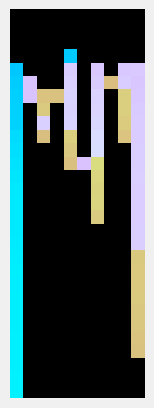

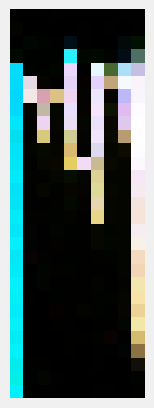

distance:


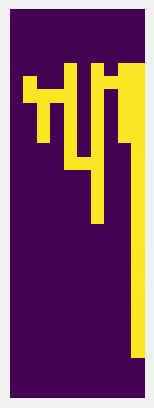

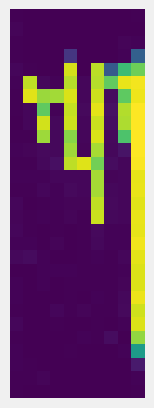

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.77it/s]


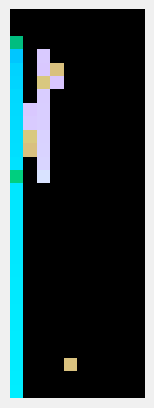

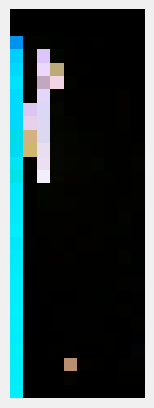

distance:


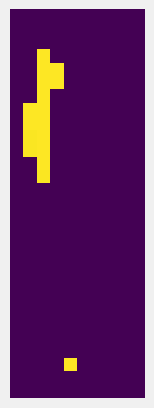

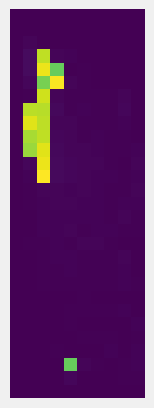

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.59it/s]


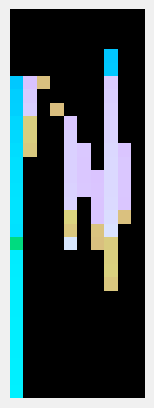

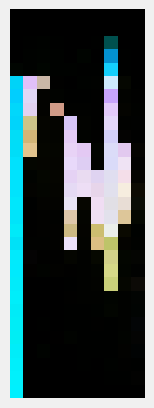

distance:


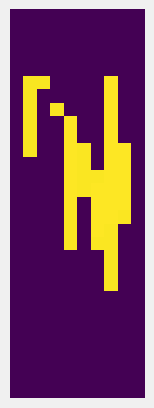

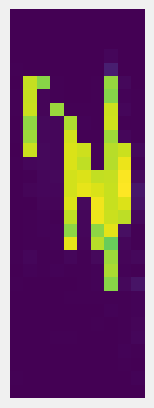

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.82it/s]


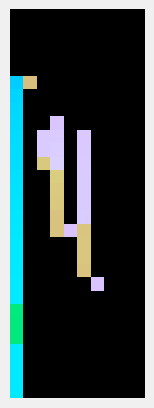

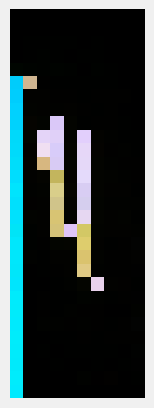

distance:


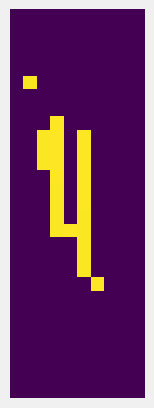

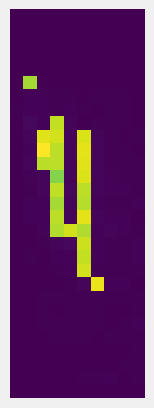

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.76it/s]


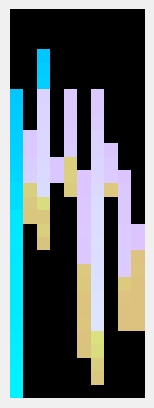

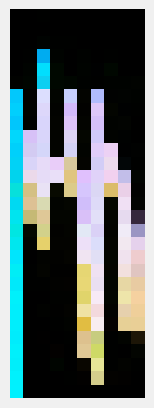

distance:


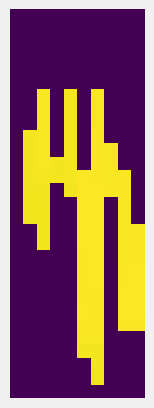

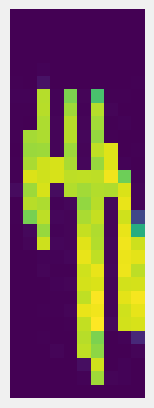

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.82it/s]


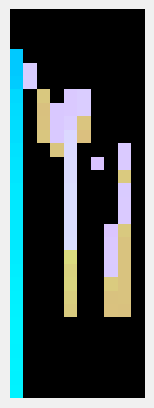

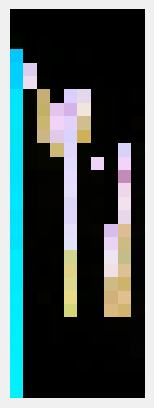

distance:


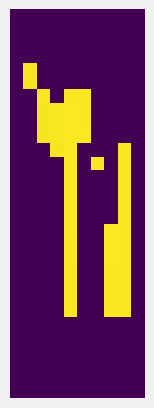

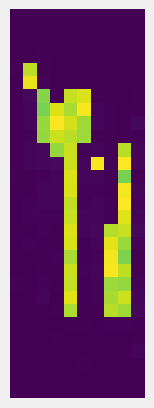

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.87it/s]


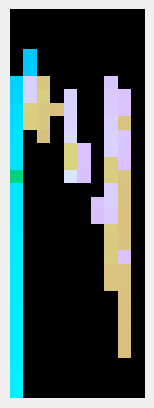

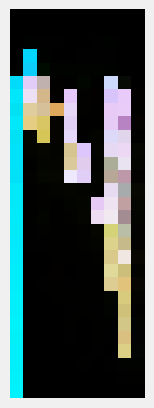

distance:


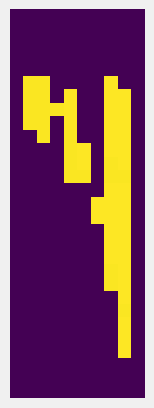

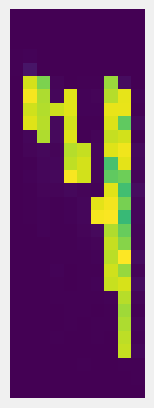

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.89it/s]


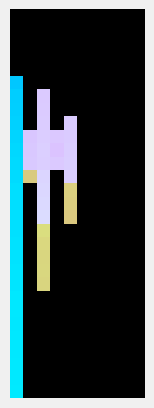

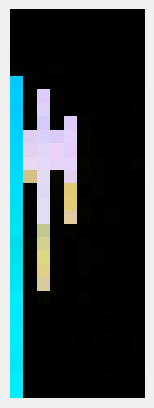

distance:


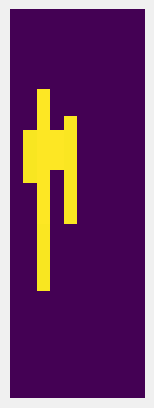

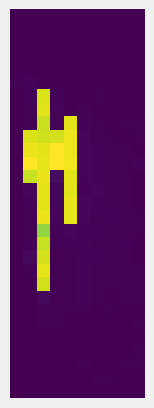

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.91it/s]


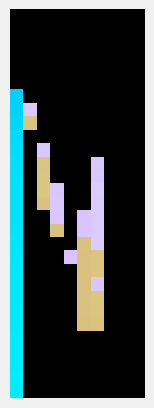

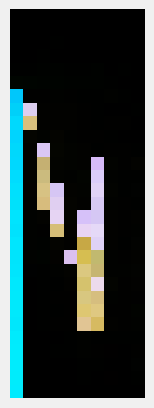

distance:


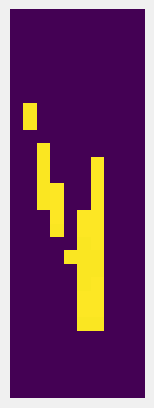

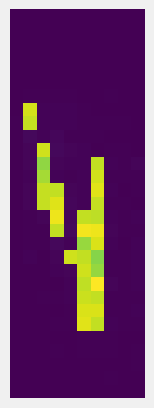

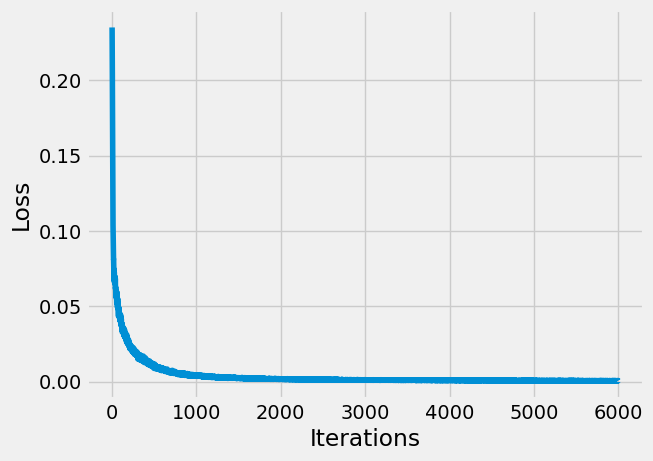

In [87]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(push_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [90]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000022
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 13.65% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 5.17% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000001
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.83 %


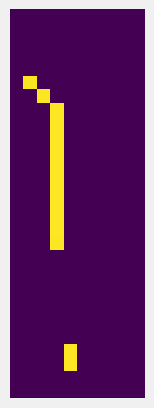

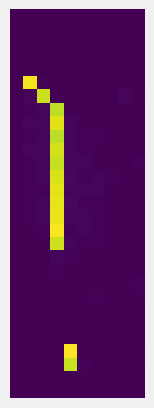

In [91]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 14.14% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0001158743
Is minimum value in reconstructed image 0.0 = False
Percentage of nonzero elements: 0.0 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 85.86 %


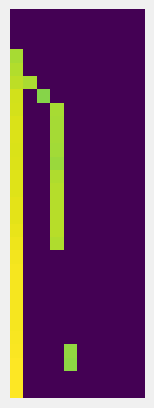

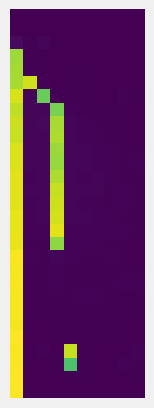

In [92]:
test1 = images[0, 1]
test2 = reconstructed[0, 1]

have_same_zero_values(test1, test2)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test2.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {test2.min() == 0.0}")
zero_count = (test2 == 0).sum().item()
total_elements = test2.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test1.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test1.min() == 0.0}")
zero_count = (test1 == 0).sum().item()
total_elements = test1.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test1.unsqueeze(0).permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test2.unsqueeze(0).permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# using ReLU activation, everything again

# reference #1 normal data, no normalization

# reference #2 normal normalization

0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]


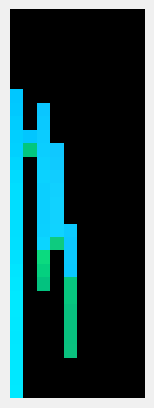

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


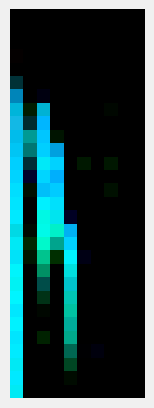

distance:


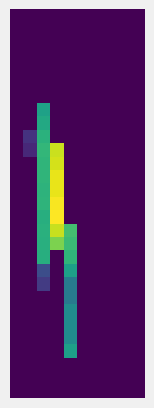

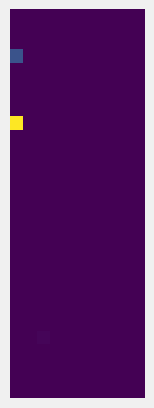

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.63it/s]


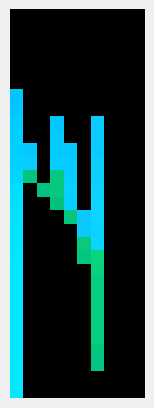

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


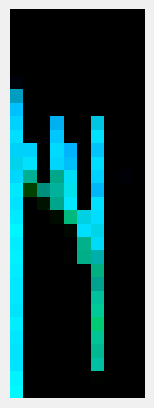

distance:


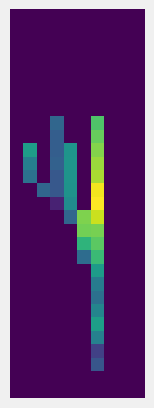

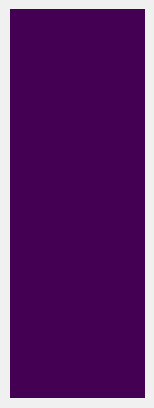

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.10it/s]


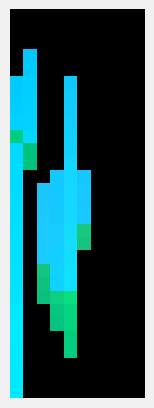

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


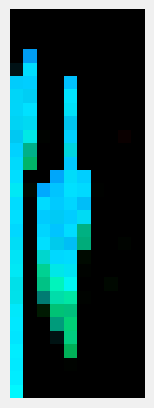

distance:


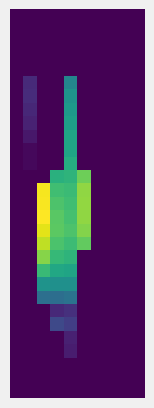

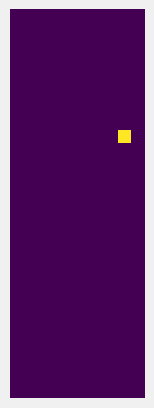

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.16it/s]


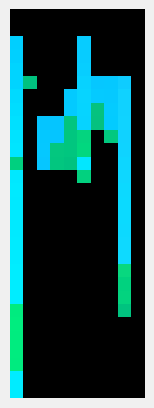

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


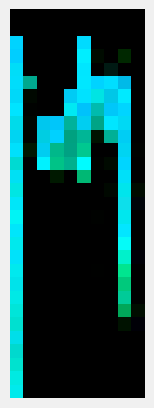

distance:


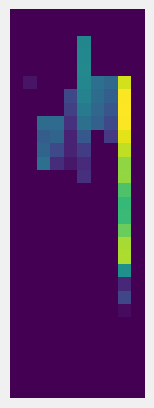

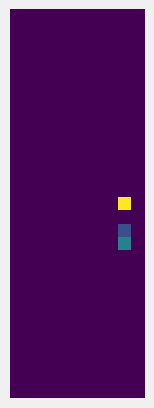

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.67it/s]


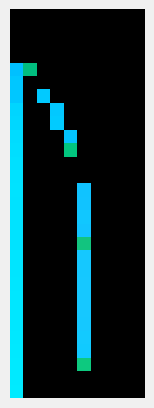

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


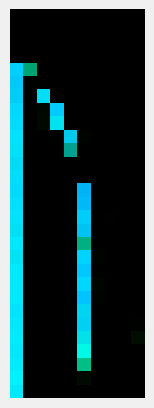

distance:


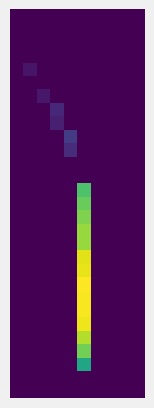

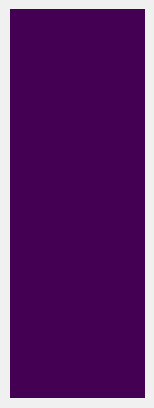

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.52it/s]


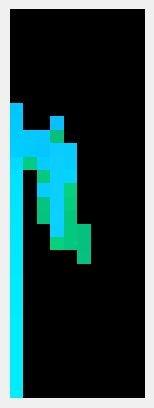

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


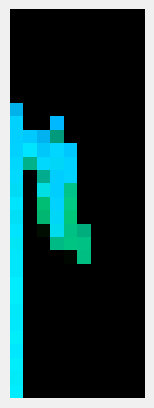

distance:


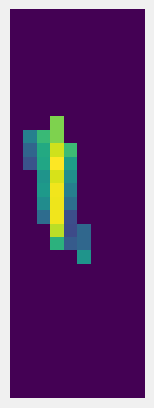

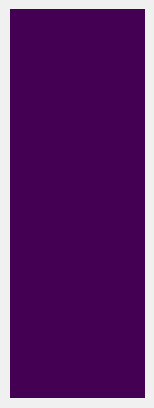

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.72it/s]


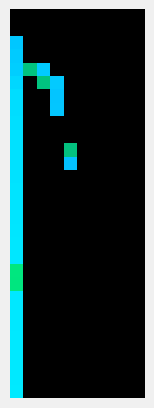

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


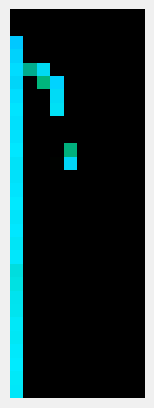

distance:


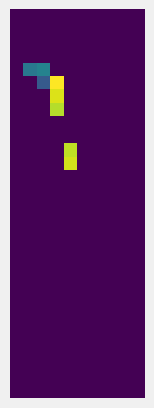

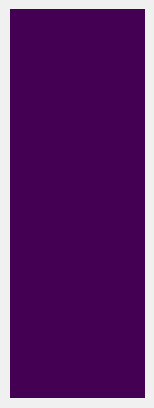

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.38it/s]


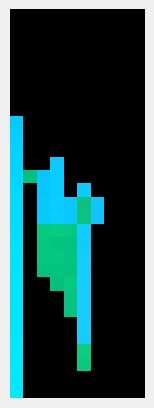

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


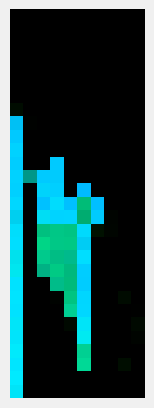

distance:


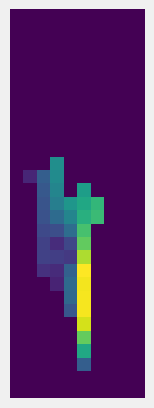

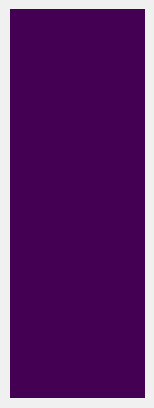

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.00it/s]


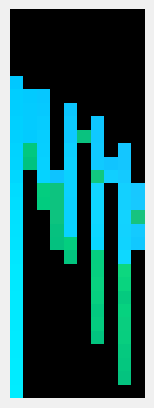

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


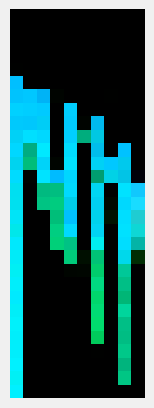

distance:


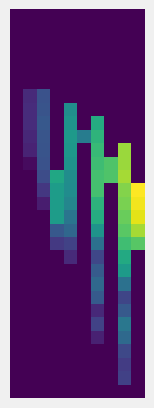

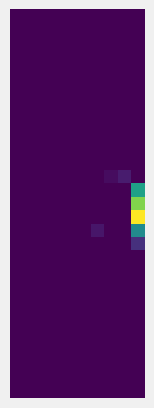

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


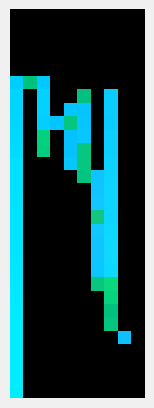

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


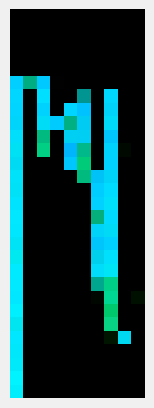

distance:


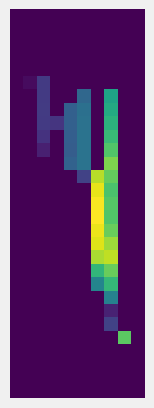

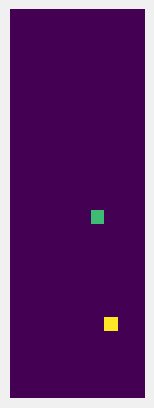

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.98it/s]


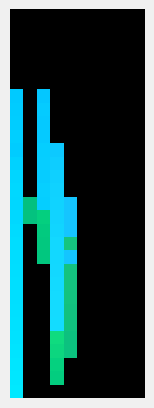

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


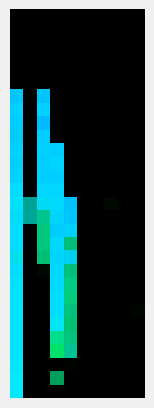

distance:


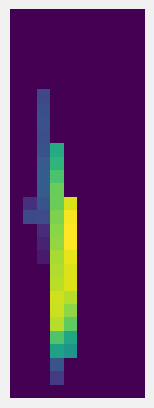

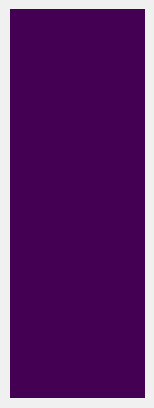

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.87it/s]


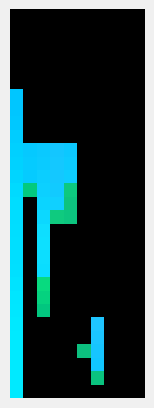

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


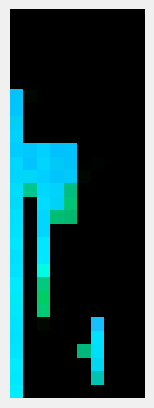

distance:


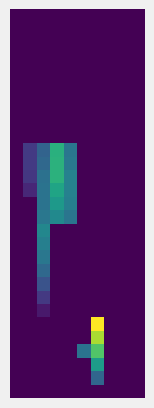

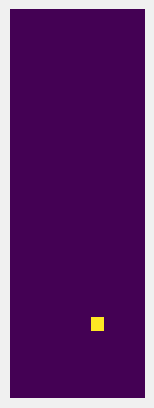

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.89it/s]


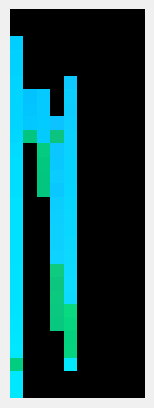

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


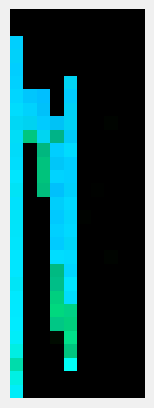

distance:


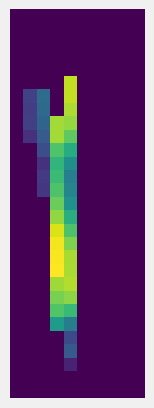

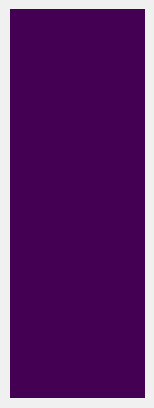

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.84it/s]


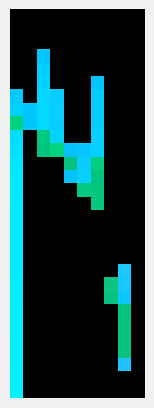

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


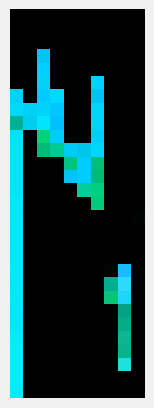

distance:


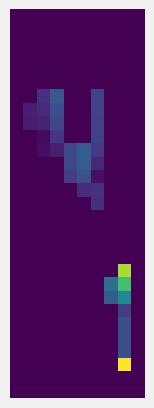

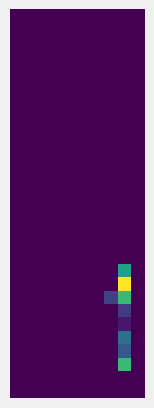

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.43it/s]


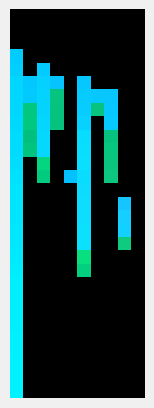

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


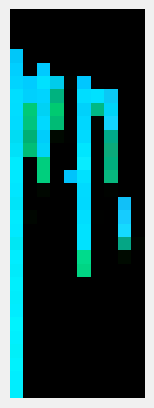

distance:


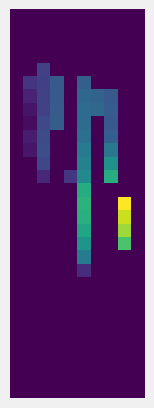

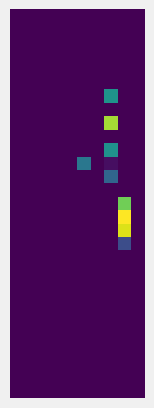

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.98it/s]


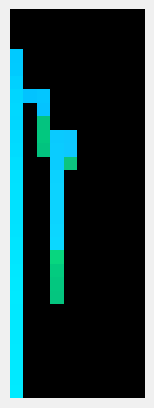

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


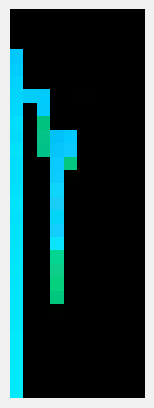

distance:


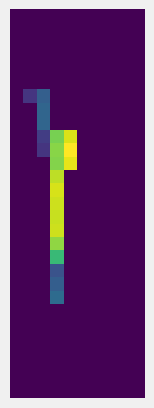

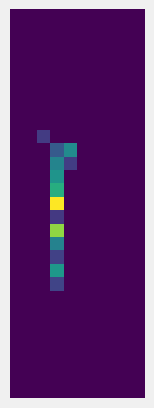

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.85it/s]


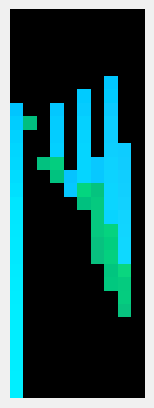

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


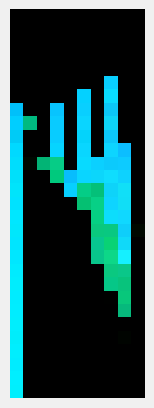

distance:


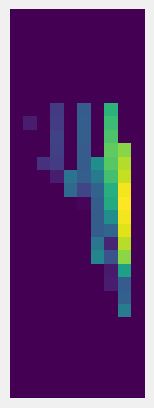

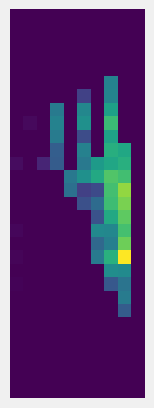

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.66it/s]


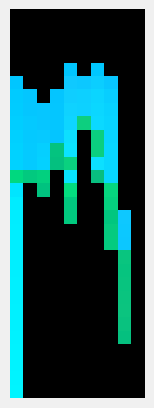

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


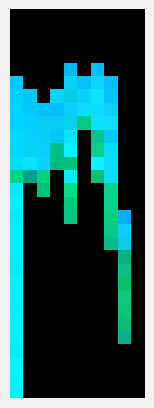

distance:


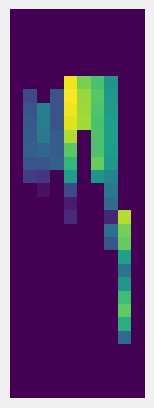

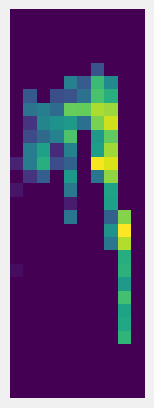

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]


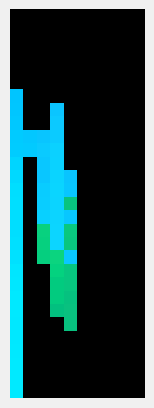

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


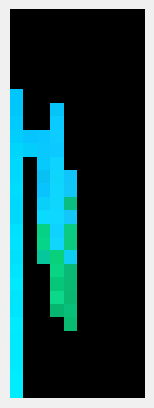

distance:


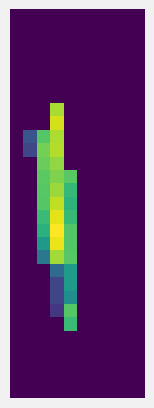

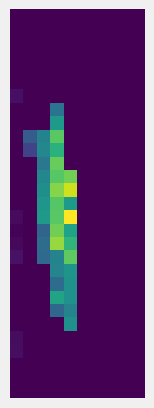

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.76it/s]


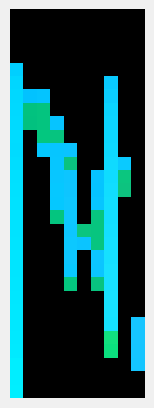

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


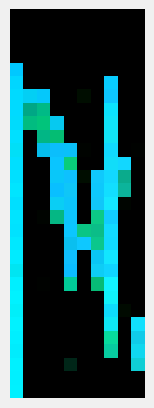

distance:


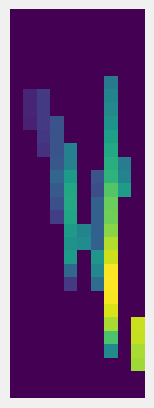

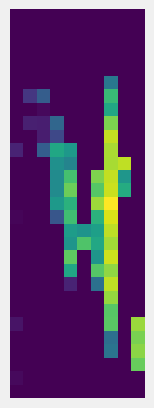

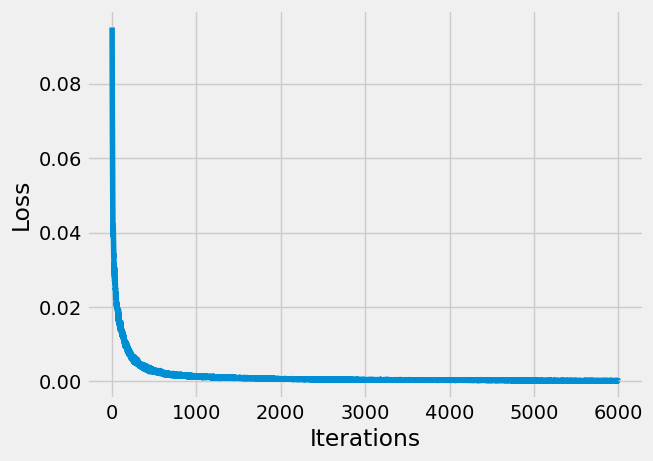

In [129]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(dataset_zero_one, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [130]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 85.01 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 98.28% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 95.86% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 89.31 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 92.76 %


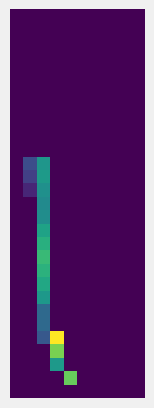

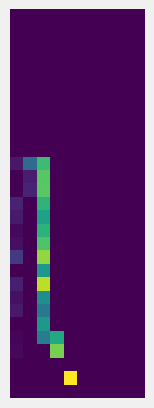

In [131]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# log

In [24]:
def custom_reconstruction_loss_subh(output, target, target_threshold = 0, scale = 5):
    # Calculate the reconstruction loss
    recon_loss = F.mse_loss(output, target, reduction='none')
    
    # Apply higher penalty if target is zero
    penalty = torch.where((target == 0.0) | (target == 0.5) | (target == 1.0), scale * recon_loss, recon_loss)

    
    # Calculate the mean loss
    mean_loss = torch.mean(penalty)
    
    return mean_loss

0/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.30it/s]


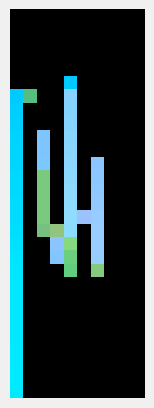

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


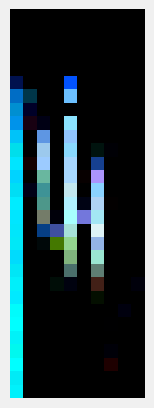

distance:


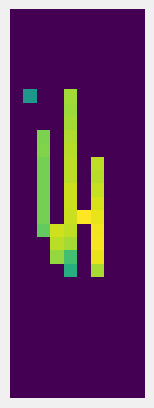

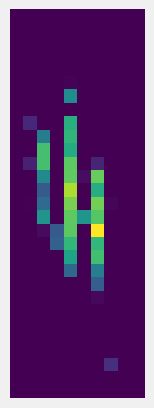

1/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.46it/s]


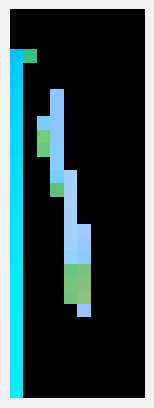

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


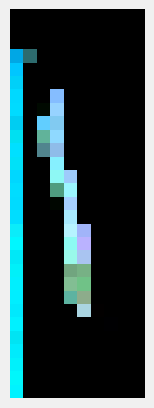

distance:


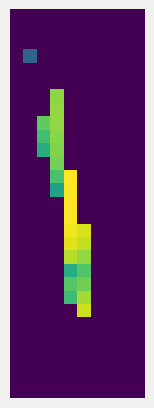

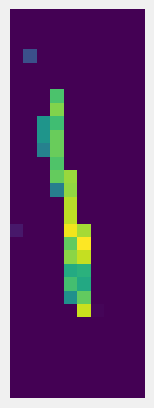

2/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.51it/s]


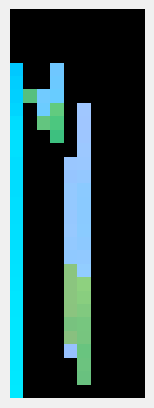

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


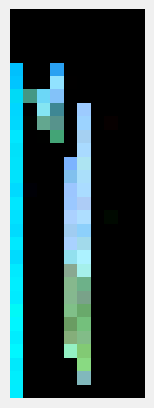

distance:


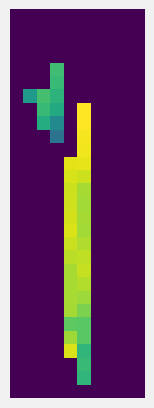

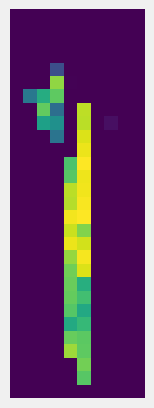

3/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.44it/s]


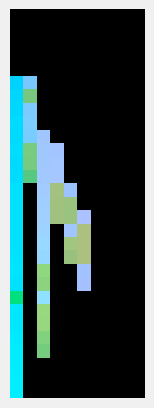

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


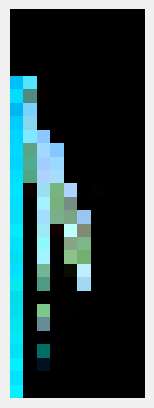

distance:


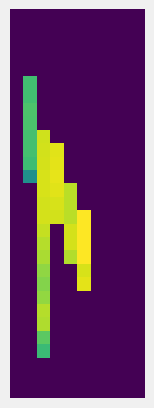

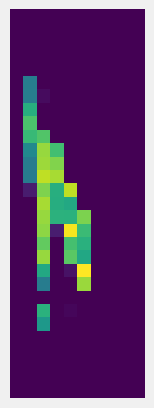

4/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.48it/s]


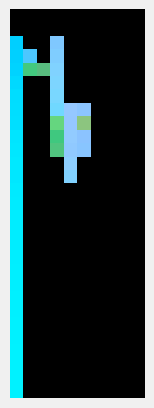

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


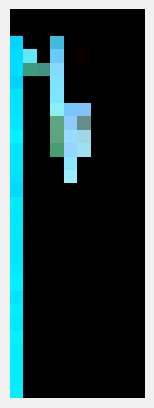

distance:


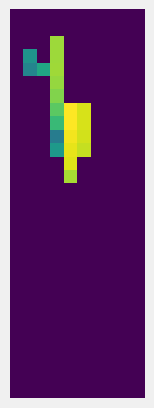

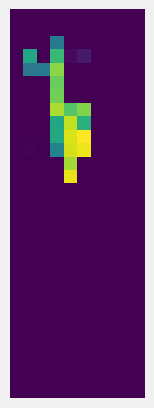

5/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.37it/s]


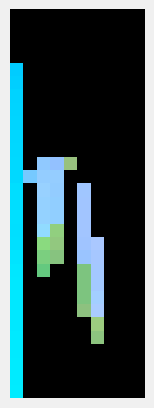

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


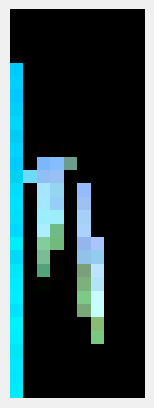

distance:


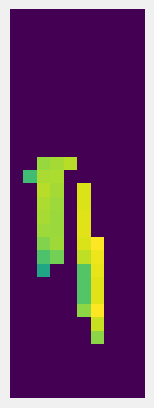

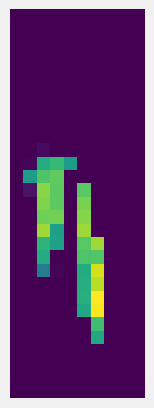

6/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.35it/s]


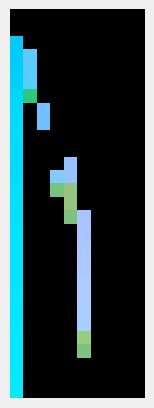

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


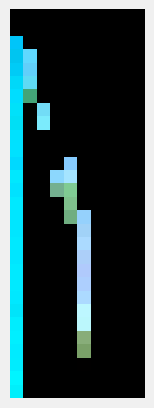

distance:


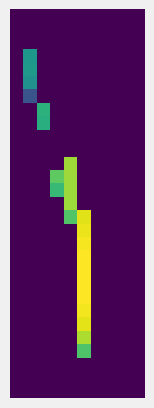

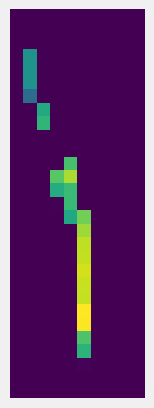

7/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.26it/s]


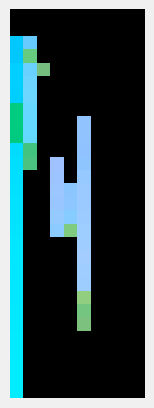

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


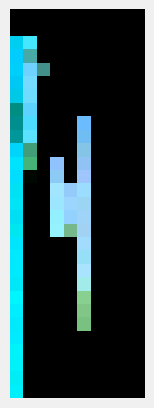

distance:


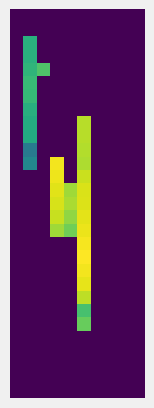

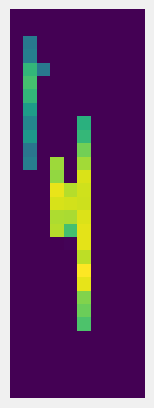

8/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.39it/s]


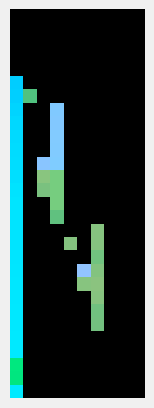

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


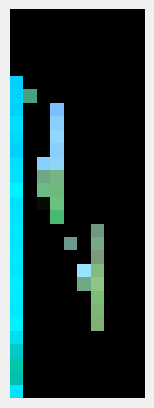

distance:


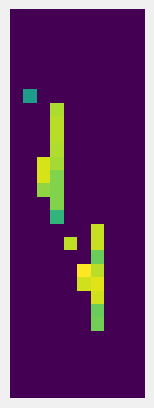

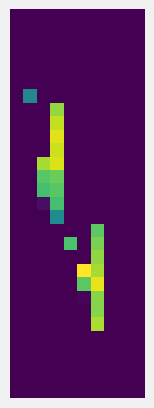

9/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.37it/s]


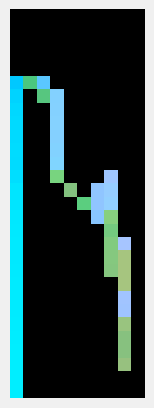

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


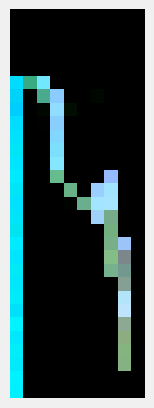

distance:


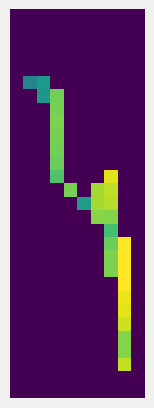

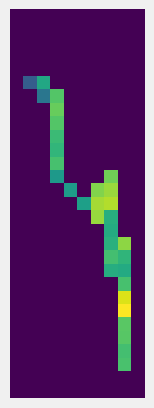

10/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.44it/s]


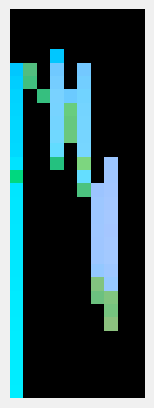

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


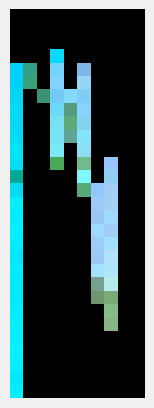

distance:


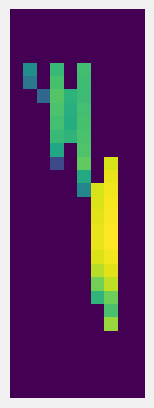

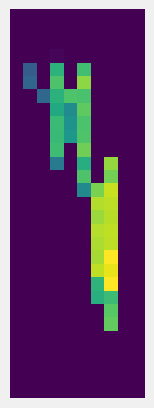

11/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.46it/s]


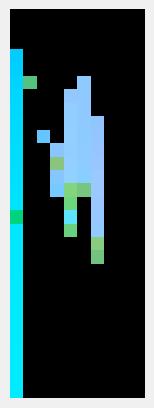

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


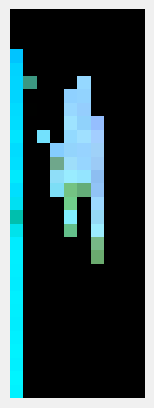

distance:


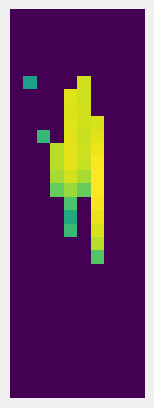

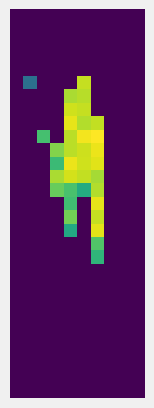

12/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


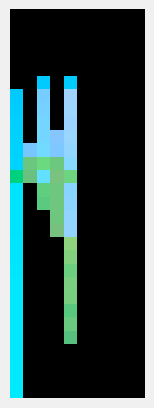

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


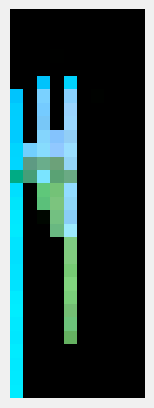

distance:


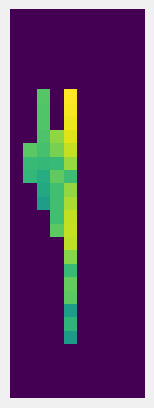

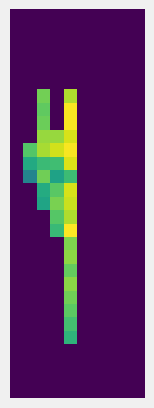

13/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:13<00:00, 22.57it/s]


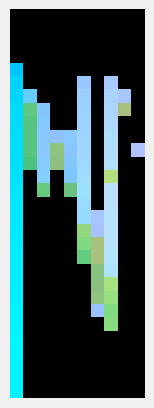

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


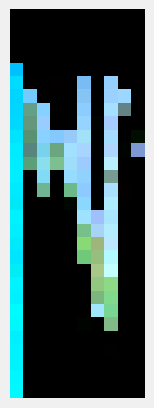

distance:


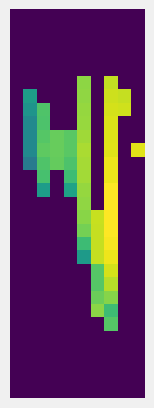

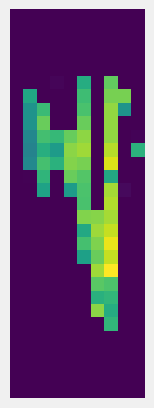

14/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 23.28it/s]


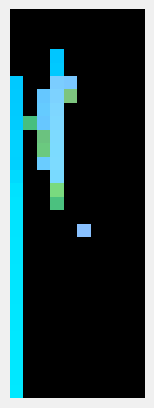

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


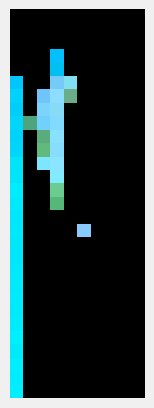

distance:


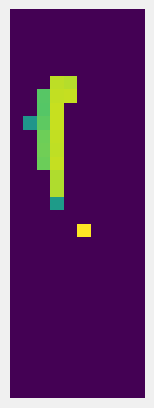

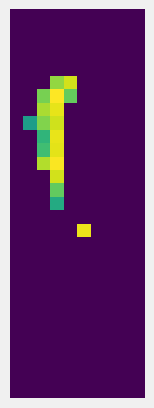

15/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:12<00:00, 23.63it/s]


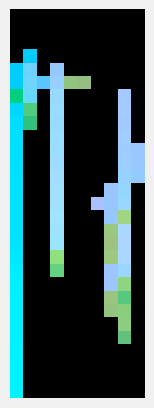

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


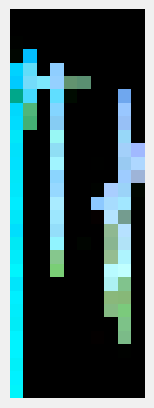

distance:


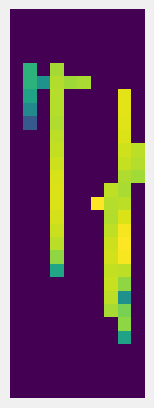

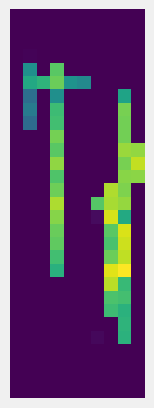

16/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:14<00:00, 21.10it/s]


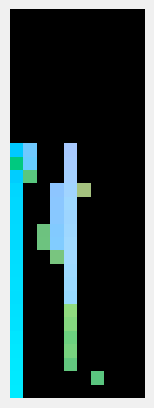

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


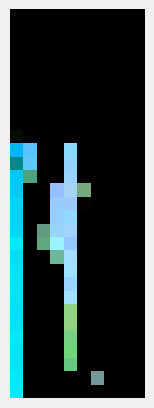

distance:


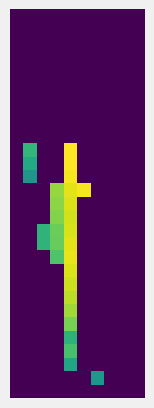

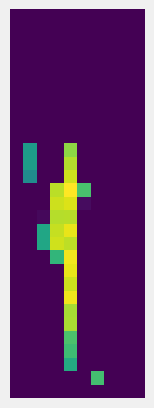

17/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:14<00:00, 20.74it/s]


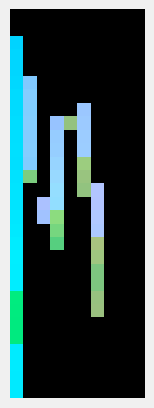

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


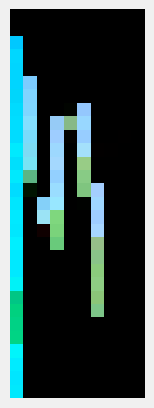

distance:


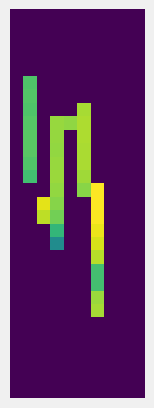

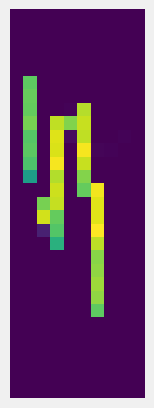

18/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:15<00:00, 19.23it/s]


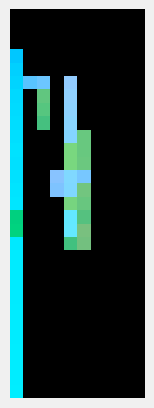

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


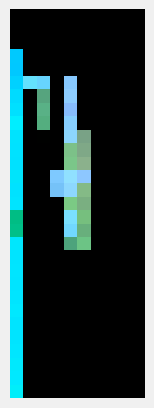

distance:


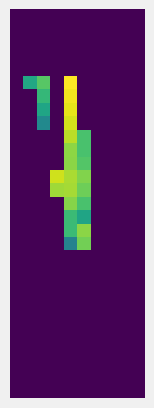

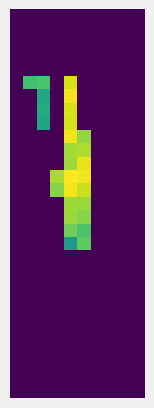

19/20


100%|███████████████████████████████████████████████████████████| 300/300 [00:15<00:00, 19.80it/s]


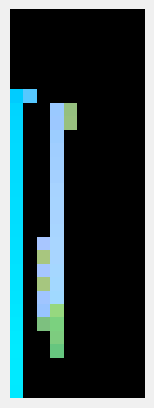

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


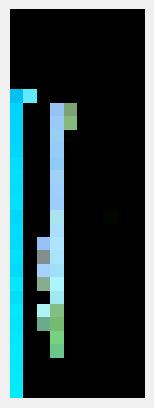

distance:


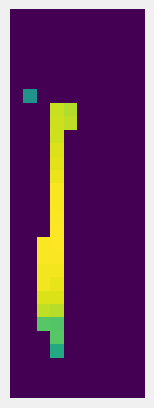

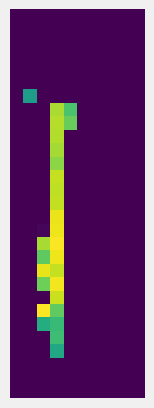

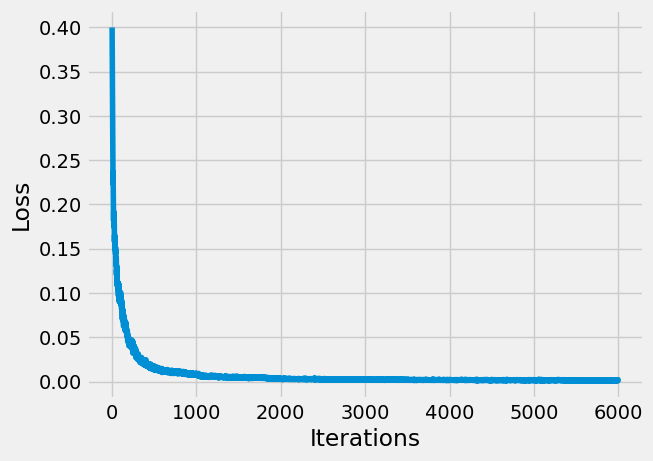

In [25]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(log_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [21]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nOverall:")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
zero_count = (reconstructed == 0).sum().item()
total_elements = reconstructed.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {images.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
zero_count = (images == 0).sum().item()
total_elements = images.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(images, reconstructed)


print("\n")
print("\n")
print("\nDistance")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.69 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.56% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.43 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.65% of the sam

the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.66% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 89.31 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 89.66 %


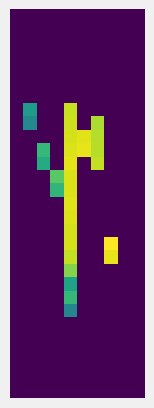

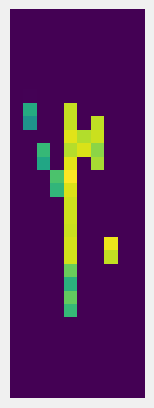

In [134]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()



# clip

0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.69it/s]


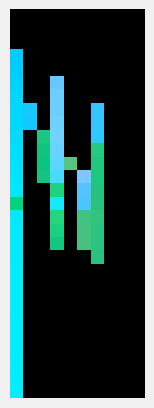

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


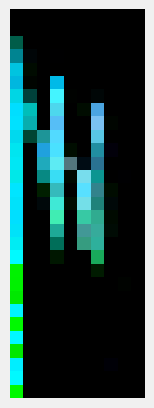

distance:


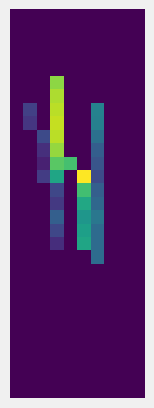

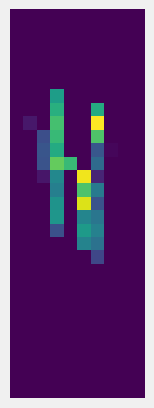

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.50it/s]


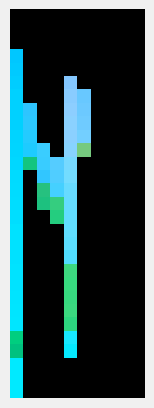

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


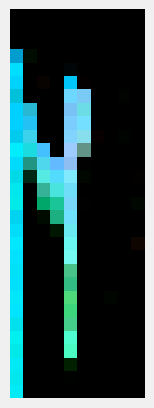

distance:


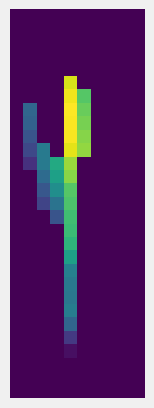

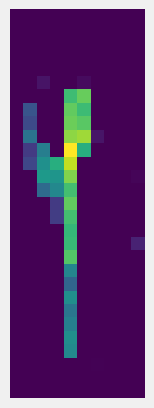

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.40it/s]


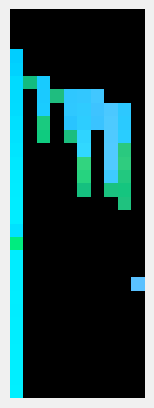

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


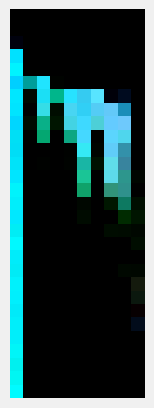

distance:


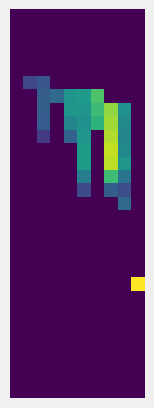

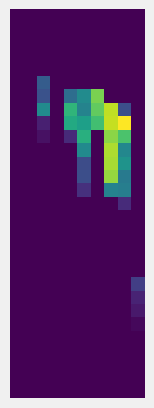

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.05it/s]


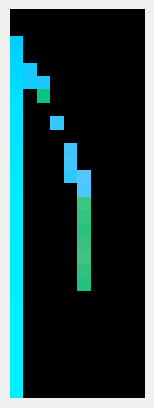

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


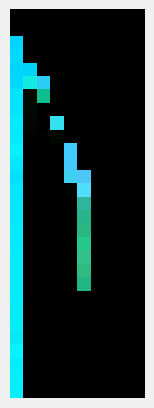

distance:


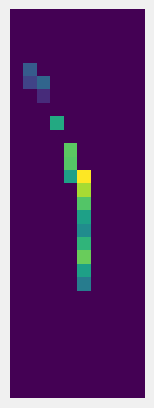

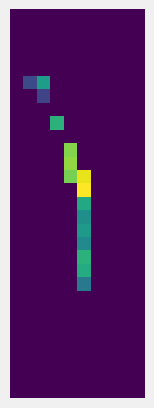

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.95it/s]


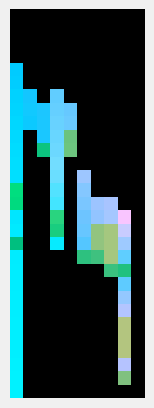

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


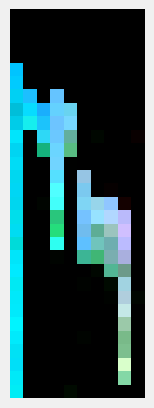

distance:


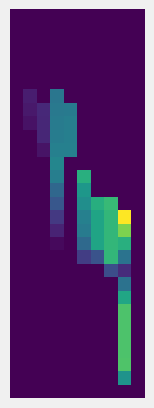

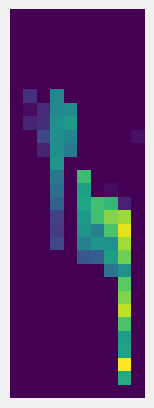

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.40it/s]


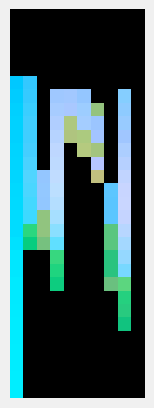

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


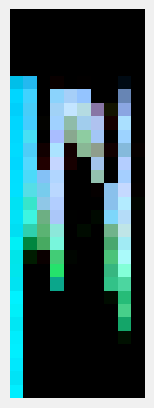

distance:


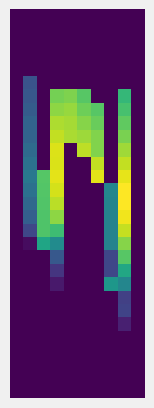

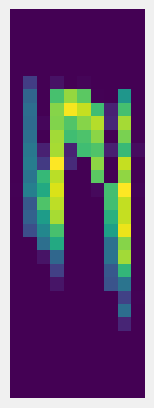

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.97it/s]


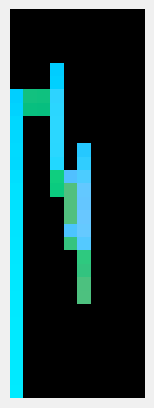

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


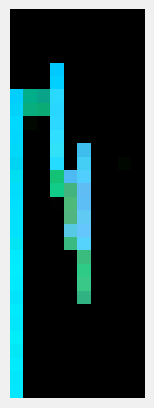

distance:


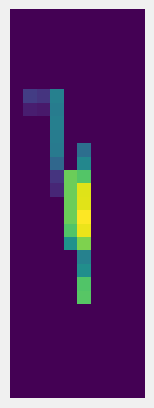

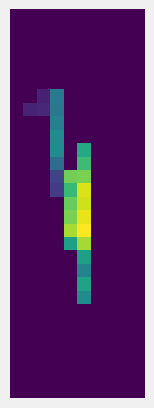

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.00it/s]


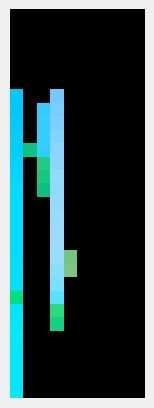

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


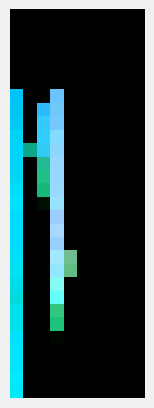

distance:


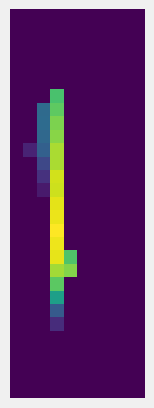

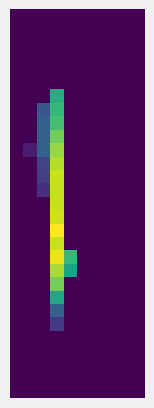

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.20it/s]


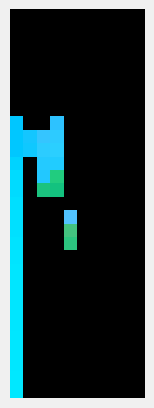

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


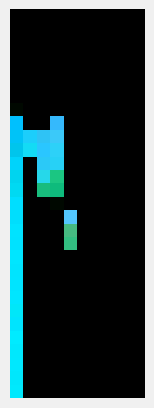

distance:


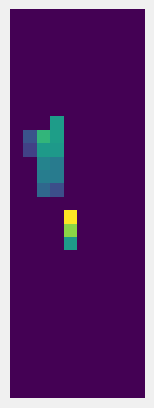

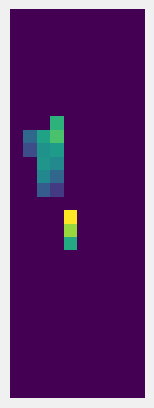

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.98it/s]


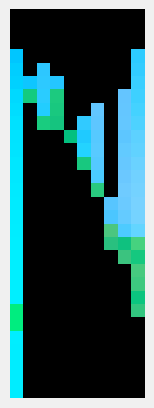

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


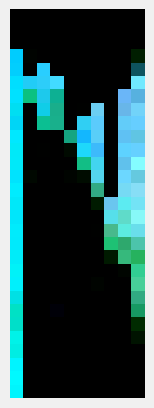

distance:


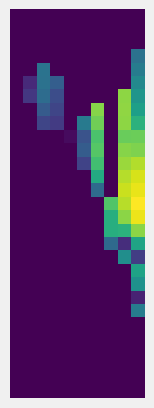

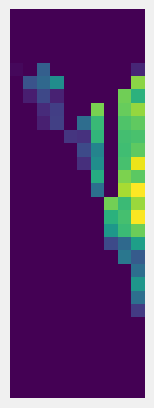

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.65it/s]


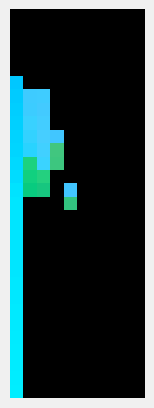

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


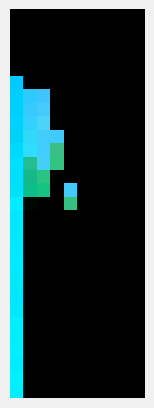

distance:


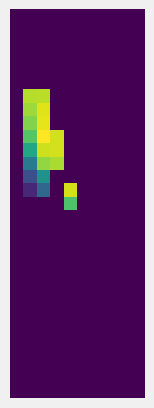

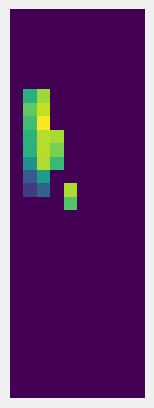

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.05it/s]


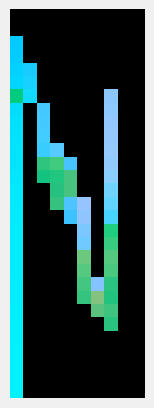

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


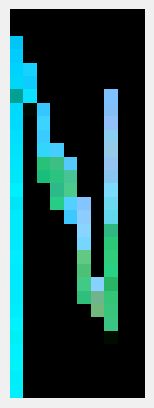

distance:


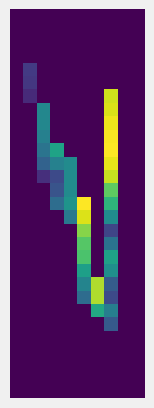

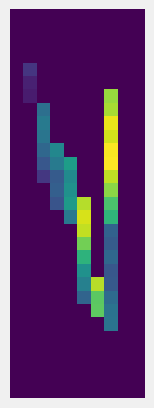

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.82it/s]


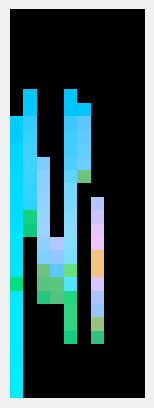

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


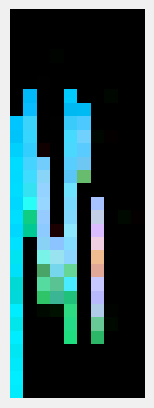

distance:


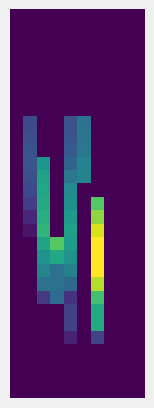

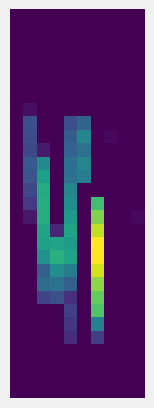

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.80it/s]


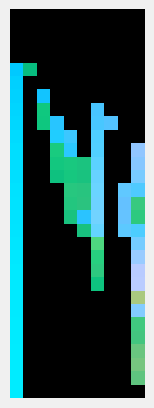

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


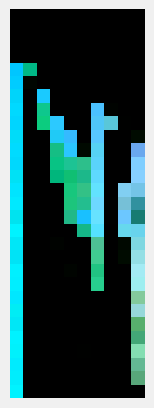

distance:


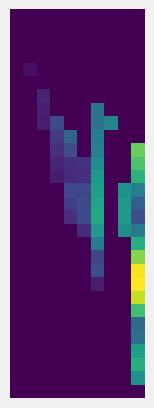

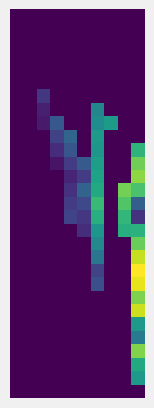

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.83it/s]


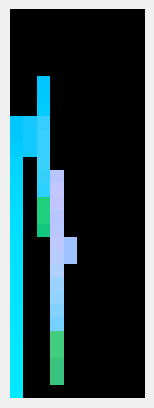

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


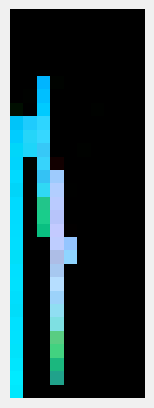

distance:


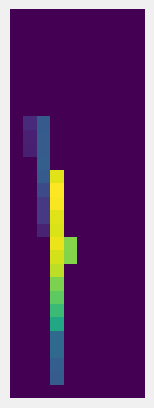

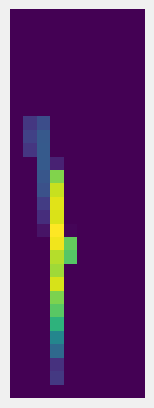

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


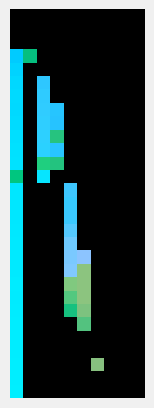

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


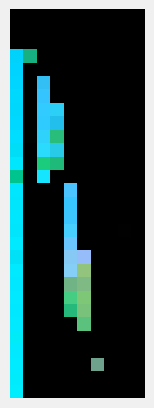

distance:


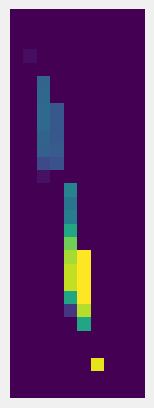

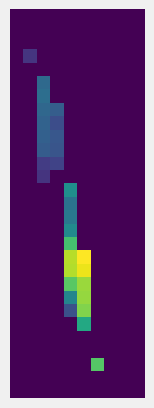

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.62it/s]


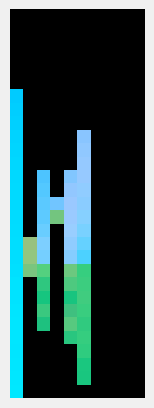

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


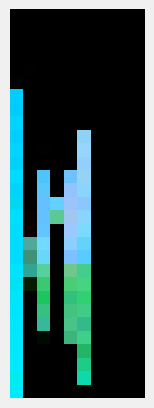

distance:


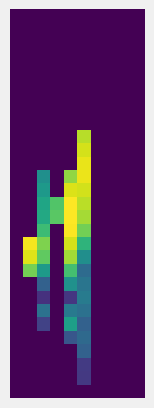

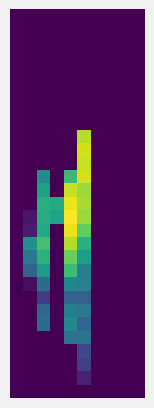

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.97it/s]


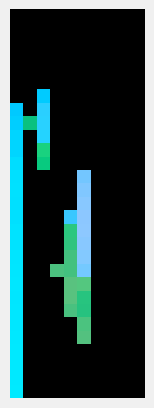

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


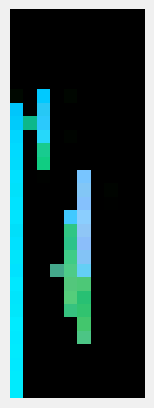

distance:


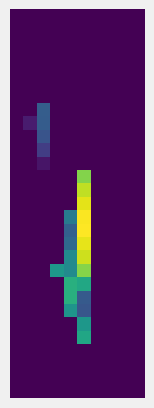

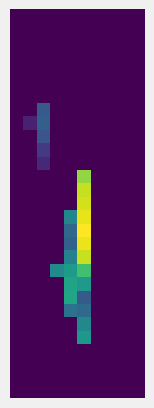

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.92it/s]


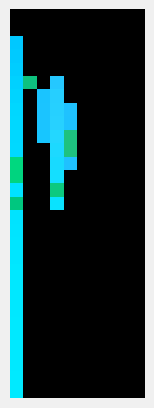

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


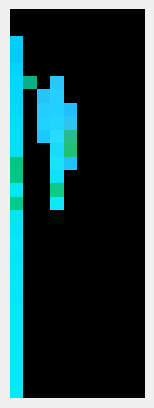

distance:


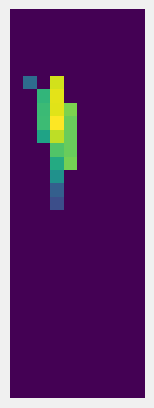

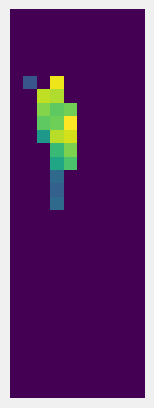

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.32it/s]


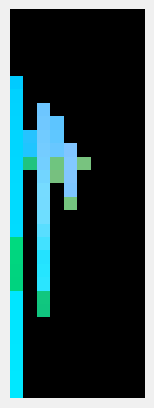

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


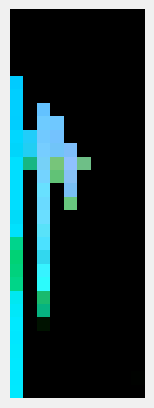

distance:


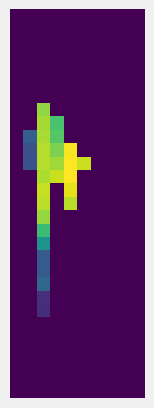

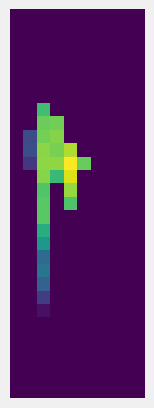

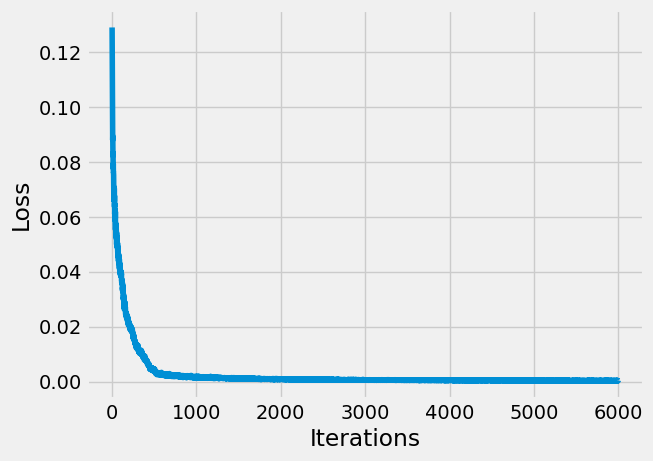

In [135]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(clip_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [136]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.14 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.70% of the same spots


the two tensors have zeroes in the same spots = True
the two tensors have zeroes and nonzero values in 100.00% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.83 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.83 %


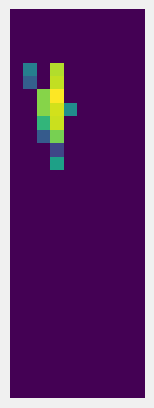

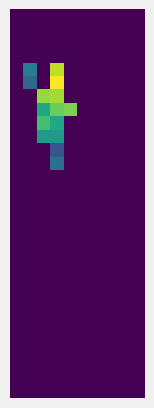

In [137]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# push with 0.5

min =  tensor(0., dtype=torch.float64)
max =  tensor(2.2550, dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0.0343, dtype=torch.float64)
0/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.19it/s]


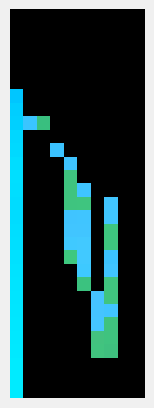

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


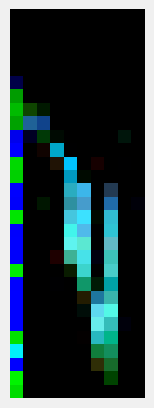

distance:


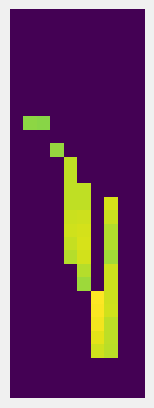

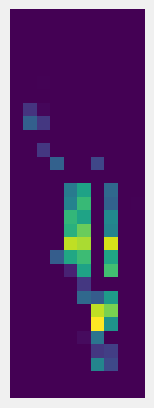

1/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]


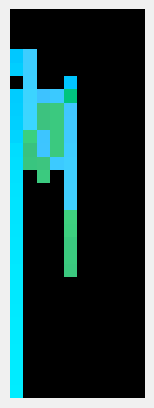

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


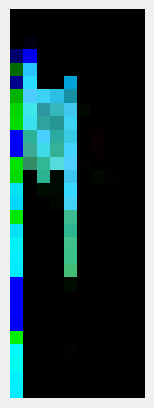

distance:


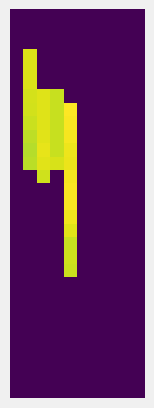

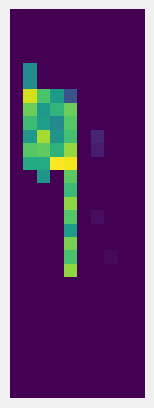

2/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.05it/s]


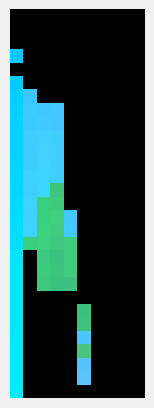

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


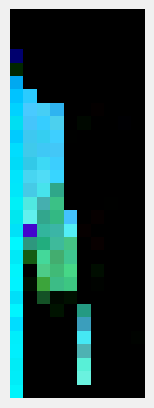

distance:


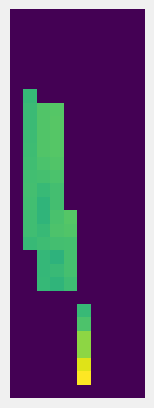

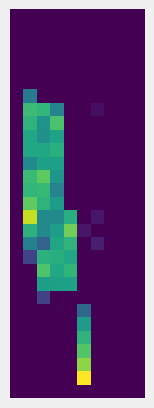

3/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.85it/s]


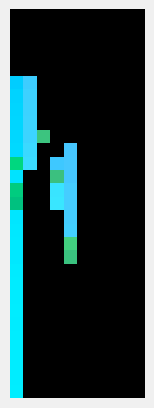

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


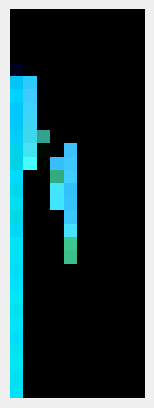

distance:


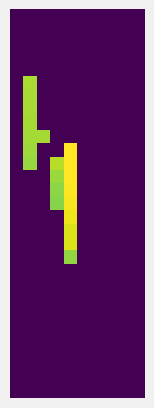

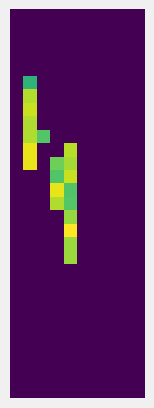

4/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


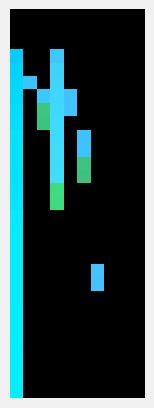

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


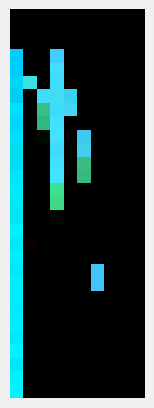

distance:


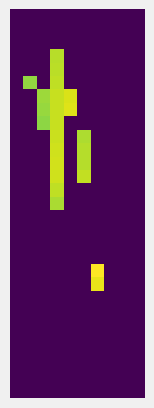

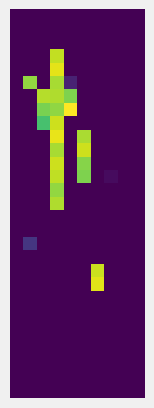

5/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.08it/s]


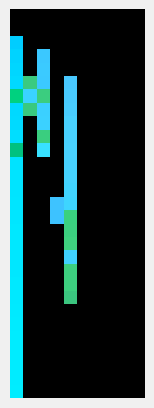

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


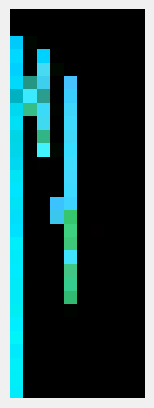

distance:


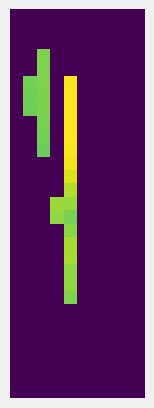

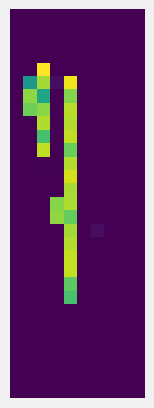

6/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.06it/s]


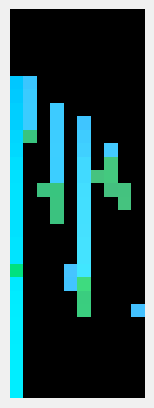

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


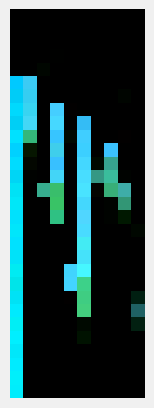

distance:


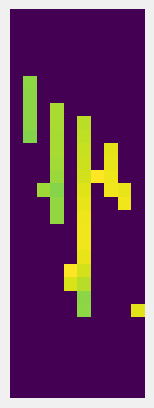

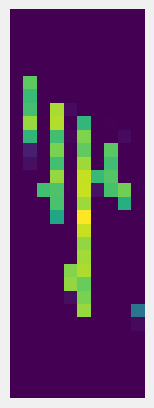

7/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.10it/s]


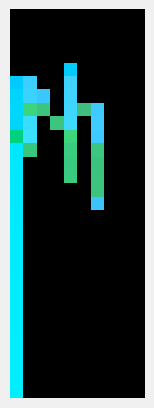

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


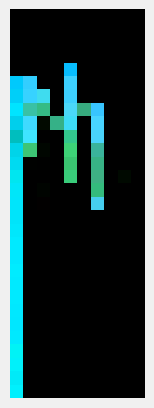

distance:


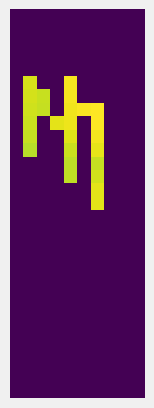

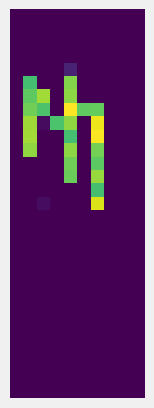

8/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.87it/s]


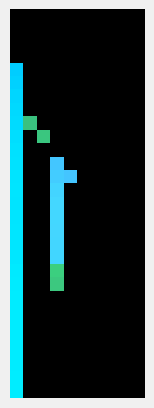

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


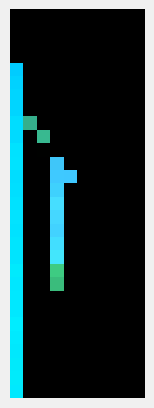

distance:


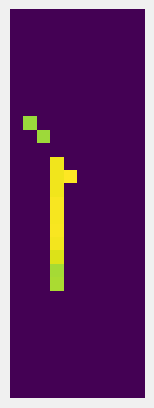

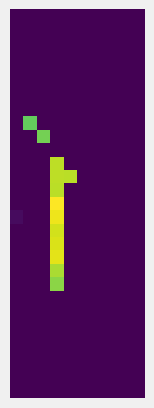

9/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.98it/s]


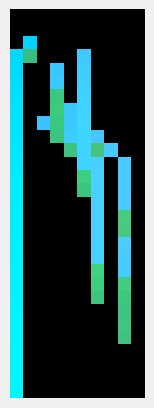

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


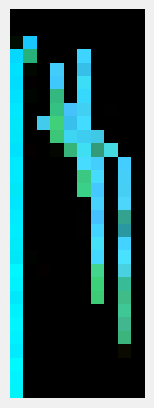

distance:


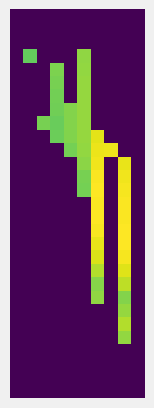

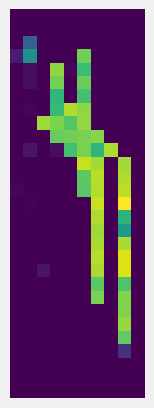

10/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.93it/s]


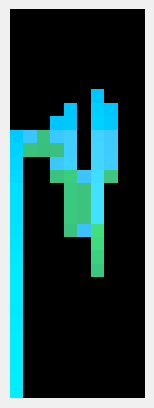

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


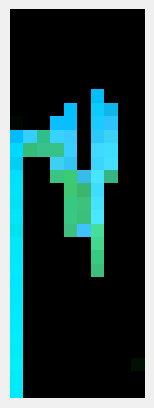

distance:


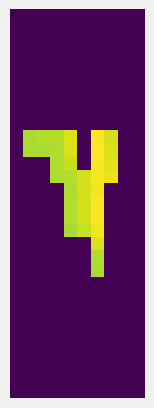

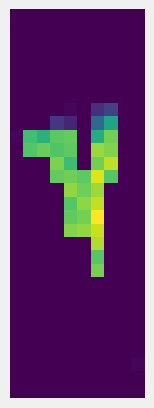

11/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.23it/s]


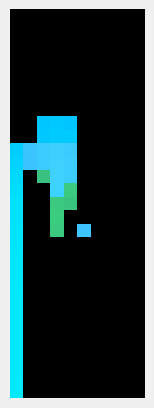

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


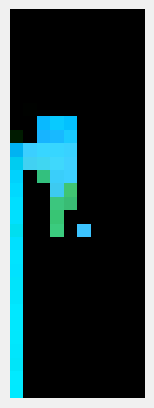

distance:


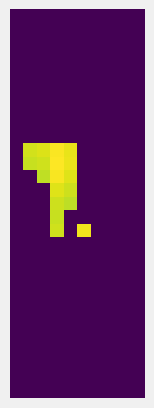

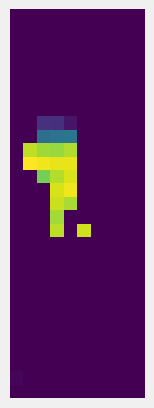

12/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.29it/s]


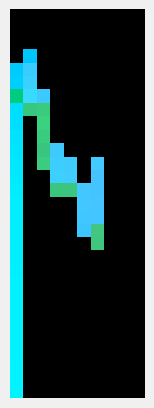

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


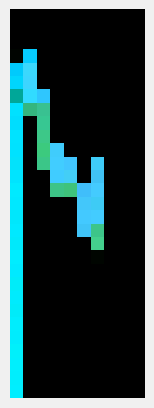

distance:


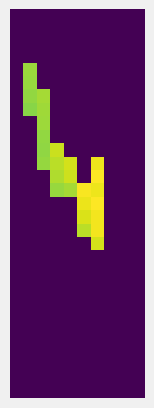

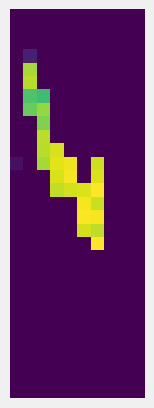

13/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.04it/s]


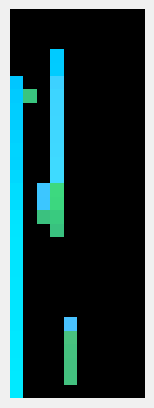

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


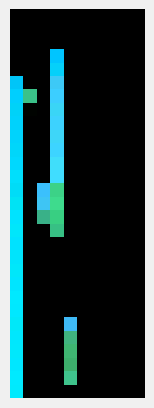

distance:


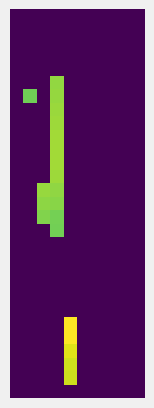

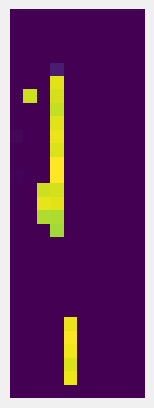

14/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.41it/s]


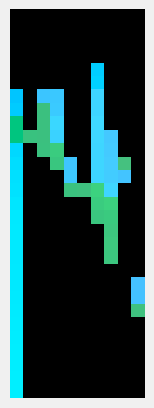

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


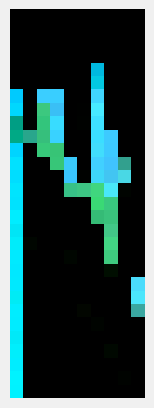

distance:


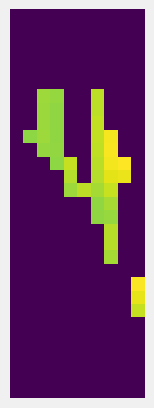

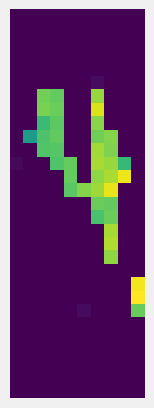

15/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.92it/s]


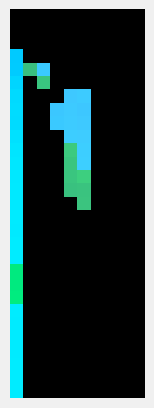

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


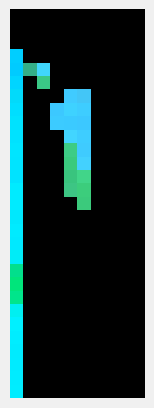

distance:


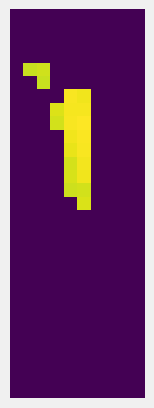

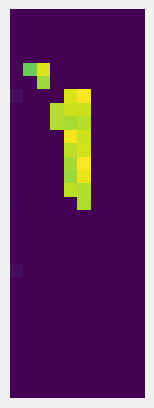

16/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.02it/s]


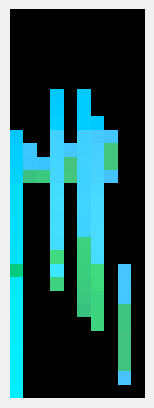

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


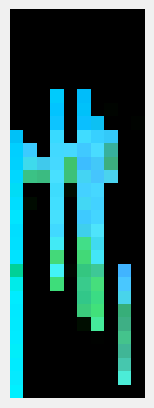

distance:


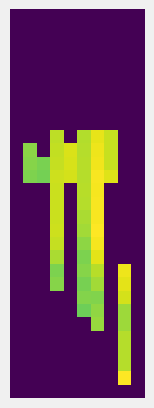

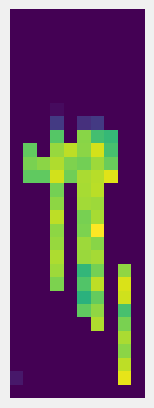

17/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


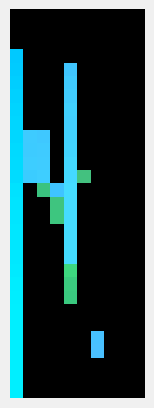

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


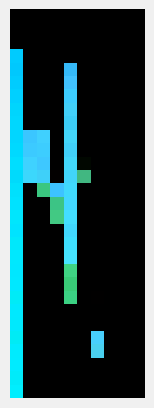

distance:


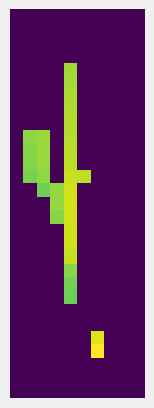

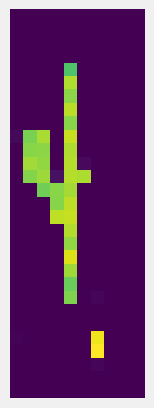

18/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.06it/s]


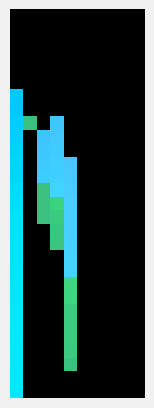

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


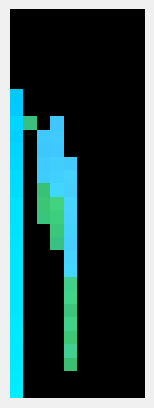

distance:


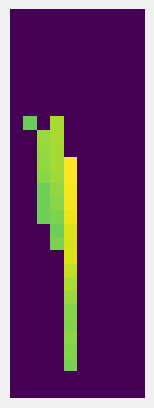

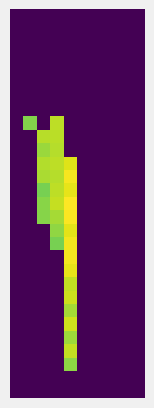

19/20


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.60it/s]


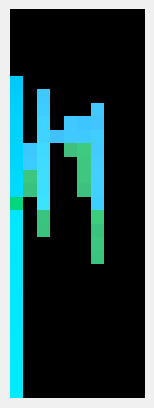

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


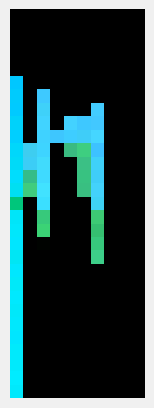

distance:


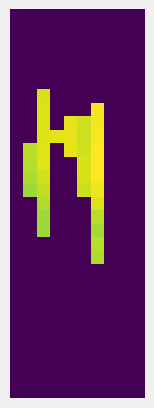

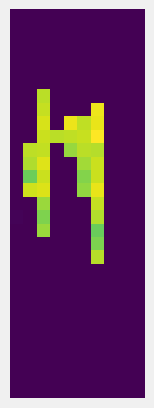

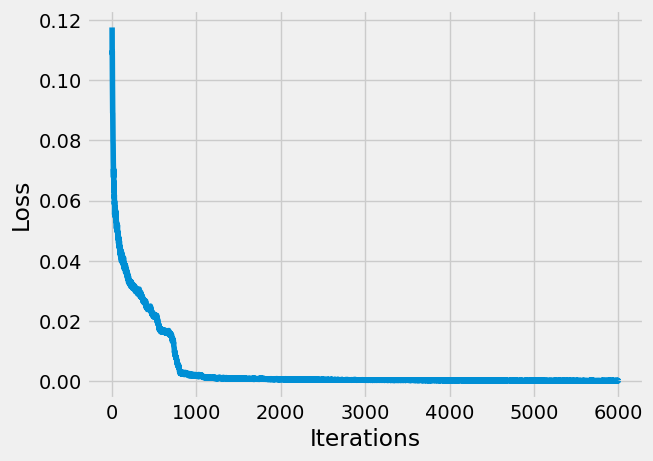

In [138]:
push_norm_dist_dataset = dataset.clone()

dist = push_norm_dist_dataset[:, 0].clone()

def add_value(tensor, value = 0.5):
    tensor1 = tensor.clone()
    
    
    nonzero_mask = tensor1 != 0

    # Add 0.5 to nonzero values
    tensor1[nonzero_mask] += value
    
    return tensor1

dist_add_values = add_value(dist, 0.5)

min_values_add_dist = dist_add_values.min()
max_values_add_dist = dist_add_values.max()
print("min = ", min_values_add_dist)
print("max = ", max_values_add_dist)
add_dist_normalized = (dist_add_values - min_values_add_dist) / (max_values_add_dist - min_values_add_dist)

print(add_dist_normalized.min(), add_dist_normalized.max(), add_dist_normalized.mean())

push_norm_dist_dataset[:, 0] = add_dist_normalized

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(push_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 20
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [139]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 84.83 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 98.46% of the same spots


the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.66% of the same spots

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.48 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of nonzero elements: 94.83 %


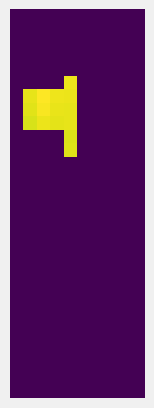

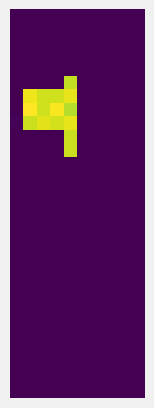

In [140]:
test_rec = reconstructed_dist[0].unsqueeze(0)
test_im = image_dist[0].unsqueeze(0)

have_same_zero_values(test_im, test_rec)

print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {test_rec.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_rec.min() == 0.0}")
zero_count = (test_rec == 0).sum().item()
total_elements = test_rec.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {test_im.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {test_im.min() == 0.0}")
zero_count = (test_im == 0).sum().item()
total_elements = test_im.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of nonzero elements:", round(percentage_zero, 2), "%")

img = test_im.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

img = test_rec.permute(1, 2, 0).detach().numpy()
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

# new loss function that penalize for not being 0 if target is 0

In [19]:
def custom_reconstruction_loss(output, target, target_threshold = 0, scale = 5):
    # Calculate the reconstruction loss
    recon_loss = F.mse_loss(output, target, reduction='none')
    
    # Apply higher penalty if target is zero
    penalty = torch.where(target == target_threshold, scale * recon_loss, recon_loss)
    
    # Calculate the mean loss
    mean_loss = torch.mean(penalty)
    
    return mean_loss

# reference #1 normal data, no normalization

torch.Size([38348, 3, 29, 10])
0/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.63it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


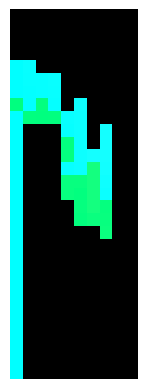

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


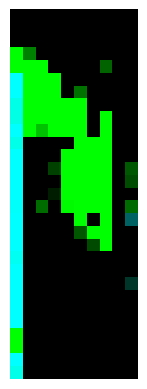

distance:


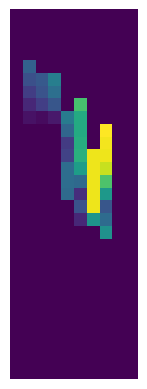

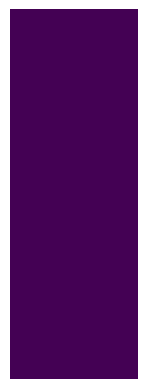

1/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


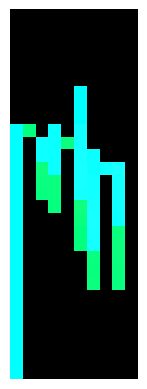

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


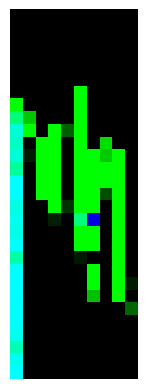

distance:


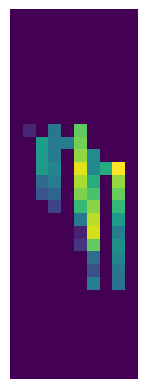

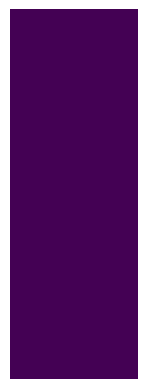

2/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


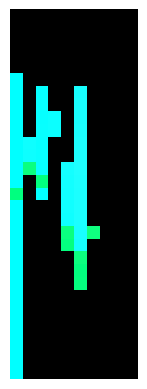

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


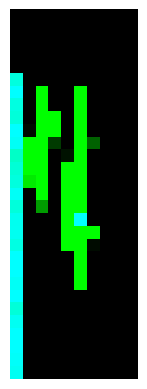

distance:


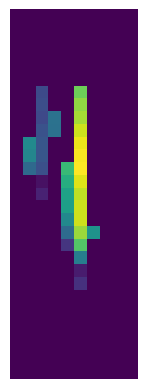

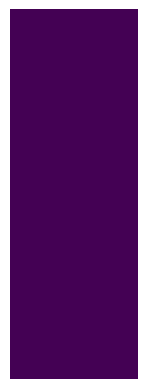

3/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.12it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


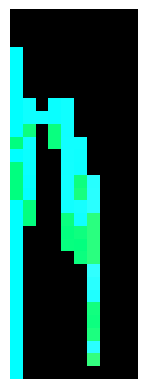

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


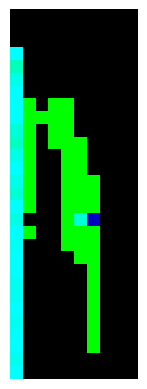

distance:


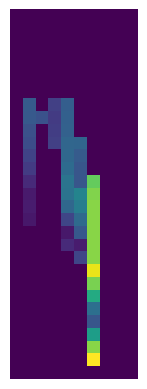

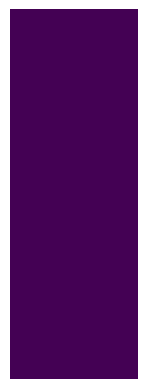

4/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.92it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


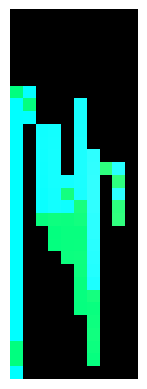

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


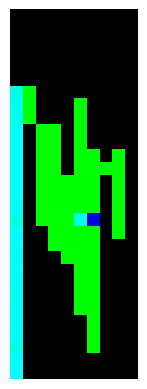

distance:


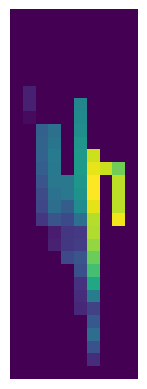

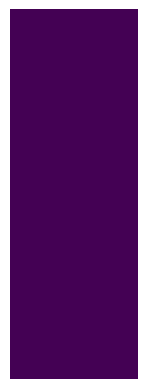

5/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.73it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


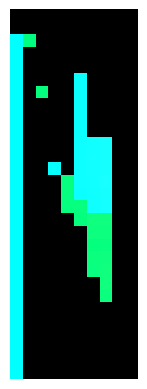

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


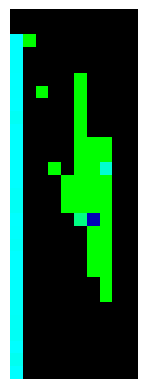

distance:


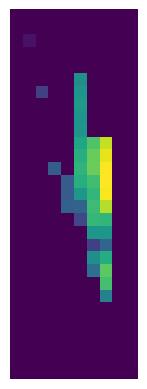

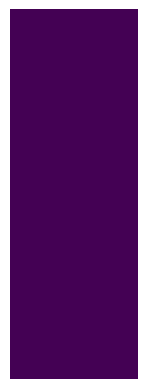

6/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.30it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


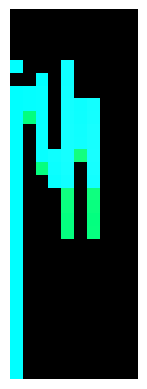

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


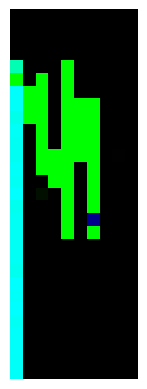

distance:


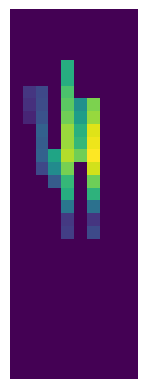

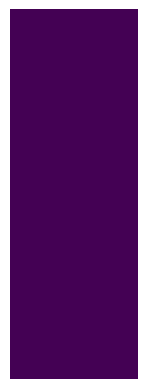

7/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


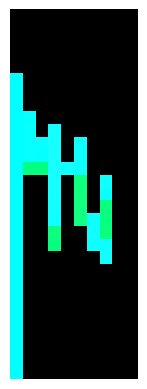

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


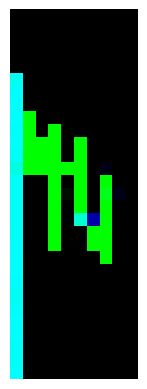

distance:


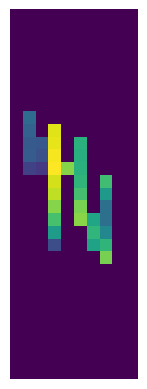

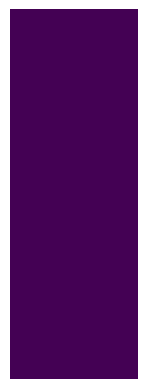

8/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.32it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


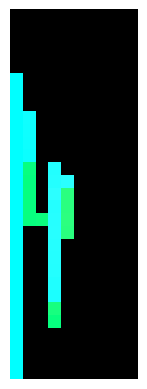

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


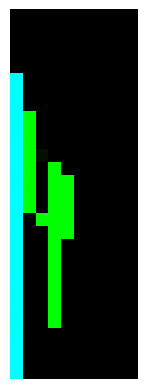

distance:


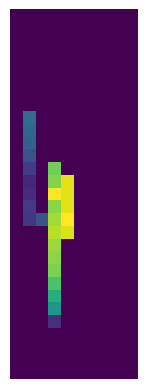

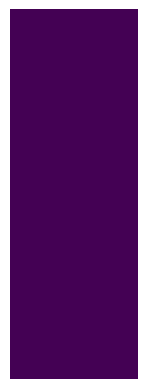

9/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.11it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


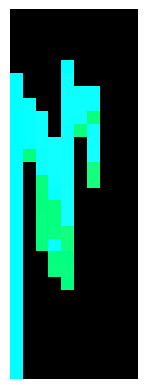

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


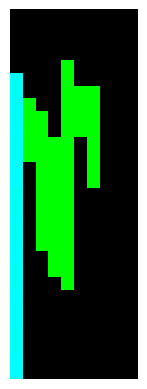

distance:


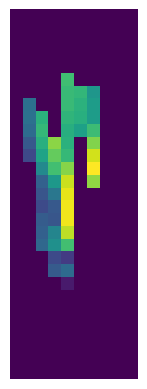

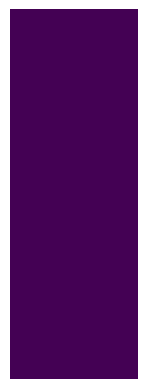

10/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


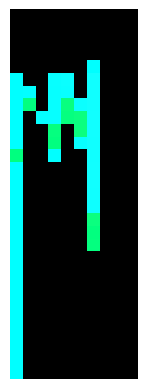

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


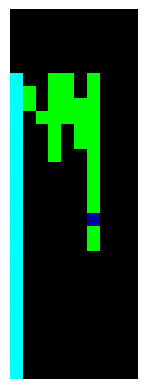

distance:


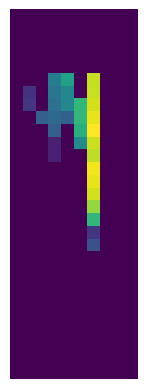

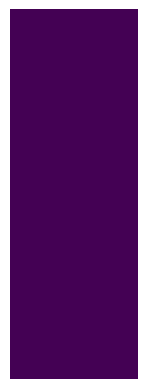

11/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


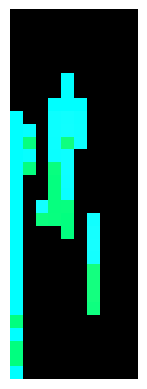

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


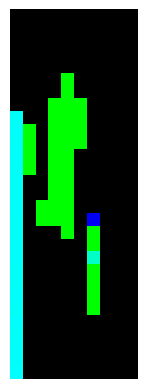

distance:


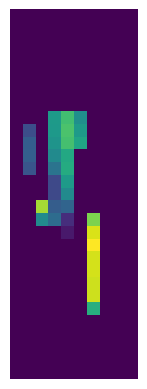

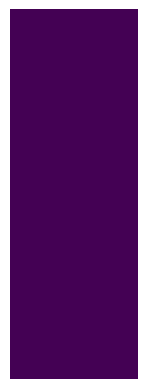

12/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


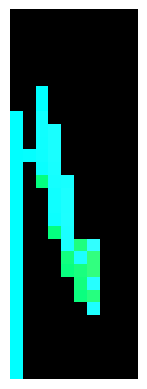

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


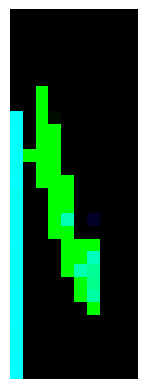

distance:


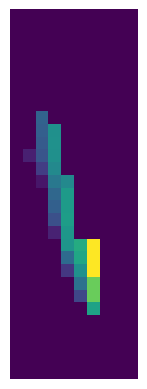

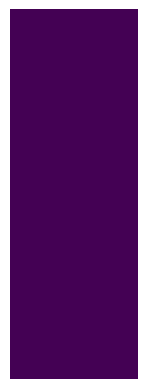

13/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.70it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


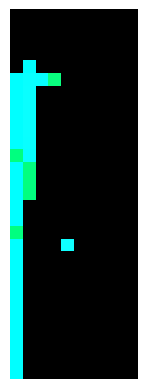

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


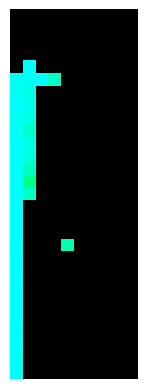

distance:


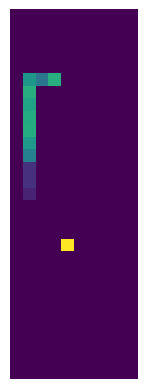

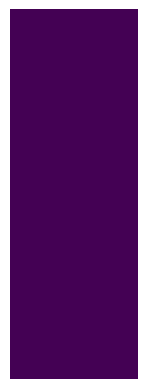

14/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


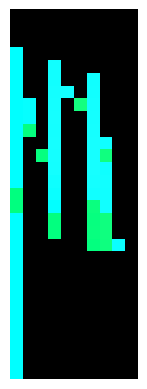

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


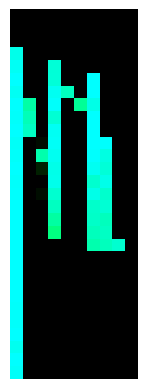

distance:


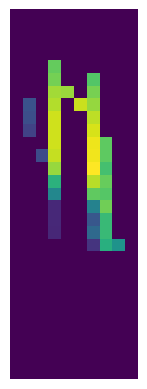

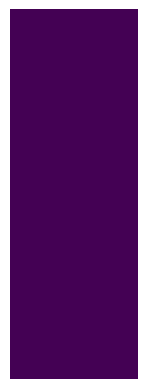

15/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


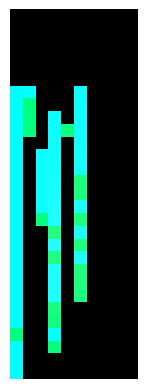

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


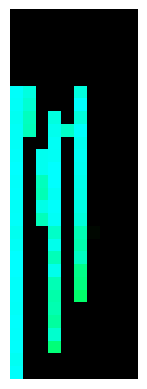

distance:


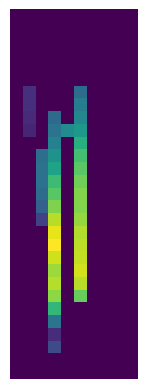

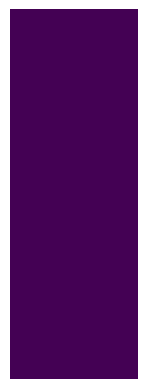

16/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


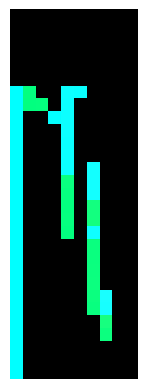

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


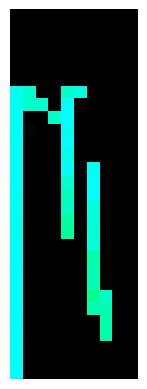

distance:


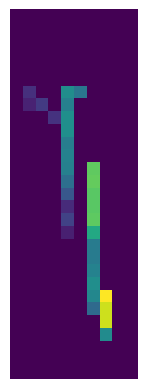

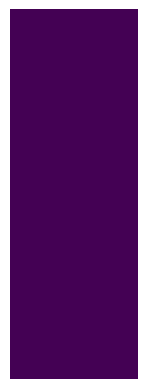

17/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.96it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


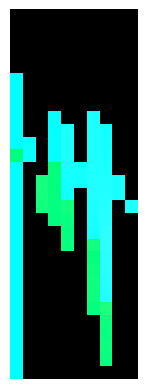

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


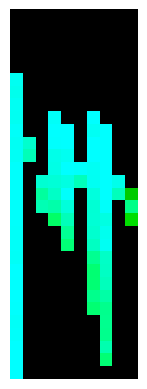

distance:


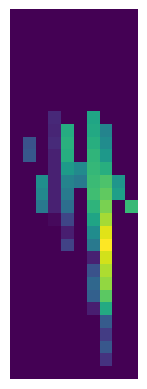

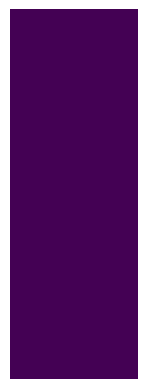

18/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.69it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


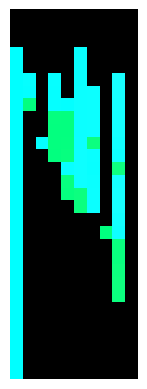

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


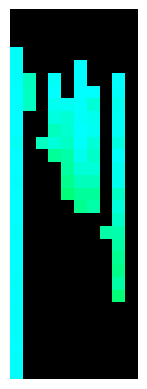

distance:


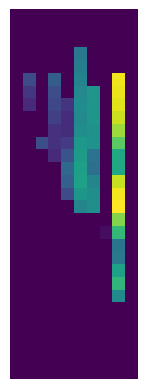

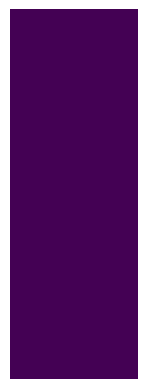

19/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.81it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


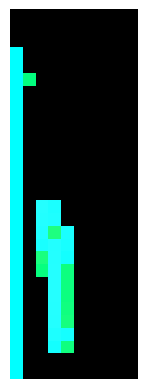

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


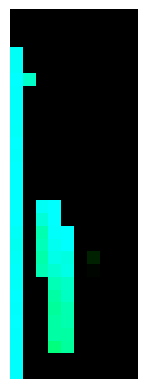

distance:


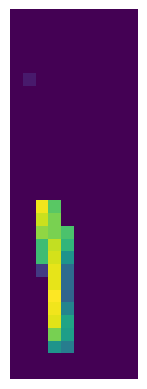

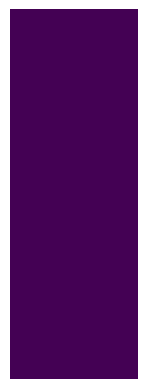

20/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.79it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


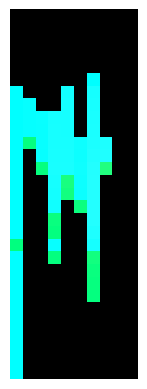

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


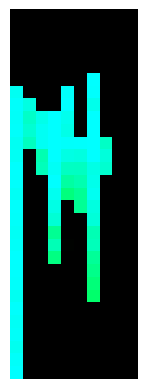

distance:


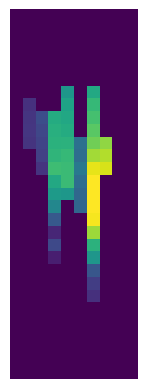

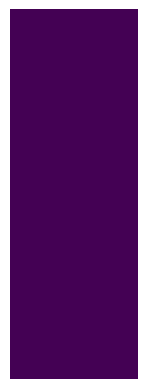

21/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


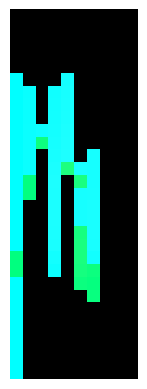

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


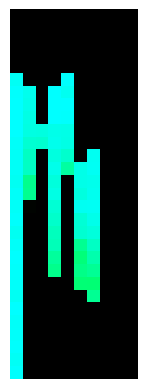

distance:


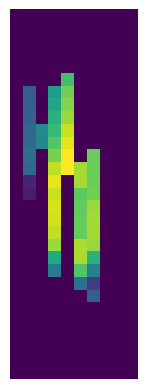

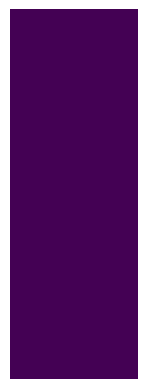

22/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


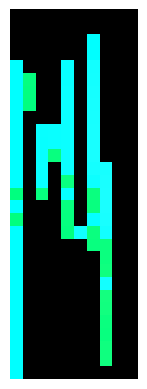

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


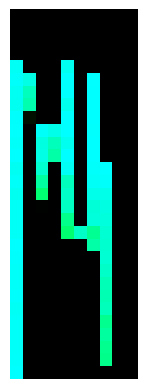

distance:


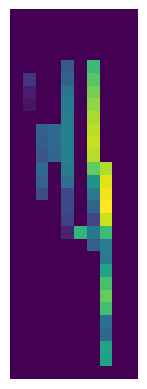

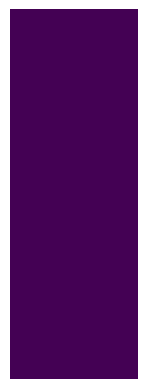

23/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.87it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


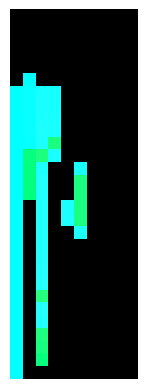

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


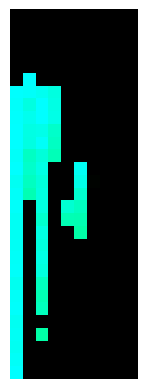

distance:


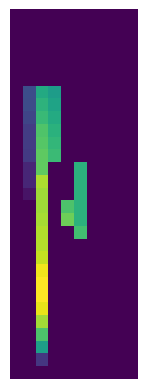

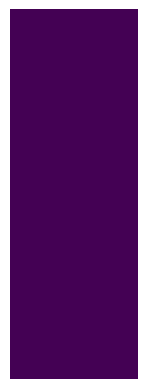

24/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.07it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


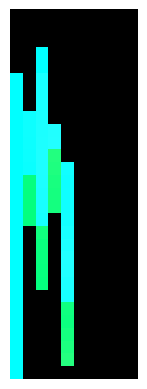

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


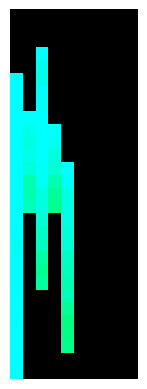

distance:


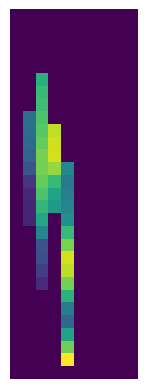

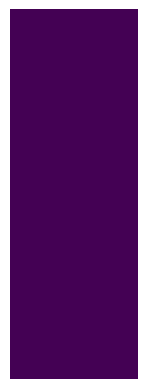

25/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


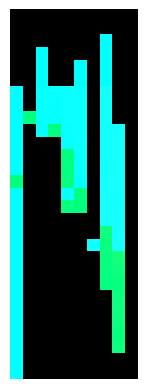

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


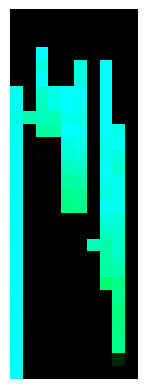

distance:


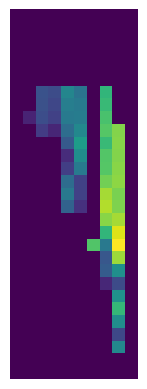

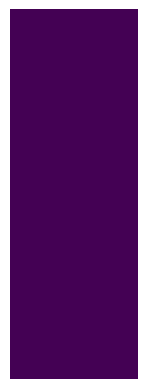

26/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.60it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


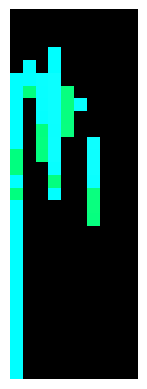

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


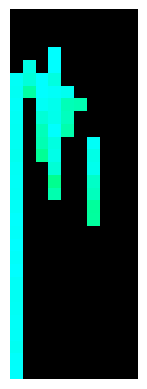

distance:


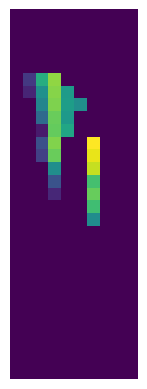

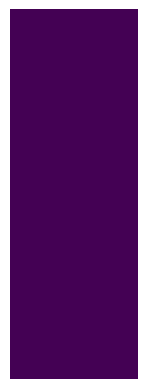

27/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


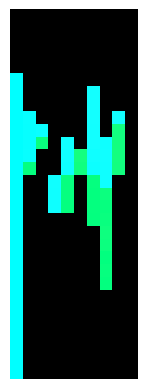

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


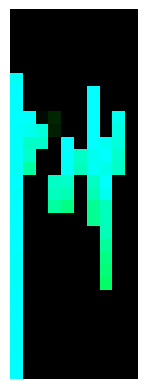

distance:


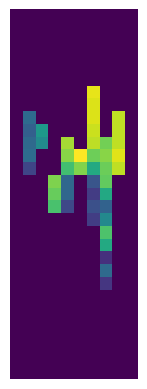

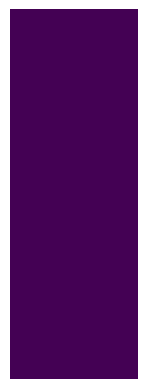

28/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.19it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


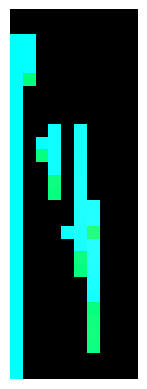

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


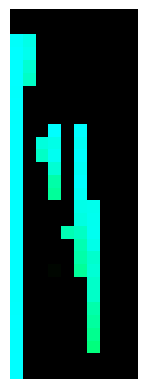

distance:


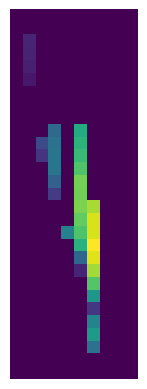

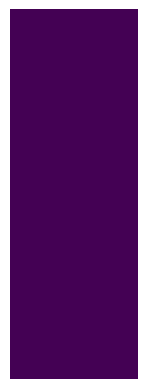

29/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.87it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


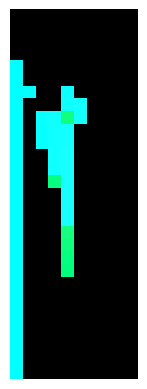

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


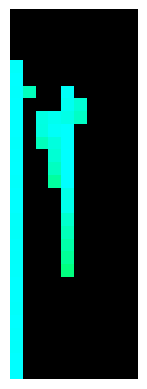

distance:


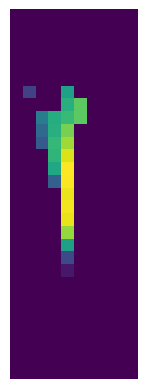

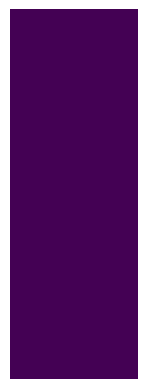

30/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.08it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


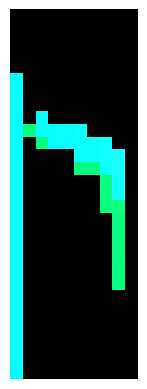

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


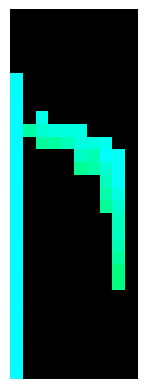

distance:


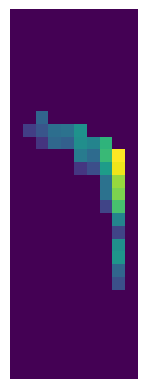

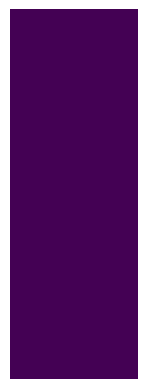

31/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.11it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


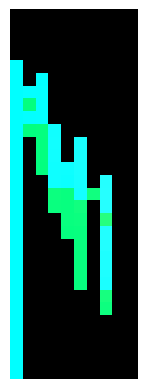

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


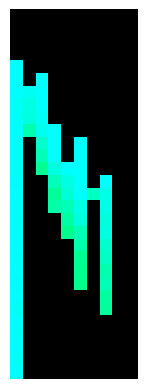

distance:


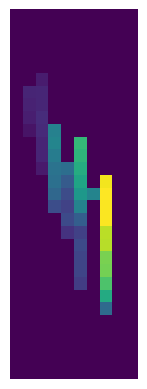

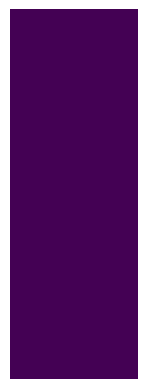

32/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.56it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


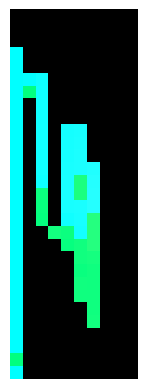

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


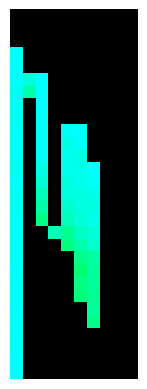

distance:


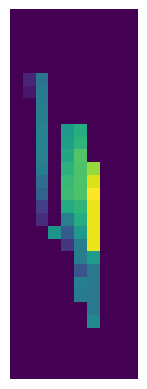

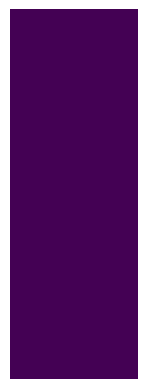

33/100


 49%|███████████████████▉                     | 146/300 [00:05<00:06, 24.51it/s]


KeyboardInterrupt: 

In [20]:
dataset = torch.load('data/dataset.pt')
dataset = dataset.permute(1, 0, 2, 3)
print(dataset.shape)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 100
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = loss_function(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [ ]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nOverall:")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
zero_count = (reconstructed == 0).sum().item()
total_elements = reconstructed.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {images.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
zero_count = (images == 0).sum().item()
total_elements = images.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(images, reconstructed)


print("\n")
print("\n")
print("\nDistance")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)

# reference #2 normal normalization

0/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.48it/s]


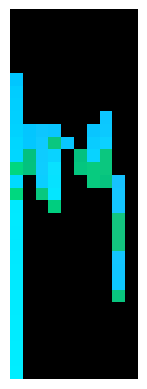

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


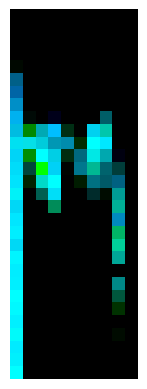

distance:


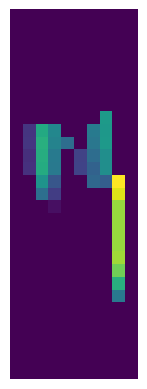

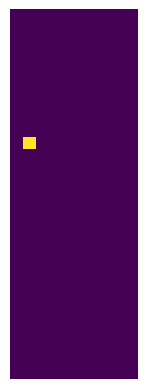

1/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.95it/s]


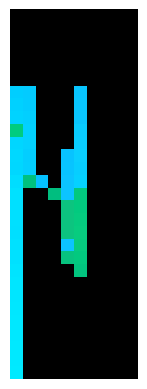

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


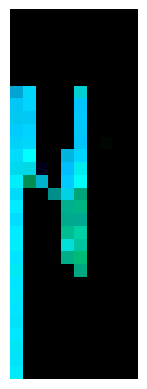

distance:


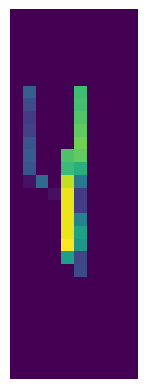

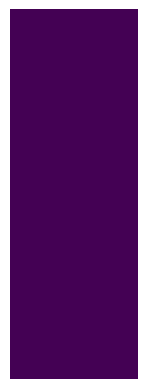

2/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.05it/s]


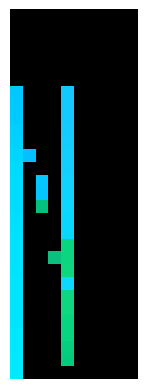

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


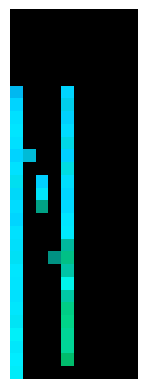

distance:


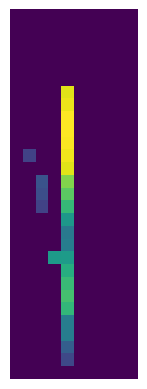

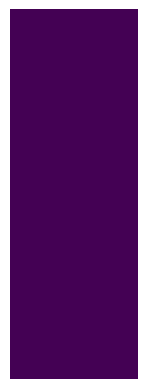

3/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.10it/s]


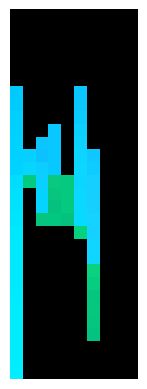

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


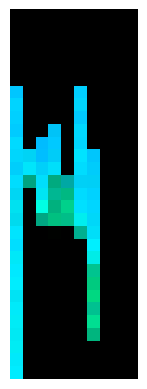

distance:


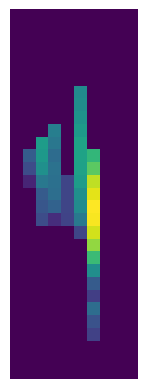

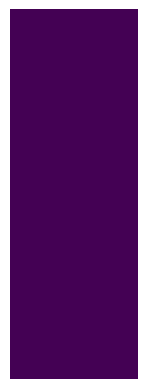

4/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.03it/s]


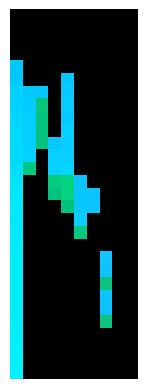

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


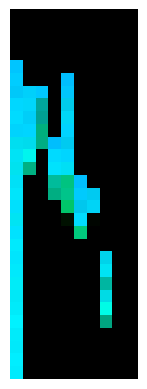

distance:


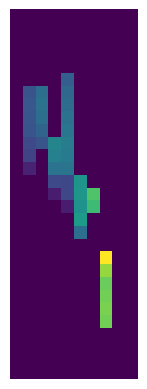

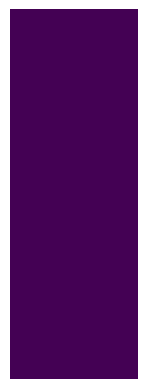

5/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.29it/s]


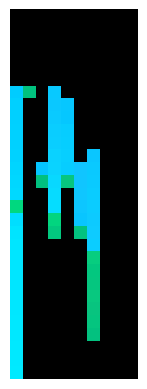

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


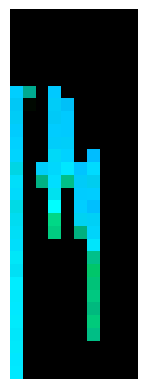

distance:


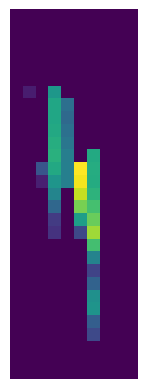

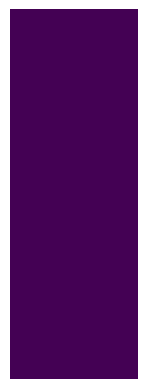

6/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.80it/s]


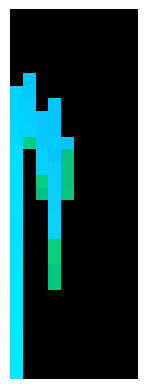

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


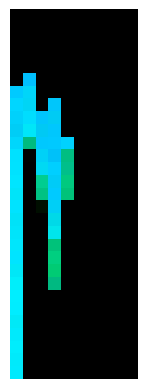

distance:


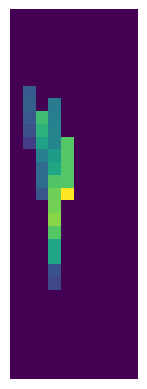

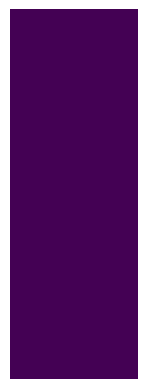

7/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.91it/s]


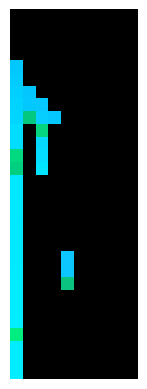

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


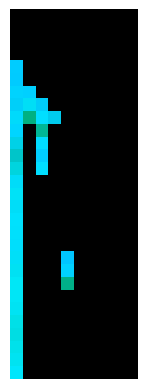

distance:


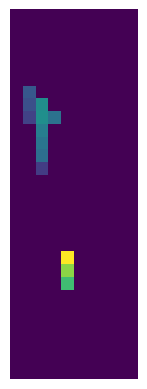

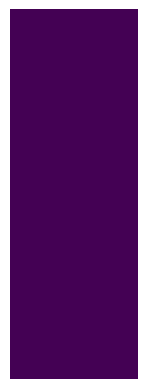

8/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.84it/s]


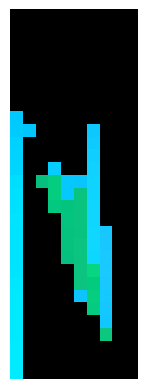

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


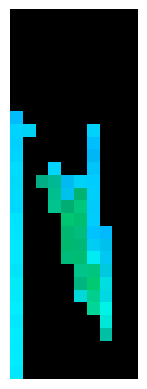

distance:


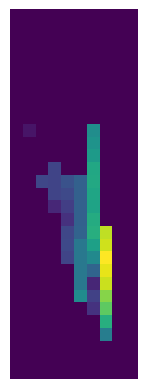

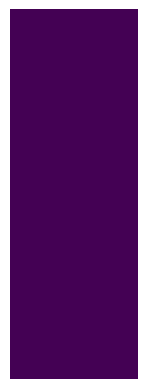

9/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.13it/s]


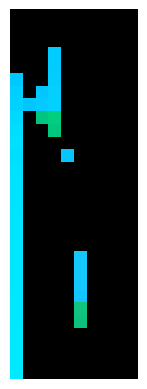

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


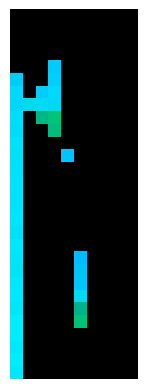

distance:


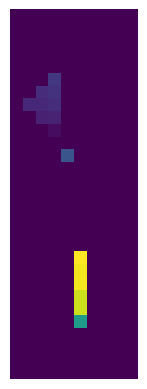

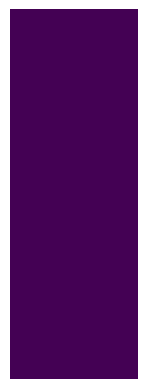

10/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.99it/s]


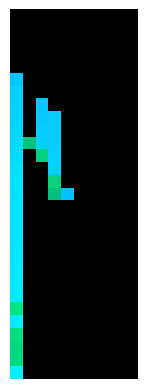

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


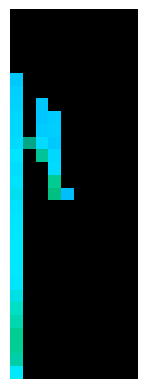

distance:


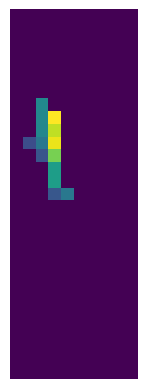

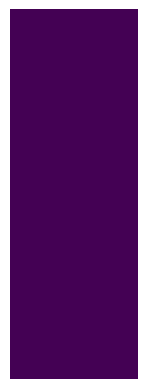

11/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.10it/s]


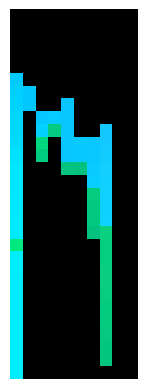

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


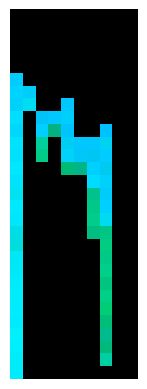

distance:


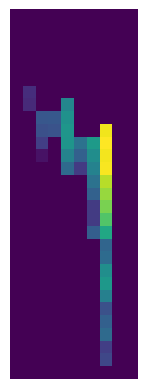

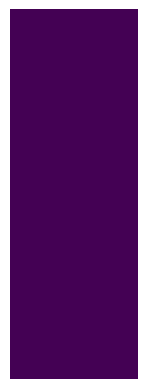

12/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.81it/s]


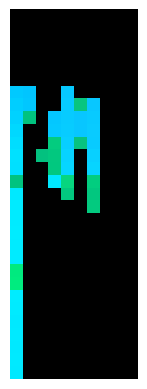

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


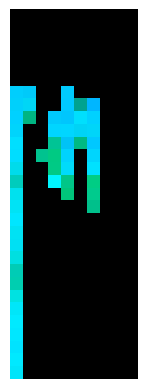

distance:


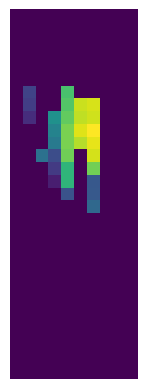

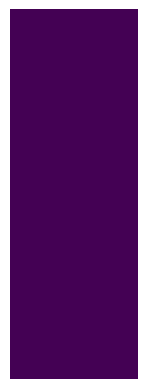

13/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.99it/s]


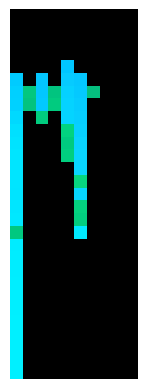

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


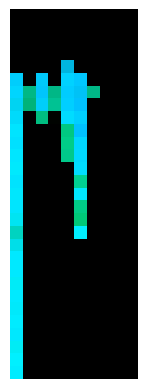

distance:


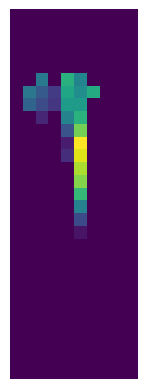

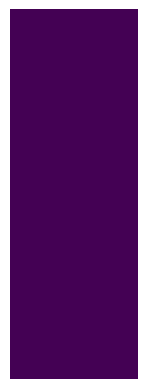

14/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.89it/s]


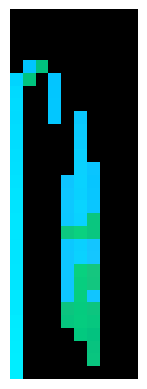

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


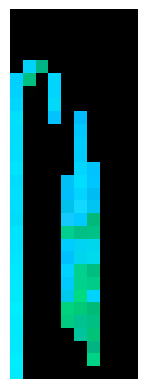

distance:


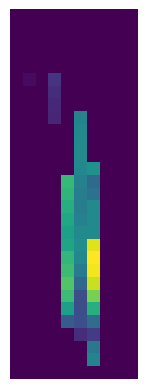

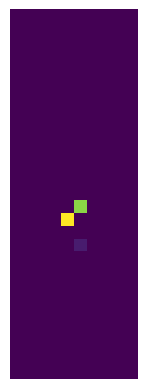

15/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.01it/s]


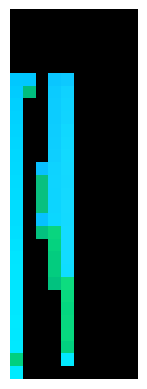

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


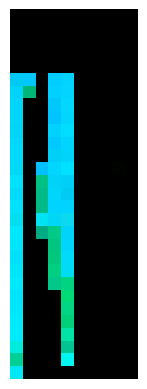

distance:


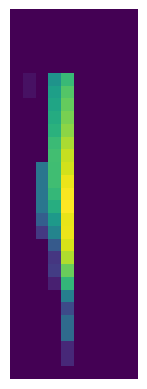

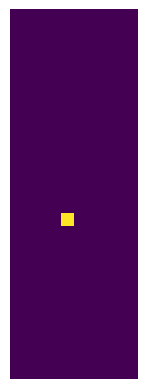

16/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.76it/s]


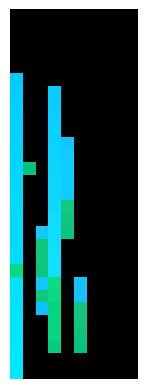

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


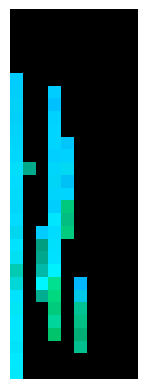

distance:


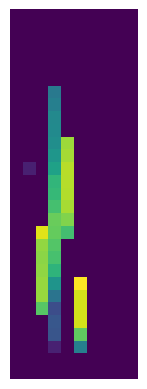

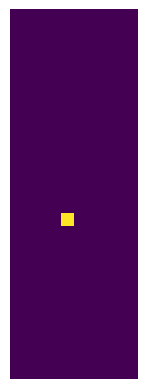

17/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.89it/s]


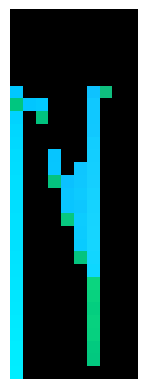

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


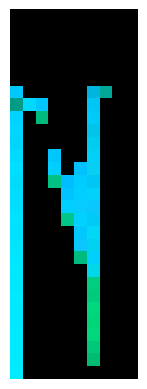

distance:


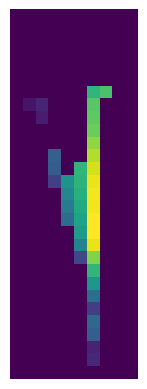

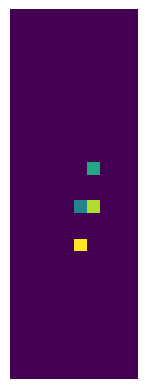

18/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.78it/s]


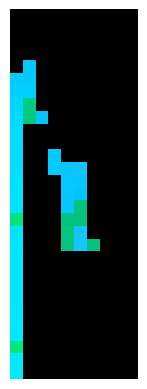

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


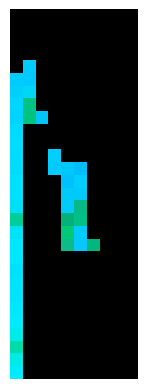

distance:


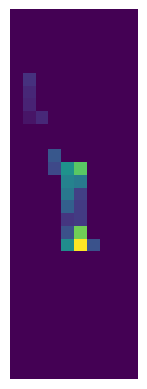

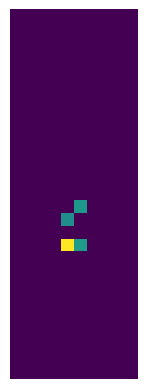

19/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.08it/s]


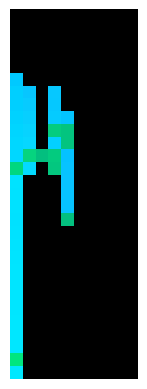

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


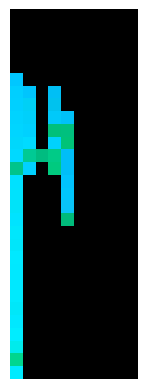

distance:


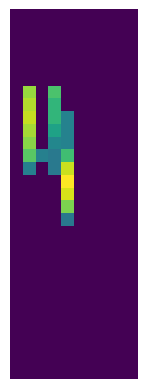

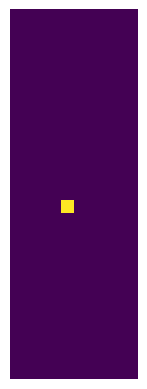

20/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.59it/s]


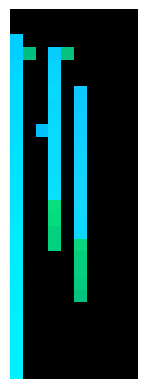

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


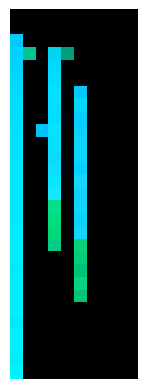

distance:


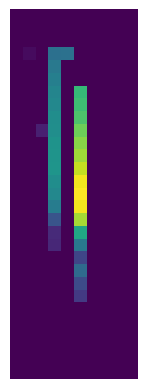

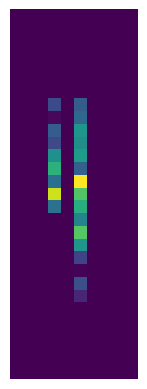

21/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.95it/s]


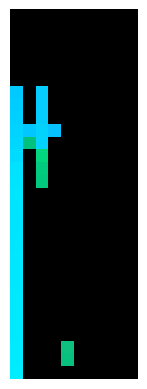

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


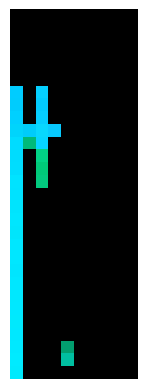

distance:


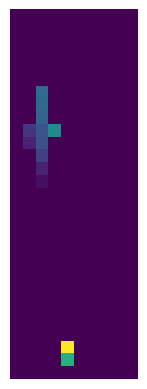

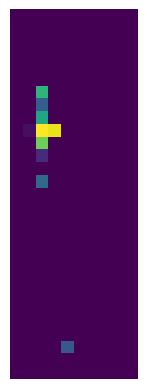

22/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.42it/s]


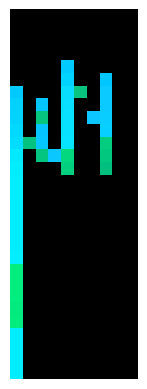

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


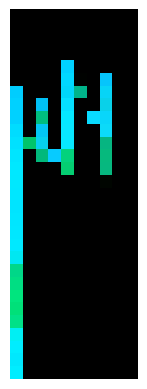

distance:


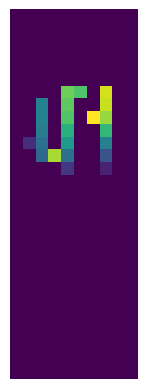

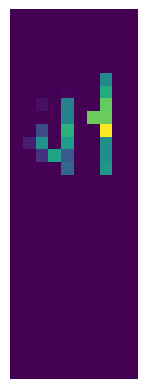

23/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


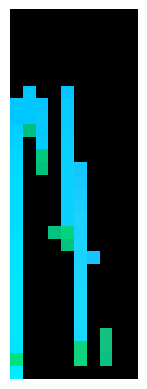

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


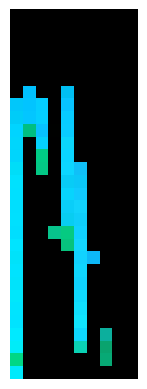

distance:


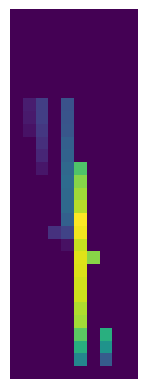

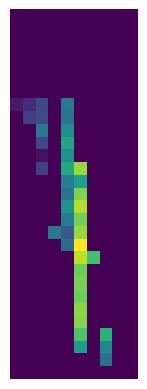

24/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.81it/s]


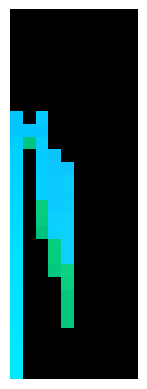

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


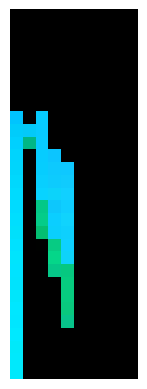

distance:


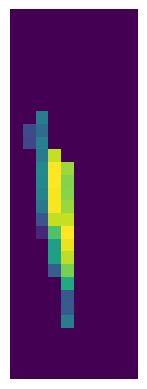

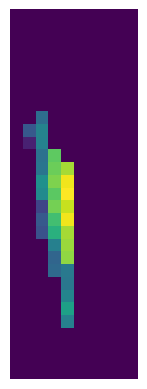

25/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.66it/s]


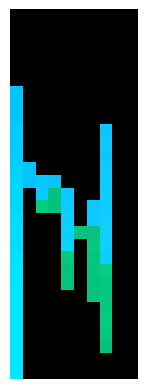

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


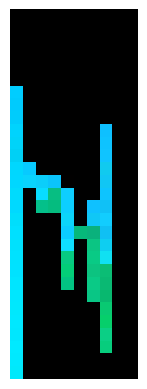

distance:


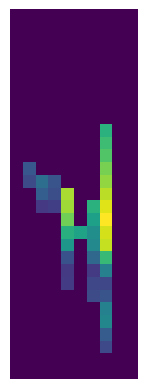

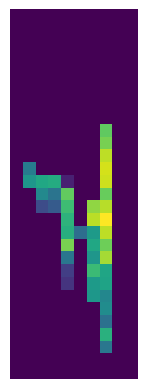

26/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.72it/s]


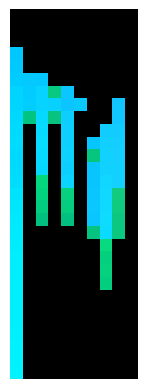

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


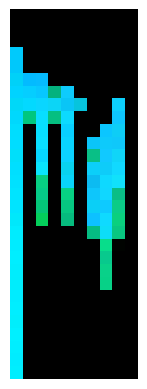

distance:


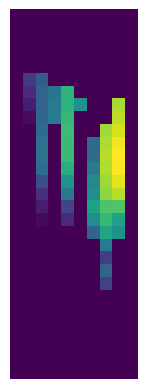

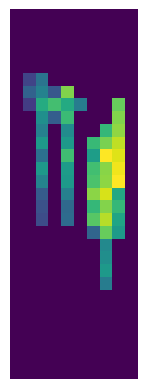

27/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.14it/s]


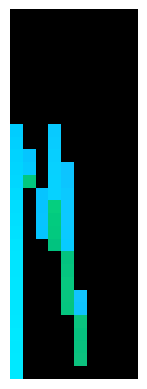

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


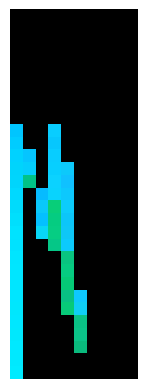

distance:


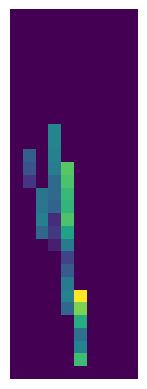

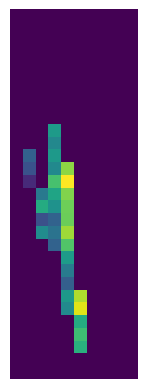

28/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.23it/s]


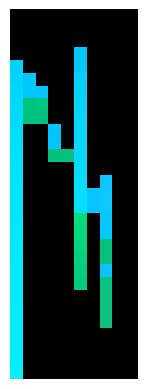

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


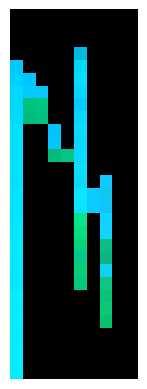

distance:


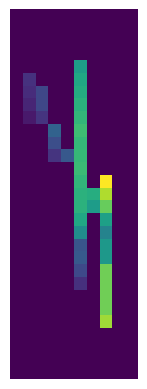

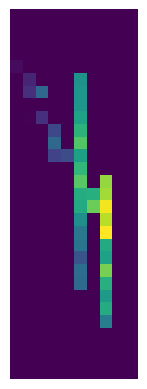

29/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.18it/s]


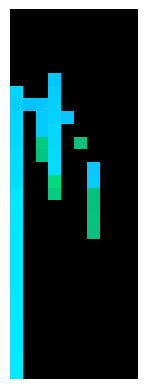

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


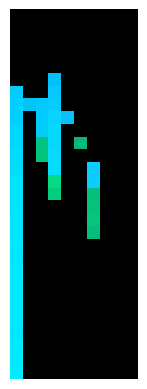

distance:


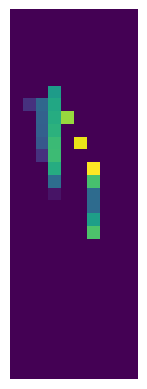

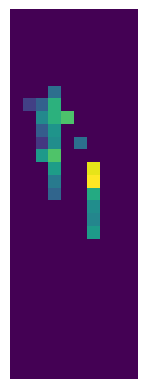

30/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.36it/s]


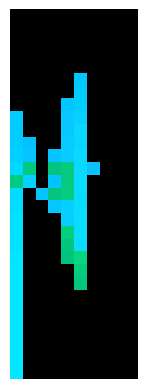

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


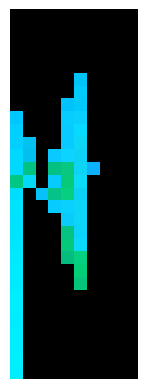

distance:


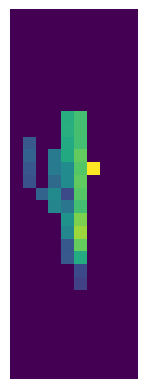

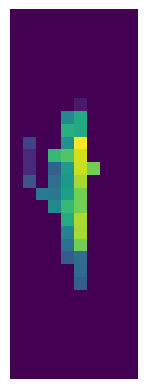

31/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.76it/s]


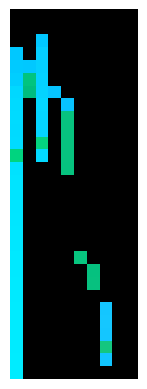

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


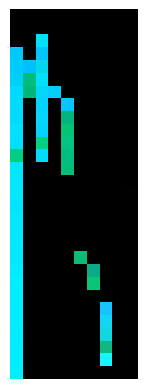

distance:


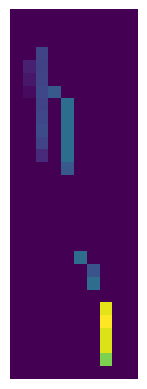

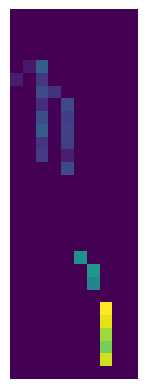

32/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.56it/s]


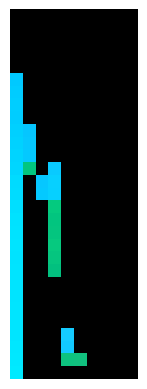

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


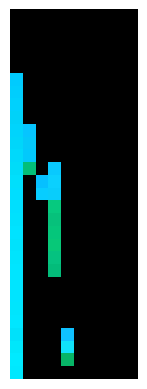

distance:


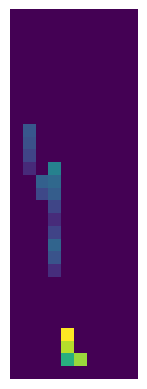

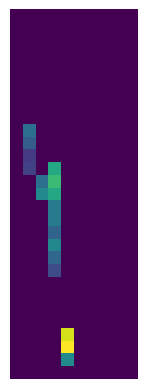

33/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


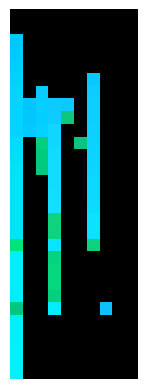

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


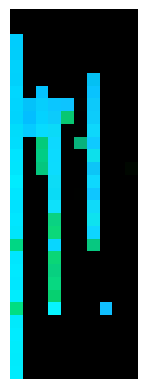

distance:


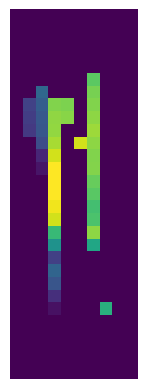

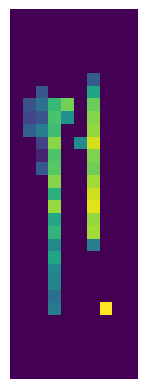

34/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.73it/s]


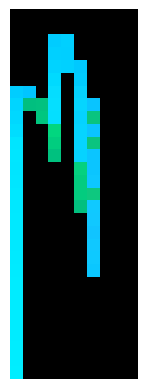

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


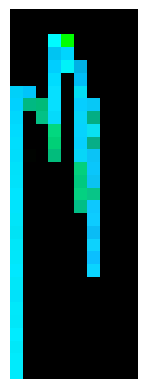

distance:


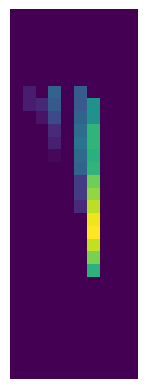

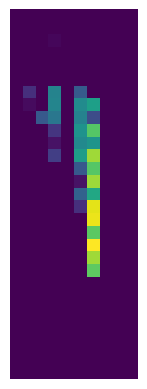

35/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.48it/s]


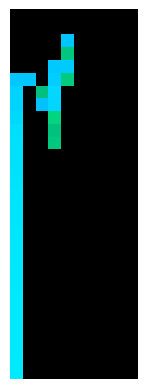

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


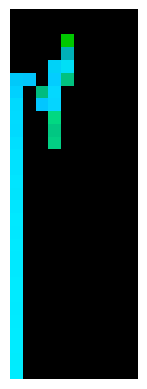

distance:


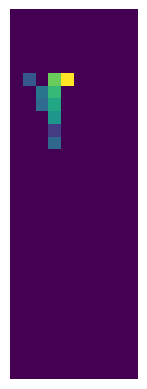

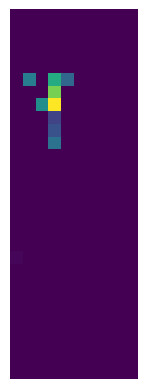

36/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.99it/s]


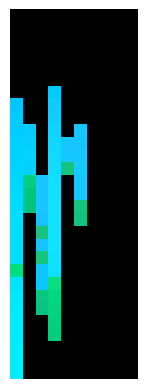

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


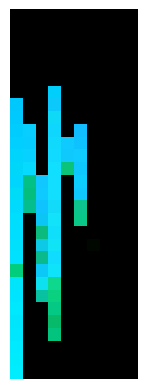

distance:


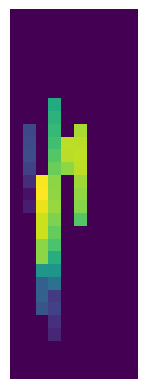

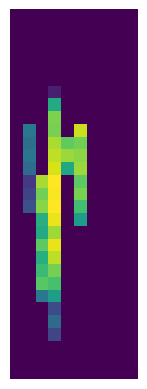

37/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.98it/s]


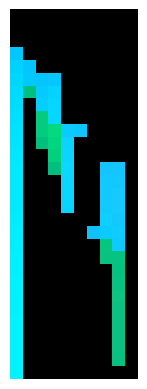

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


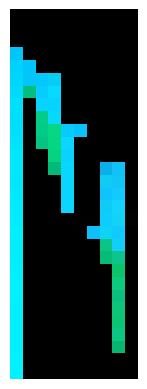

distance:


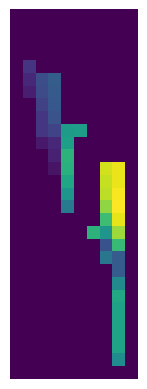

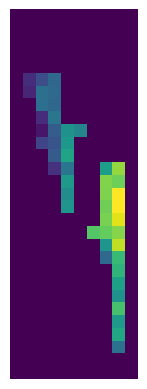

38/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.47it/s]


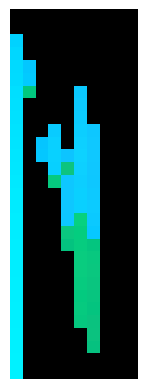

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


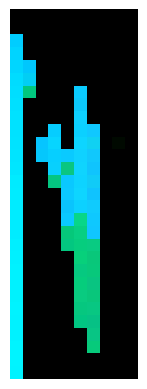

distance:


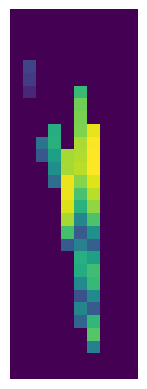

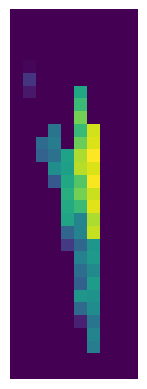

39/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.45it/s]


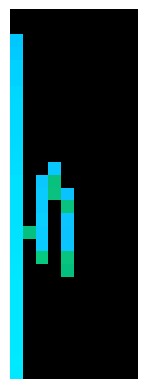

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


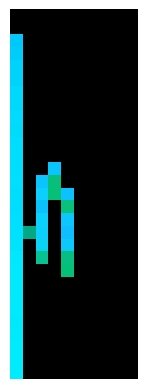

distance:


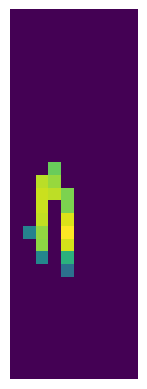

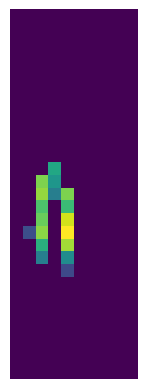

40/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]


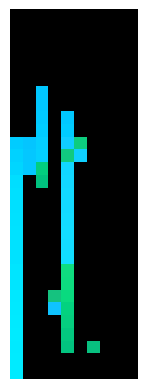

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


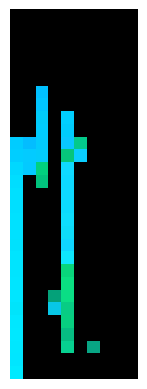

distance:


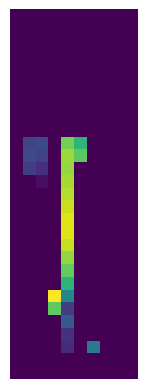

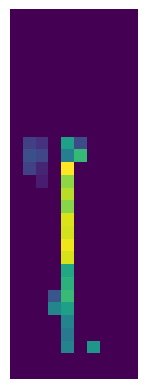

41/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.09it/s]


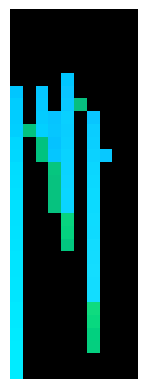

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


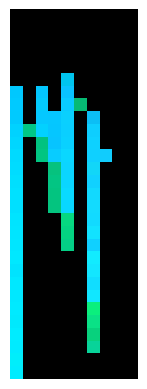

distance:


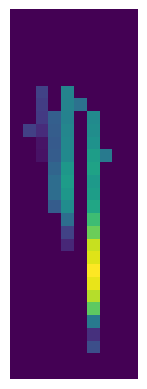

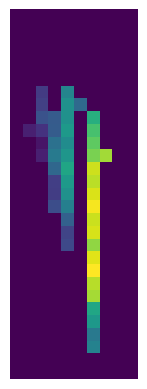

42/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.35it/s]


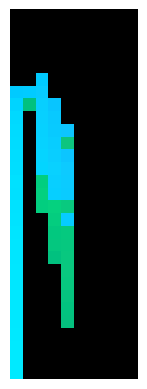

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


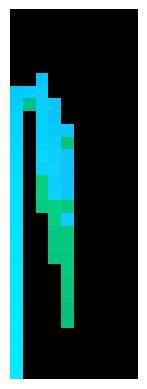

distance:


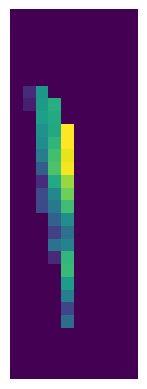

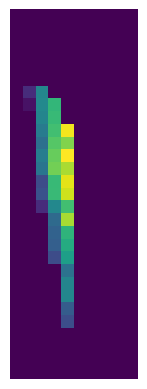

43/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.34it/s]


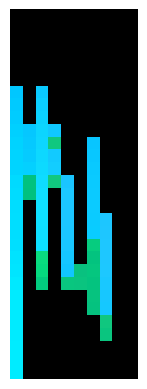

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


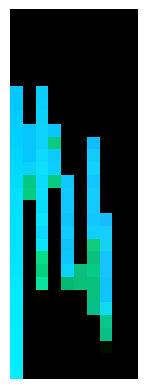

distance:


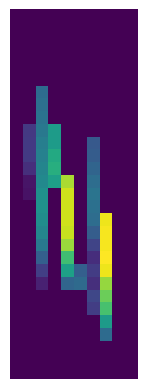

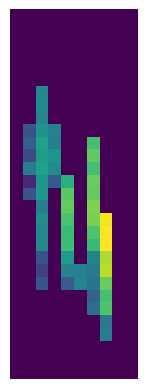

44/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.36it/s]


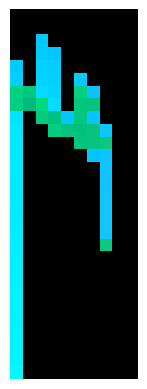

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


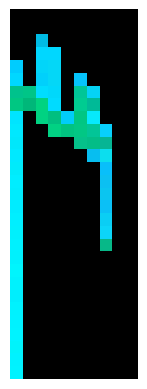

distance:


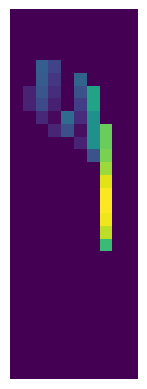

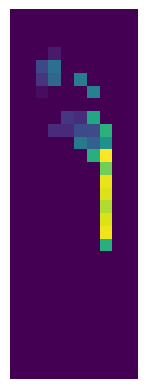

45/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.96it/s]


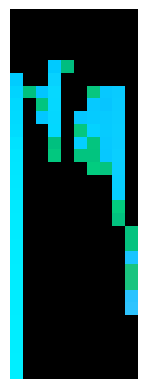

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


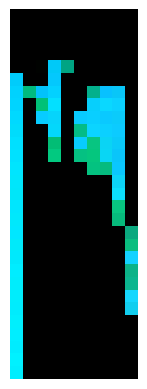

distance:


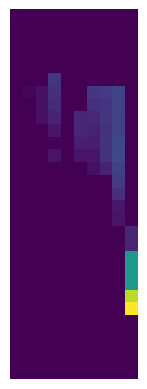

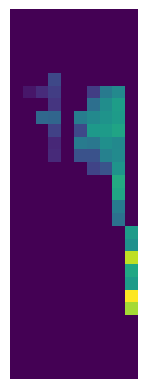

46/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.41it/s]


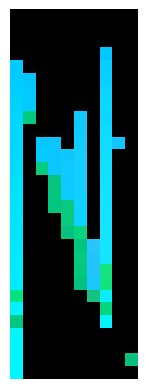

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


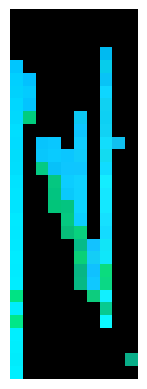

distance:


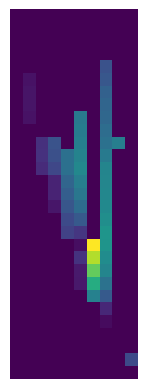

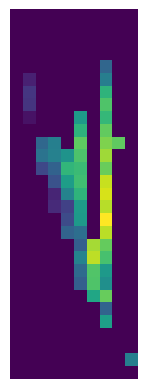

47/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.58it/s]


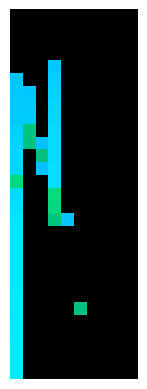

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


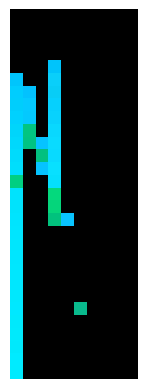

distance:


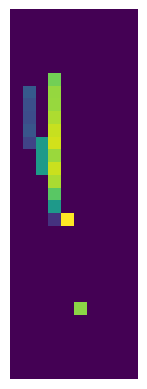

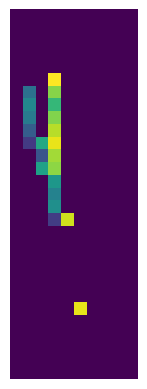

48/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.57it/s]


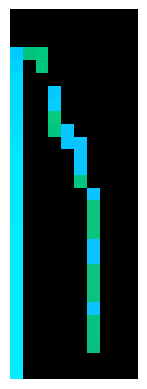

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


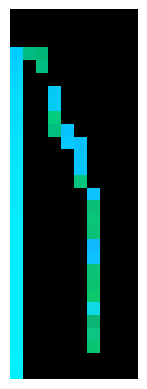

distance:


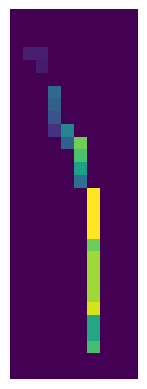

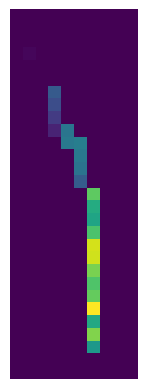

49/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.67it/s]


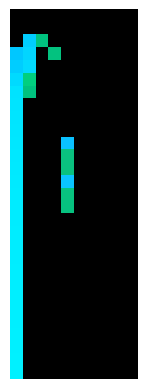

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


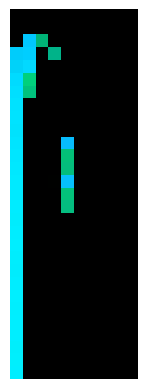

distance:


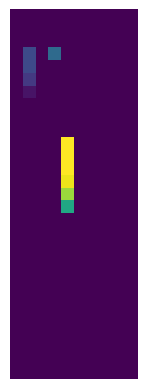

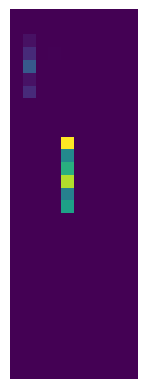

50/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.83it/s]


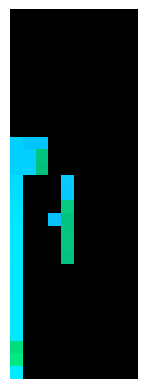

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


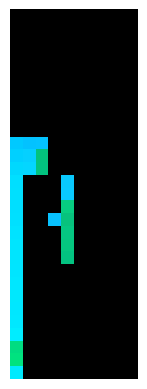

distance:


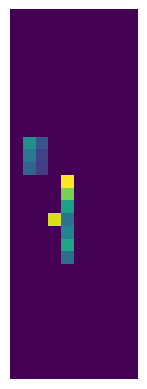

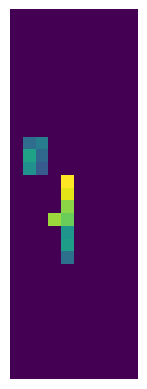

51/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.74it/s]


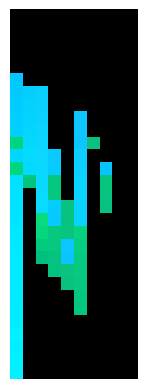

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


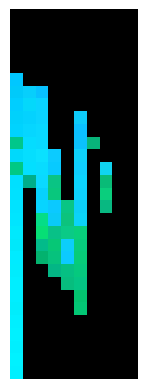

distance:


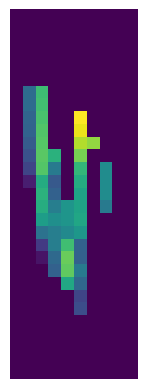

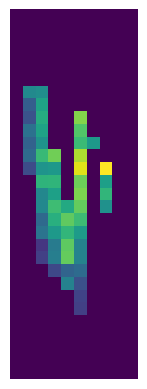

52/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.78it/s]


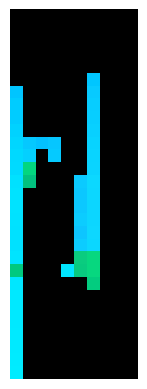

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


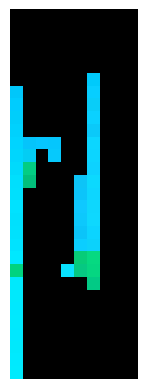

distance:


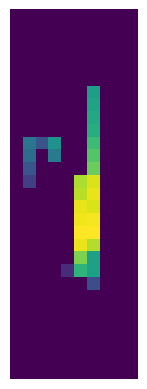

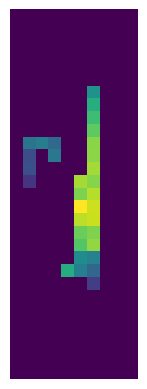

53/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.41it/s]


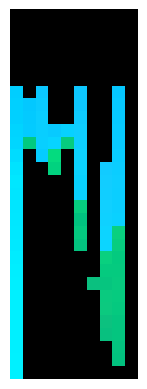

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


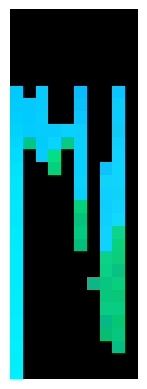

distance:


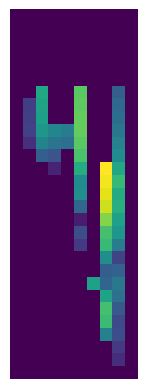

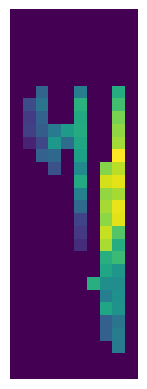

54/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 23.07it/s]


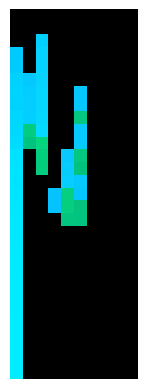

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


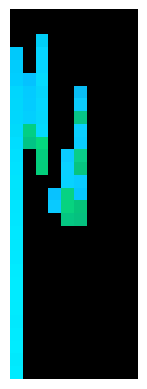

distance:


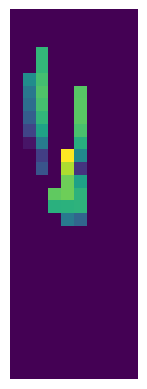

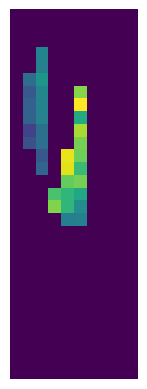

55/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]


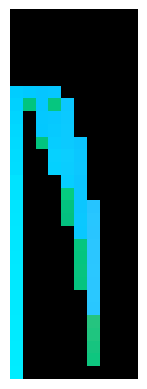

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


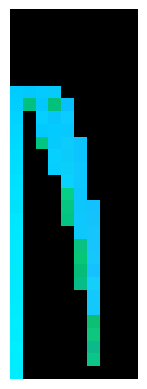

distance:


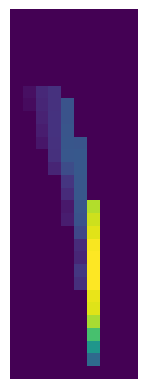

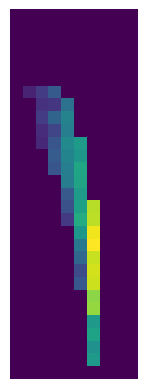

56/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.62it/s]


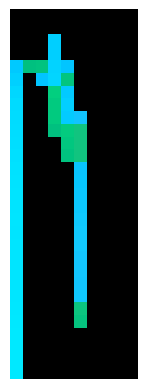

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


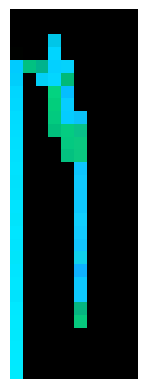

distance:


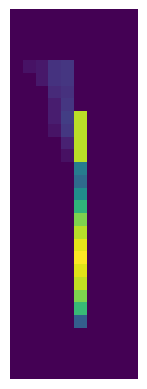

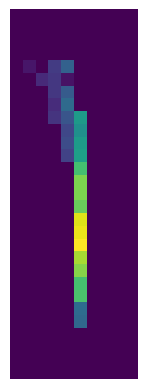

57/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.75it/s]


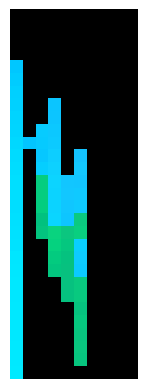

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


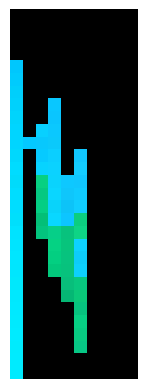

distance:


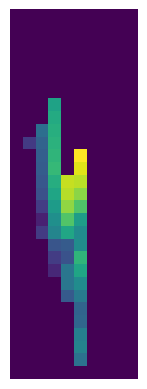

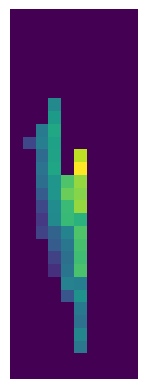

58/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.02it/s]


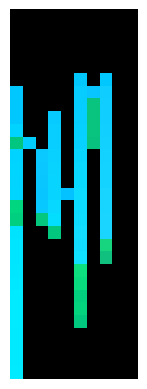

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


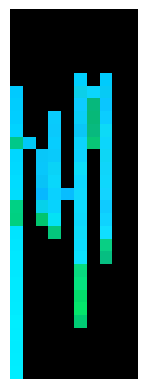

distance:


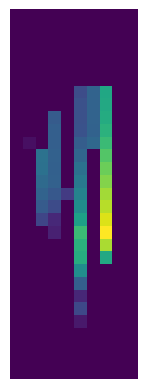

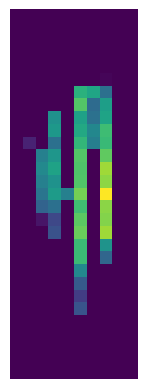

59/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.70it/s]


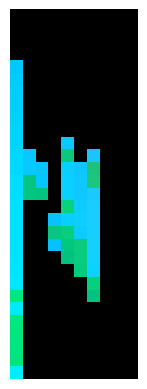

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


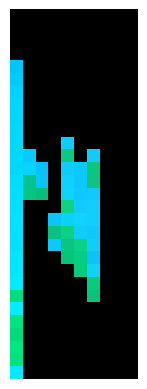

distance:


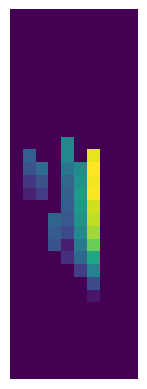

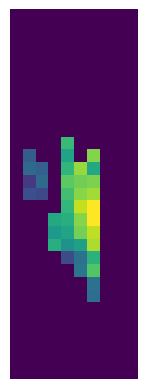

60/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.66it/s]


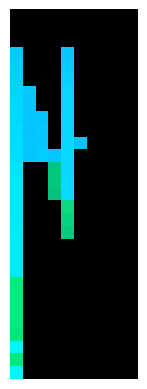

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


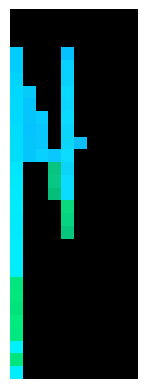

distance:


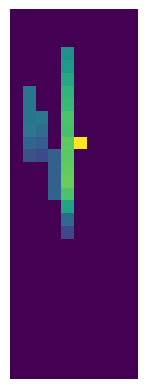

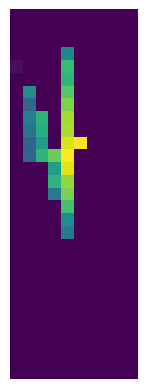

61/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.57it/s]


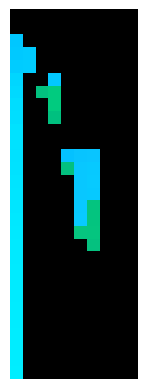

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


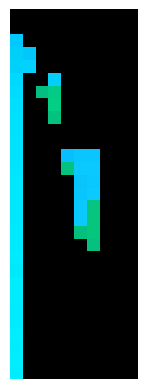

distance:


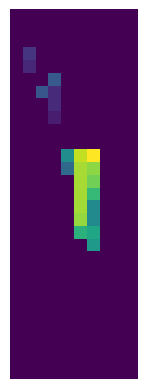

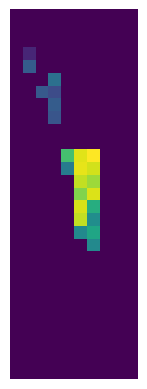

62/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.71it/s]


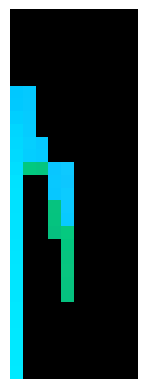

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


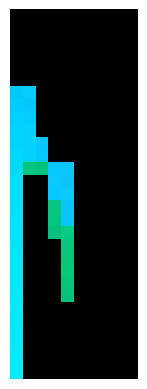

distance:


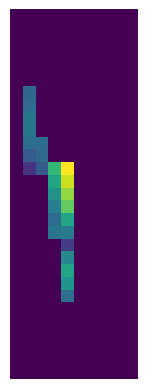

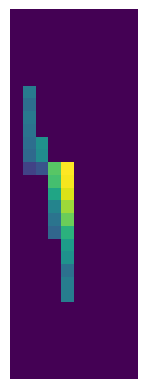

63/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.81it/s]


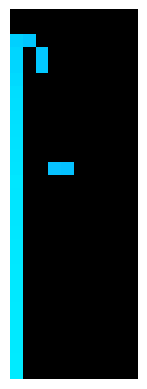

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


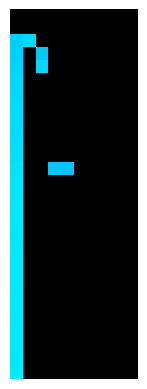

distance:


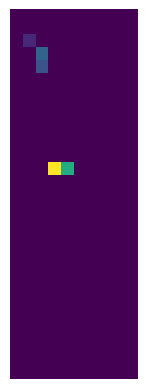

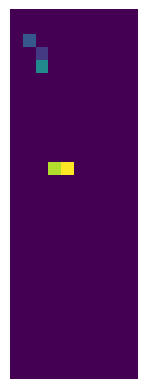

64/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.48it/s]


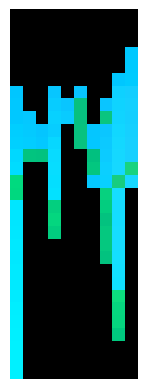

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


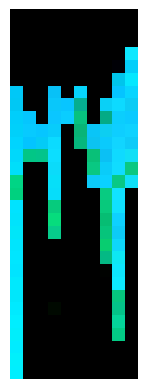

distance:


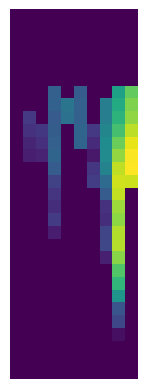

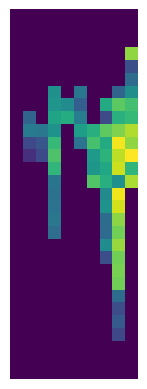

65/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.69it/s]


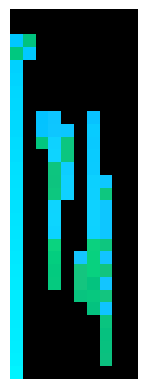

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


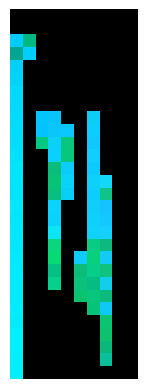

distance:


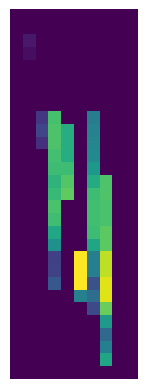

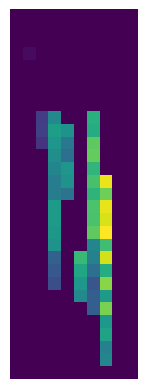

66/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.21it/s]


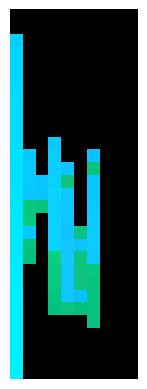

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


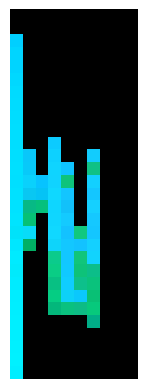

distance:


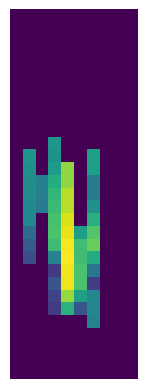

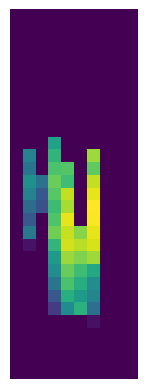

67/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.42it/s]


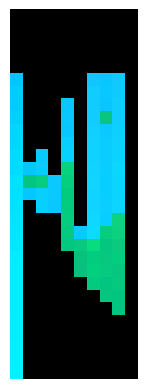

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


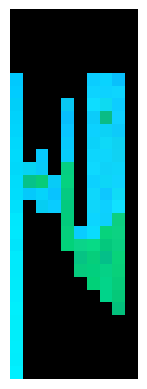

distance:


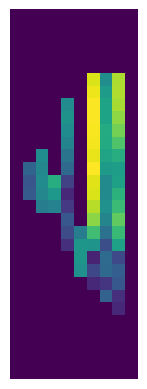

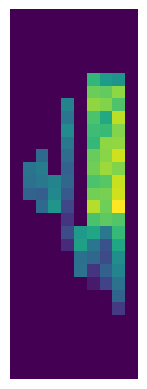

68/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.79it/s]


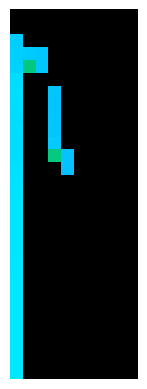

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


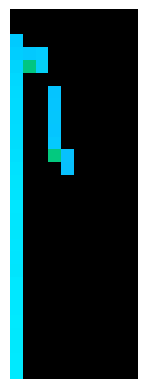

distance:


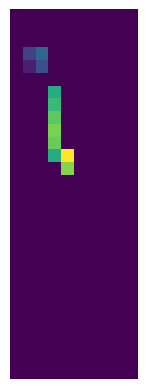

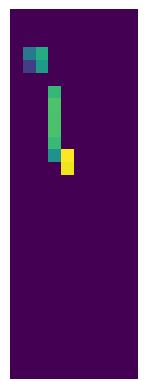

69/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.75it/s]


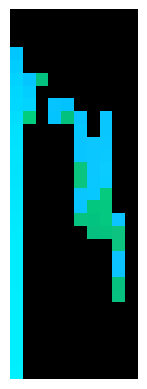

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


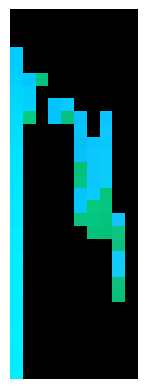

distance:


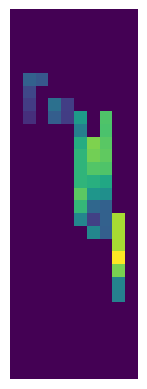

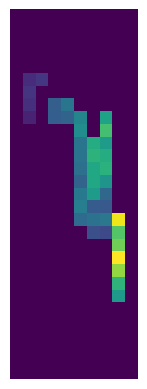

70/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.58it/s]


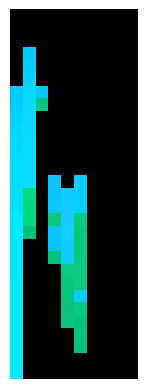

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


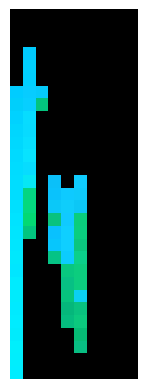

distance:


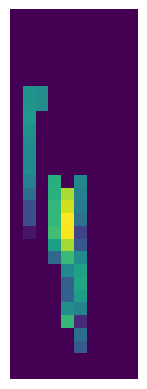

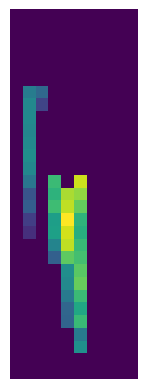

71/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.14it/s]


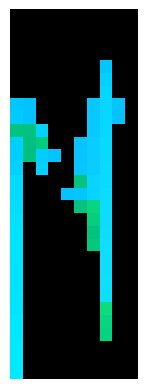

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


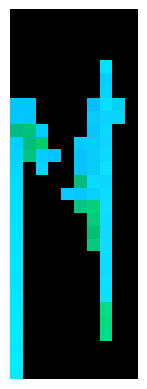

distance:


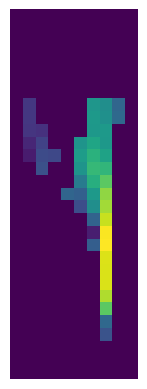

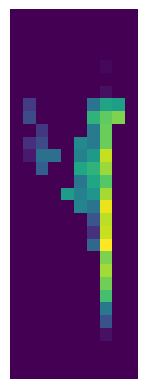

72/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.86it/s]


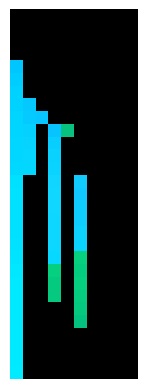

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


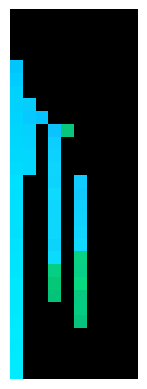

distance:


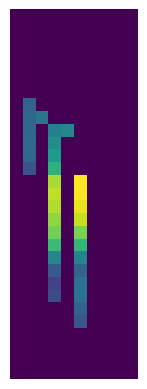

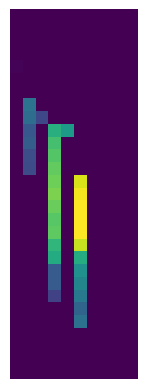

73/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.73it/s]


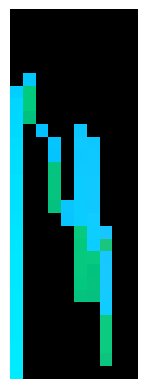

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


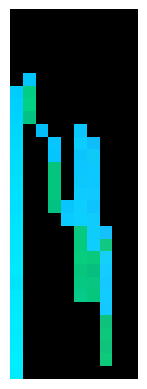

distance:


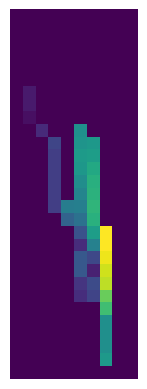

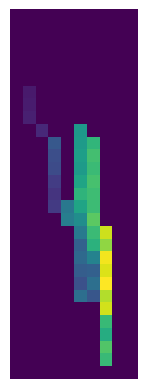

74/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.99it/s]


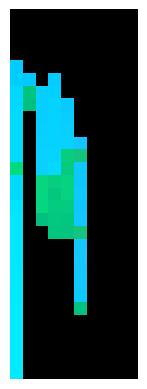

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


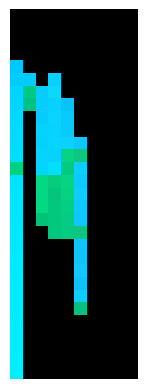

distance:


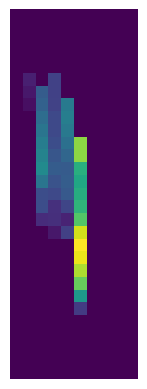

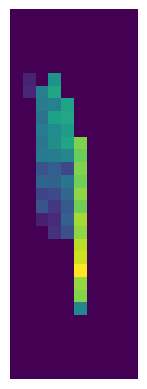

75/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.58it/s]


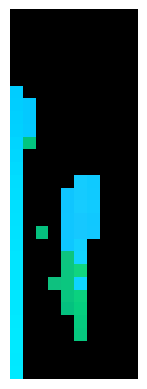

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


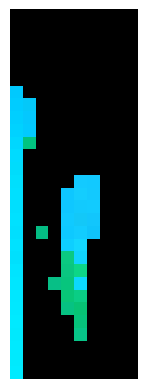

distance:


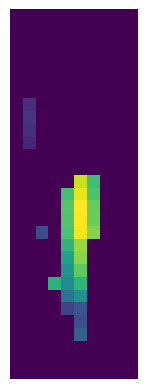

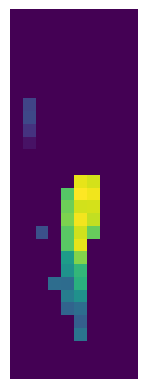

76/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.07it/s]


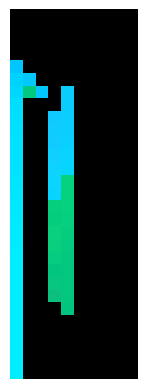

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


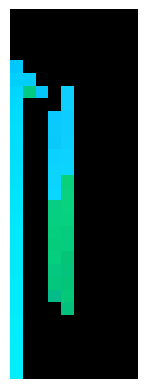

distance:


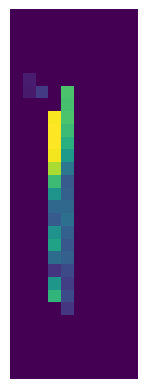

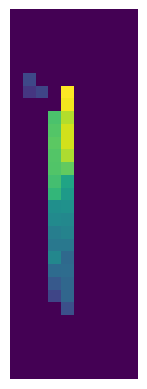

77/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.07it/s]


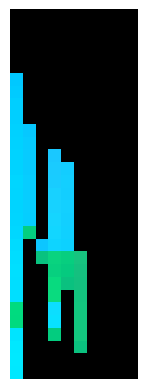

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


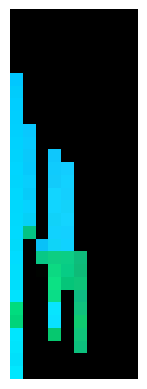

distance:


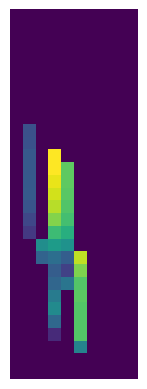

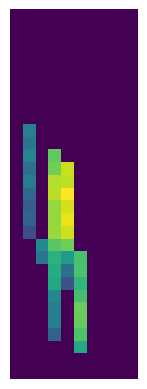

78/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.06it/s]


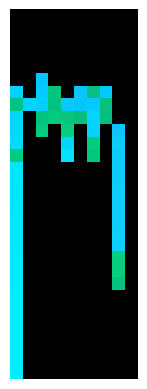

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


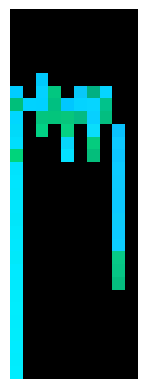

distance:


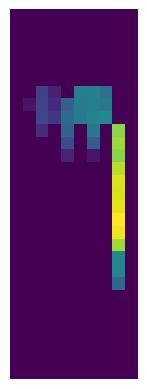

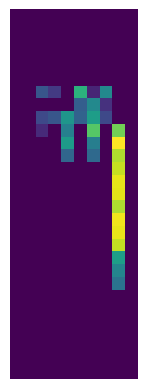

79/100


100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 25.05it/s]


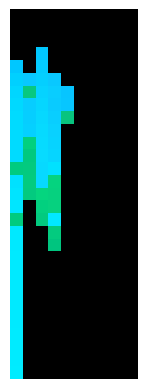

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


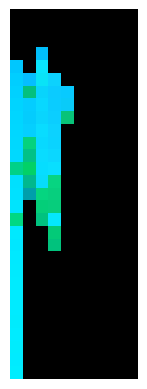

distance:


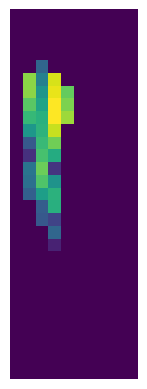

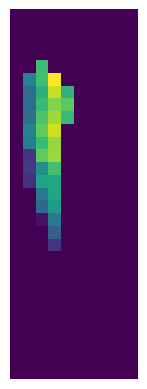

80/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.69it/s]


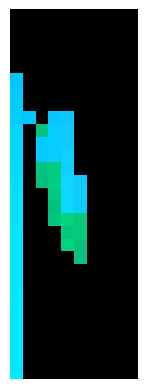

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


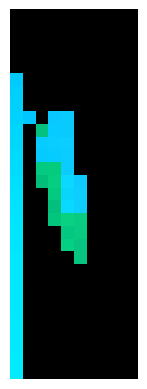

distance:


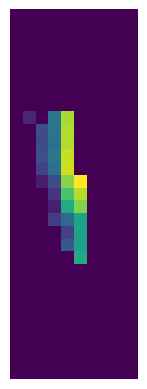

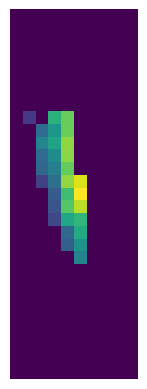

81/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 25.00it/s]


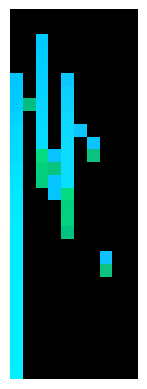

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


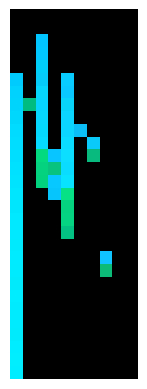

distance:


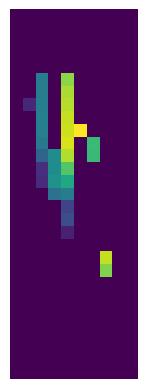

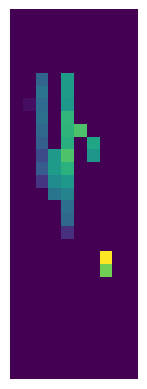

82/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.90it/s]


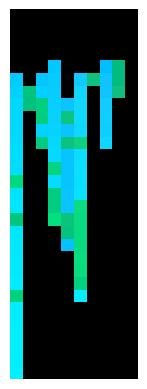

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


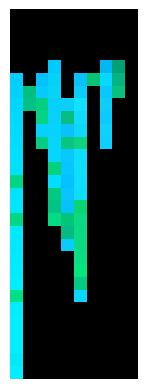

distance:


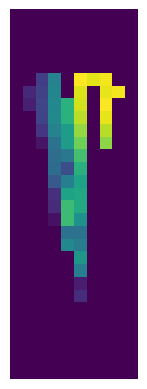

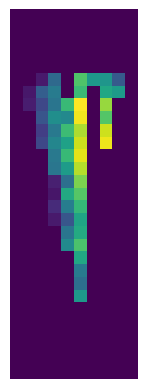

83/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.02it/s]


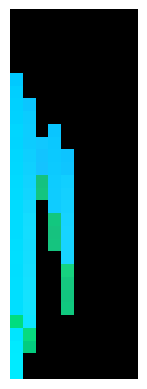

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


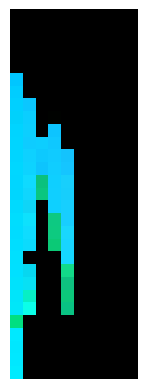

distance:


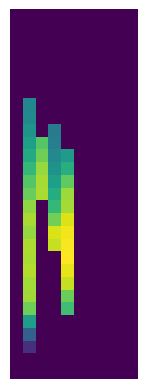

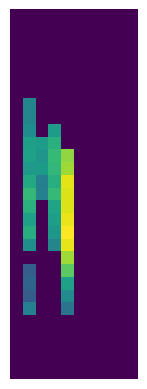

84/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.65it/s]


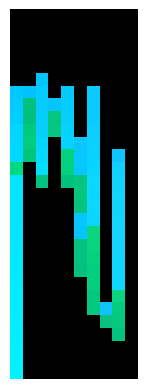

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


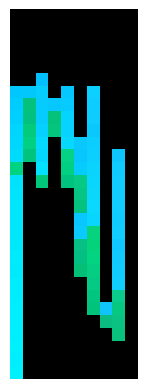

distance:


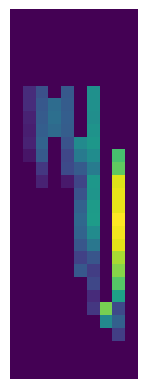

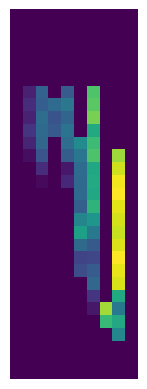

85/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


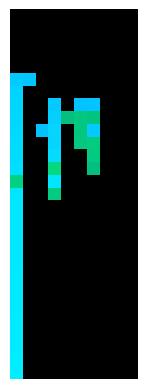

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


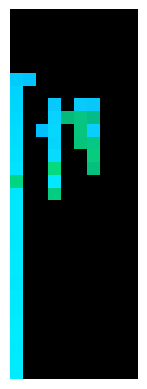

distance:


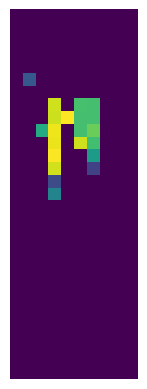

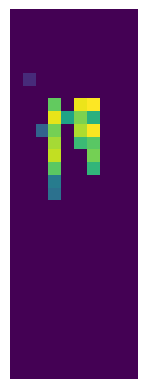

86/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.89it/s]


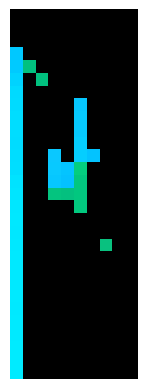

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


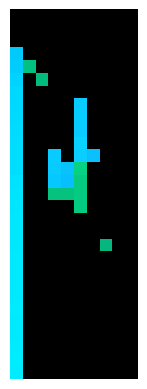

distance:


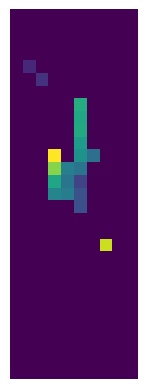

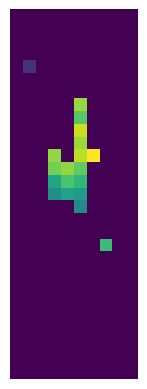

87/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.39it/s]


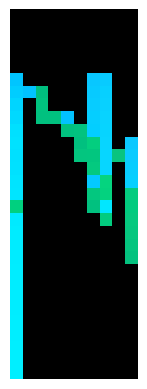

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


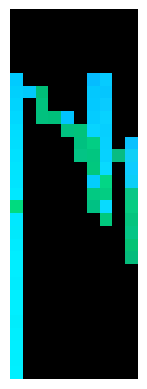

distance:


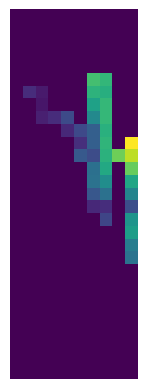

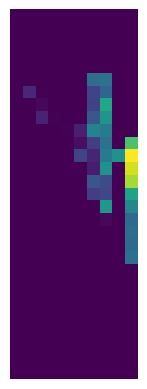

88/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 23.05it/s]


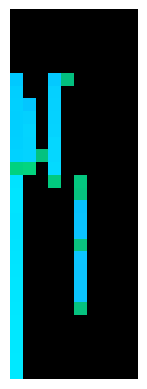

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


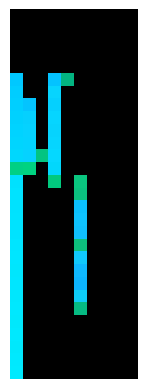

distance:


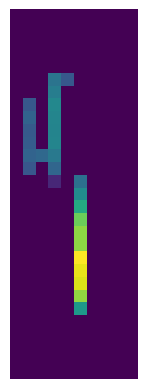

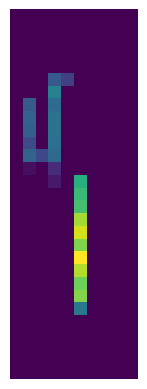

89/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


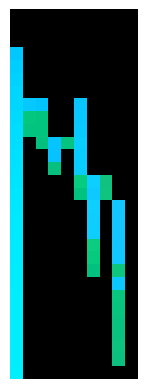

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


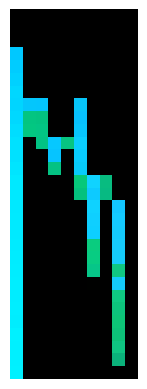

distance:


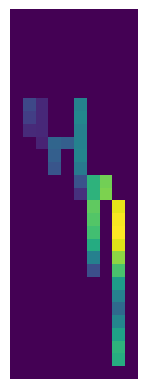

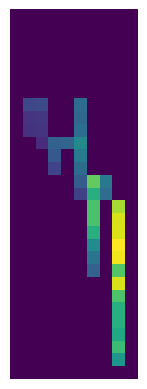

90/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.73it/s]


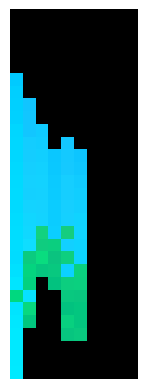

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


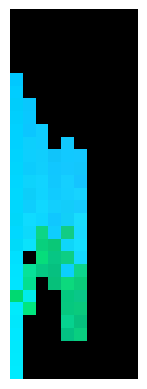

distance:


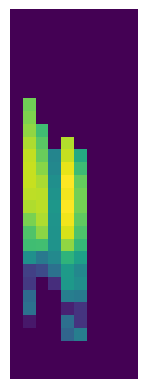

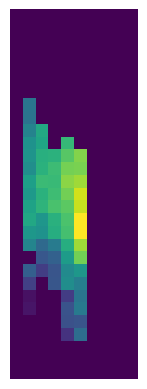

91/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.88it/s]


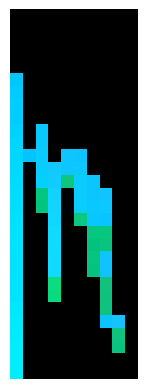

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


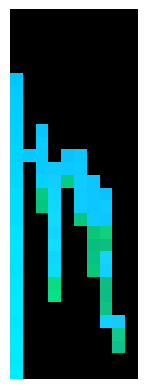

distance:


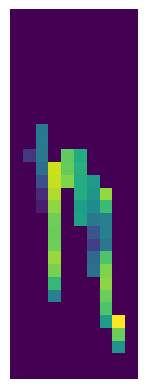

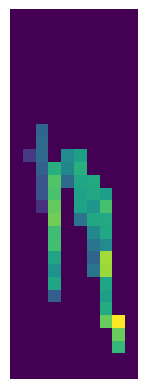

92/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.58it/s]


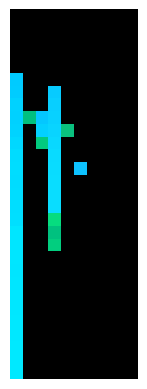

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


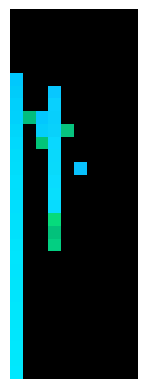

distance:


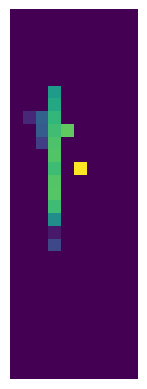

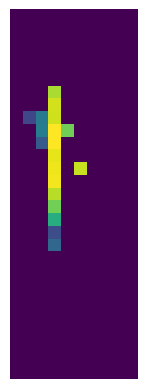

93/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.18it/s]


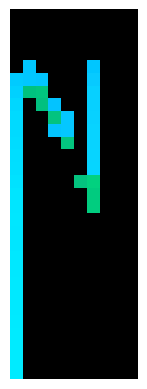

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


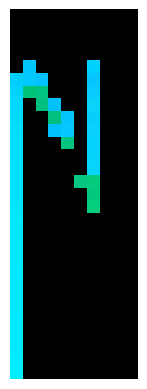

distance:


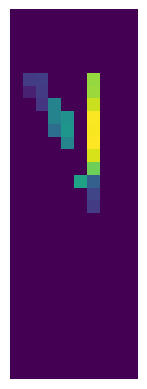

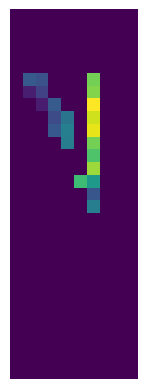

94/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.30it/s]


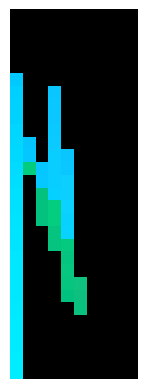

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


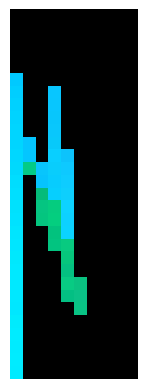

distance:


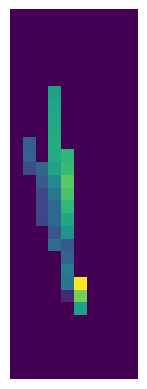

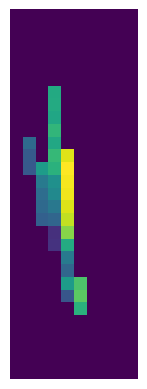

95/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


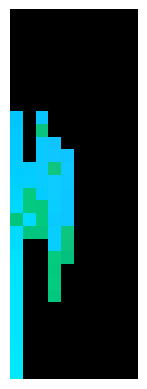

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


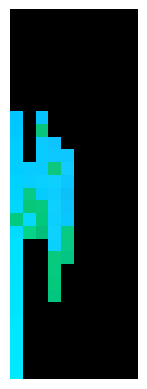

distance:


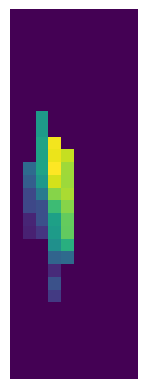

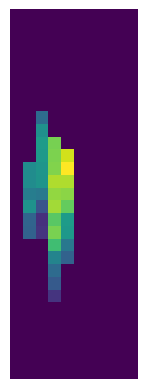

96/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.68it/s]


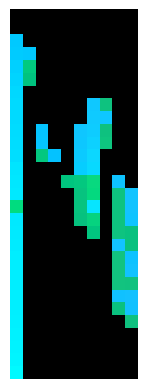

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


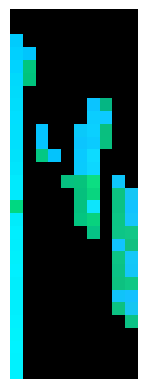

distance:


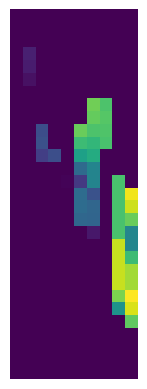

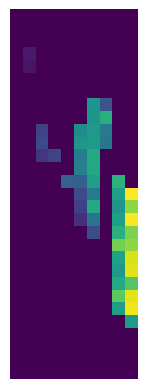

97/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.85it/s]


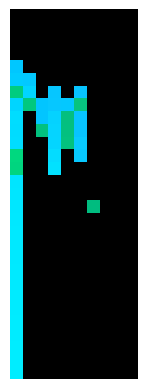

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


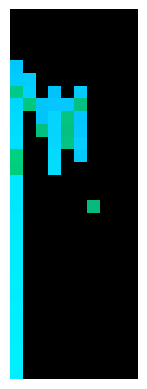

distance:


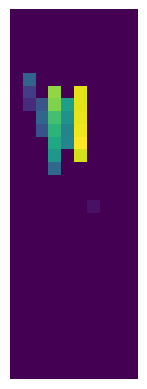

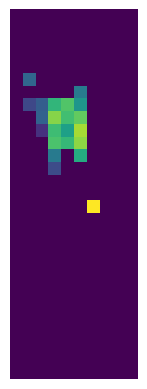

98/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.79it/s]


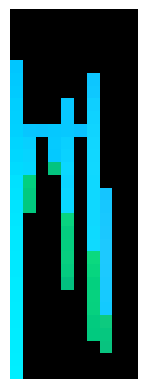

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


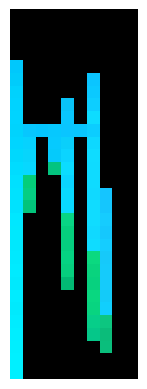

distance:


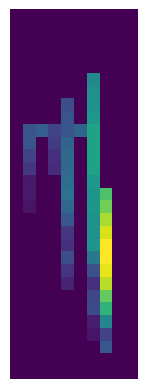

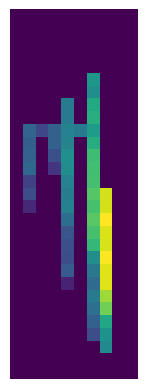

99/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.56it/s]


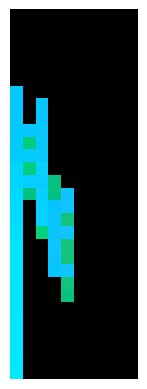

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


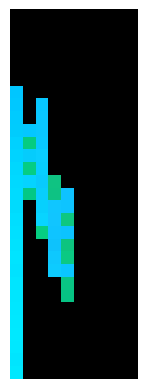

distance:


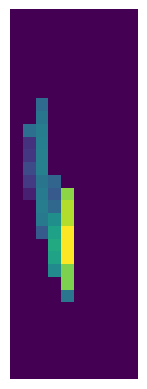

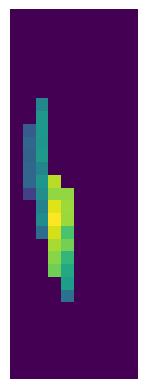

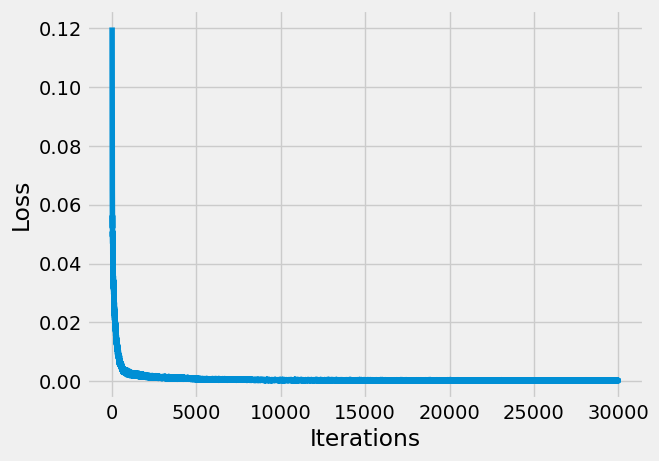

In [17]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(dataset_zero_one, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 100
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = custom_reconstruction_loss(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [18]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nOverall:")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
zero_count = (reconstructed == 0).sum().item()
total_elements = reconstructed.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {images.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
zero_count = (images == 0).sum().item()
total_elements = images.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(images, reconstructed)


print("\n")
print("\n")
print("\nDistance")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.65 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.86% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.48 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.77% of the sam

# log

0/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.92it/s]


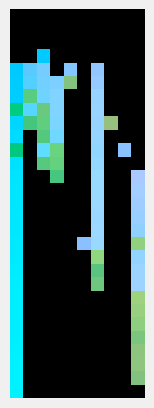

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


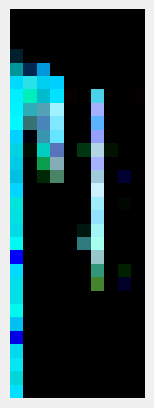

distance:


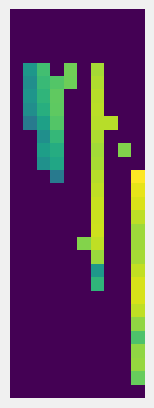

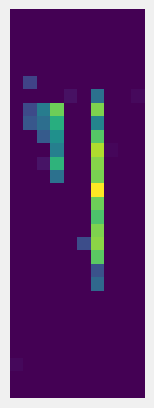

mass:


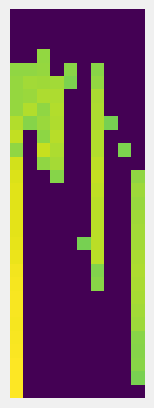

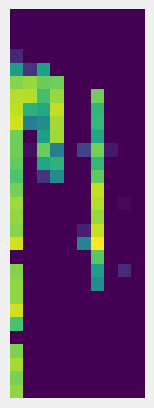

subhalo:


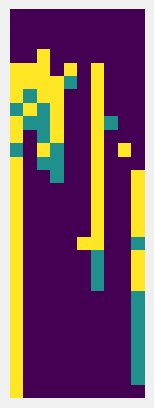

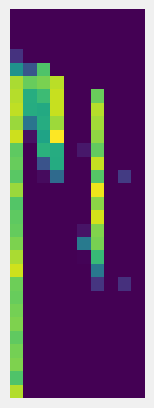

1/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.79it/s]


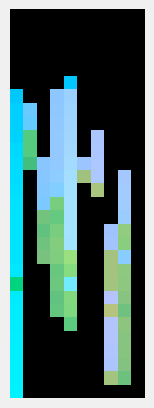

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


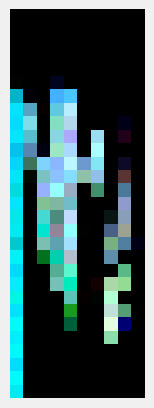

distance:


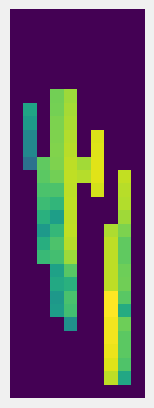

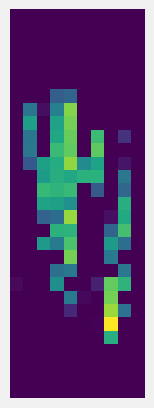

mass:


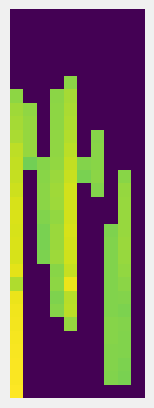

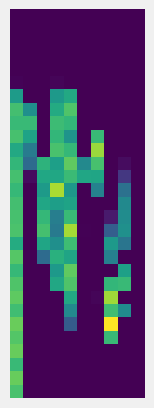

subhalo:


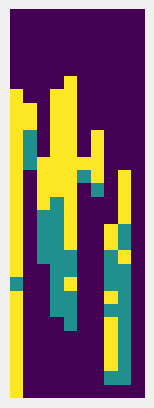

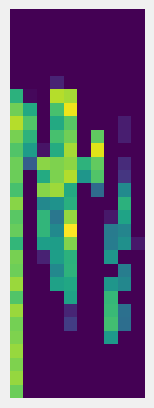

2/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.12it/s]


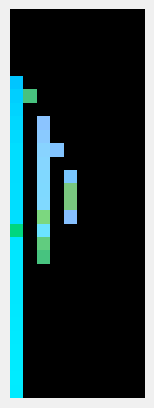

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


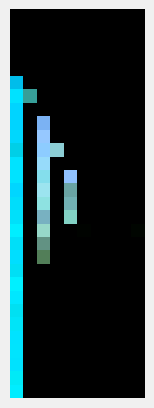

distance:


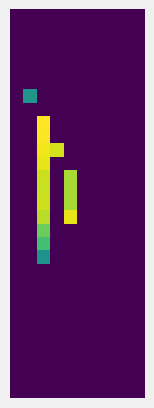

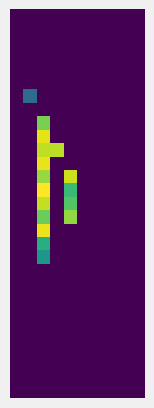

mass:


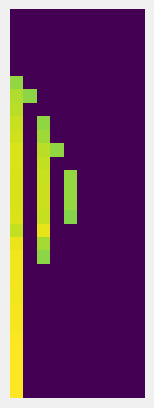

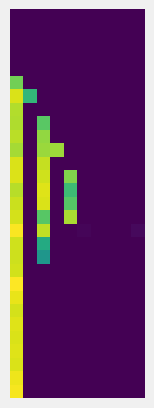

subhalo:


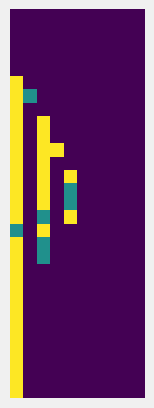

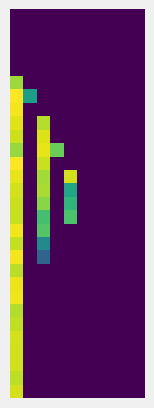

3/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.19it/s]


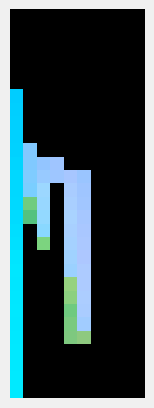

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


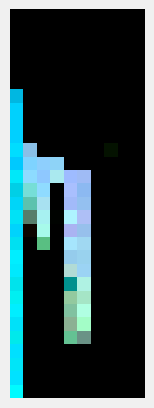

distance:


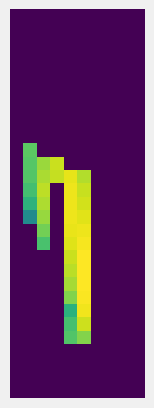

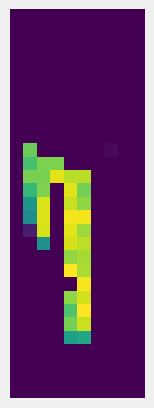

mass:


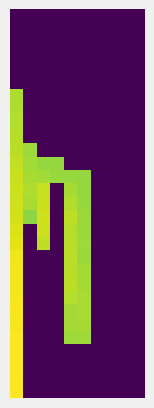

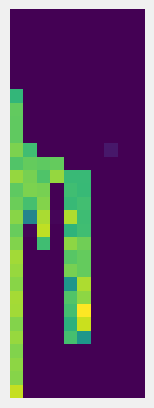

subhalo:


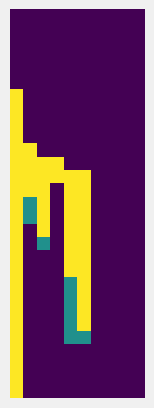

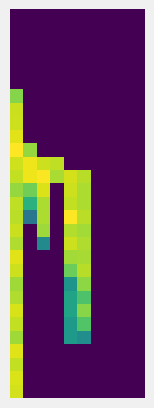

4/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.39it/s]


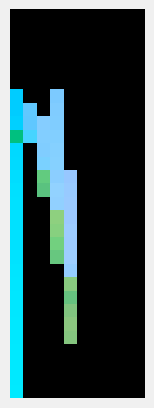

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


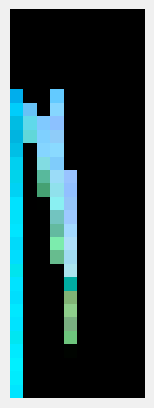

distance:


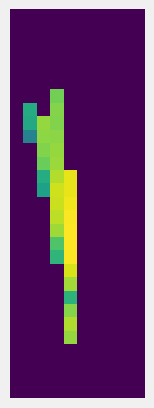

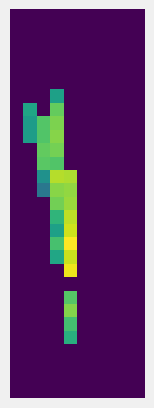

mass:


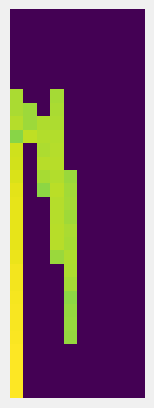

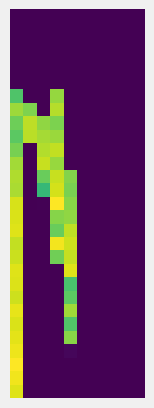

subhalo:


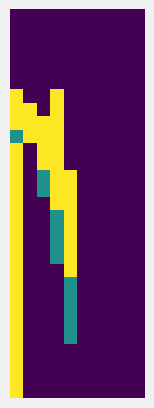

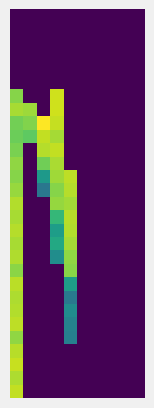

5/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.14it/s]


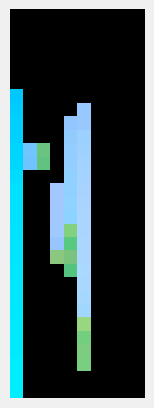

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


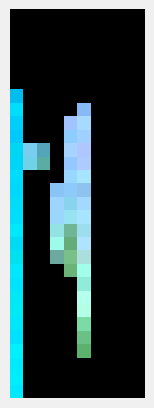

distance:


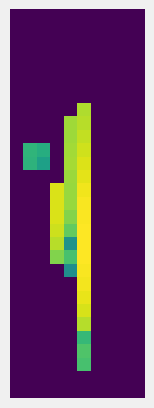

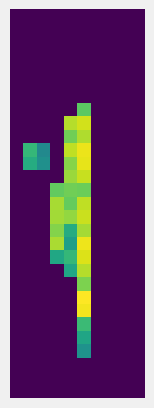

mass:


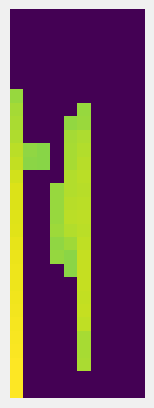

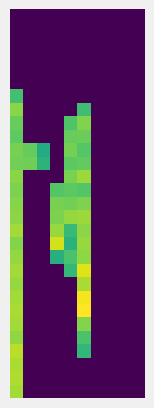

subhalo:


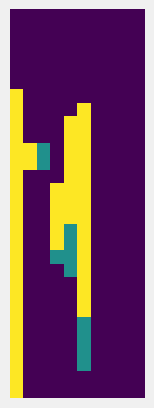

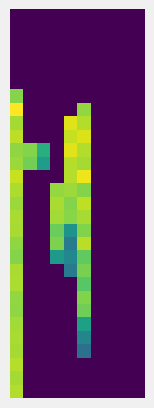

6/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.86it/s]


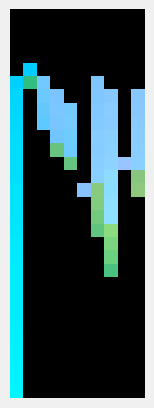

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


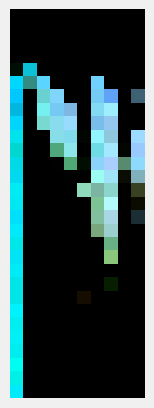

distance:


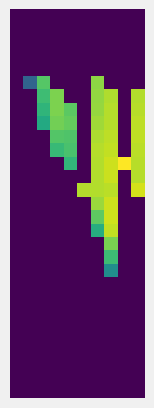

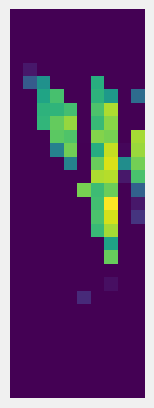

mass:


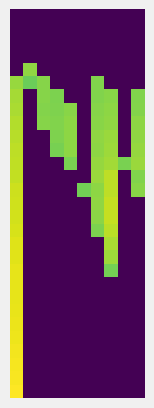

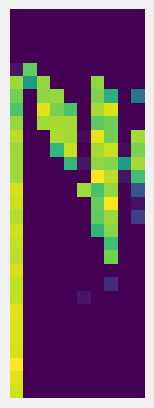

subhalo:


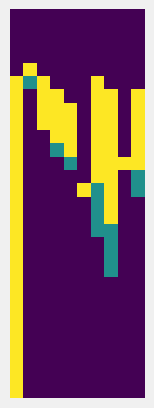

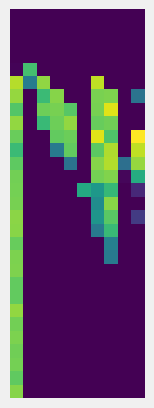

7/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.68it/s]


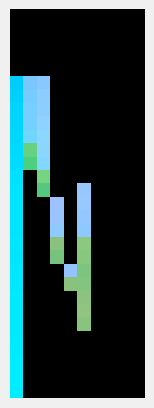

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


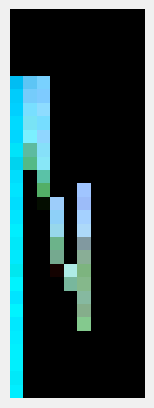

distance:


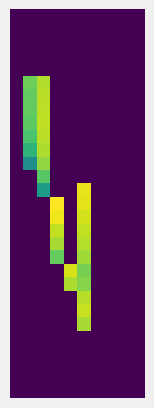

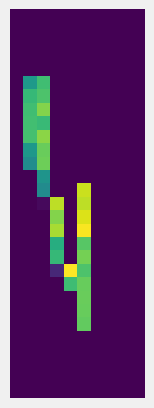

mass:


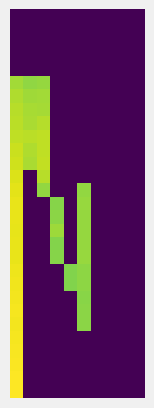

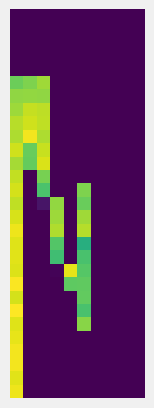

subhalo:


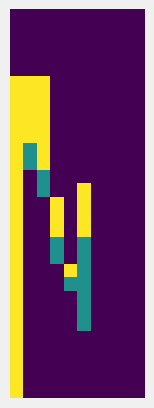

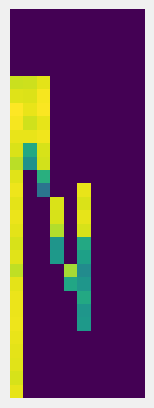

8/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.69it/s]


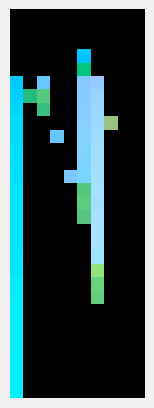

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


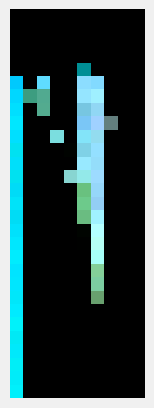

distance:


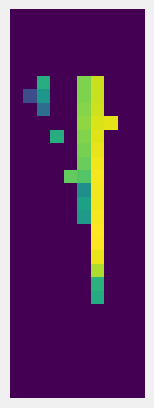

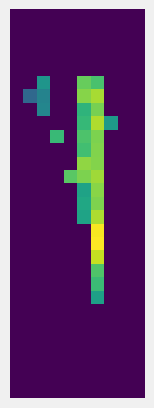

mass:


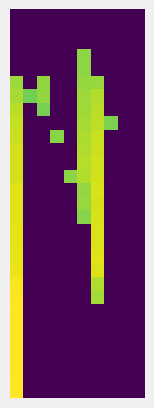

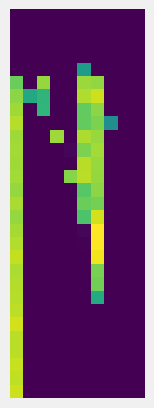

subhalo:


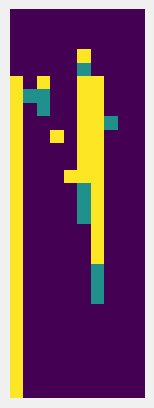

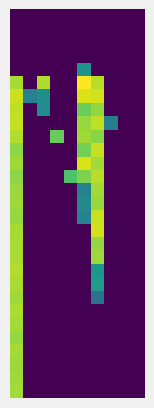

9/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.85it/s]


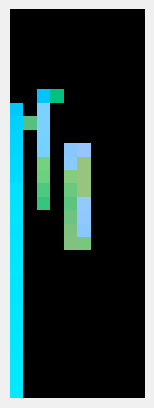

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


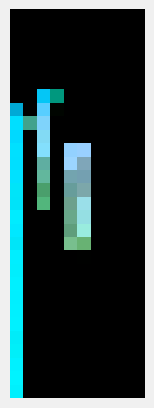

distance:


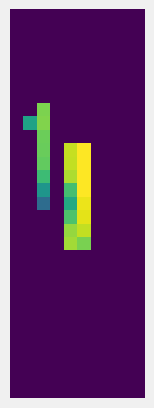

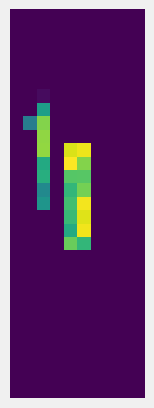

mass:


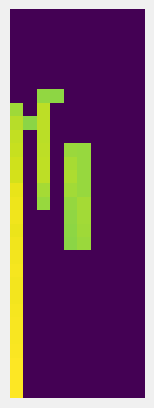

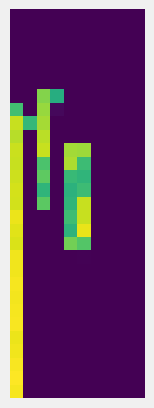

subhalo:


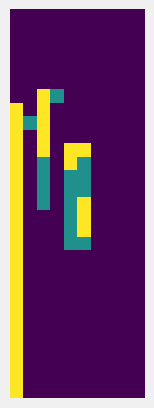

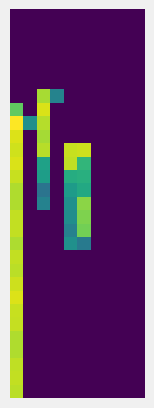

10/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.74it/s]


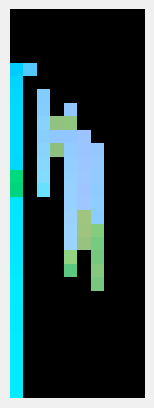

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


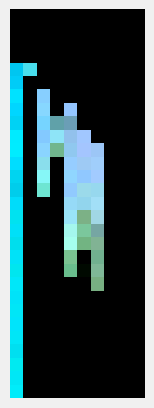

distance:


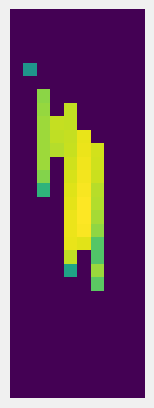

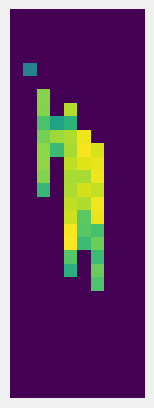

mass:


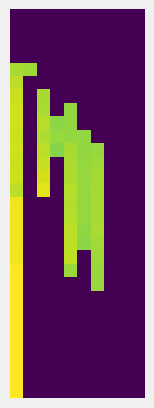

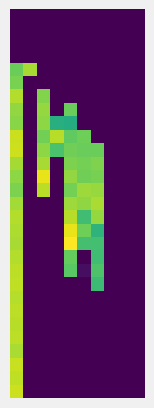

subhalo:


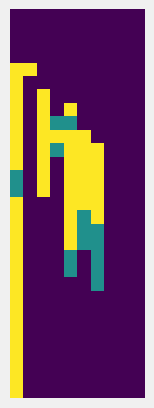

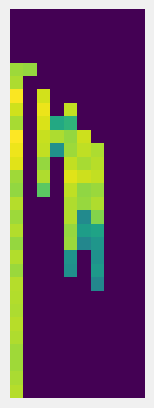

11/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.42it/s]


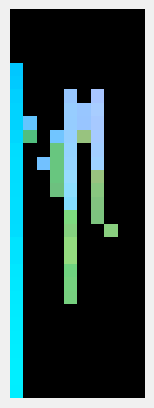

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


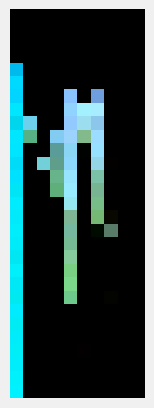

distance:


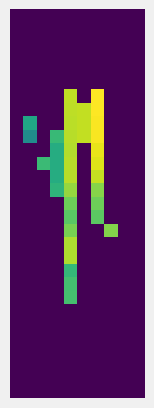

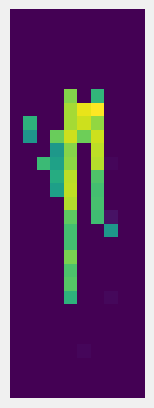

mass:


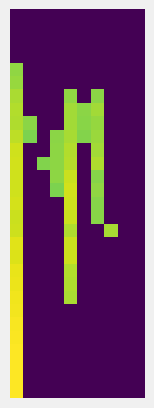

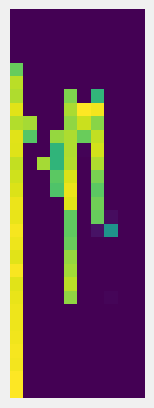

subhalo:


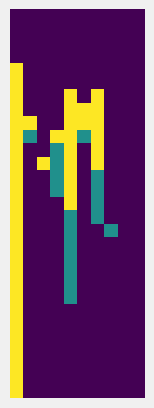

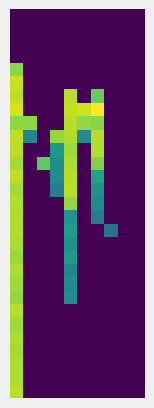

12/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.22it/s]


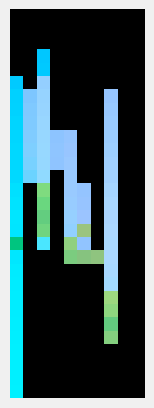

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


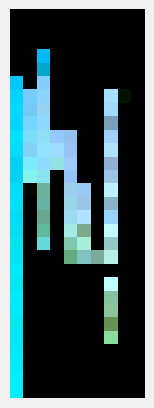

distance:


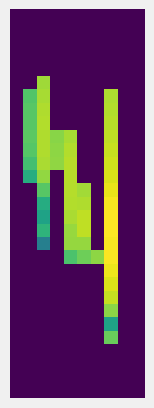

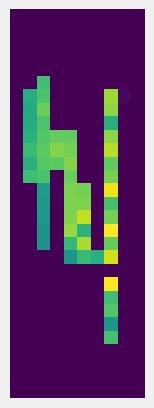

mass:


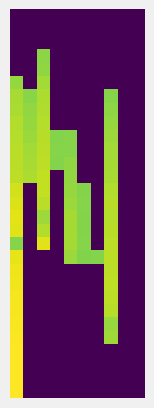

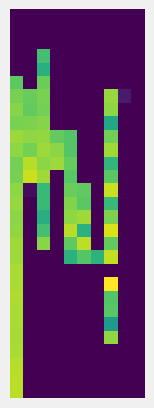

subhalo:


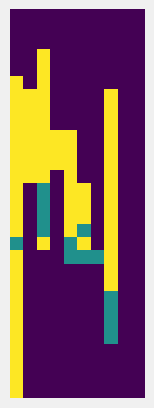

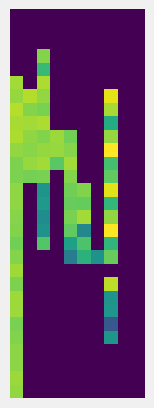

13/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.12it/s]


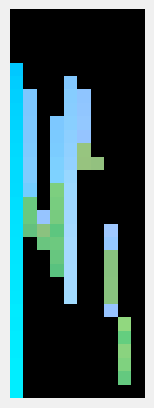

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


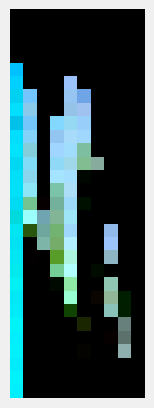

distance:


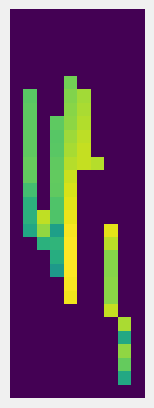

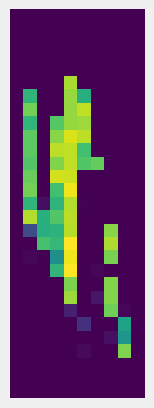

mass:


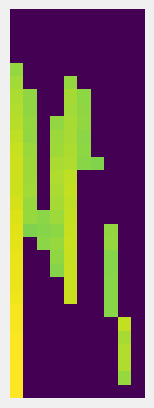

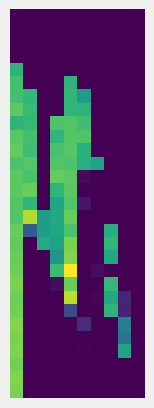

subhalo:


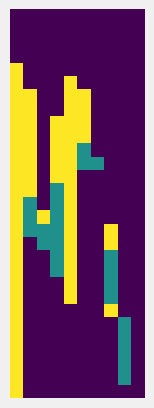

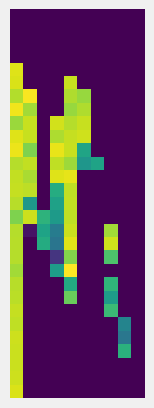

14/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.59it/s]


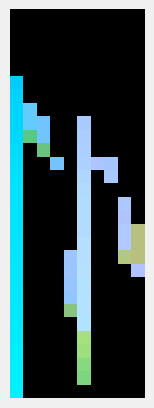

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


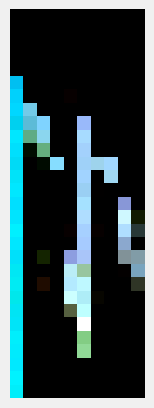

distance:


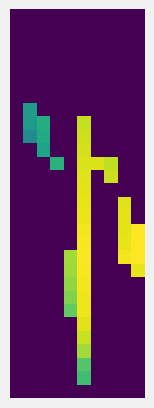

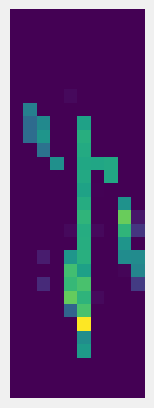

mass:


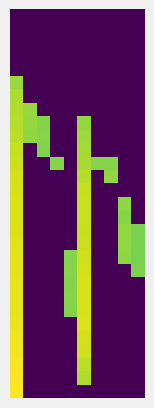

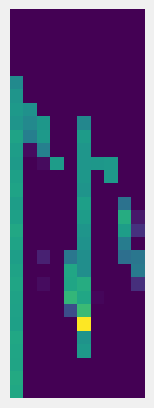

subhalo:


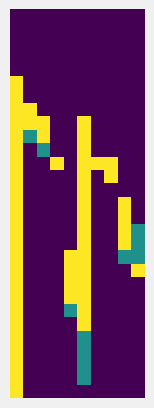

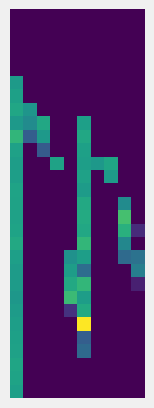

15/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.18it/s]


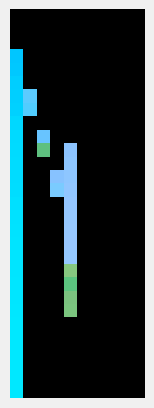

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


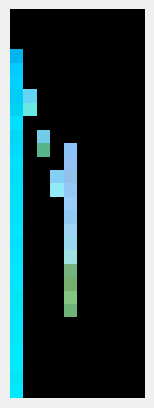

distance:


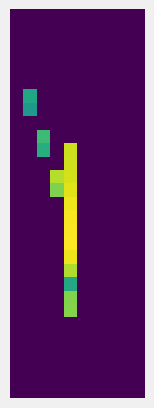

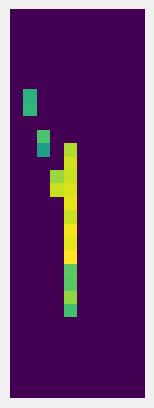

mass:


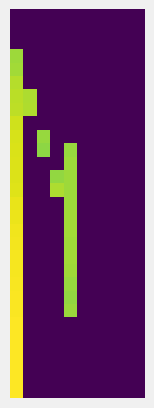

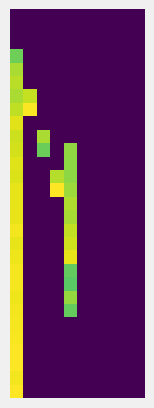

subhalo:


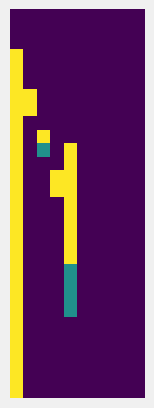

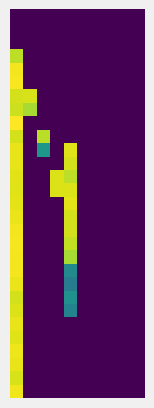

16/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.09it/s]


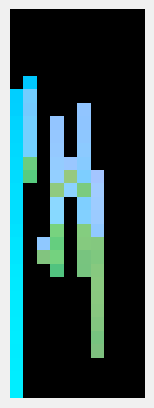

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


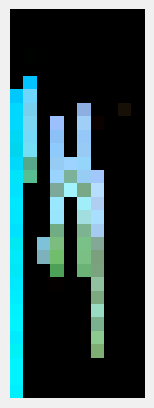

distance:


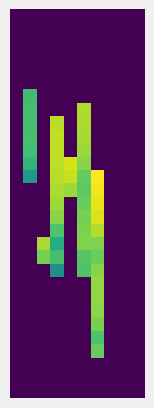

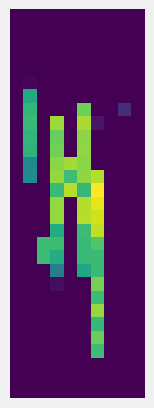

mass:


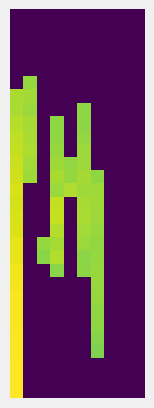

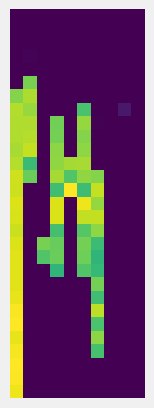

subhalo:


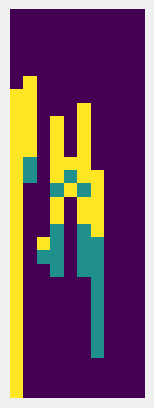

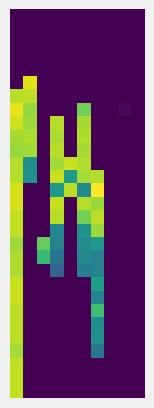

17/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.11it/s]


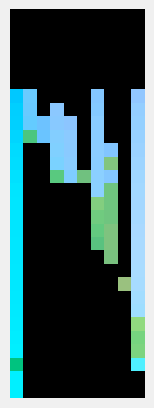

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


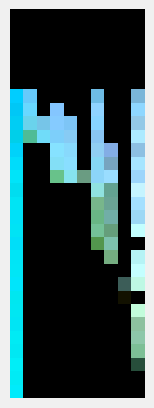

distance:


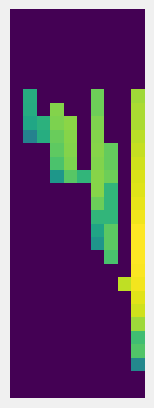

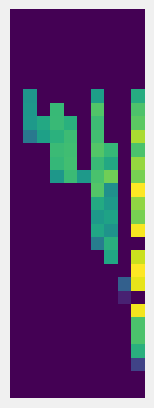

mass:


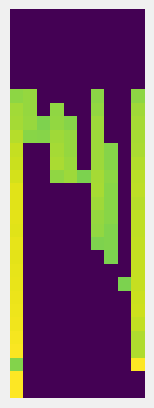

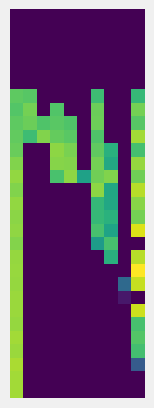

subhalo:


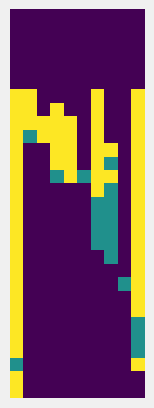

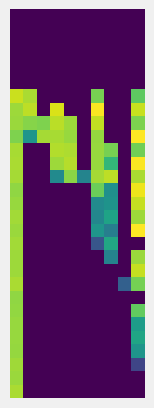

18/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.67it/s]


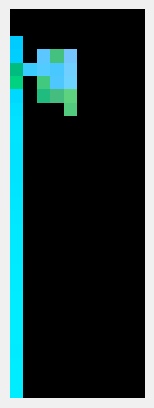

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


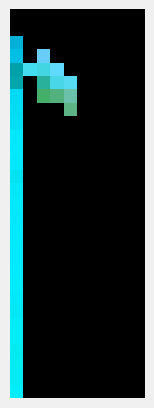

distance:


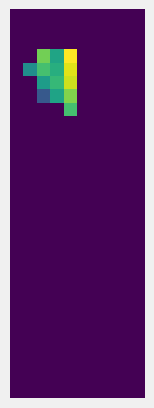

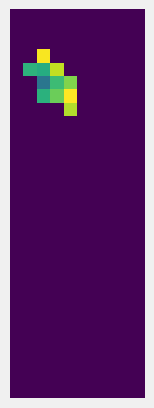

mass:


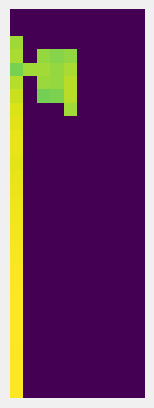

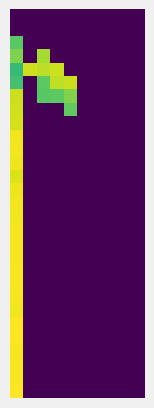

subhalo:


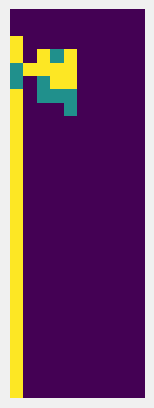

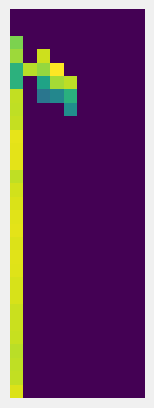

19/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.50it/s]


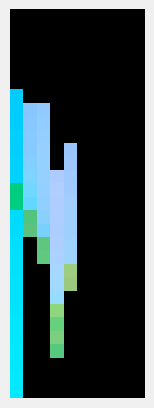

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


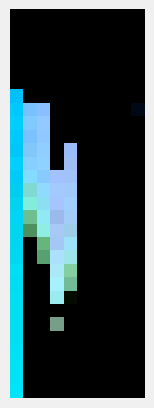

distance:


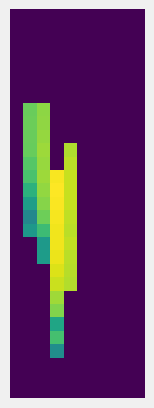

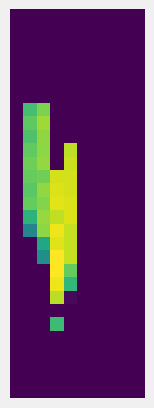

mass:


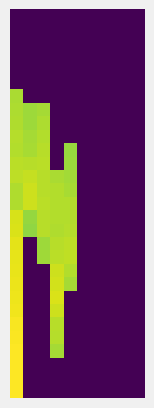

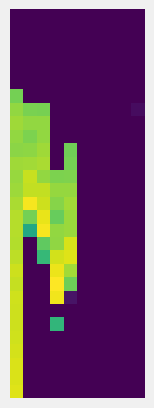

subhalo:


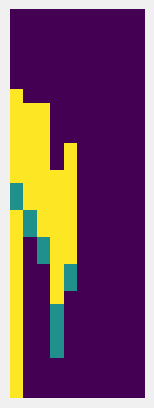

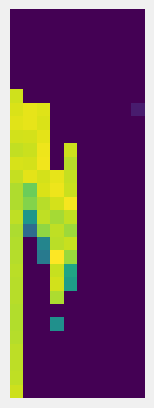

20/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.08it/s]


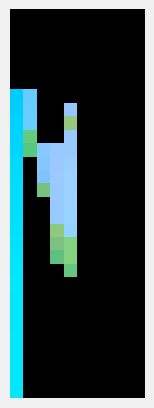

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


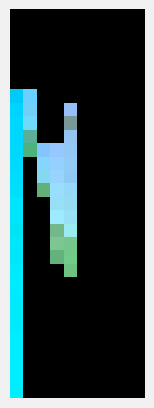

distance:


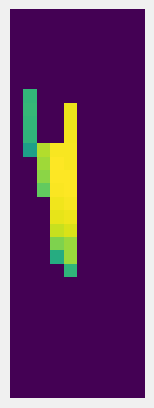

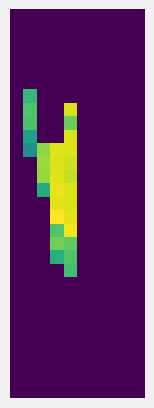

mass:


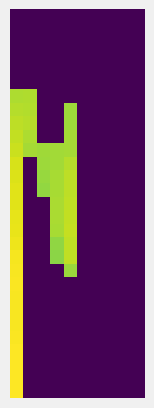

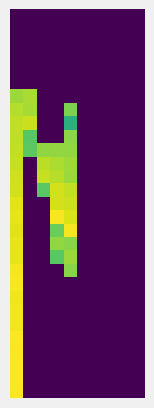

subhalo:


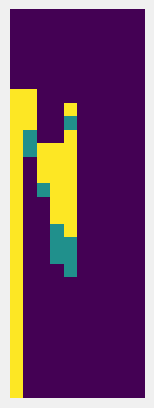

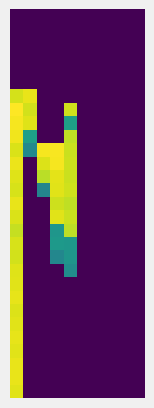

21/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.70it/s]


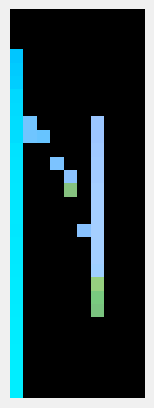

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


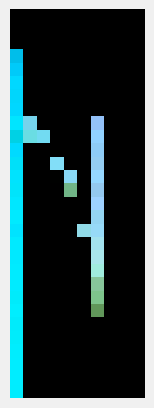

distance:


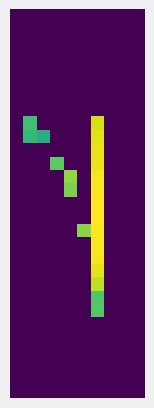

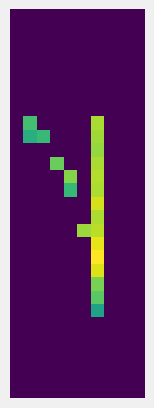

mass:


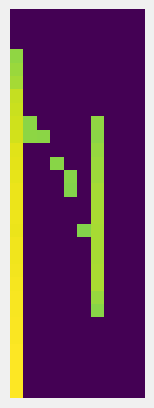

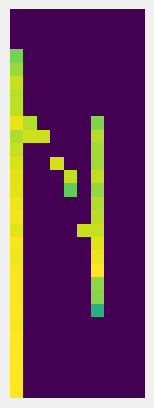

subhalo:


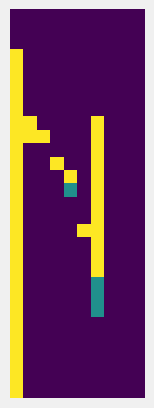

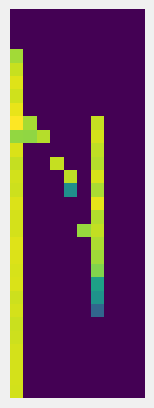

22/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.08it/s]


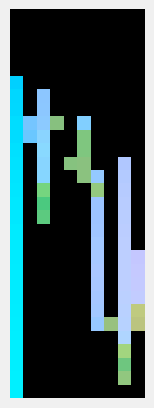

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


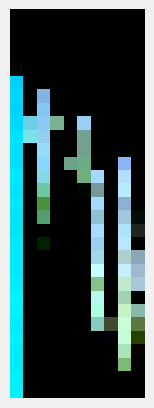

distance:


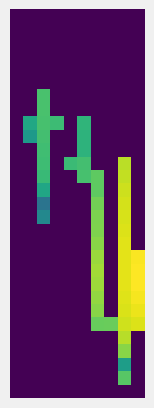

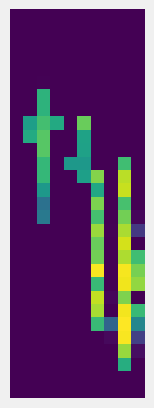

mass:


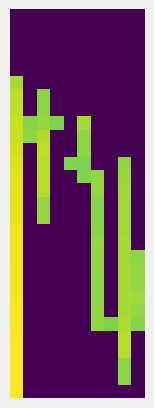

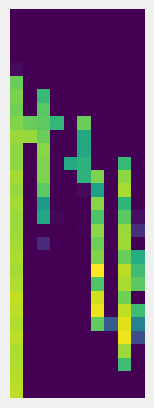

subhalo:


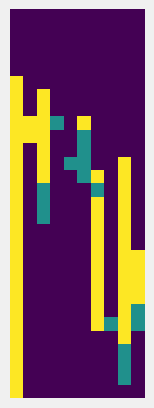

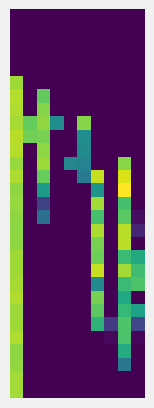

23/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.71it/s]


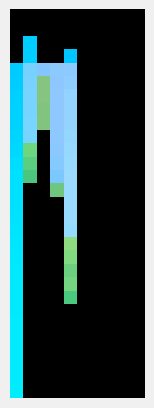

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


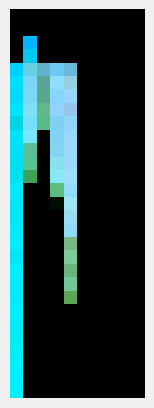

distance:


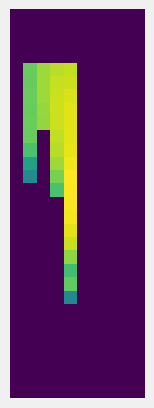

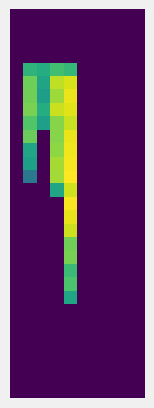

mass:


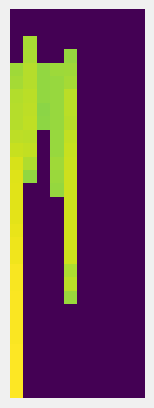

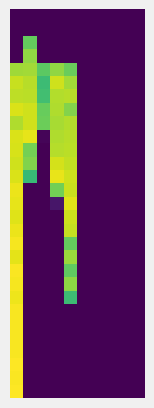

subhalo:


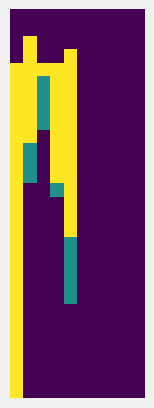

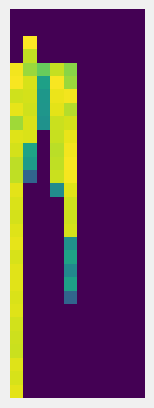

24/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.58it/s]


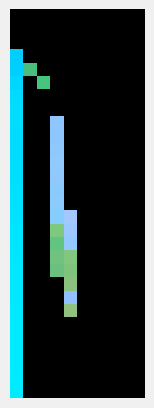

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


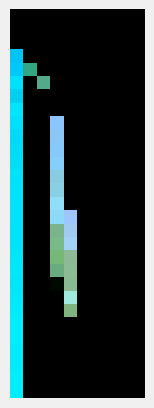

distance:


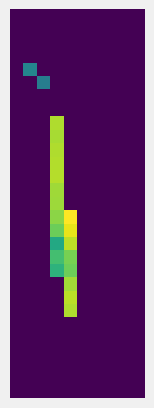

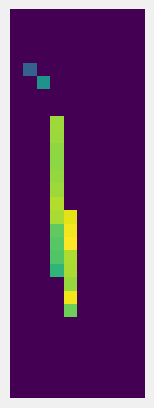

mass:


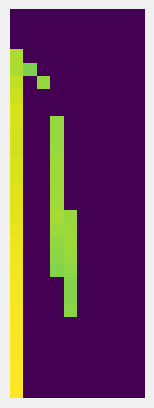

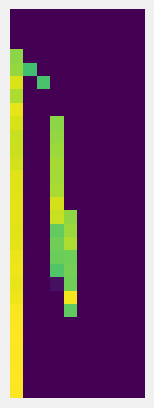

subhalo:


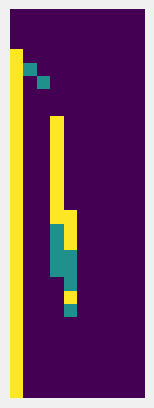

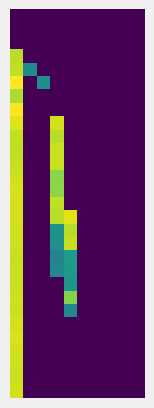

25/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.36it/s]


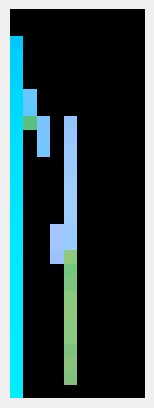

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


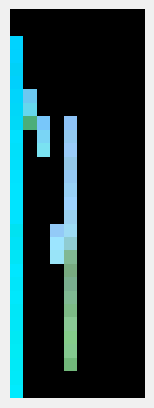

distance:


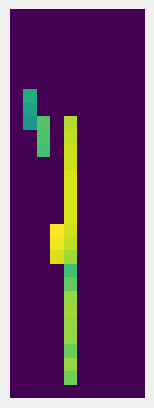

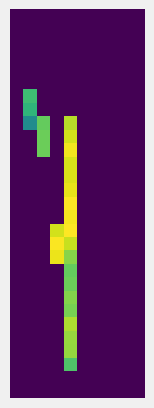

mass:


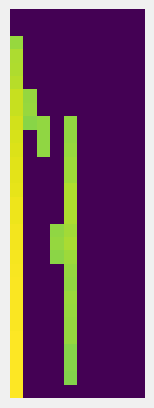

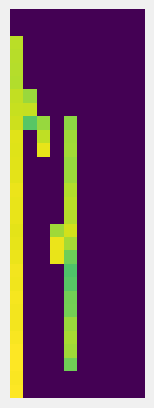

subhalo:


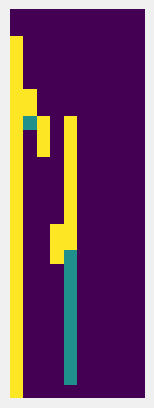

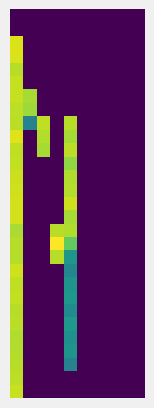

26/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.58it/s]


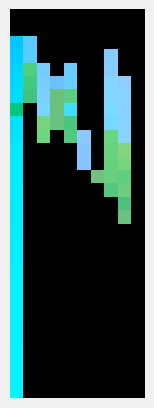

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


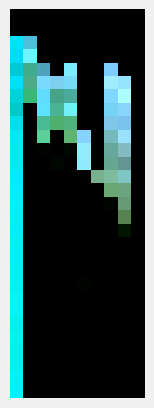

distance:


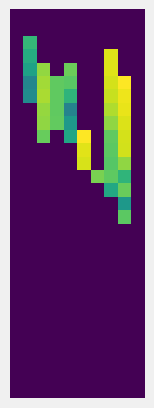

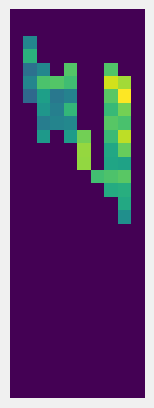

mass:


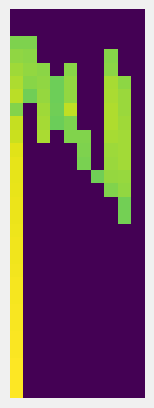

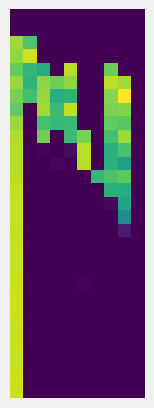

subhalo:


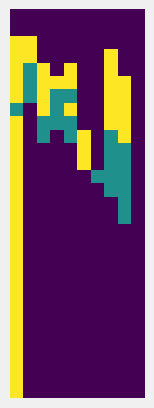

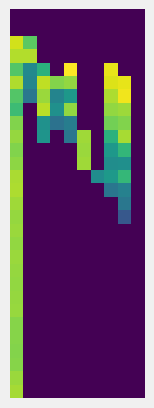

27/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.11it/s]


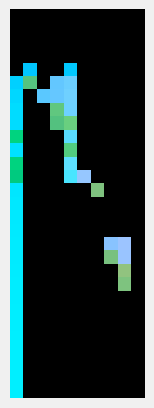

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


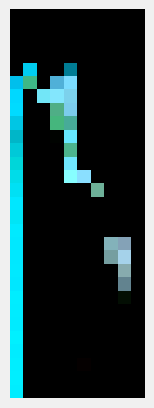

distance:


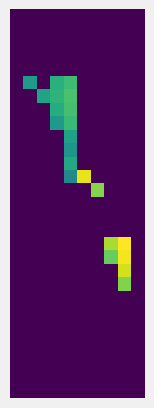

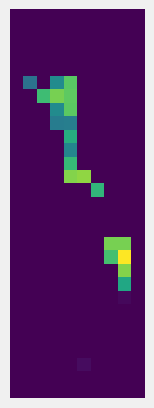

mass:


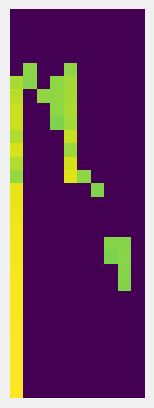

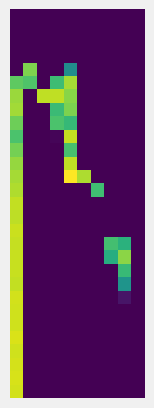

subhalo:


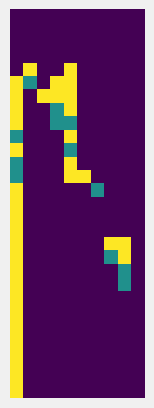

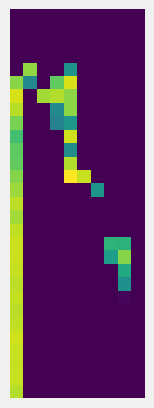

28/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.27it/s]


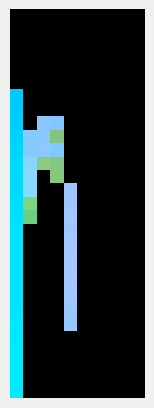

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


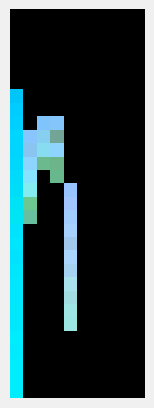

distance:


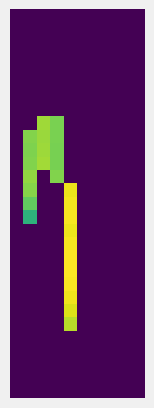

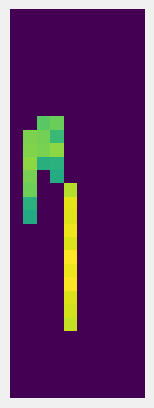

mass:


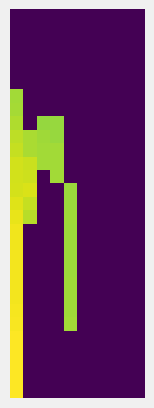

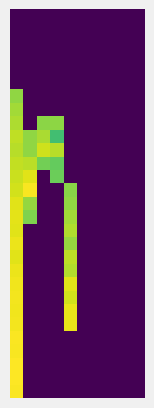

subhalo:


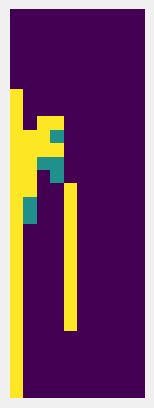

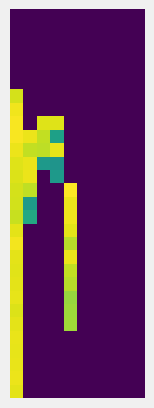

29/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.93it/s]


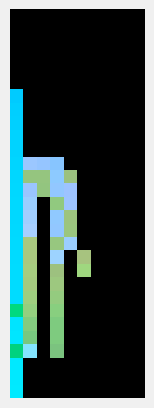

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


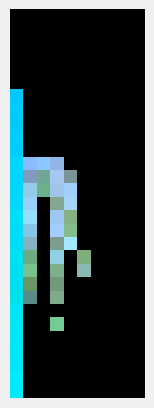

distance:


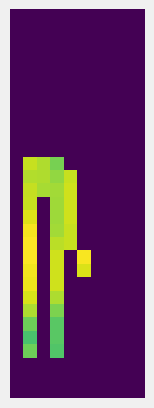

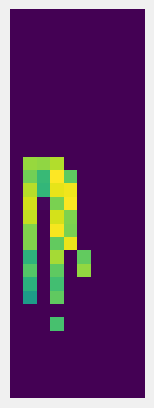

mass:


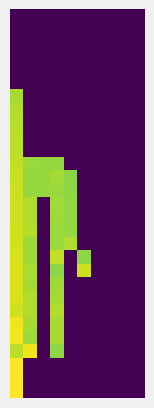

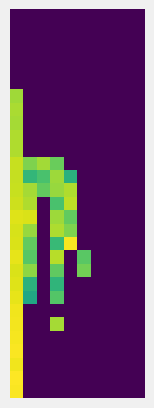

subhalo:


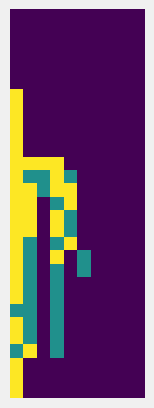

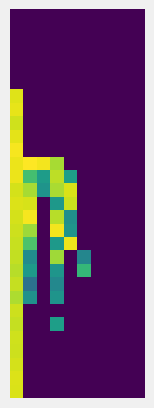

30/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.32it/s]


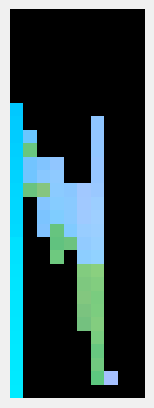

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


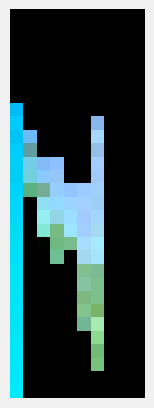

distance:


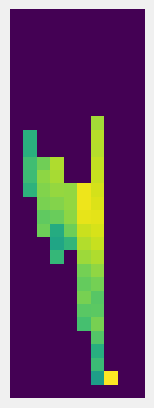

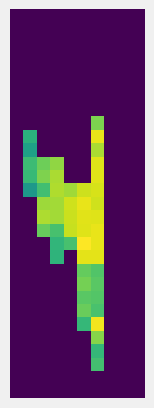

mass:


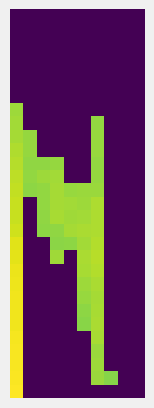

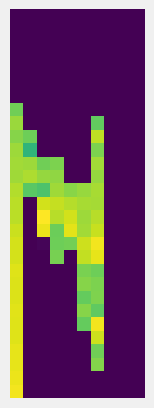

subhalo:


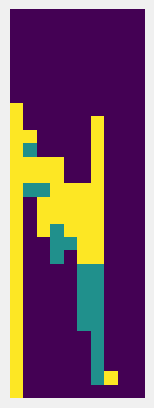

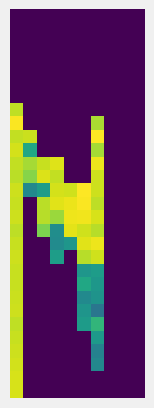

31/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.31it/s]


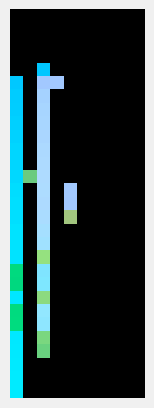

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


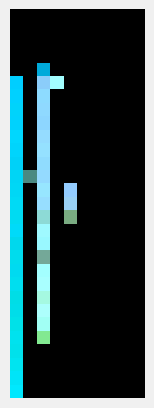

distance:


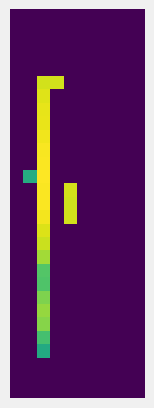

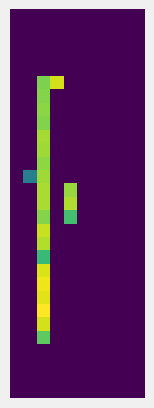

mass:


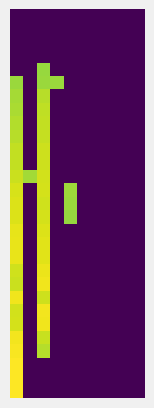

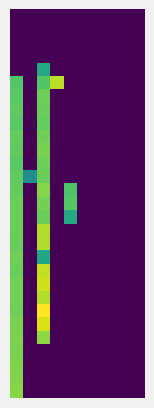

subhalo:


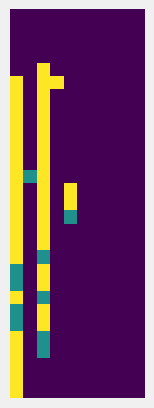

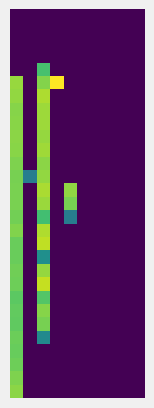

32/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.46it/s]


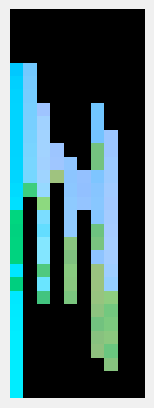

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


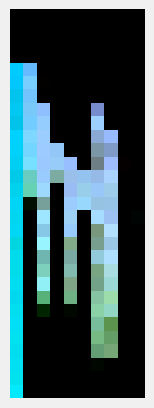

distance:


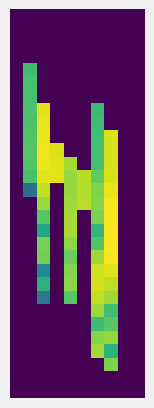

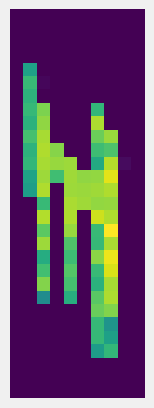

mass:


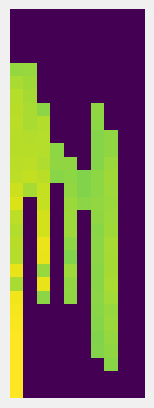

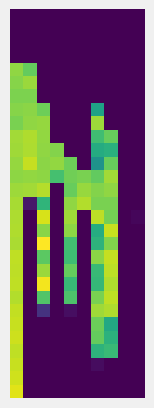

subhalo:


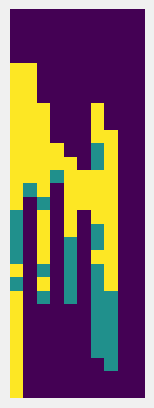

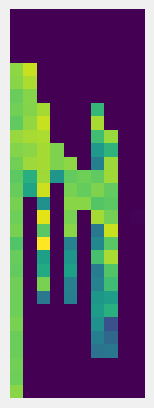

33/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.95it/s]


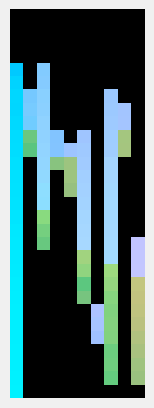

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


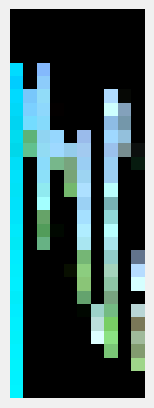

distance:


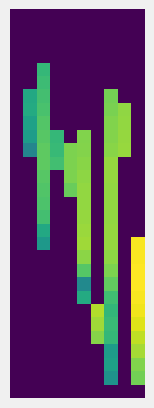

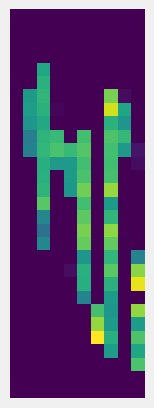

mass:


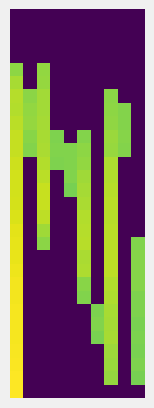

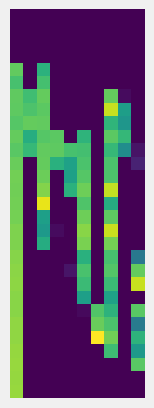

subhalo:


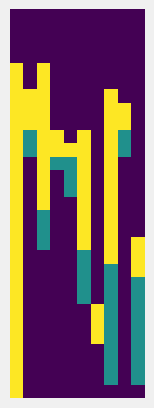

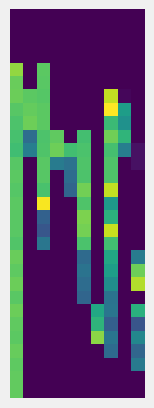

34/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.39it/s]


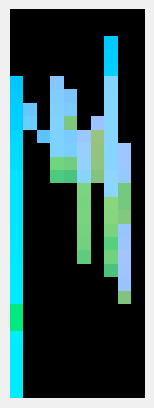

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


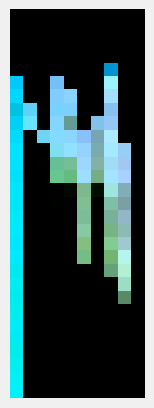

distance:


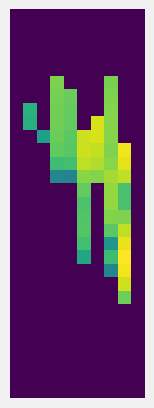

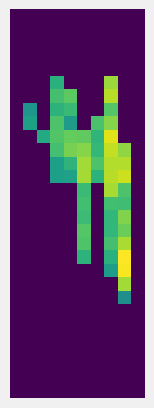

mass:


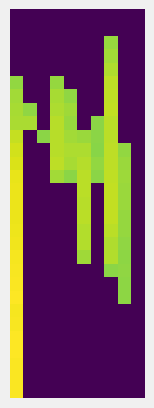

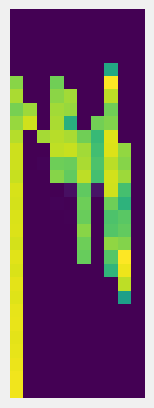

subhalo:


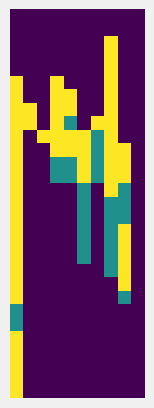

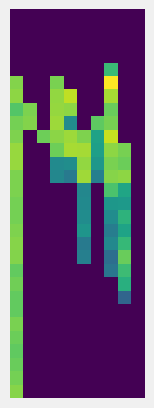

35/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.99it/s]


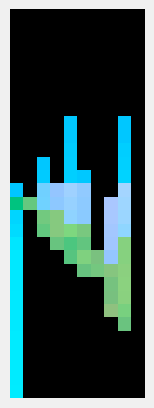

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


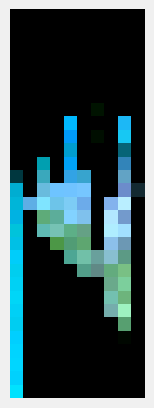

distance:


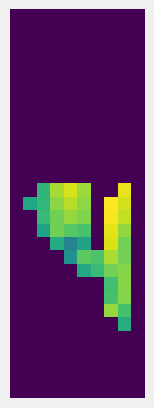

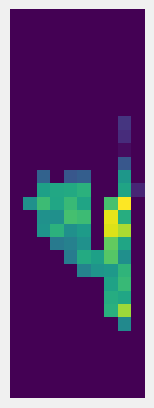

mass:


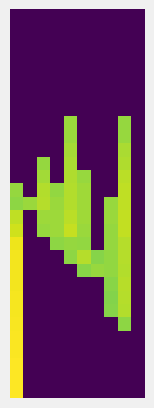

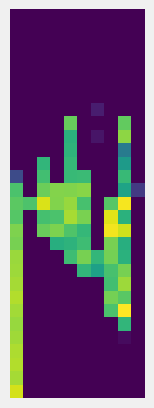

subhalo:


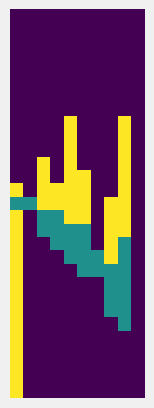

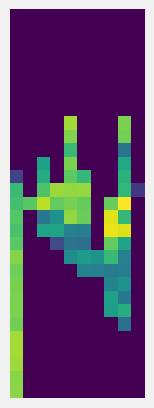

36/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.47it/s]


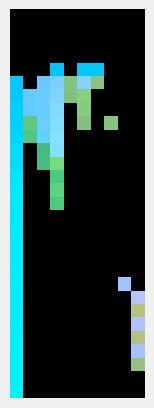

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


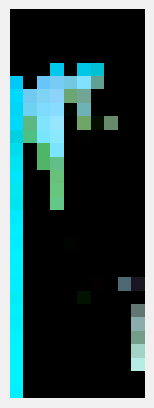

distance:


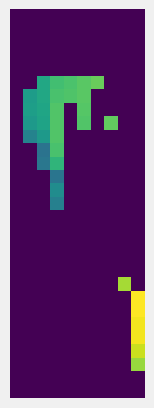

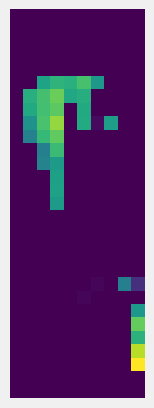

mass:


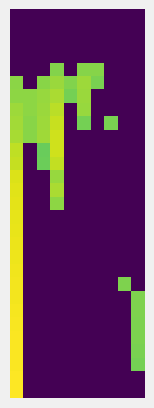

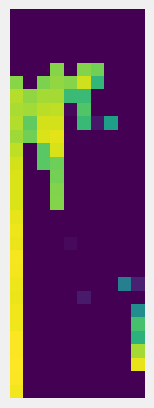

subhalo:


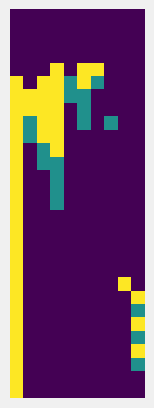

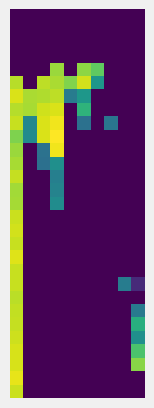

37/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.90it/s]


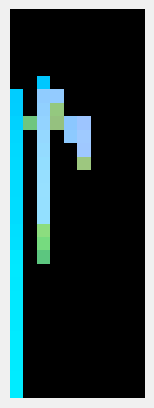

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


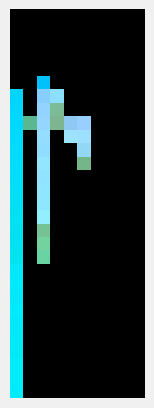

distance:


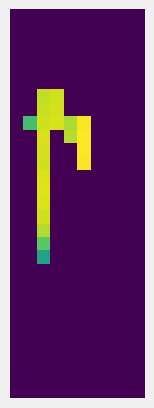

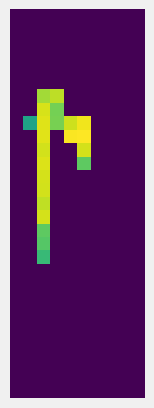

mass:


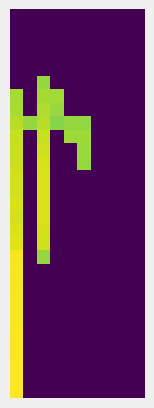

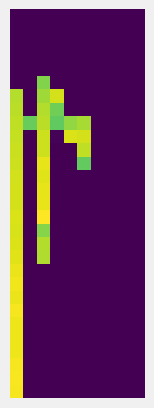

subhalo:


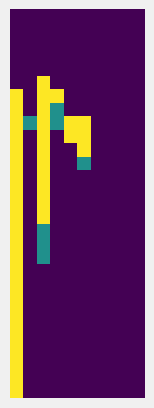

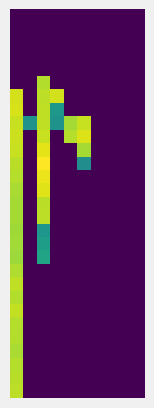

38/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.77it/s]


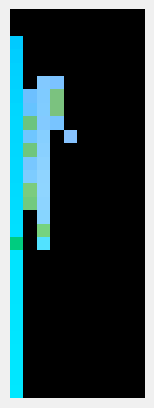

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


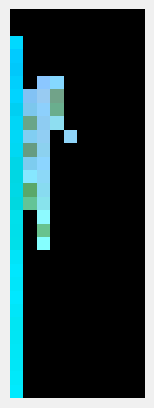

distance:


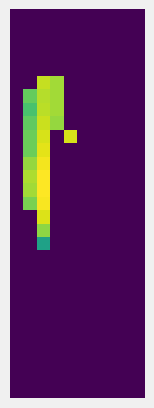

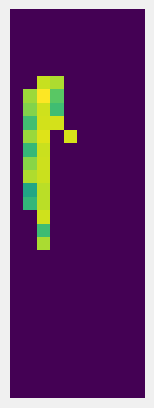

mass:


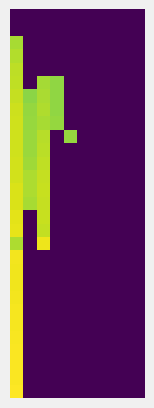

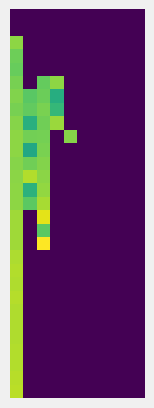

subhalo:


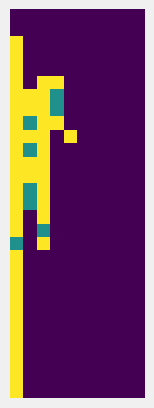

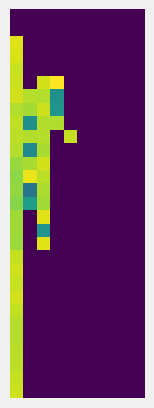

39/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.65it/s]


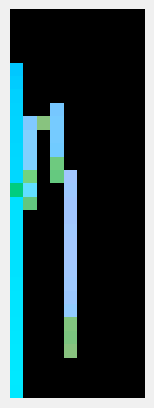

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


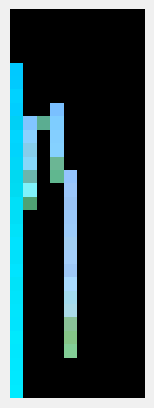

distance:


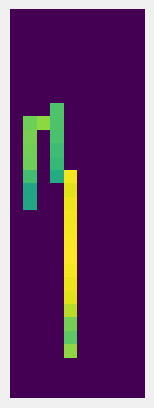

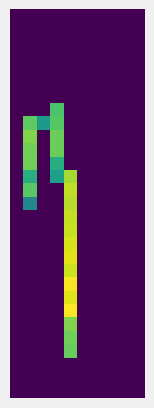

mass:


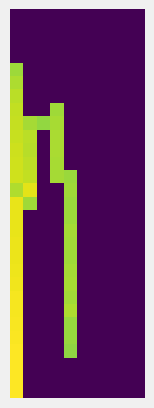

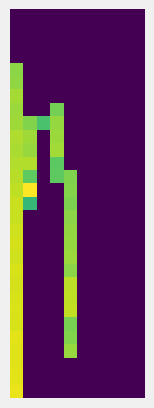

subhalo:


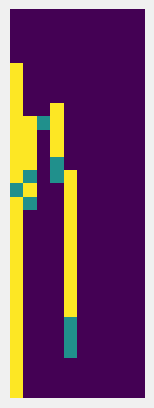

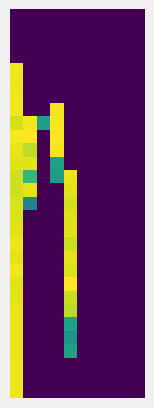

40/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.98it/s]


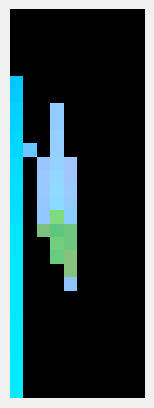

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


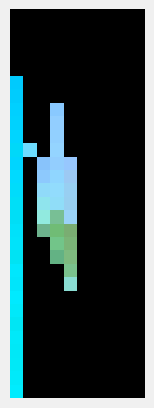

distance:


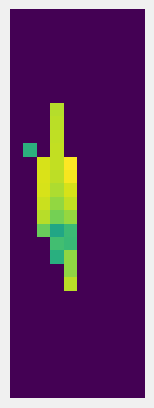

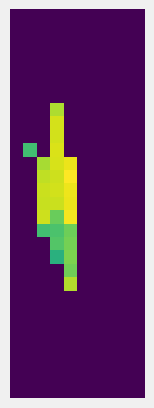

mass:


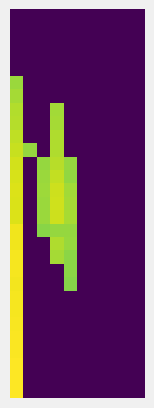

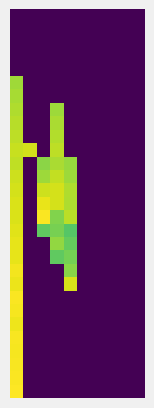

subhalo:


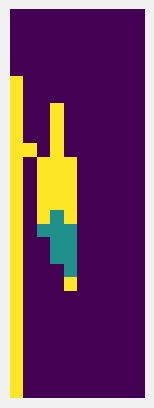

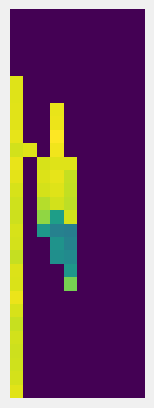

41/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.42it/s]


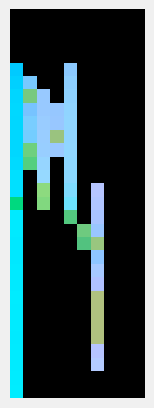

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


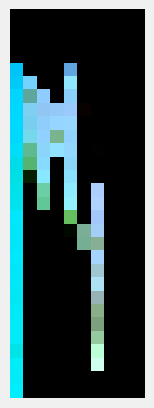

distance:


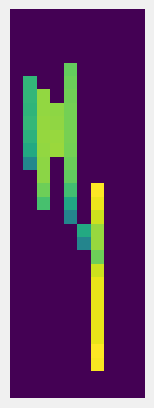

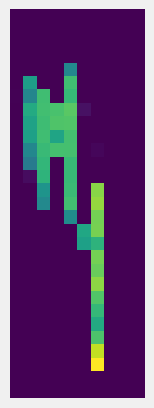

mass:


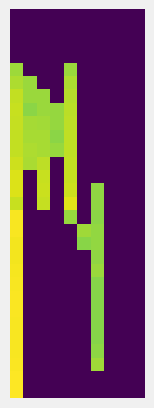

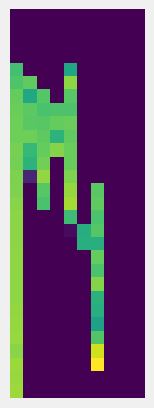

subhalo:


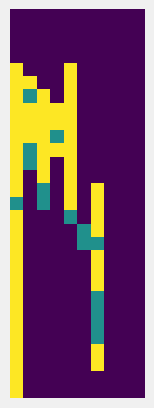

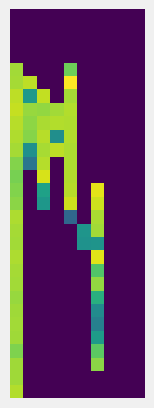

42/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.10it/s]


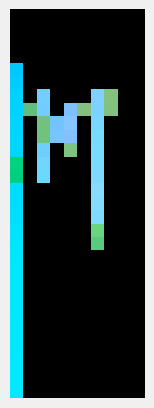

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


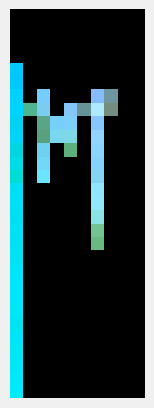

distance:


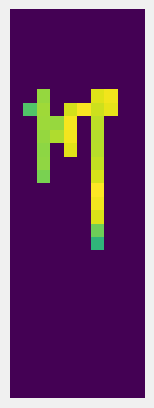

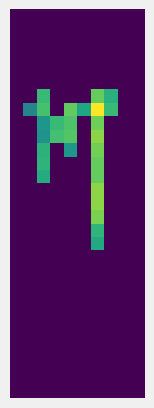

mass:


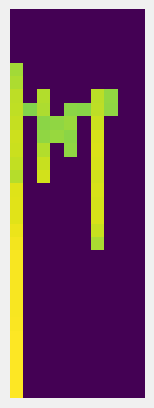

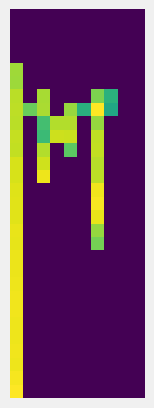

subhalo:


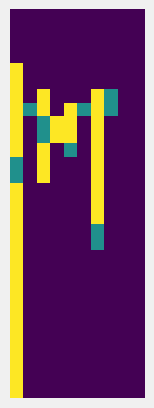

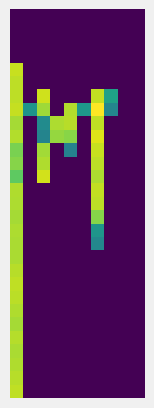

43/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.07it/s]


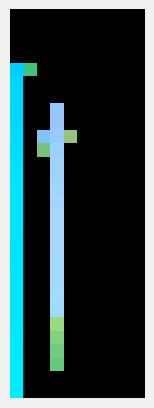

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


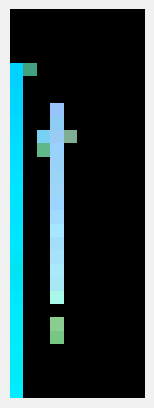

distance:


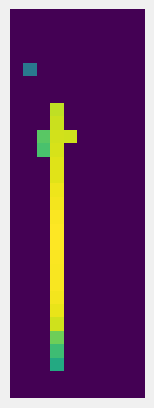

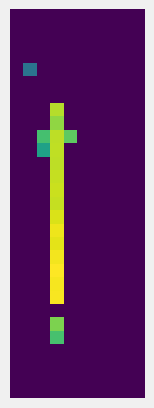

mass:


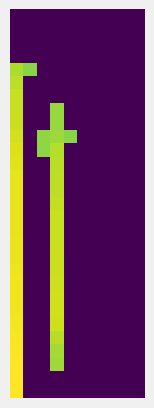

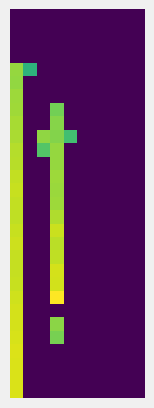

subhalo:


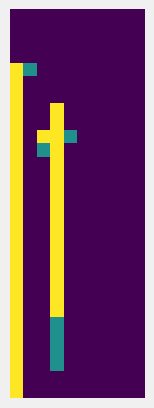

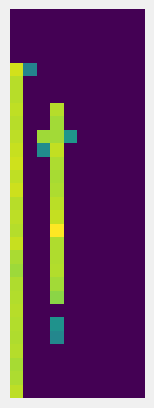

44/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.31it/s]


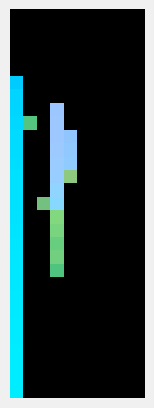

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


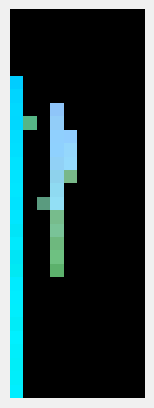

distance:


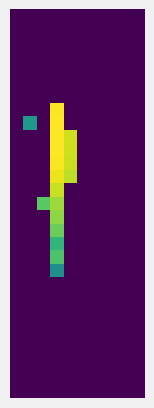

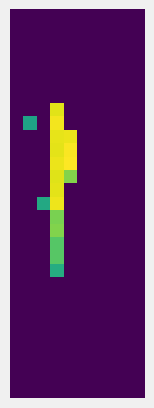

mass:


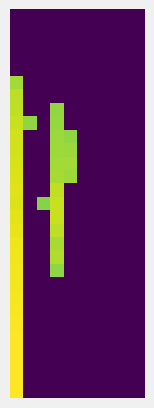

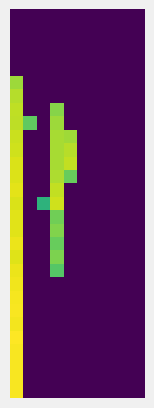

subhalo:


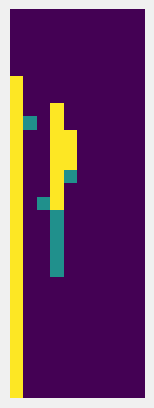

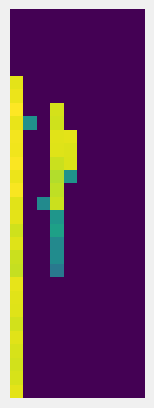

45/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.95it/s]


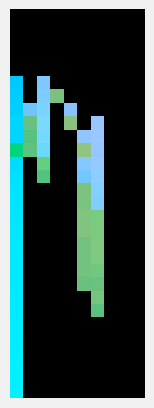

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


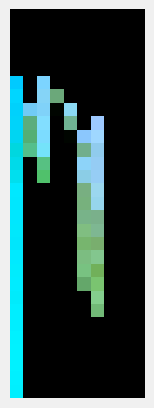

distance:


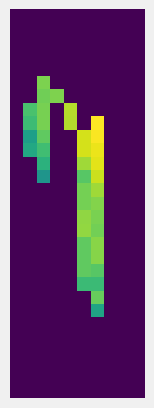

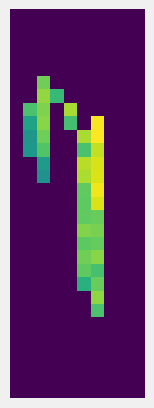

mass:


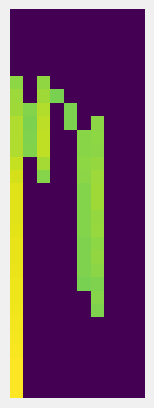

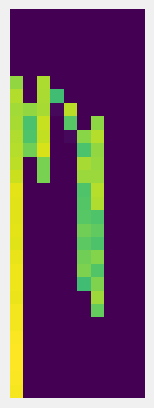

subhalo:


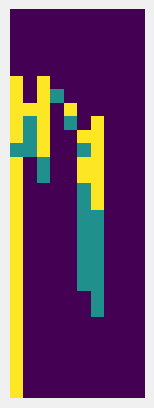

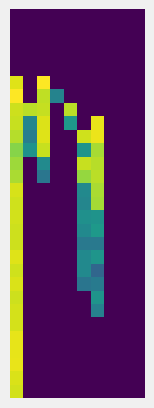

46/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.01it/s]


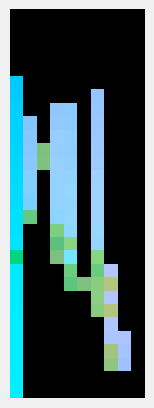

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


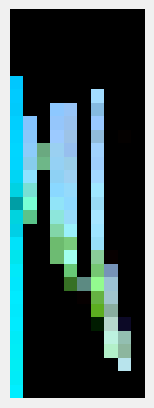

distance:


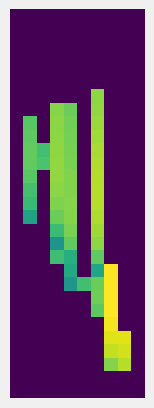

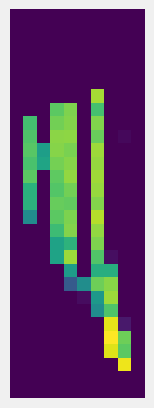

mass:


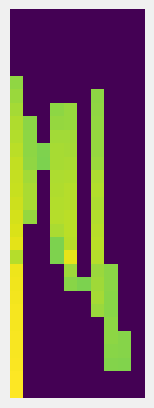

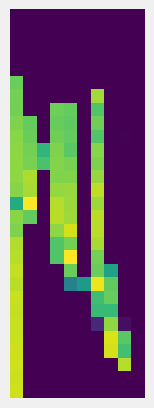

subhalo:


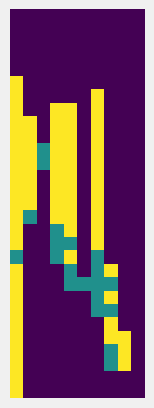

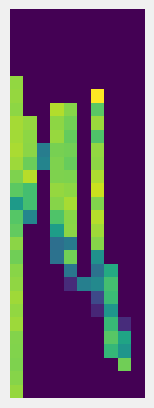

47/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.27it/s]


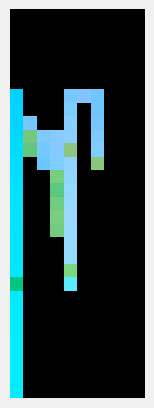

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


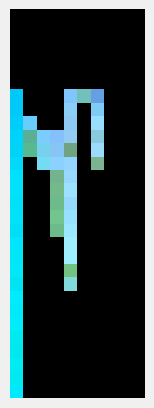

distance:


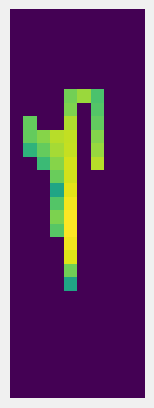

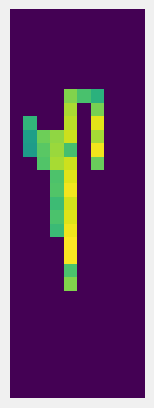

mass:


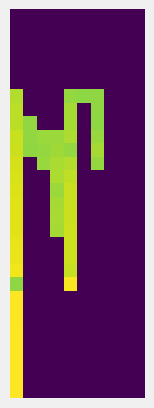

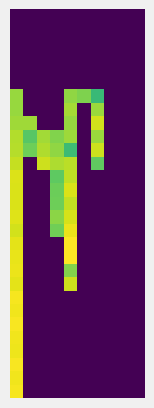

subhalo:


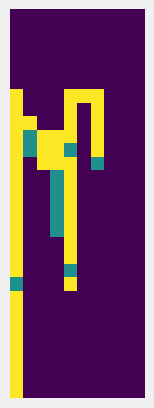

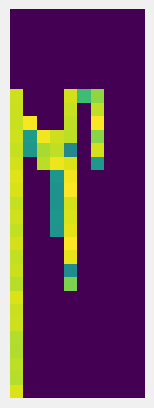

48/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.77it/s]


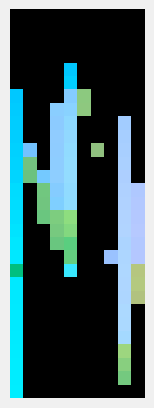

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


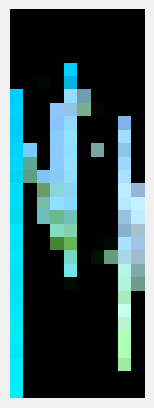

distance:


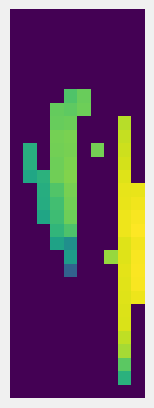

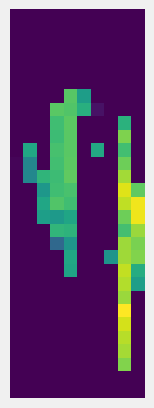

mass:


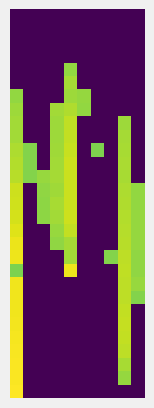

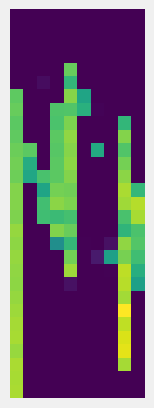

subhalo:


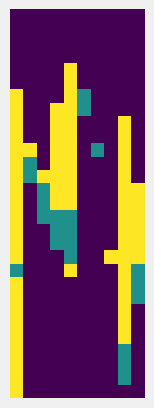

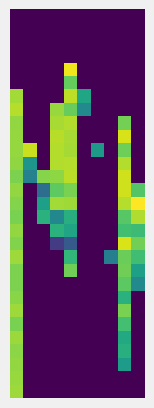

49/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.05it/s]


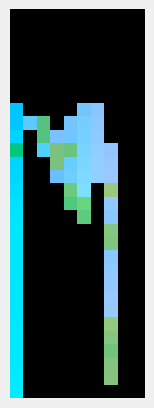

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


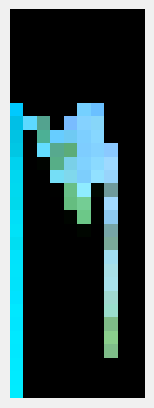

distance:


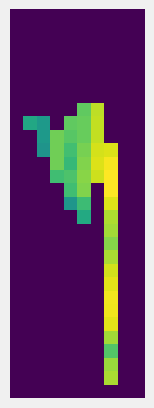

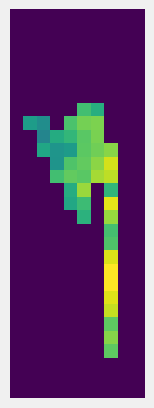

mass:


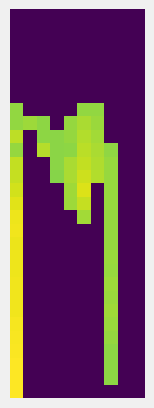

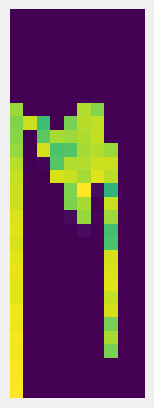

subhalo:


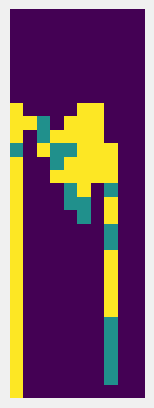

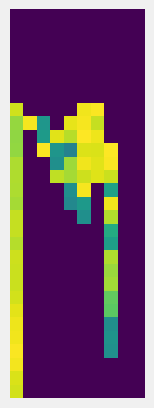

50/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.17it/s]


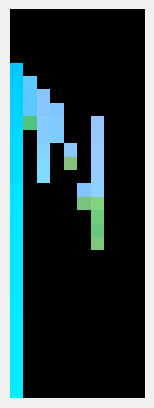

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


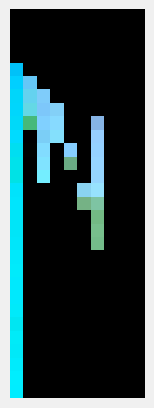

distance:


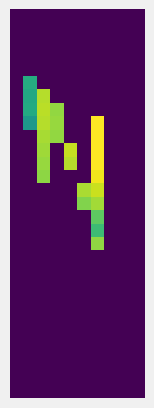

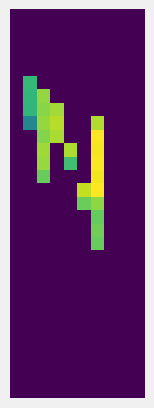

mass:


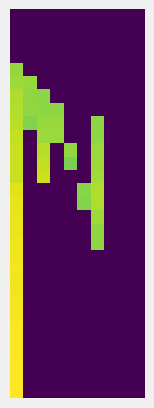

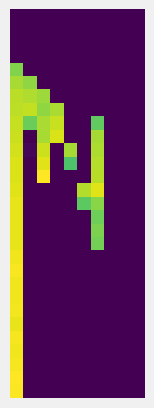

subhalo:


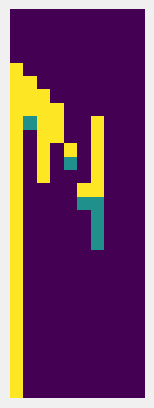

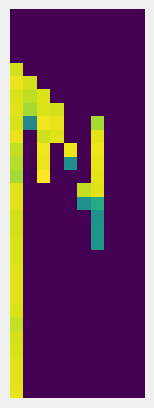

51/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.13it/s]


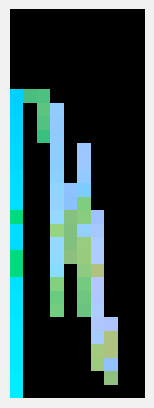

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


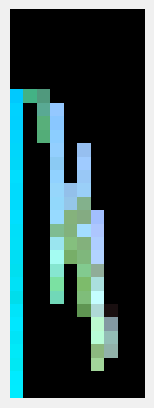

distance:


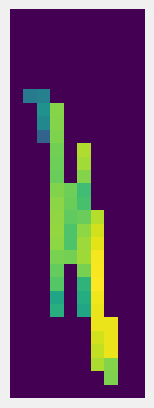

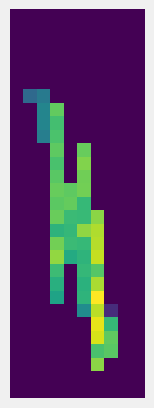

mass:


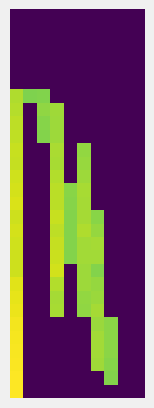

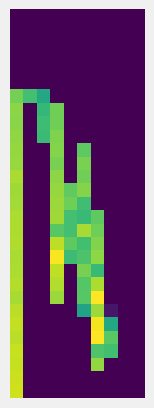

subhalo:


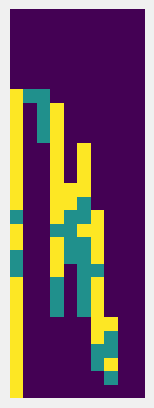

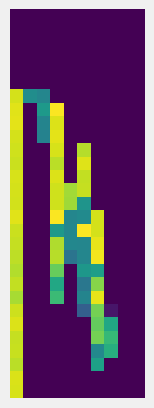

52/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.08it/s]


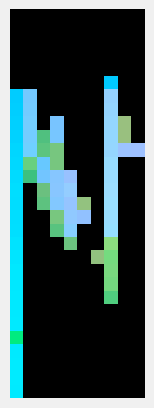

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


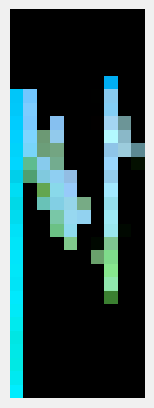

distance:


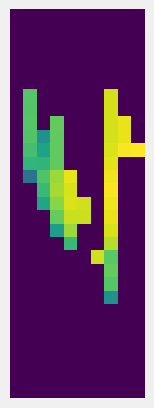

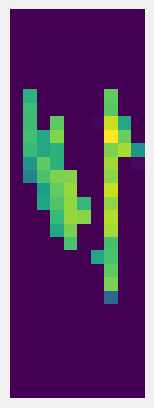

mass:


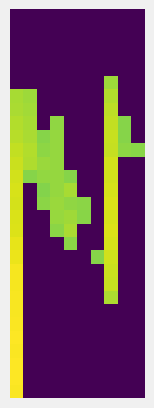

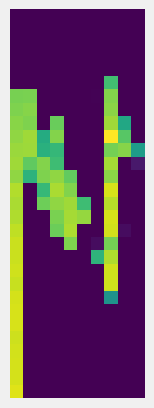

subhalo:


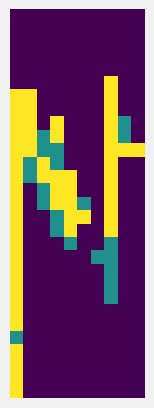

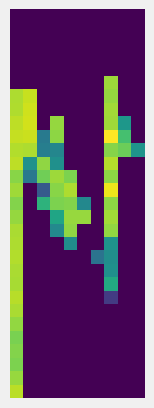

53/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.83it/s]


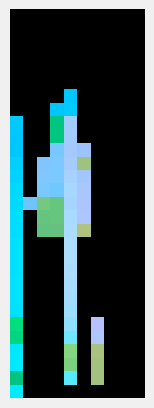

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


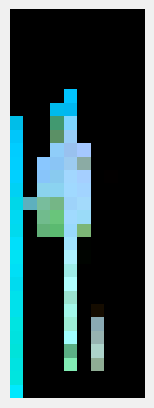

distance:


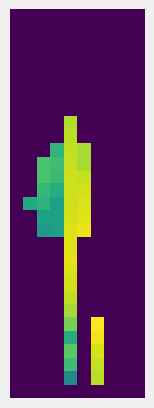

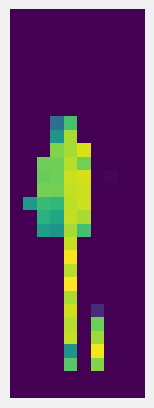

mass:


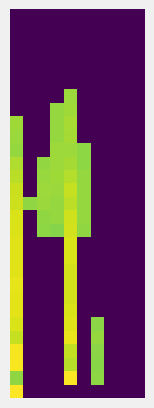

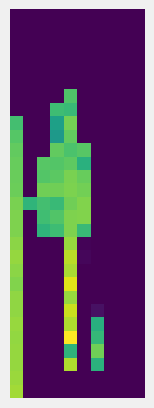

subhalo:


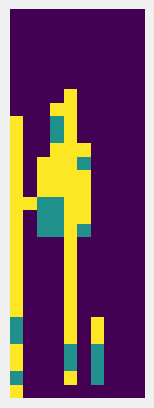

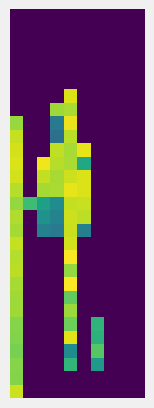

54/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.75it/s]


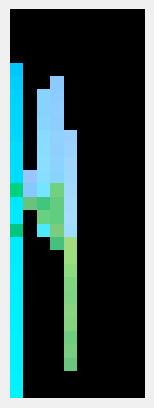

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


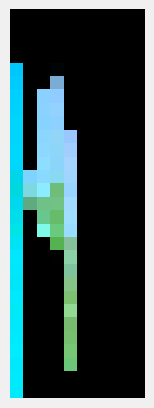

distance:


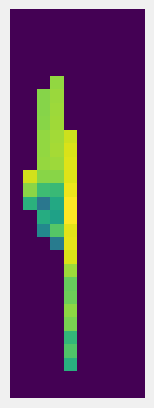

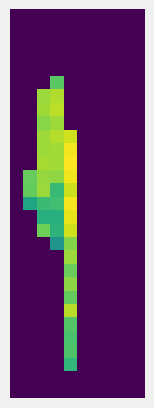

mass:


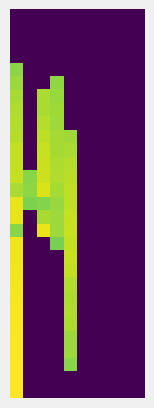

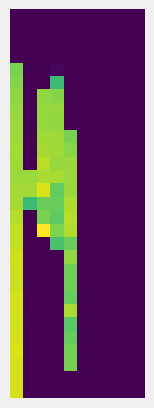

subhalo:


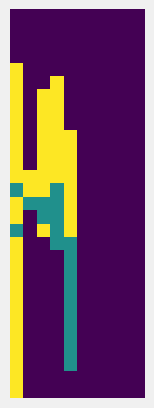

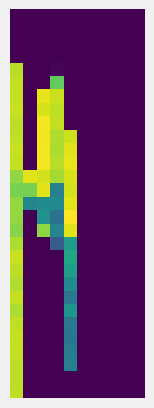

55/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.43it/s]


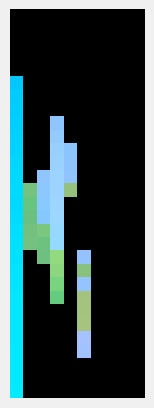

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


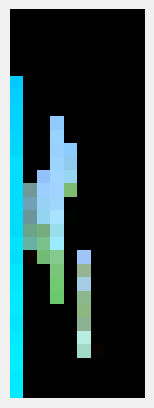

distance:


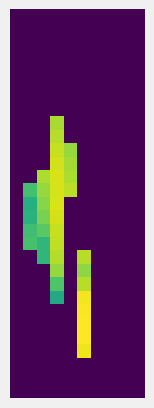

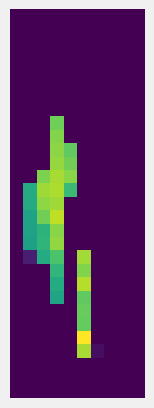

mass:


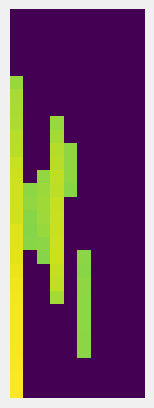

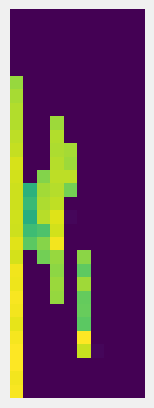

subhalo:


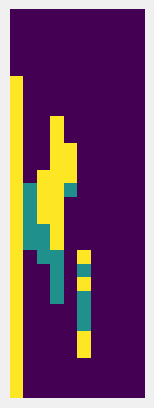

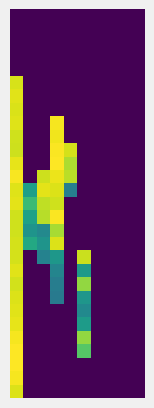

56/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.60it/s]


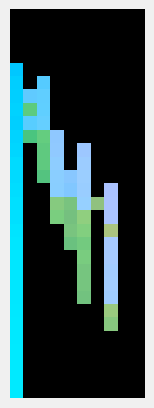

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


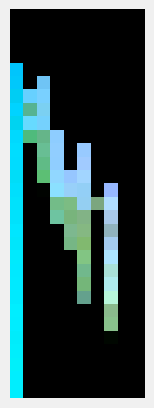

distance:


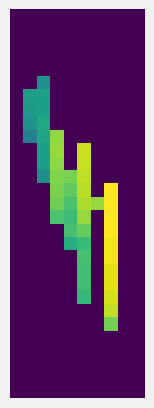

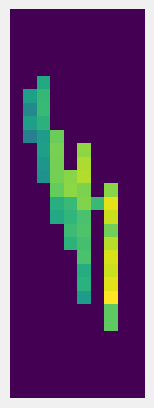

mass:


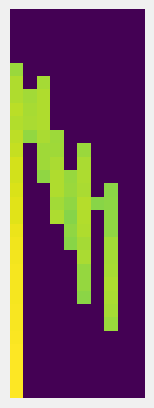

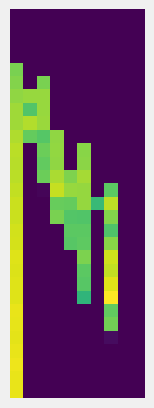

subhalo:


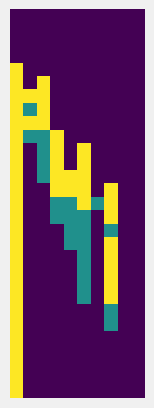

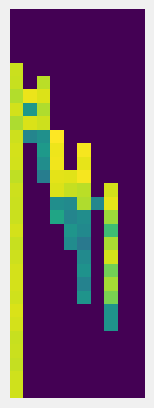

57/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.54it/s]


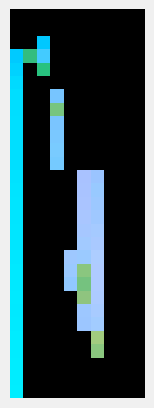

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


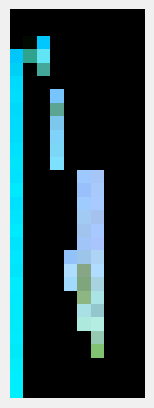

distance:


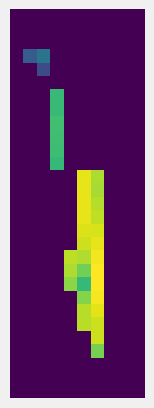

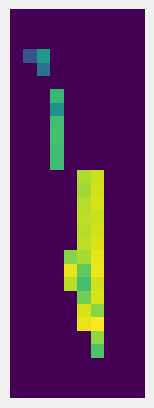

mass:


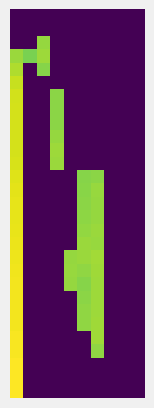

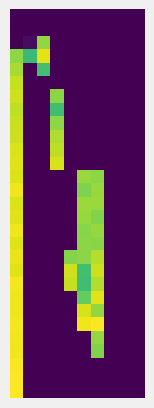

subhalo:


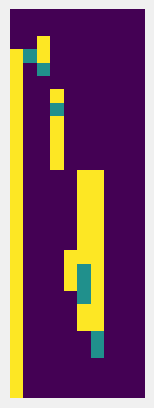

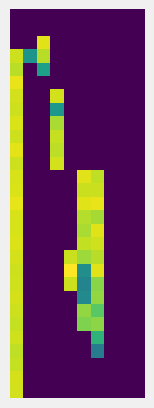

58/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.12it/s]


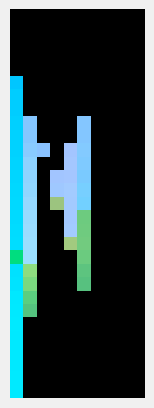

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


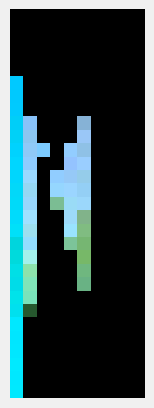

distance:


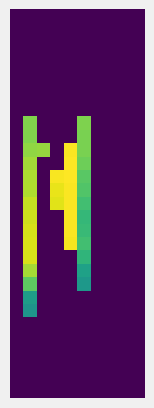

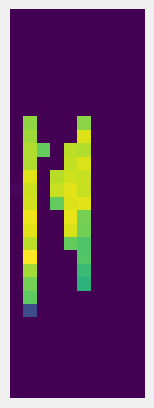

mass:


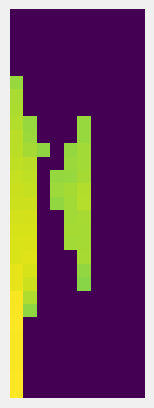

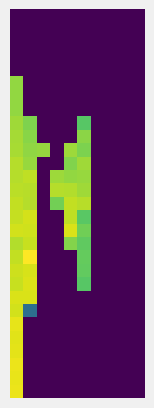

subhalo:


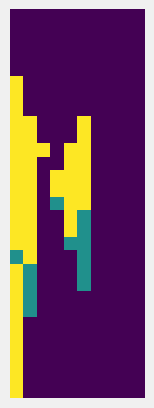

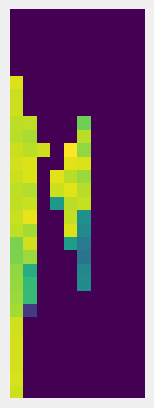

59/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.14it/s]


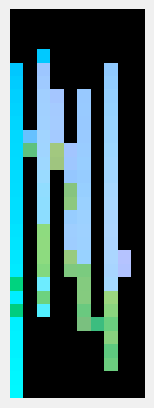

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


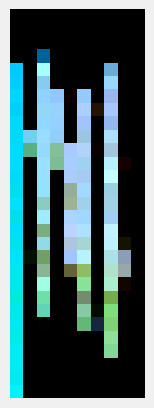

distance:


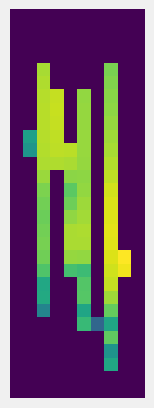

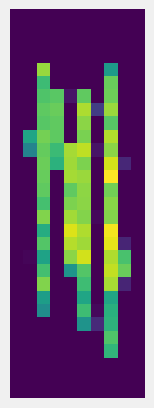

mass:


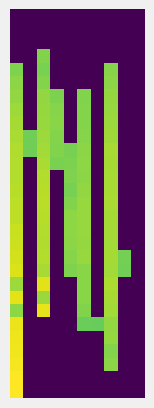

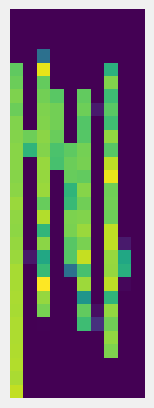

subhalo:


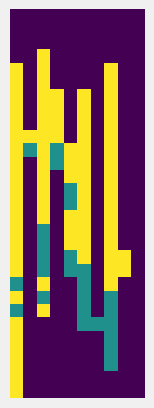

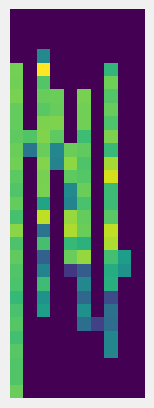

60/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.48it/s]


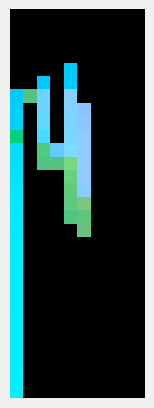

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


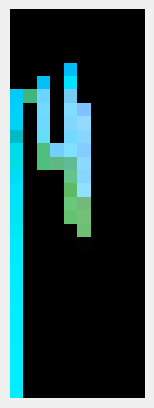

distance:


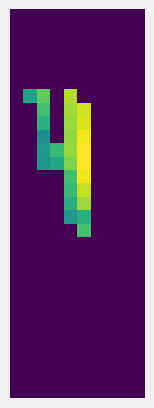

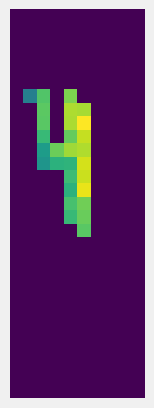

mass:


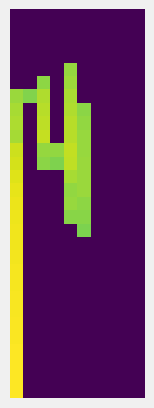

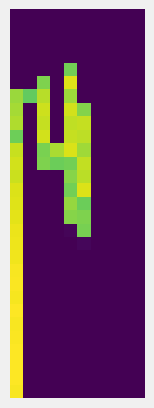

subhalo:


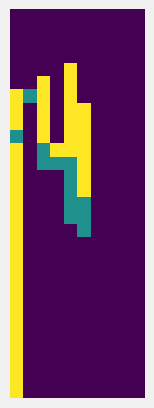

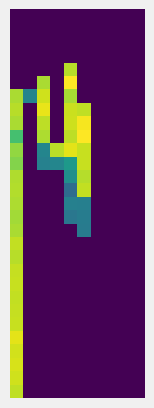

61/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.06it/s]


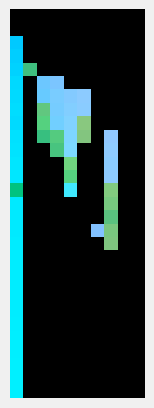

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


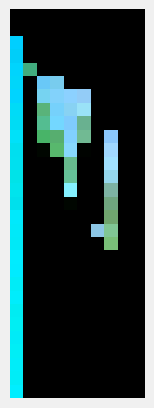

distance:


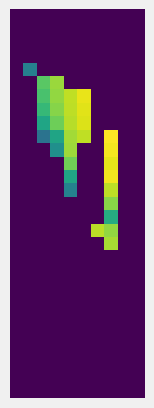

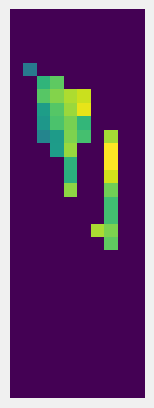

mass:


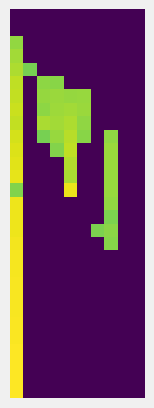

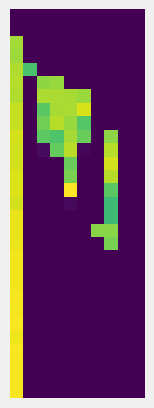

subhalo:


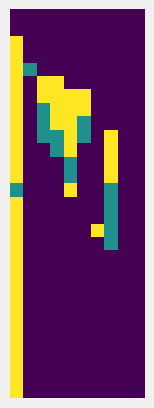

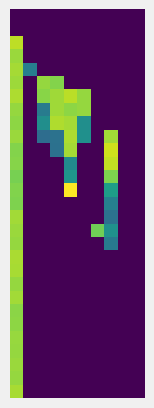

62/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.77it/s]


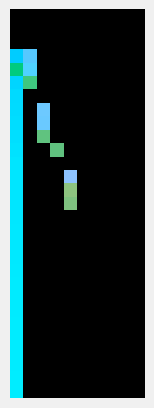

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


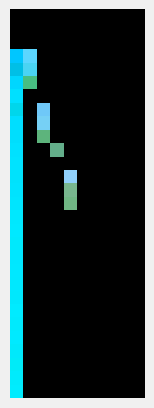

distance:


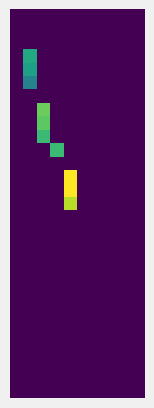

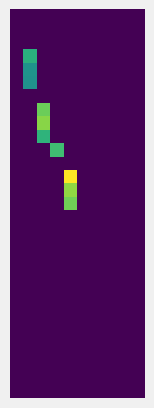

mass:


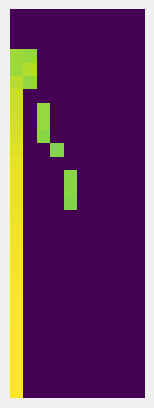

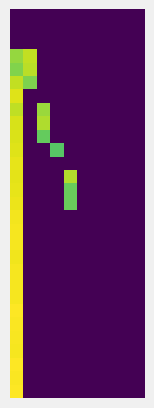

subhalo:


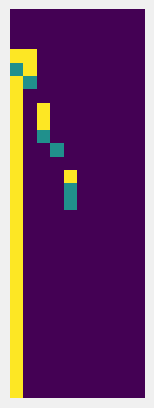

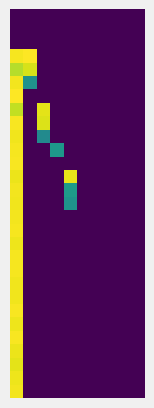

63/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.80it/s]


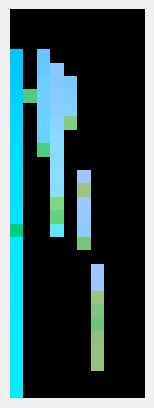

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


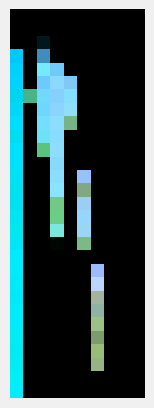

distance:


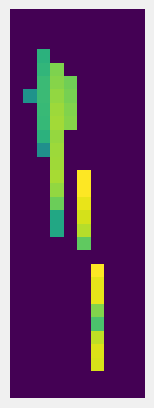

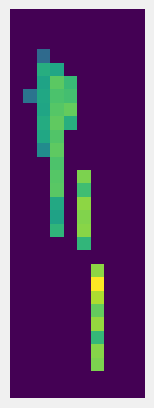

mass:


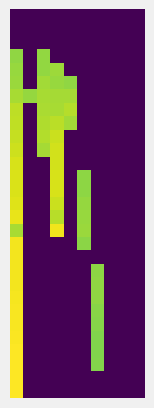

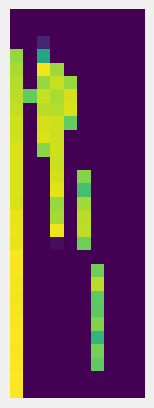

subhalo:


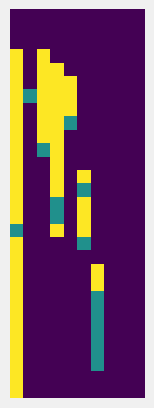

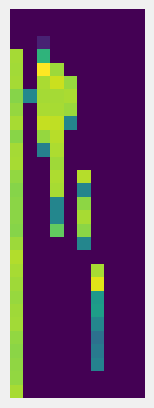

64/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.46it/s]


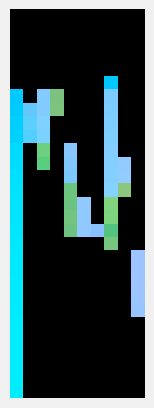

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


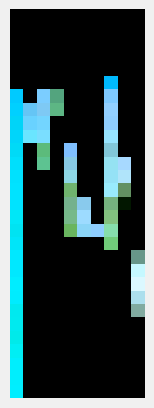

distance:


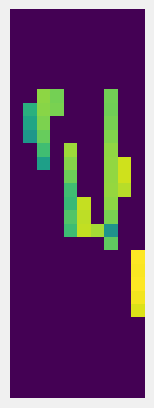

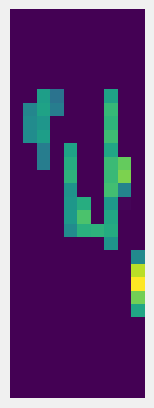

mass:


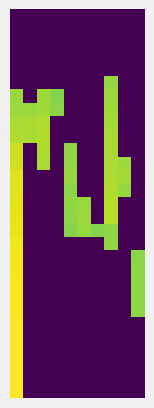

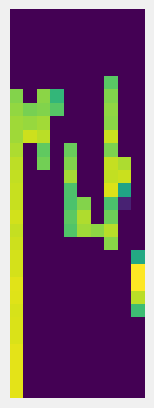

subhalo:


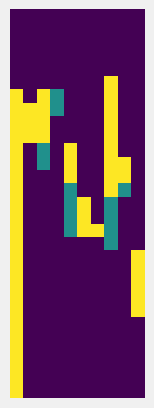

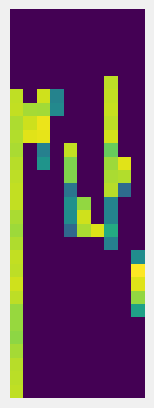

65/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.11it/s]


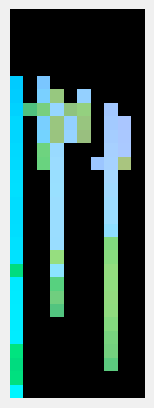

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


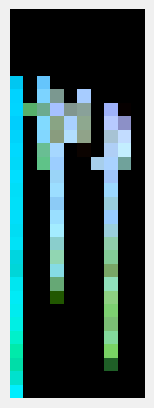

distance:


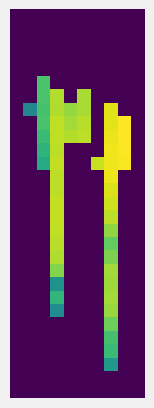

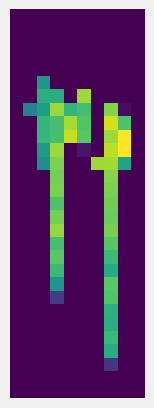

mass:


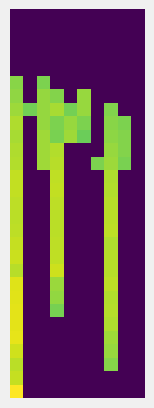

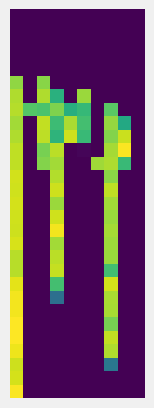

subhalo:


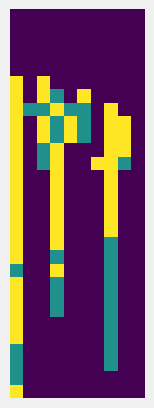

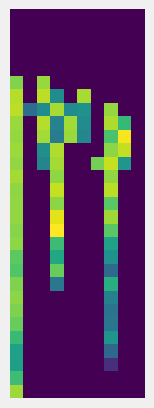

66/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.29it/s]


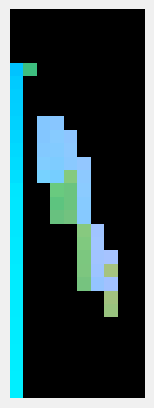

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


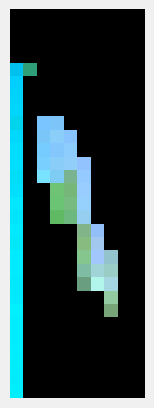

distance:


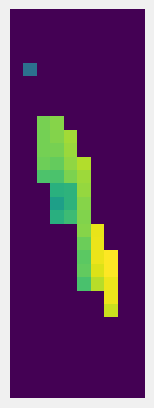

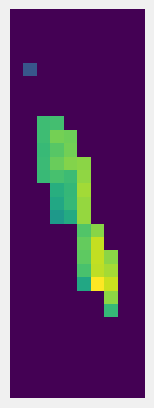

mass:


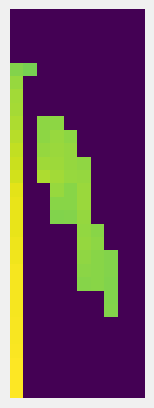

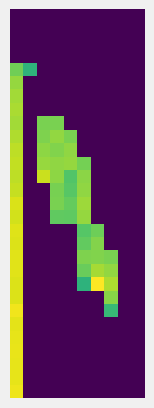

subhalo:


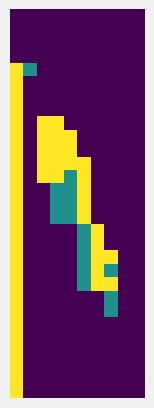

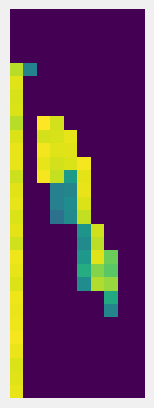

67/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.12it/s]


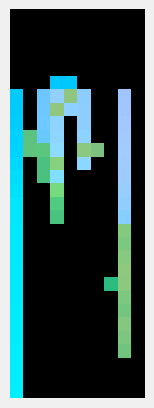

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


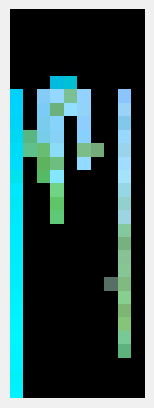

distance:


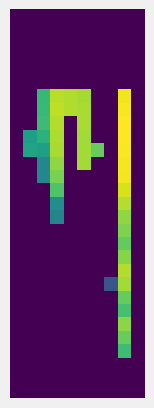

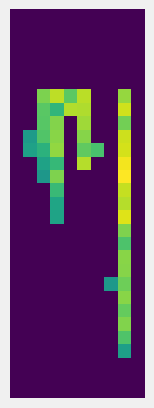

mass:


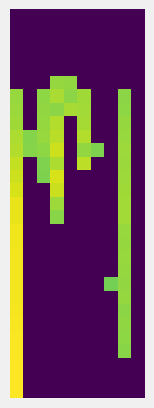

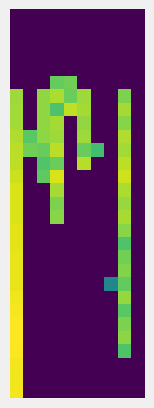

subhalo:


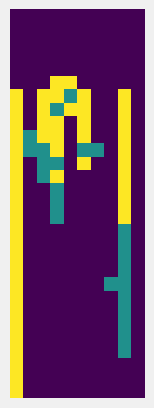

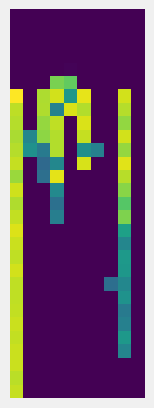

68/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.22it/s]


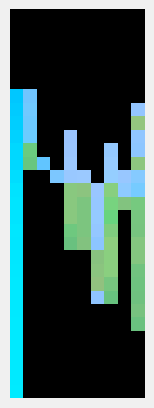

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


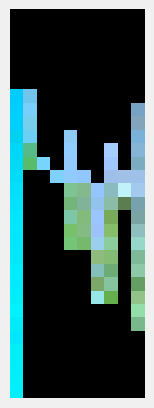

distance:


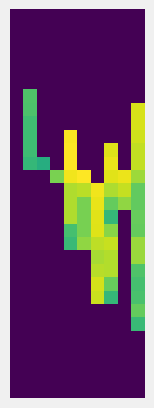

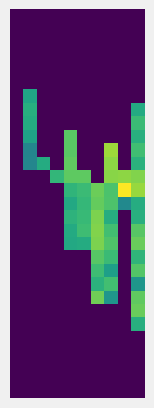

mass:


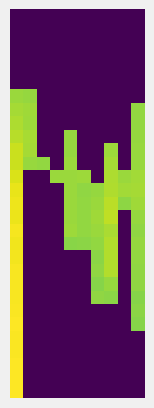

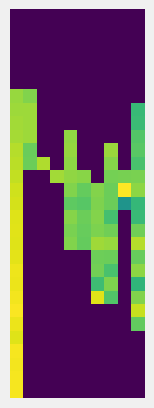

subhalo:


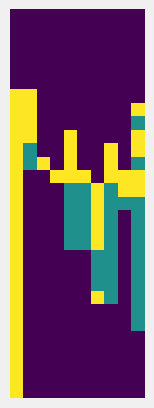

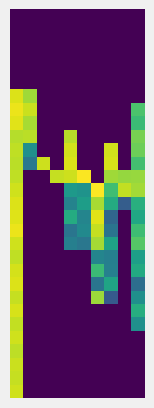

69/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.23it/s]


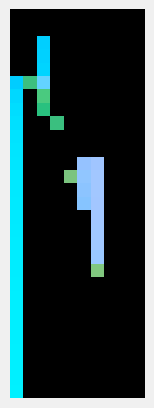

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


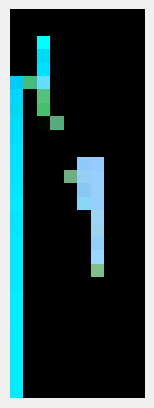

distance:


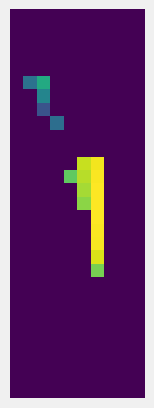

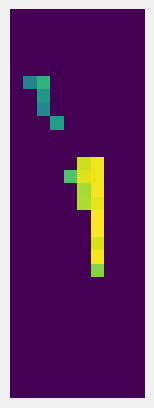

mass:


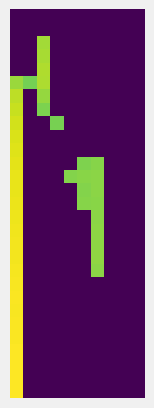

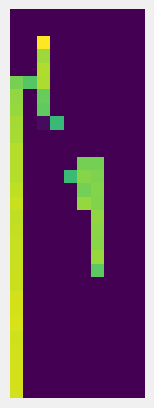

subhalo:


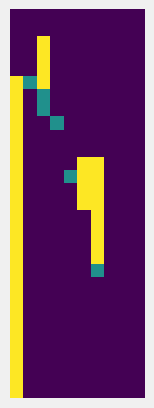

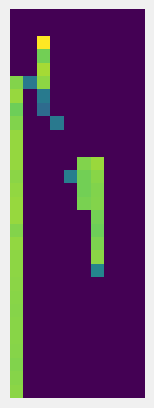

70/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.20it/s]


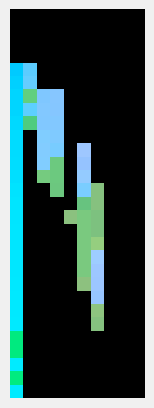

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


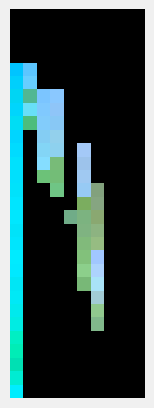

distance:


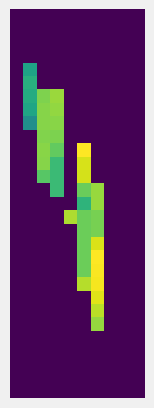

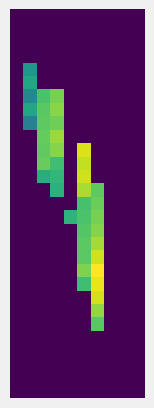

mass:


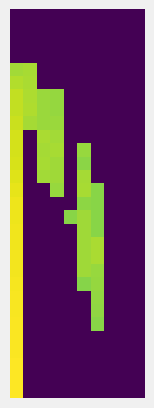

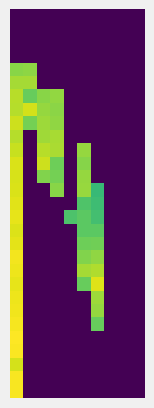

subhalo:


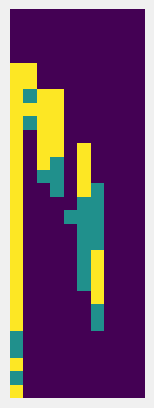

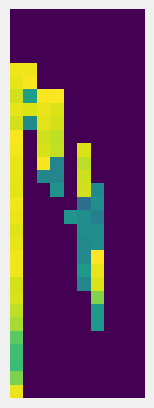

71/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.32it/s]


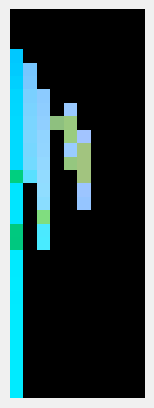

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


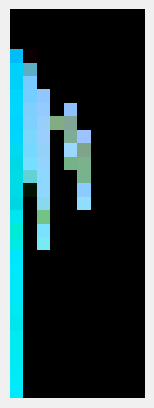

distance:


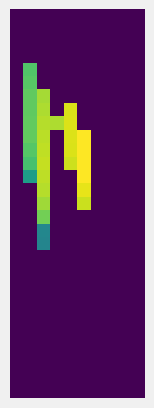

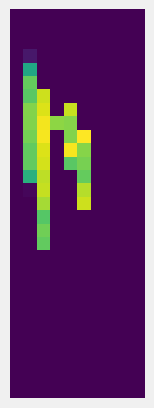

mass:


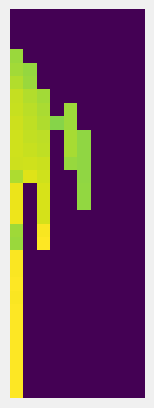

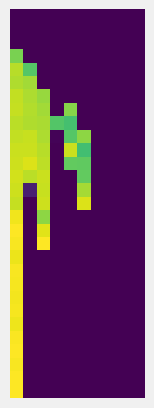

subhalo:


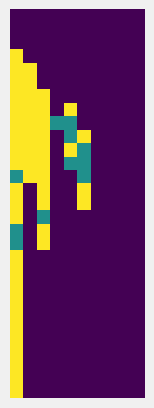

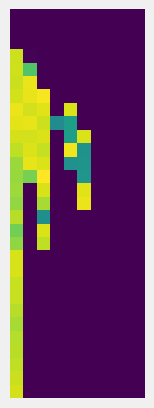

72/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.42it/s]


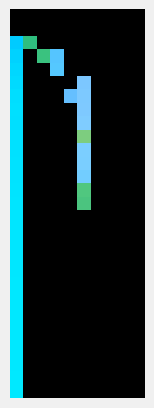

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


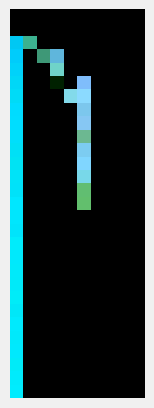

distance:


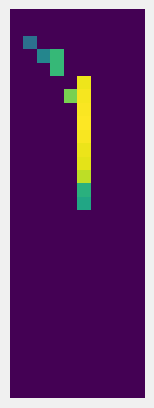

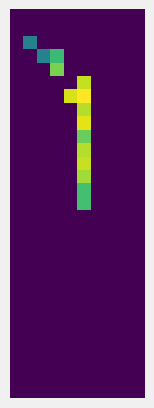

mass:


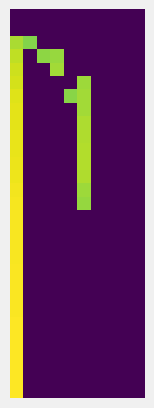

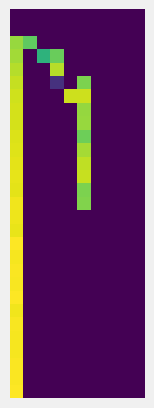

subhalo:


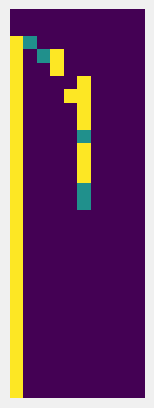

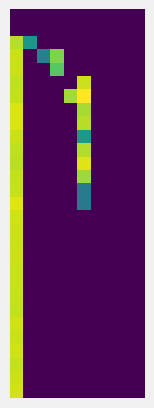

73/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.46it/s]


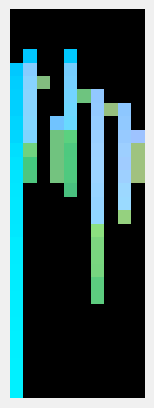

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


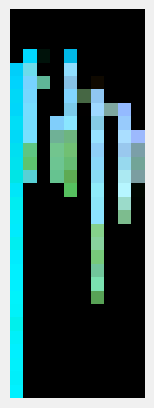

distance:


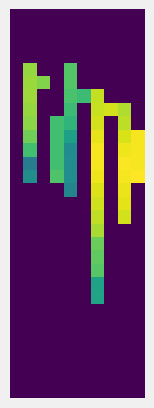

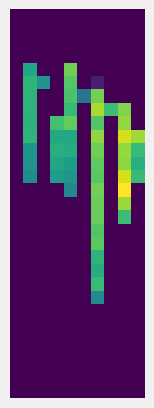

mass:


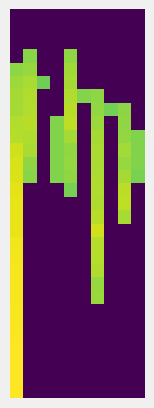

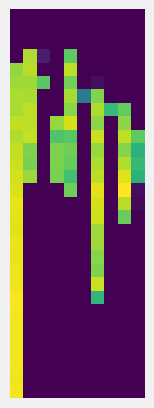

subhalo:


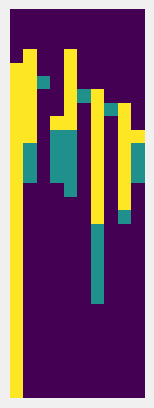

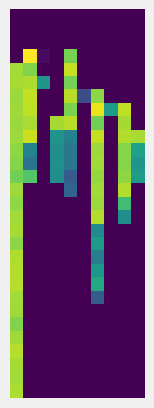

74/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.10it/s]


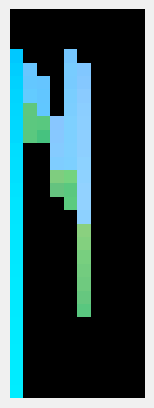

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


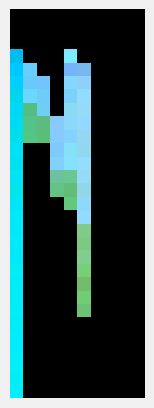

distance:


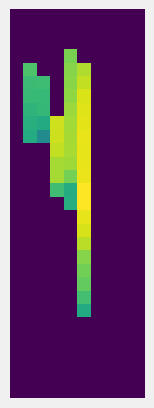

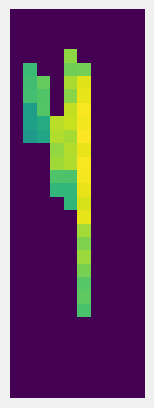

mass:


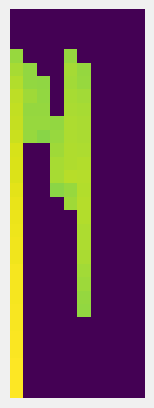

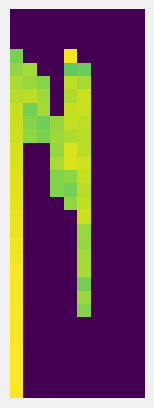

subhalo:


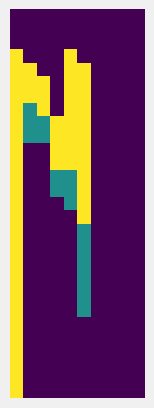

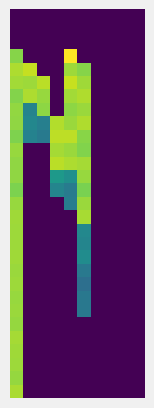

75/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.66it/s]


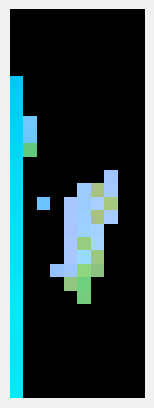

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


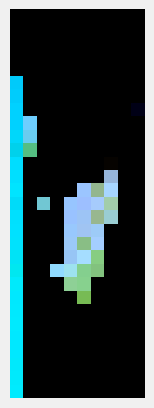

distance:


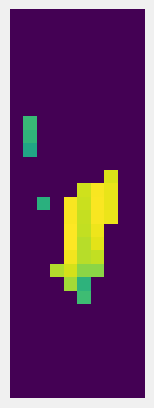

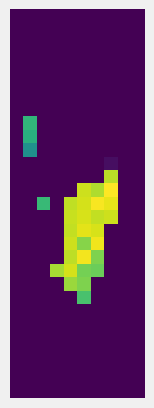

mass:


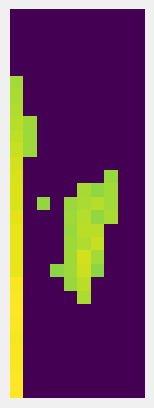

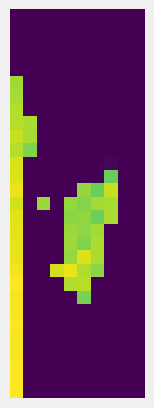

subhalo:


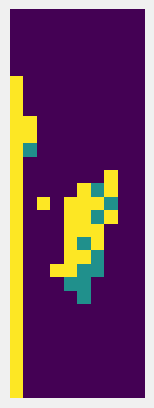

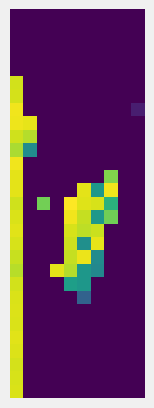

76/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.19it/s]


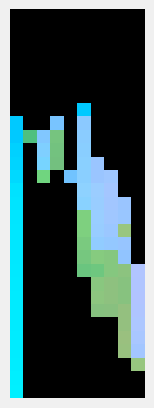

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


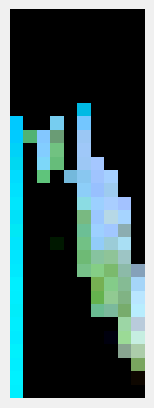

distance:


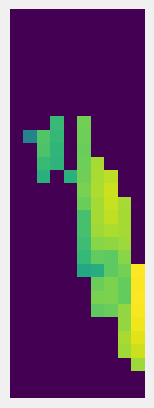

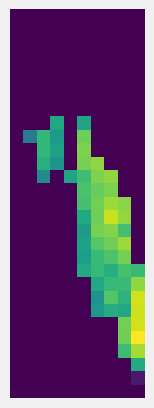

mass:


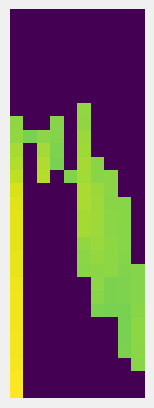

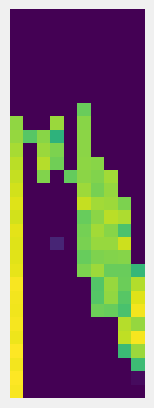

subhalo:


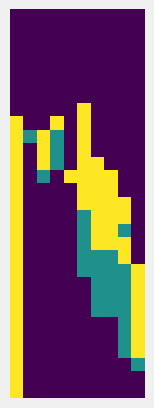

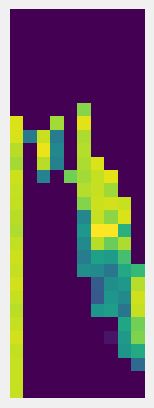

77/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.35it/s]


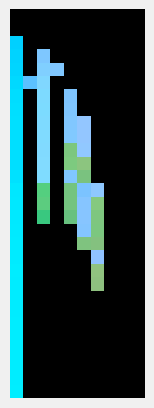

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


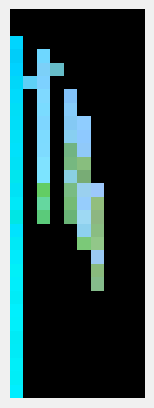

distance:


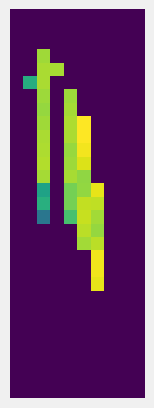

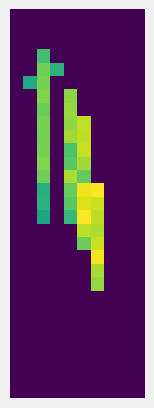

mass:


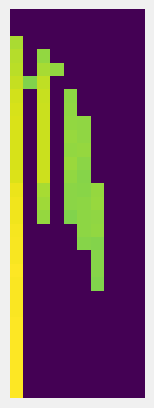

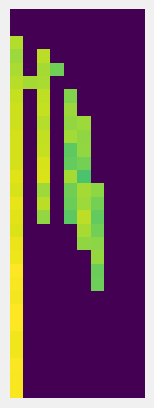

subhalo:


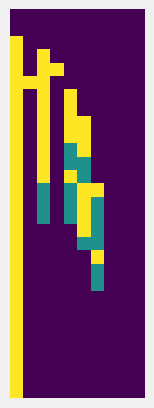

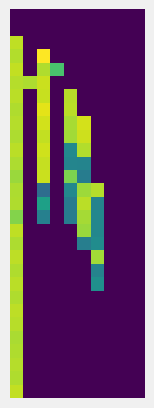

78/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.21it/s]


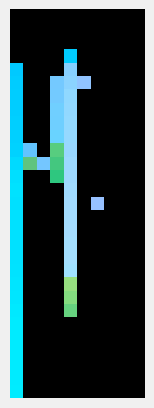

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


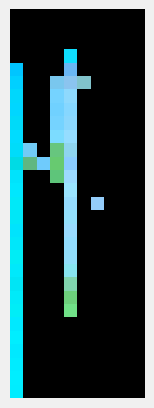

distance:


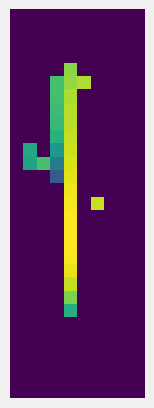

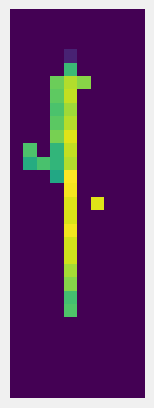

mass:


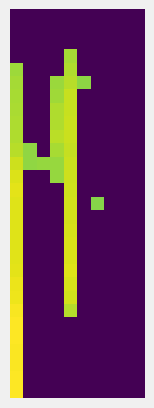

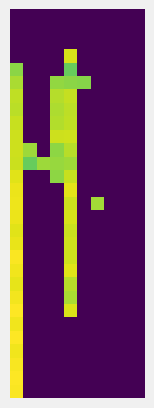

subhalo:


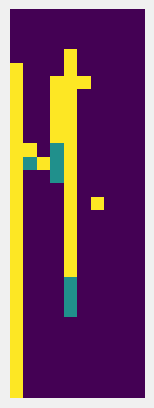

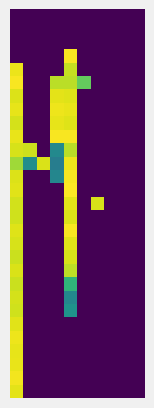

79/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.12it/s]


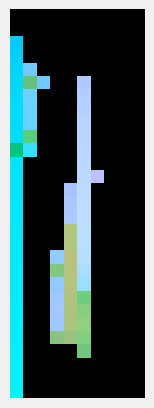

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


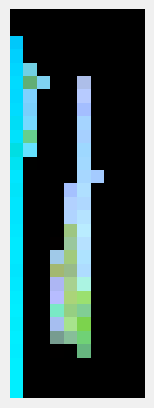

distance:


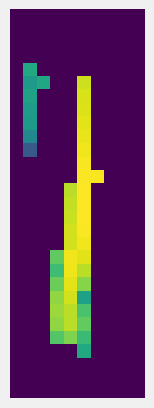

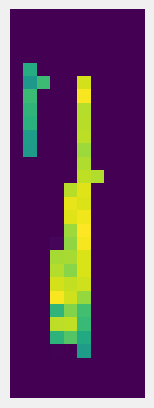

mass:


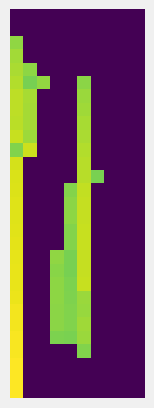

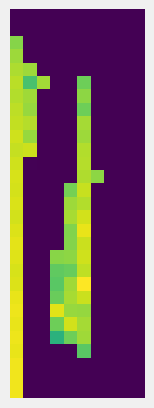

subhalo:


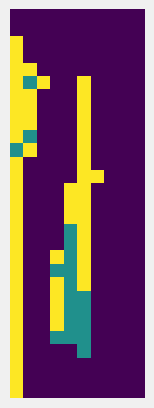

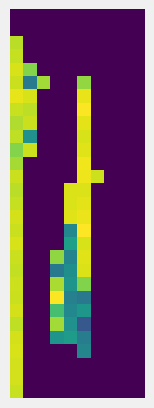

80/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.15it/s]


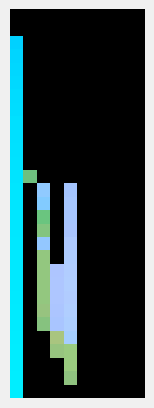

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


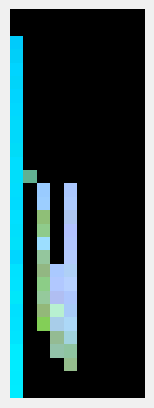

distance:


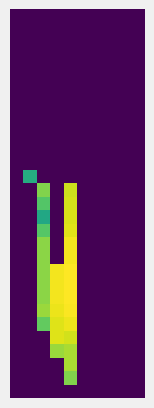

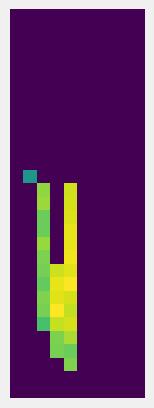

mass:


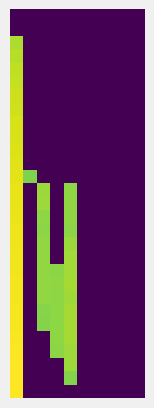

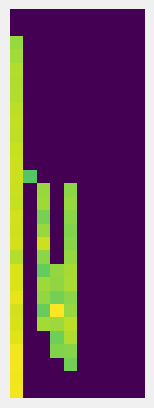

subhalo:


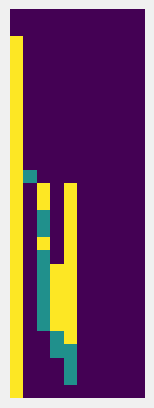

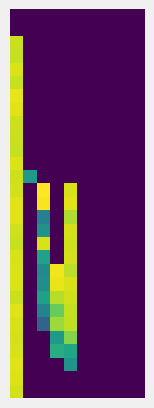

81/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.06it/s]


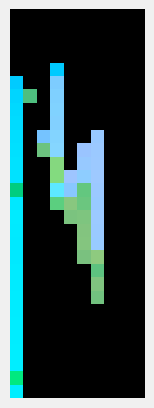

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


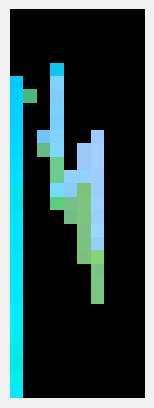

distance:


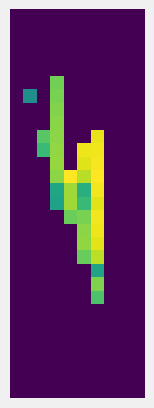

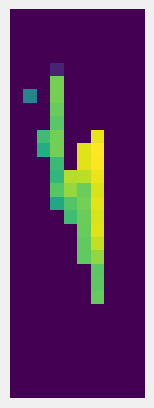

mass:


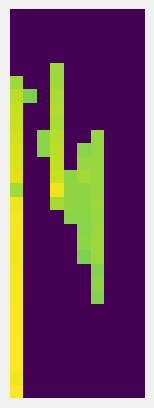

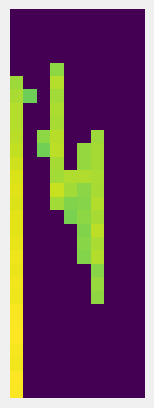

subhalo:


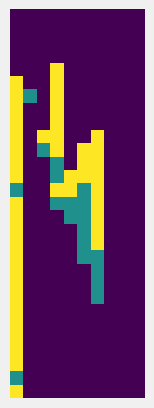

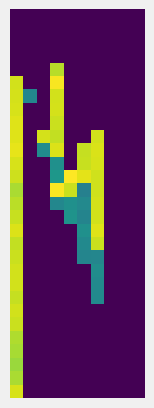

82/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.31it/s]


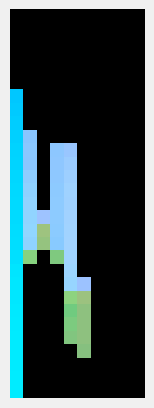

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


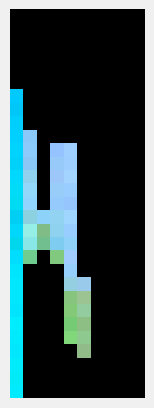

distance:


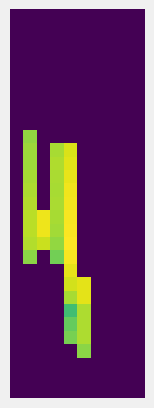

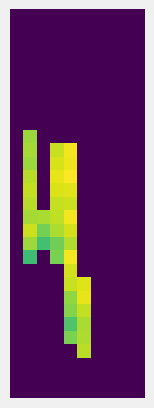

mass:


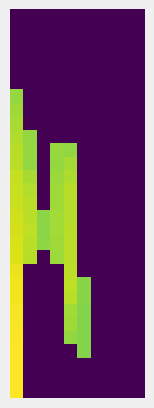

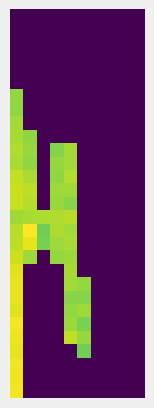

subhalo:


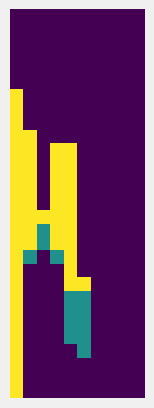

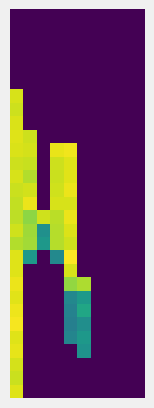

83/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.27it/s]


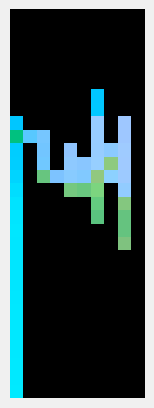

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


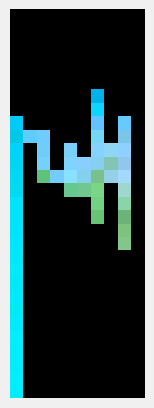

distance:


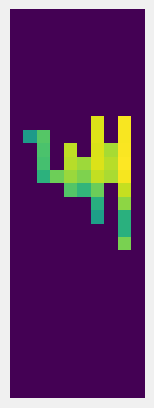

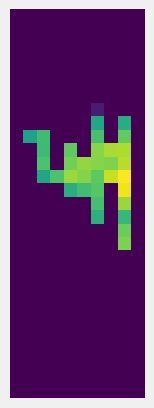

mass:


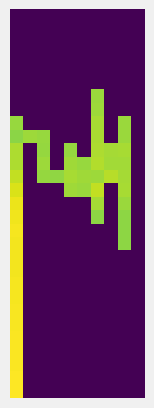

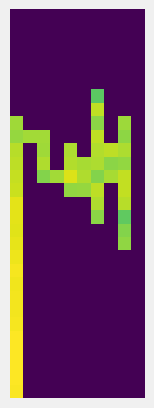

subhalo:


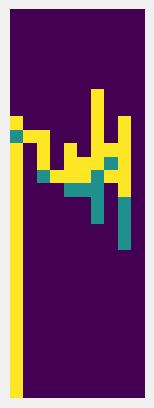

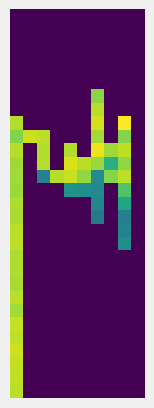

84/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.58it/s]


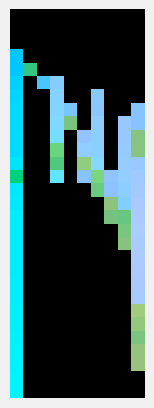

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


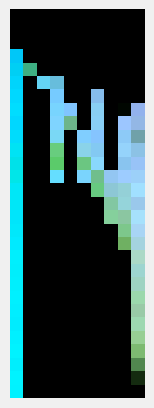

distance:


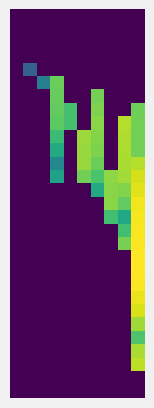

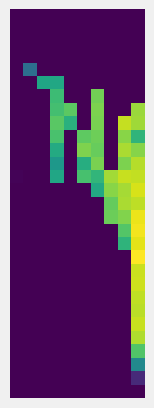

mass:


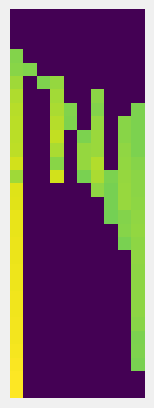

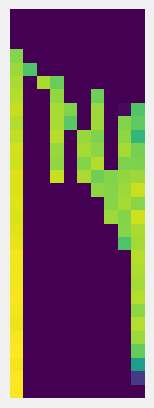

subhalo:


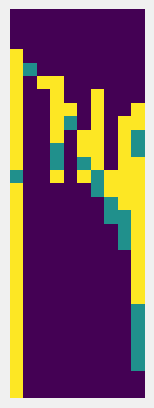

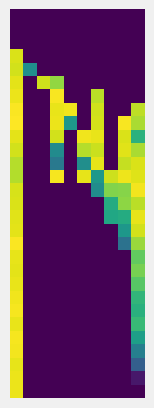

85/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.21it/s]


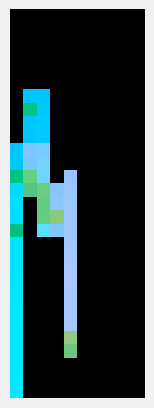

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


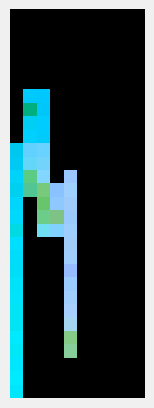

distance:


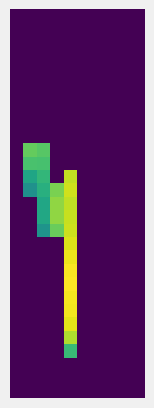

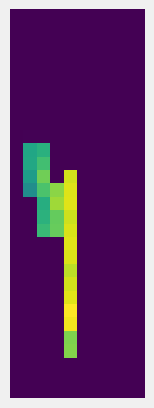

mass:


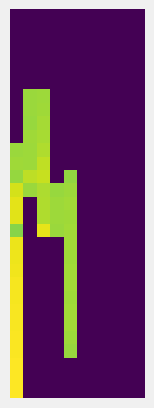

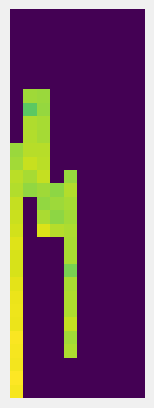

subhalo:


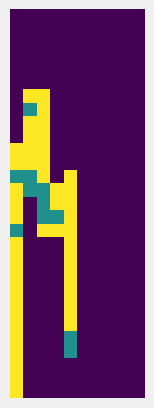

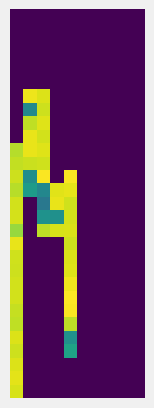

86/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.64it/s]


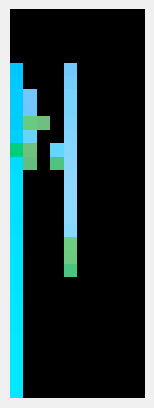

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


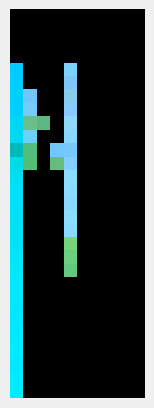

distance:


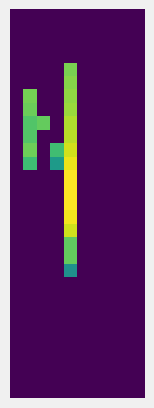

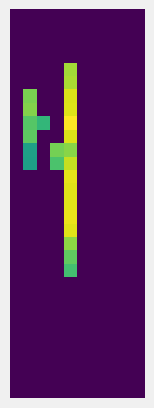

mass:


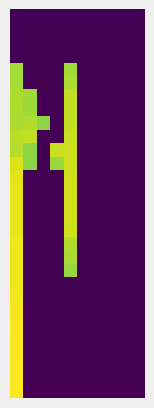

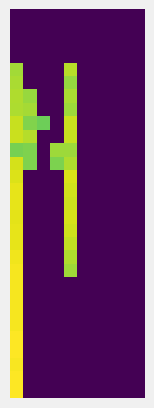

subhalo:


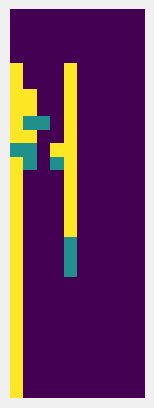

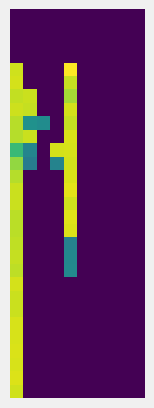

87/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.10it/s]


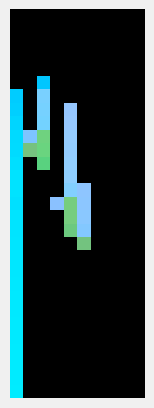

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


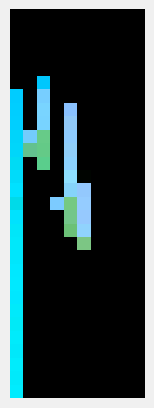

distance:


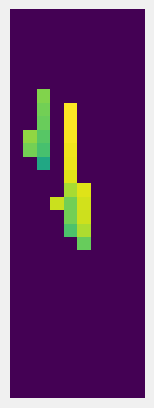

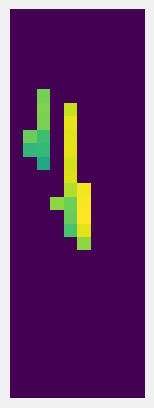

mass:


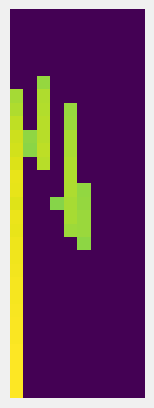

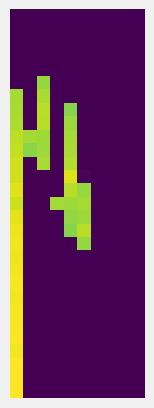

subhalo:


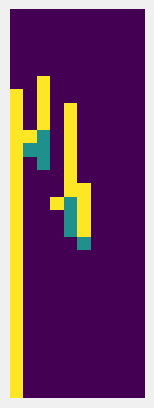

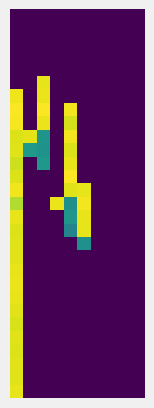

88/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.53it/s]


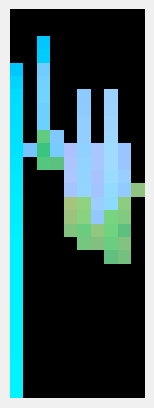

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


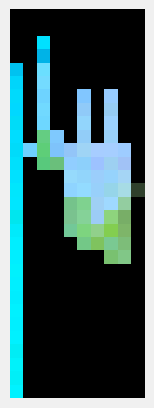

distance:


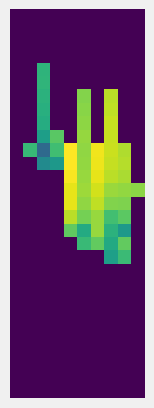

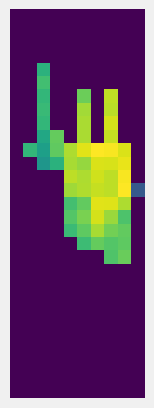

mass:


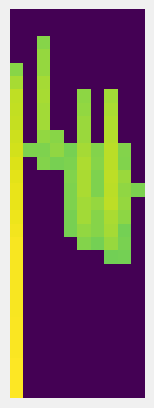

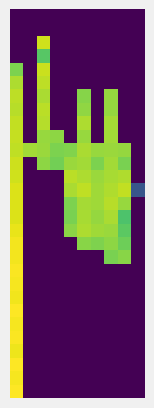

subhalo:


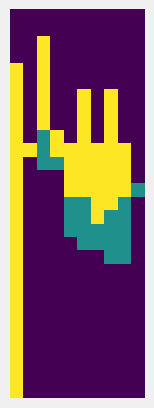

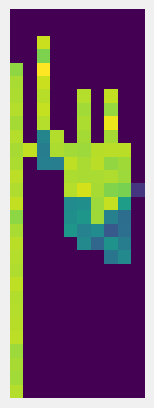

89/100


100%|█████████████████████████████████████████| 300/300 [00:07<00:00, 42.37it/s]


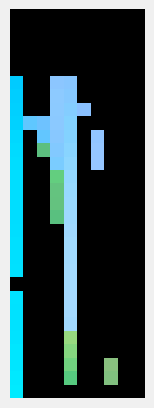

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


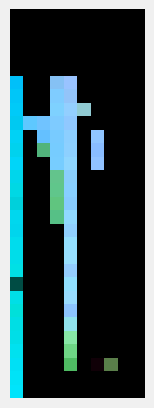

distance:


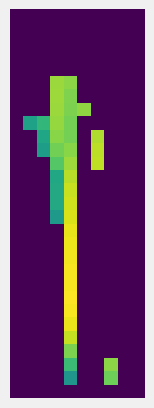

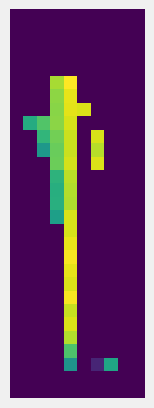

mass:


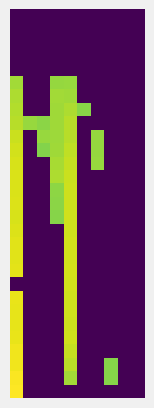

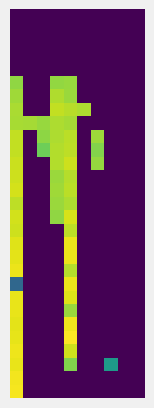

subhalo:


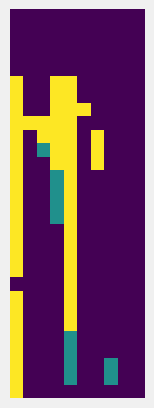

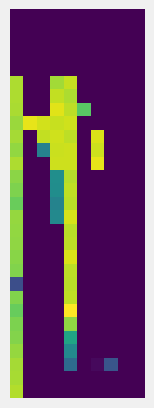

90/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.61it/s]


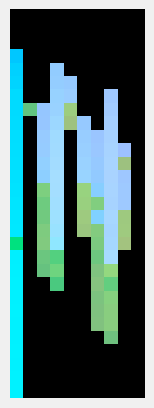

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


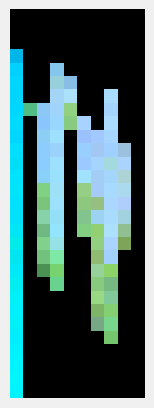

distance:


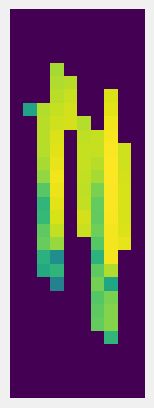

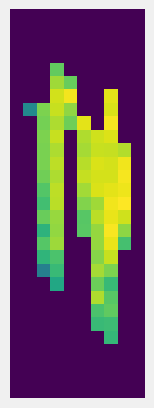

mass:


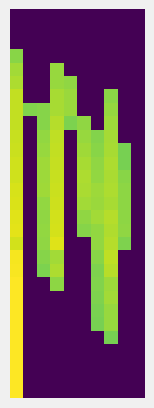

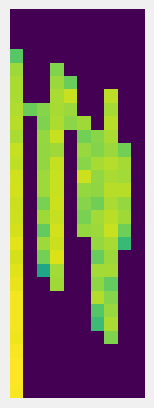

subhalo:


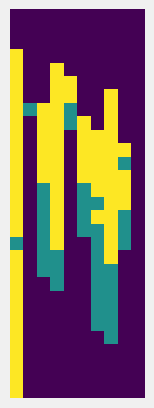

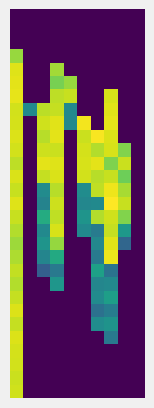

91/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.74it/s]


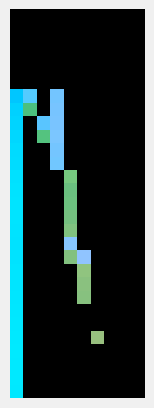

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


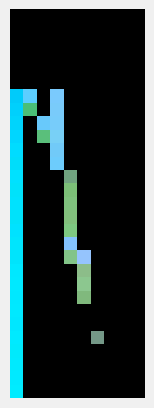

distance:


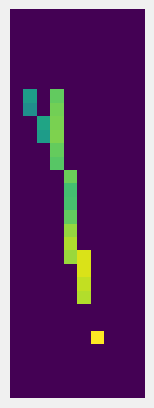

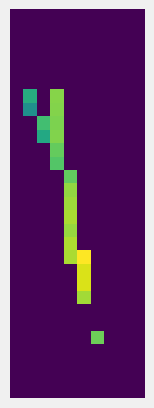

mass:


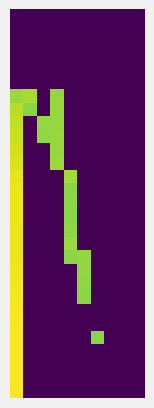

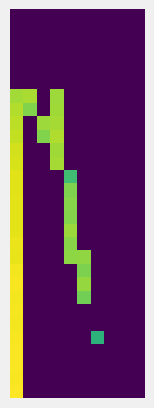

subhalo:


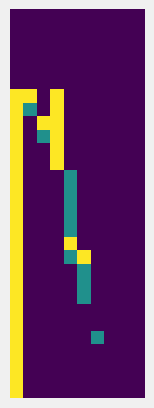

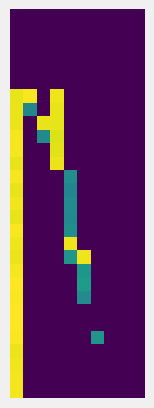

92/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.04it/s]


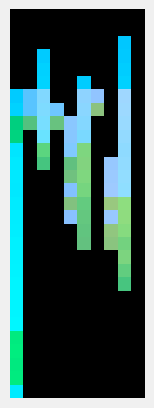

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


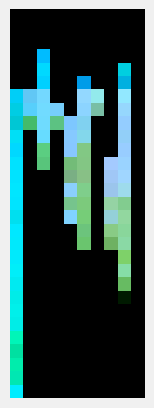

distance:


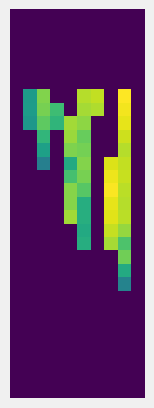

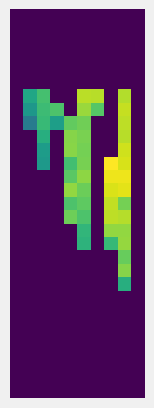

mass:


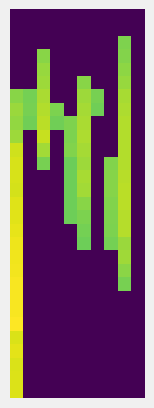

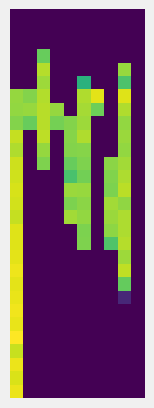

subhalo:


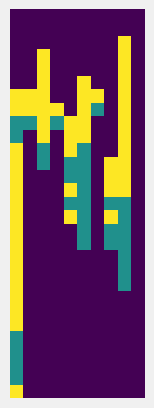

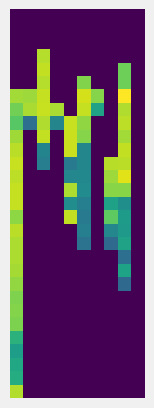

93/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 45.07it/s]


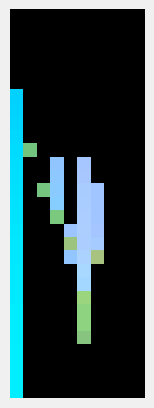

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


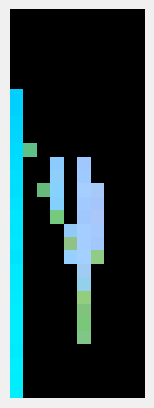

distance:


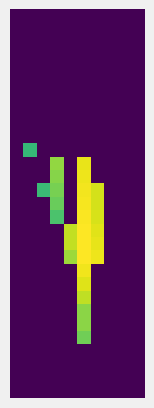

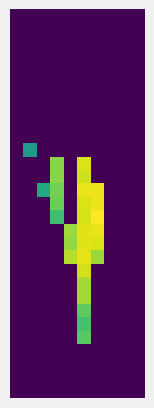

mass:


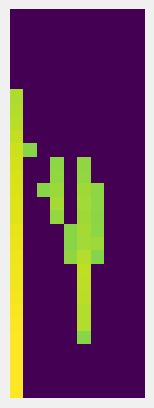

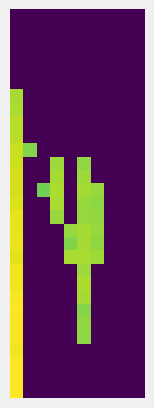

subhalo:


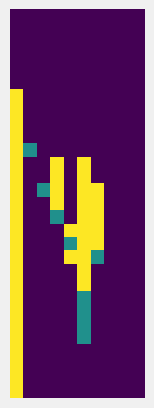

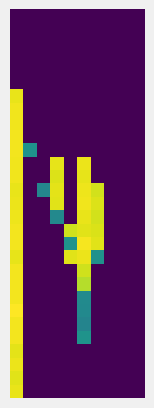

94/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.23it/s]


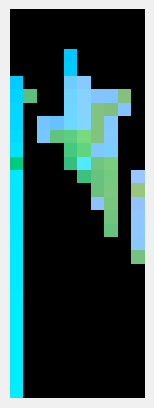

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


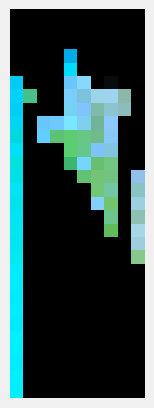

distance:


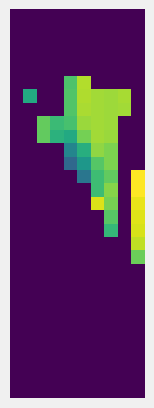

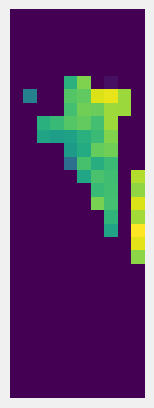

mass:


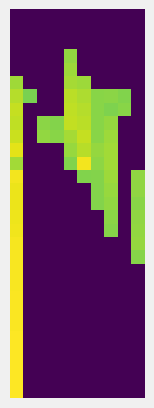

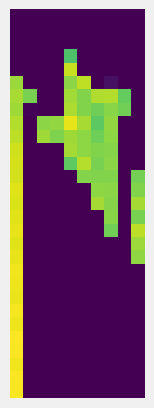

subhalo:


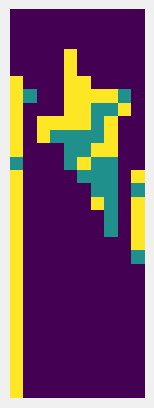

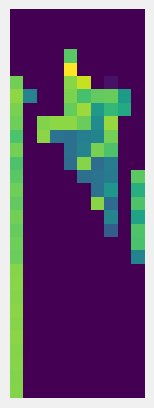

95/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.53it/s]


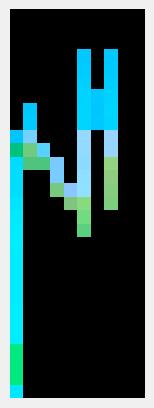

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


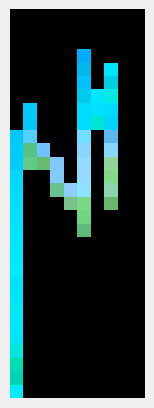

distance:


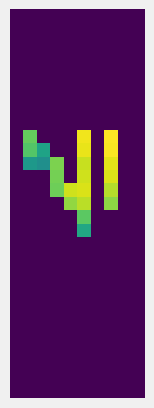

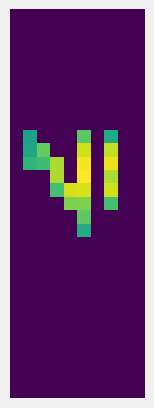

mass:


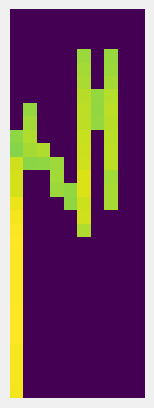

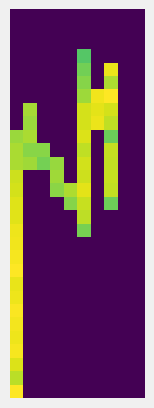

subhalo:


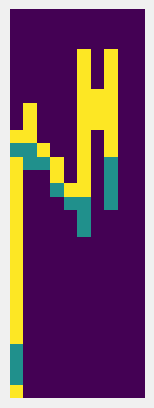

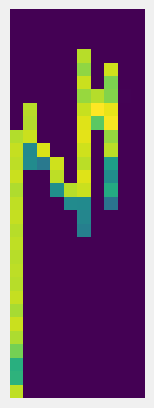

96/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.07it/s]


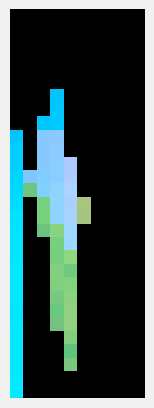

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


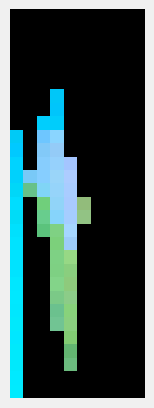

distance:


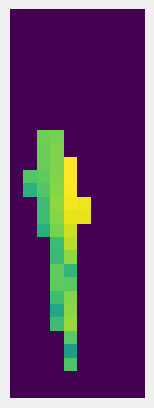

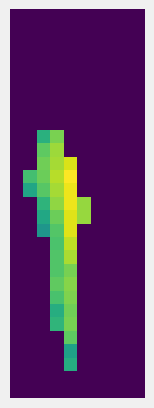

mass:


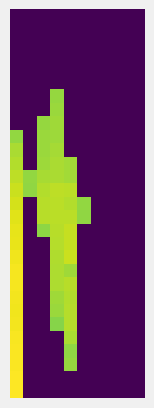

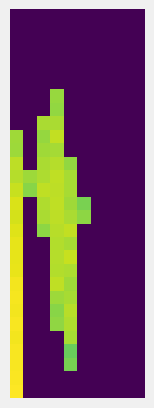

subhalo:


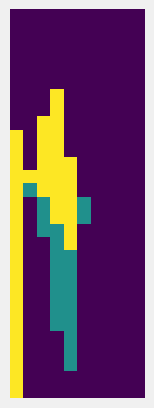

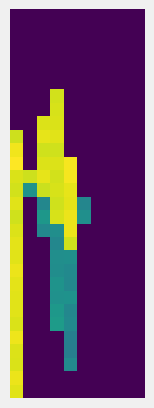

97/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.74it/s]


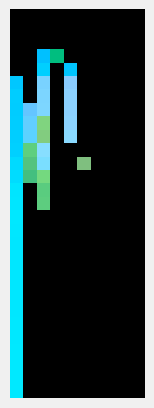

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


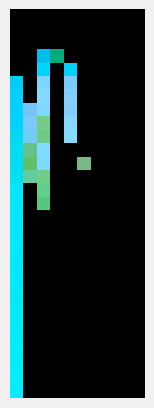

distance:


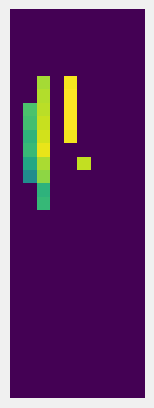

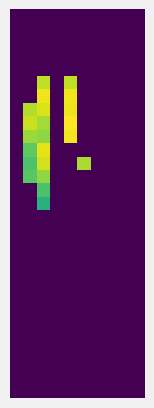

mass:


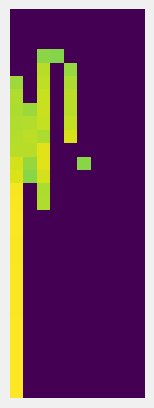

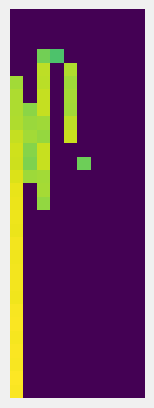

subhalo:


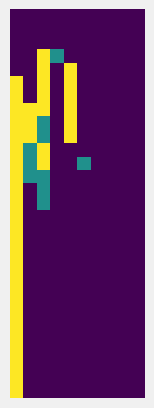

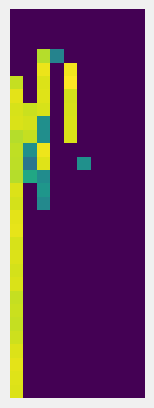

98/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 44.80it/s]


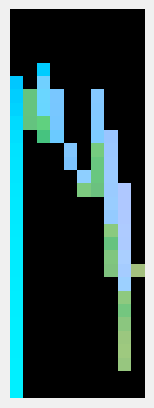

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


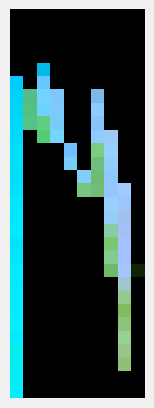

distance:


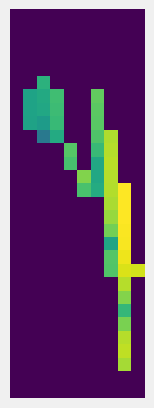

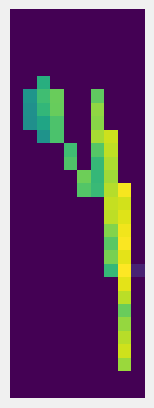

mass:


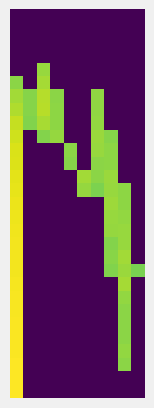

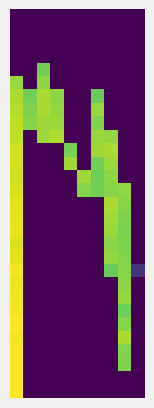

subhalo:


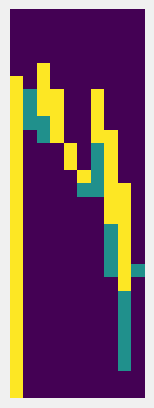

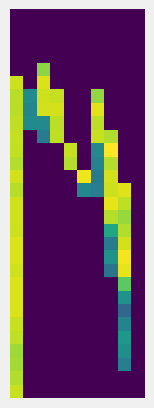

99/100


100%|█████████████████████████████████████████| 300/300 [00:06<00:00, 43.91it/s]


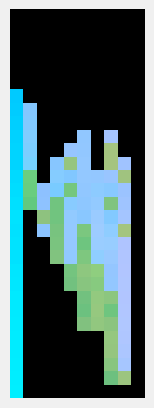

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


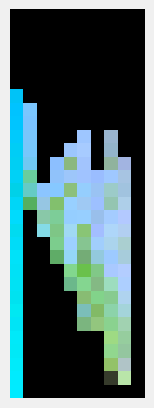

distance:


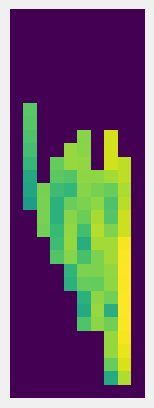

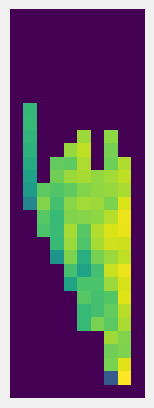

mass:


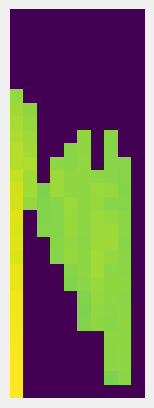

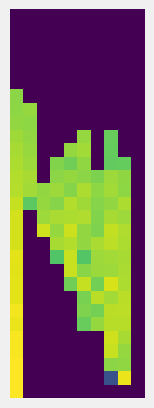

subhalo:


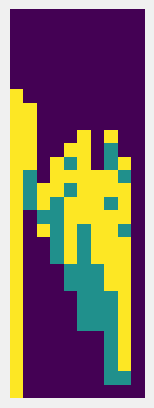

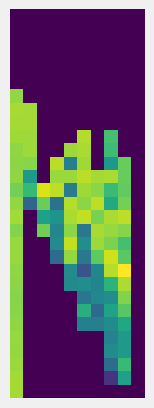

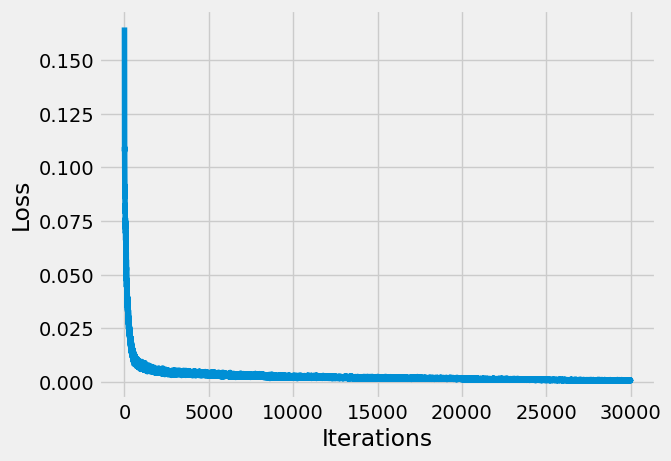

In [10]:
log_norm_dist_dataset = torch.load('data/dataset_distlognorm_massnorm.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = log_norm_dist_dataset.shape[2]
nbr = log_norm_dist_dataset.shape[3]
nvar = log_norm_dist_dataset.shape[1]
printer = False

batch_size = 128
latent_size = 128

loader = DataLoader(log_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 100
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = custom_reconstruction_loss(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("mass:")
    img = image_small[0, 1].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 1].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("subhalo:")
    img = image_small[0, 2].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 2].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [11]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nOverall:")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
zero_count = (reconstructed == 0).sum().item()
total_elements = reconstructed.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {images.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
zero_count = (images == 0).sum().item()
total_elements = images.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(images, reconstructed)


print("\n")
print("\n")
print("\nDistance")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.58 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.87% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.29 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.85% of the sam

# clip

0/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.85it/s]


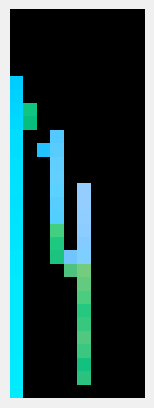

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


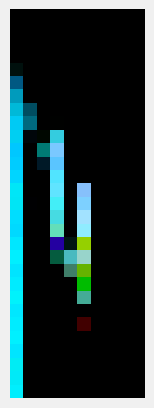

distance:


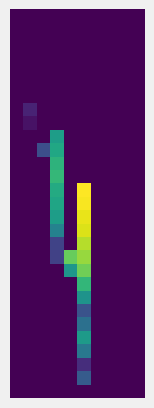

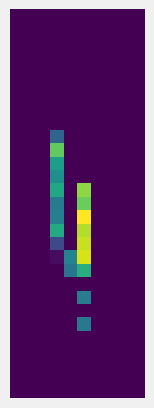

1/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.95it/s]


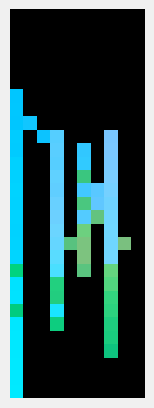

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


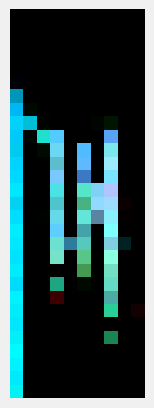

distance:


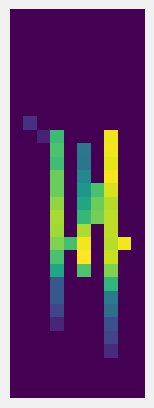

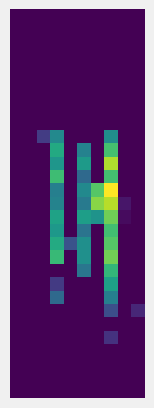

2/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.88it/s]


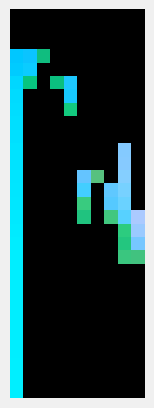

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


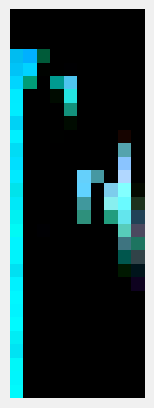

distance:


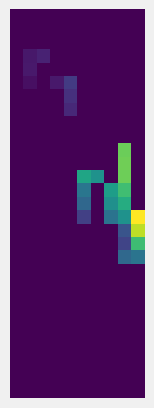

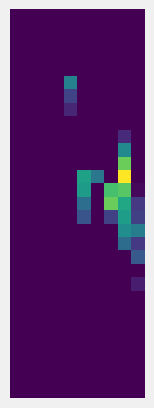

3/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.84it/s]


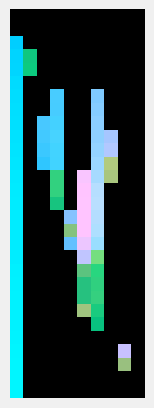

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


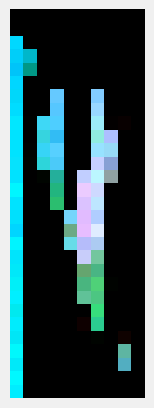

distance:


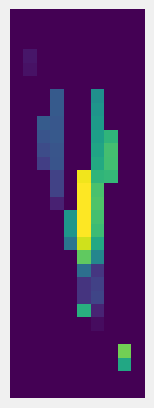

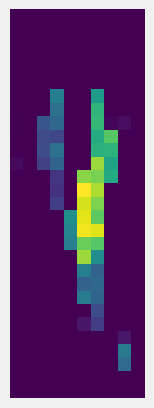

4/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 23.03it/s]


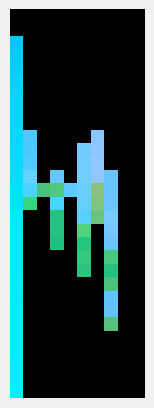

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


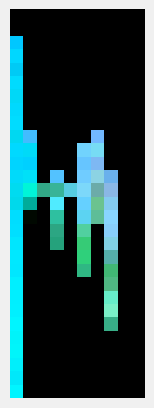

distance:


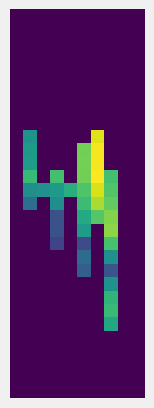

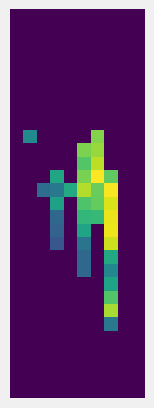

5/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.86it/s]


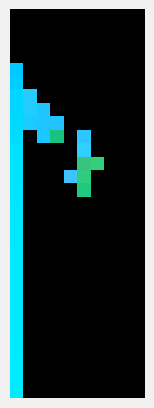

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


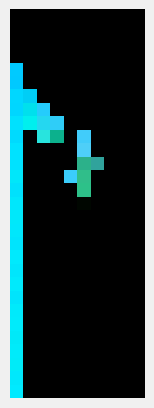

distance:


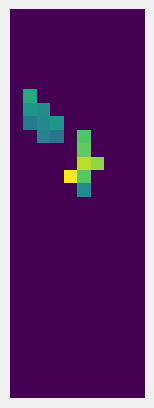

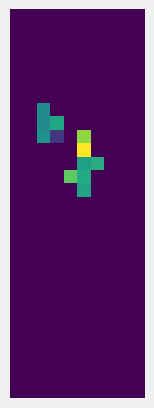

6/100


100%|█████████████████████████████████████████| 300/300 [00:13<00:00, 22.84it/s]


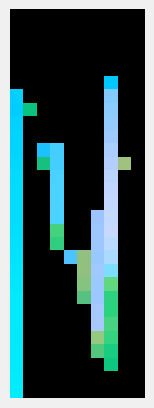

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


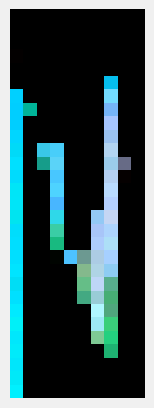

distance:


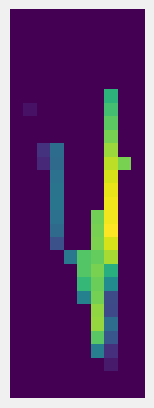

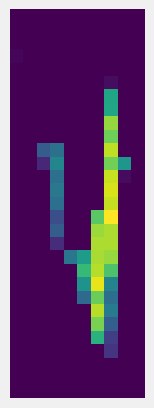

7/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.25it/s]


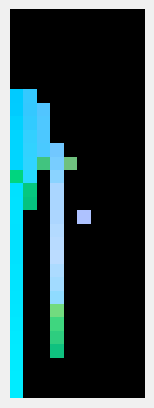

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


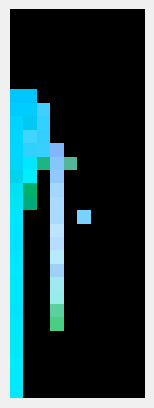

distance:


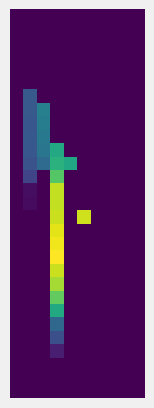

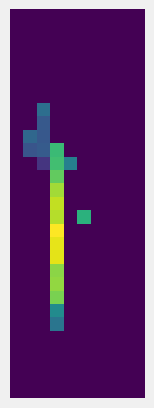

8/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.57it/s]


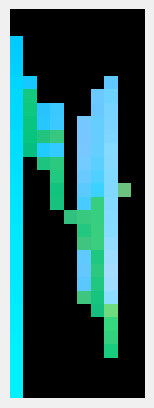

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


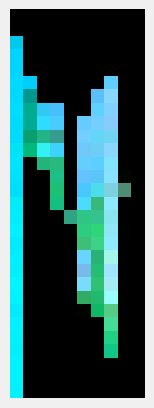

distance:


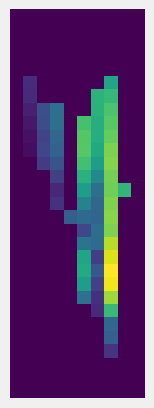

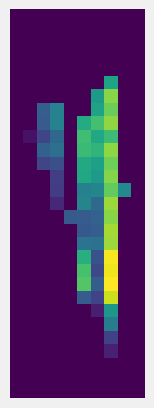

9/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.06it/s]


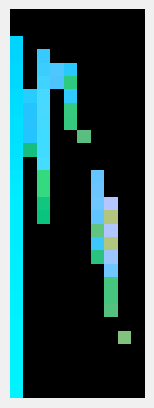

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


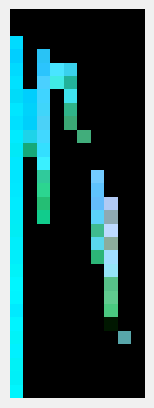

distance:


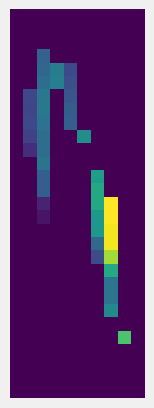

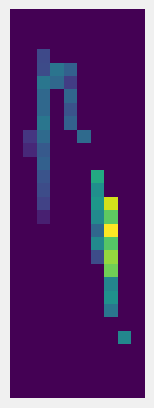

10/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.52it/s]


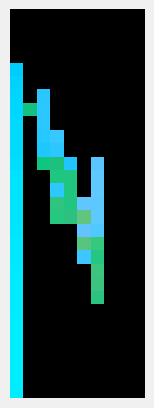

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


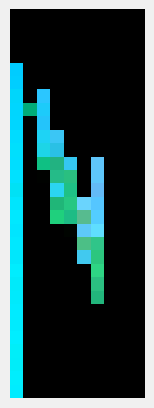

distance:


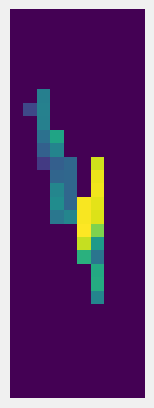

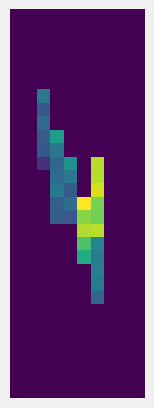

11/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.58it/s]


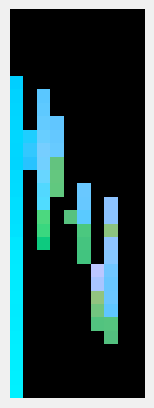

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


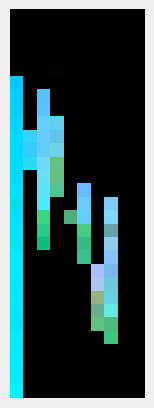

distance:


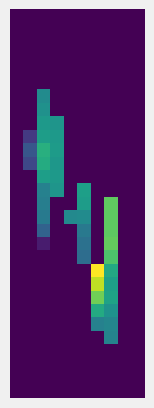

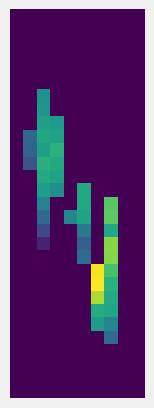

12/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.74it/s]


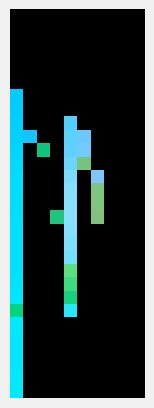

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


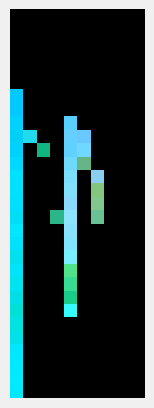

distance:


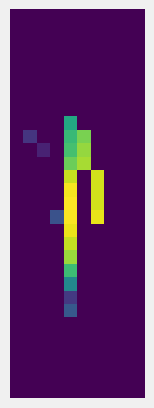

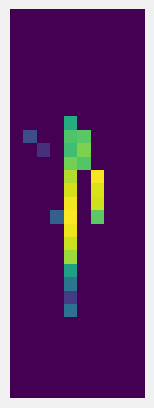

13/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.50it/s]


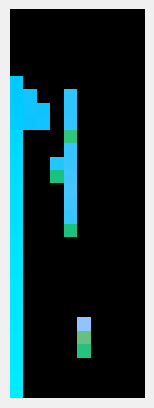

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


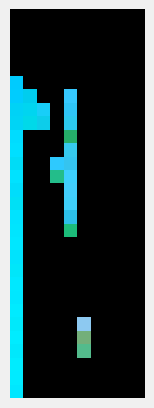

distance:


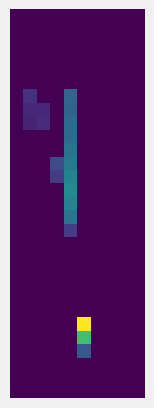

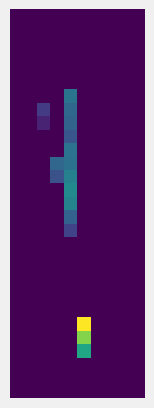

14/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.30it/s]


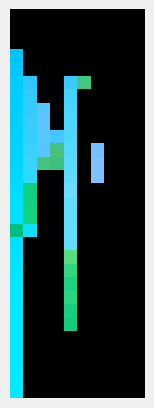

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


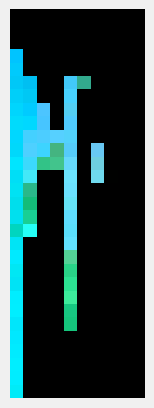

distance:


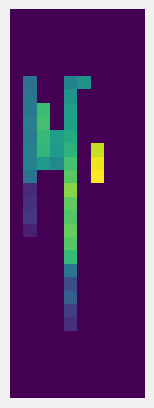

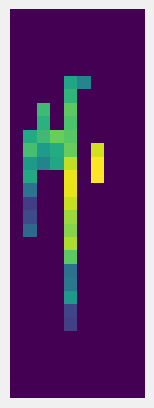

15/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.16it/s]


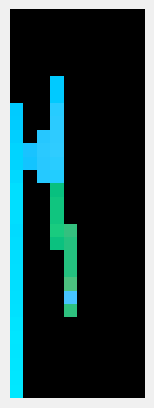

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


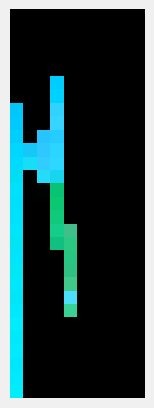

distance:


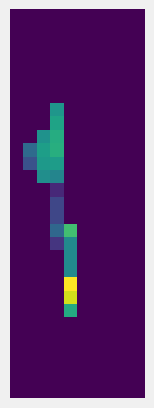

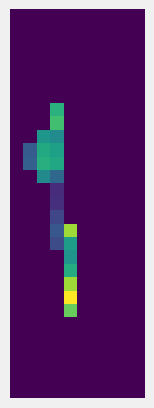

16/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


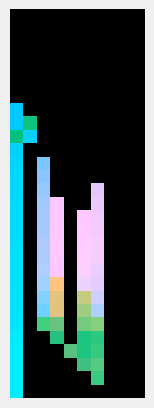

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


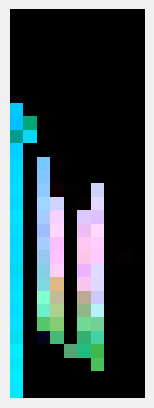

distance:


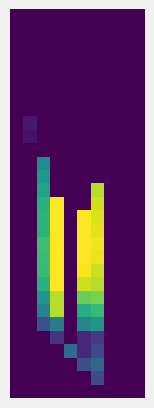

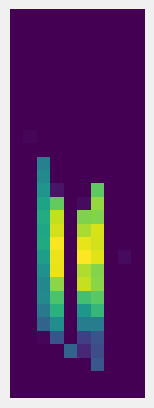

17/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.40it/s]


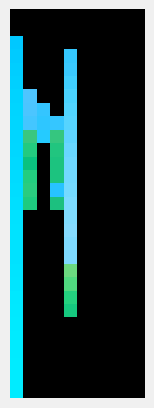

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


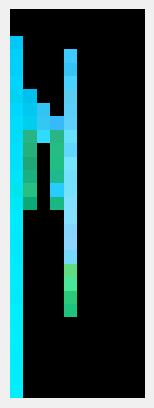

distance:


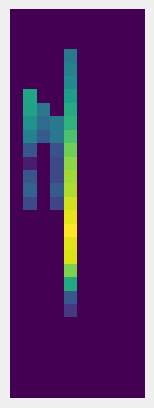

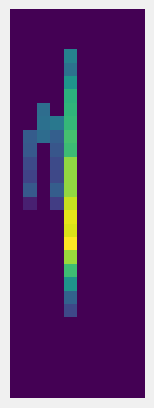

18/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.57it/s]


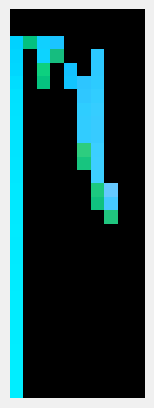

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


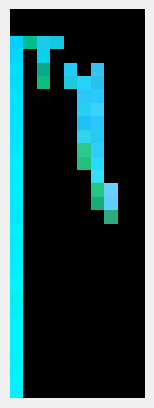

distance:


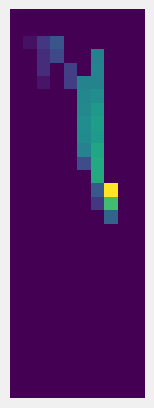

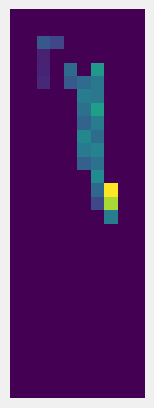

19/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.65it/s]


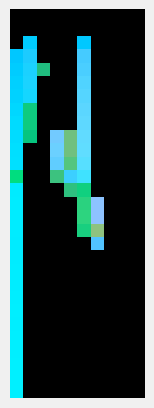

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


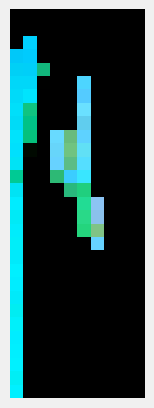

distance:


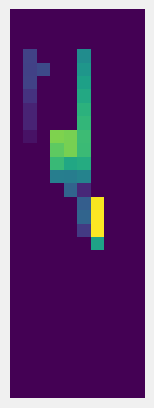

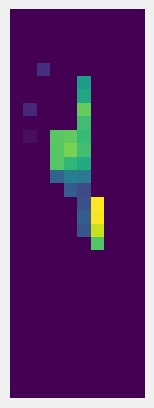

20/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.47it/s]


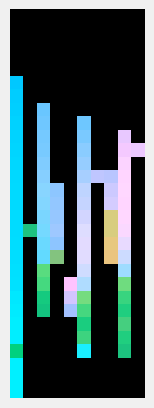

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


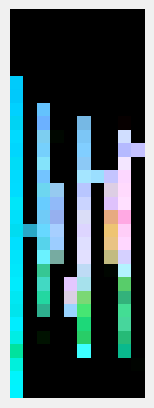

distance:


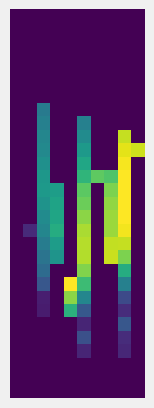

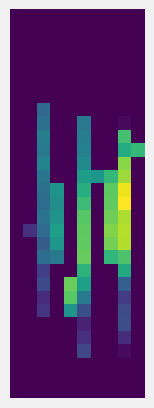

21/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.16it/s]


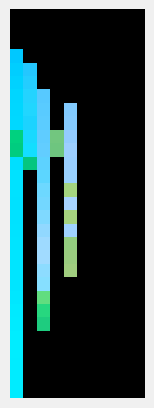

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


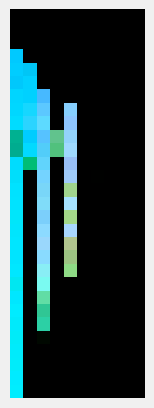

distance:


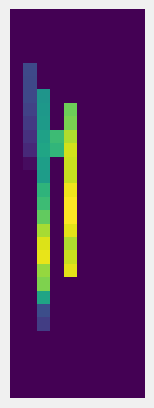

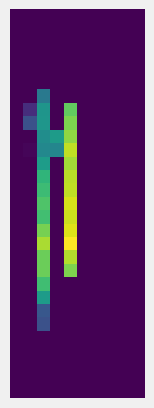

22/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.49it/s]


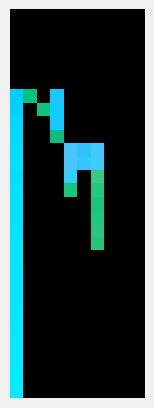

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


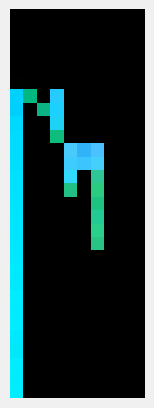

distance:


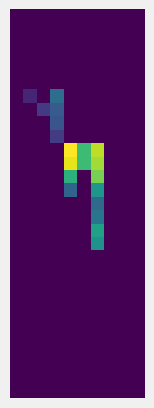

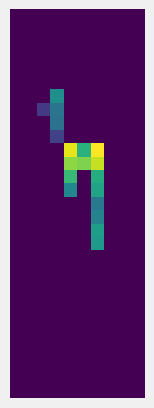

23/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.63it/s]


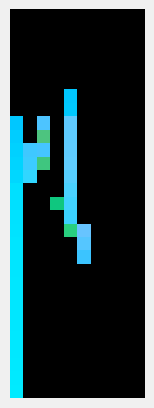

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


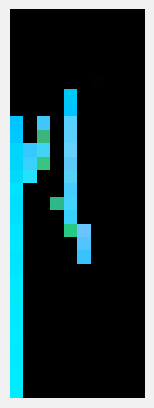

distance:


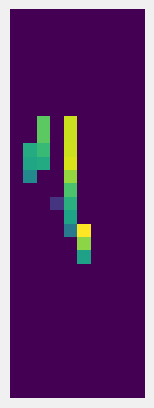

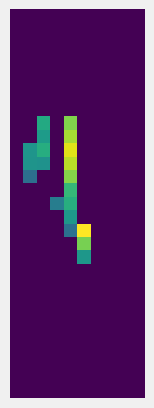

24/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.18it/s]


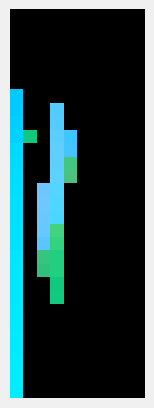

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


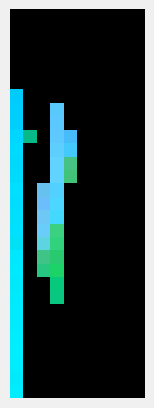

distance:


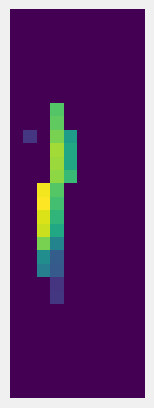

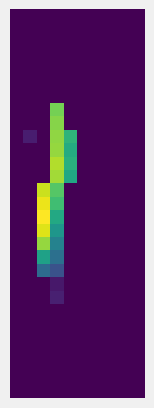

25/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.12it/s]


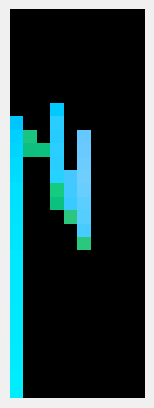

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


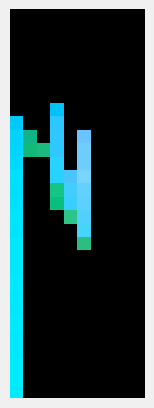

distance:


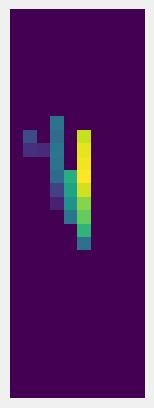

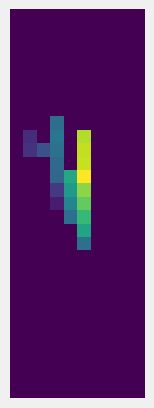

26/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.31it/s]


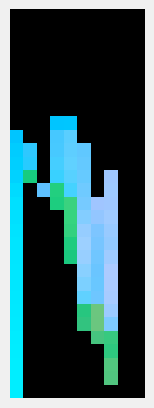

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


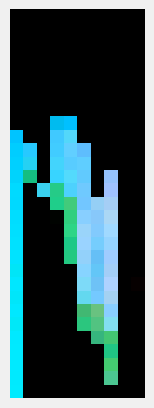

distance:


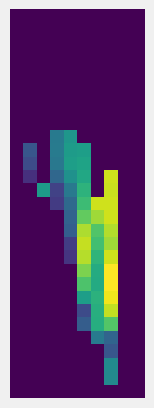

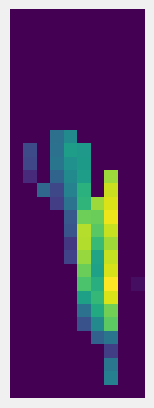

27/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.08it/s]


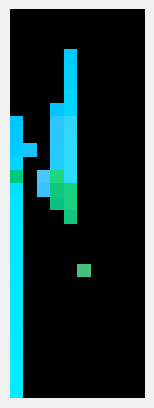

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


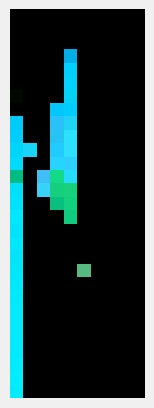

distance:


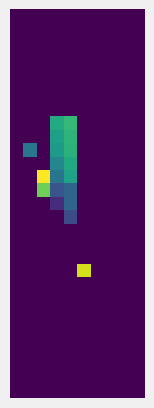

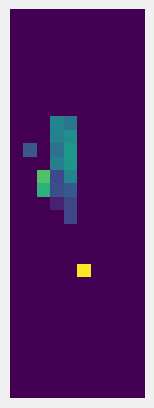

28/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


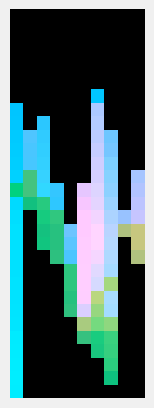

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


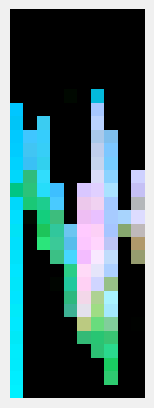

distance:


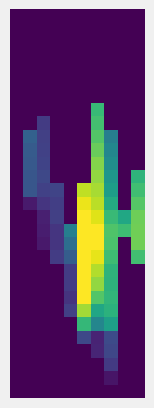

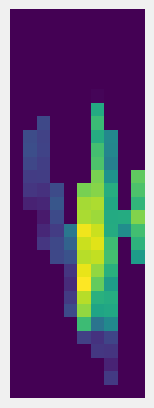

29/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.39it/s]


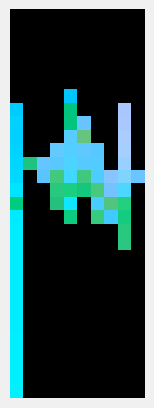

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


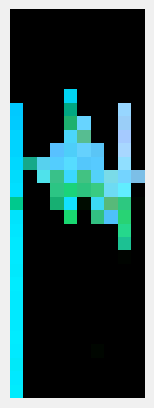

distance:


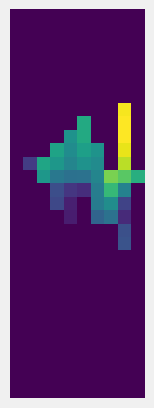

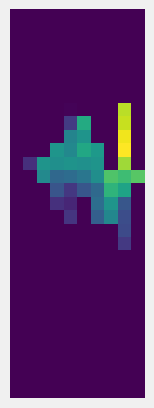

30/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.95it/s]


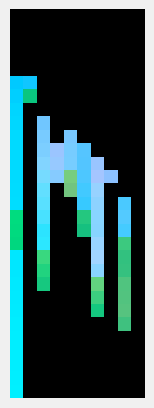

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


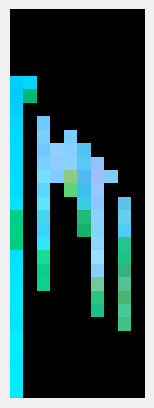

distance:


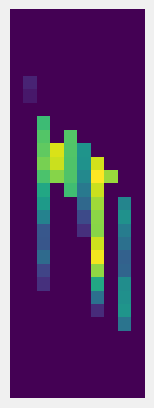

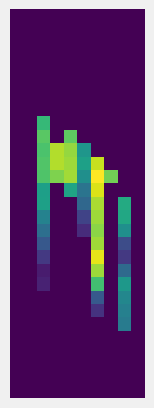

31/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.82it/s]


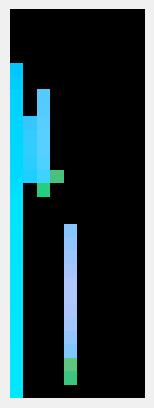

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


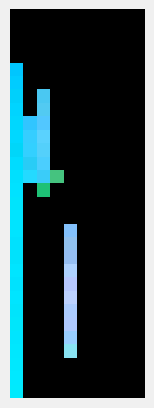

distance:


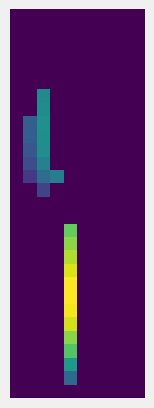

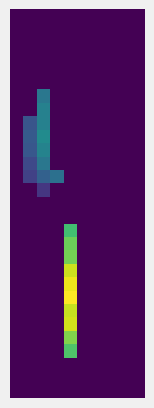

32/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.23it/s]


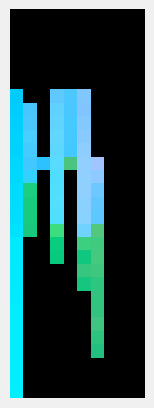

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


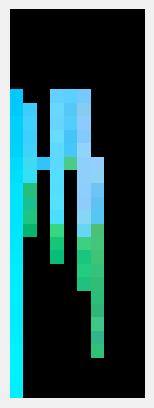

distance:


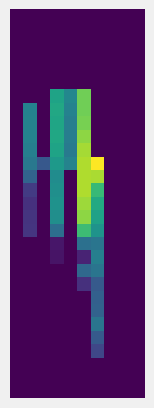

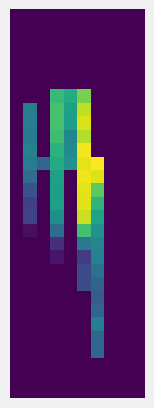

33/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


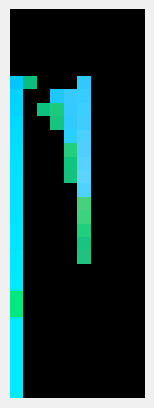

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


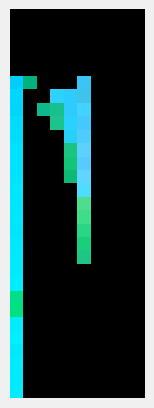

distance:


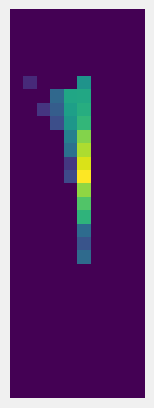

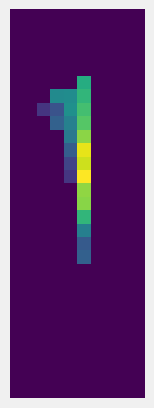

34/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.24it/s]


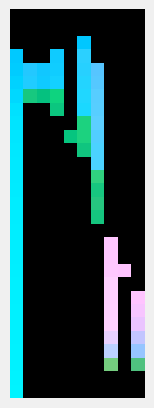

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


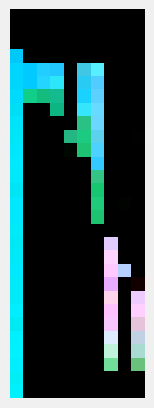

distance:


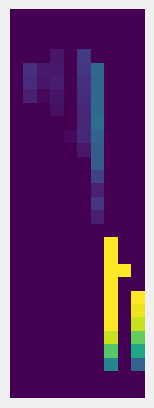

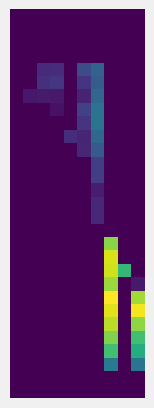

35/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.97it/s]


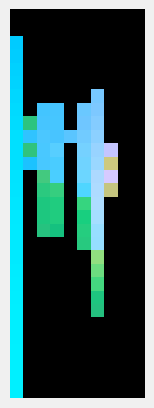

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


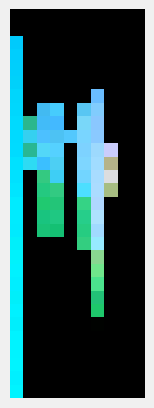

distance:


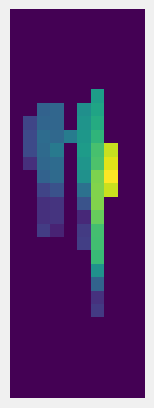

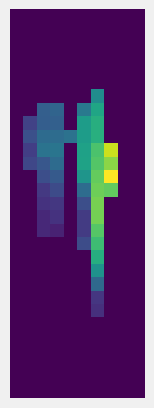

36/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.14it/s]


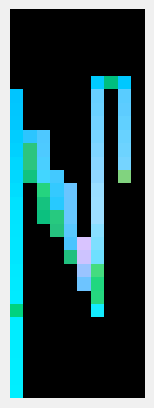

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


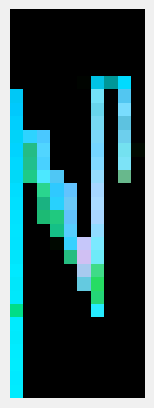

distance:


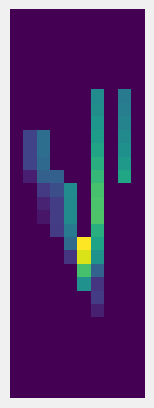

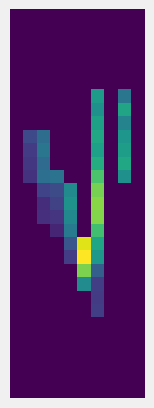

37/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.08it/s]


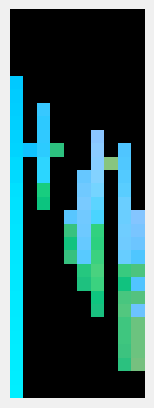

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


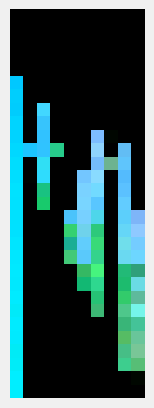

distance:


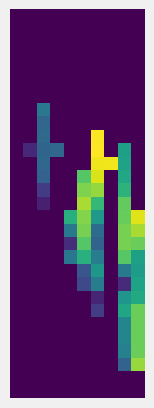

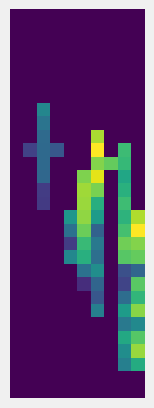

38/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.76it/s]


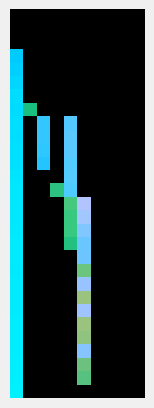

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


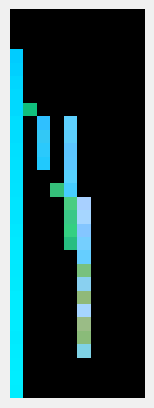

distance:


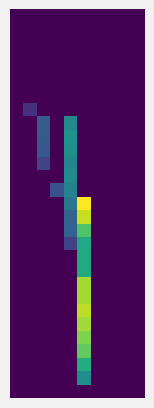

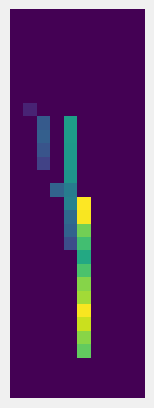

39/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.66it/s]


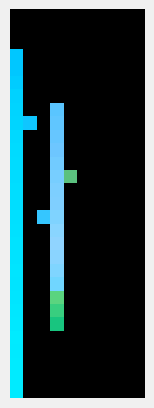

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


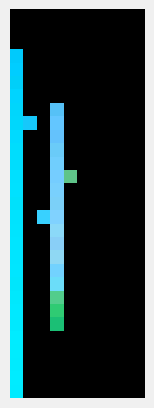

distance:


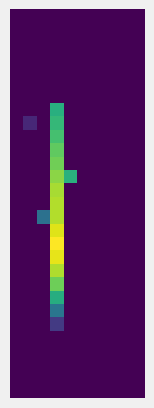

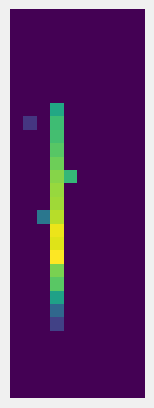

40/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.82it/s]


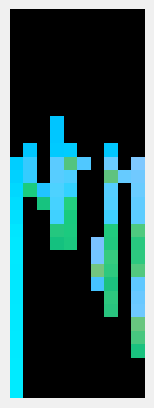

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


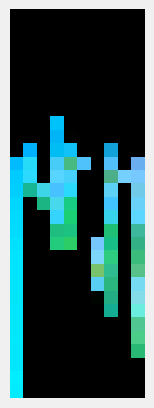

distance:


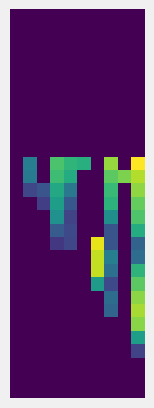

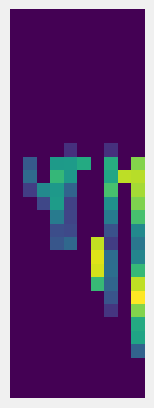

41/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.56it/s]


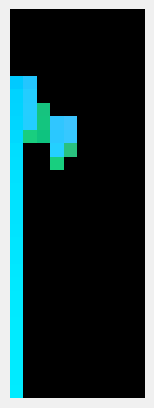

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


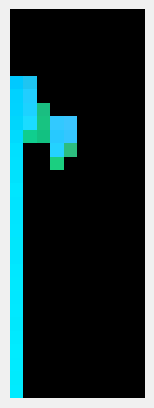

distance:


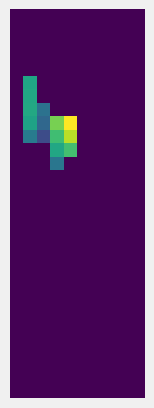

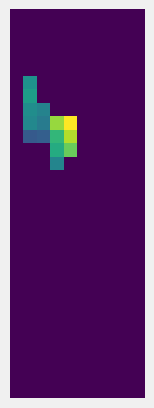

42/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.14it/s]


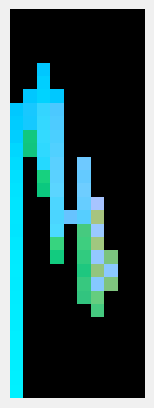

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


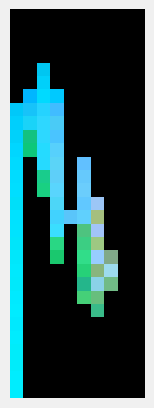

distance:


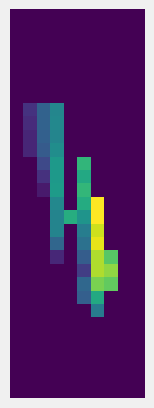

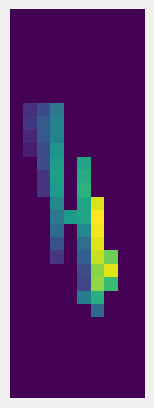

43/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.19it/s]


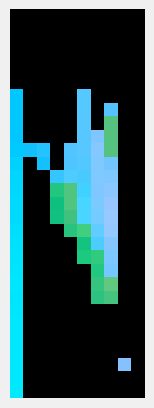

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


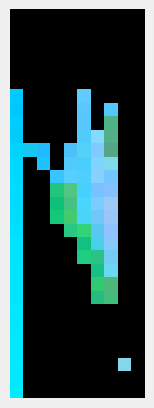

distance:


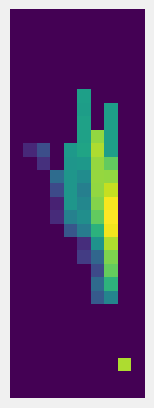

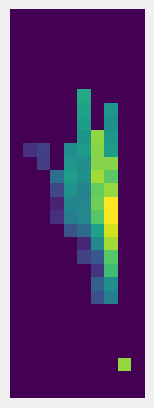

44/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.86it/s]


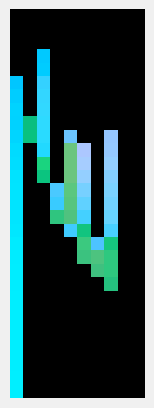

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


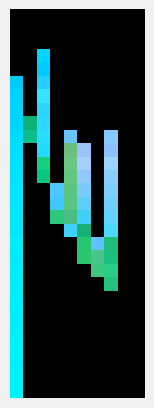

distance:


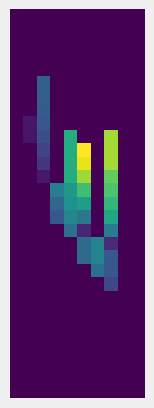

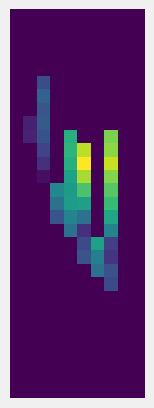

45/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.88it/s]


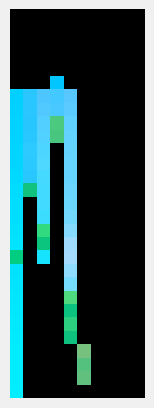

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


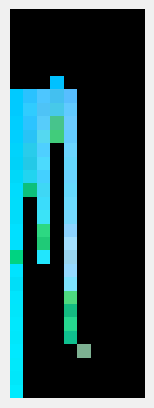

distance:


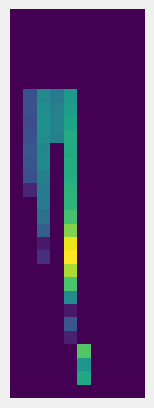

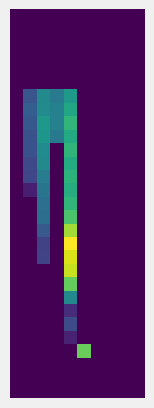

46/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.30it/s]


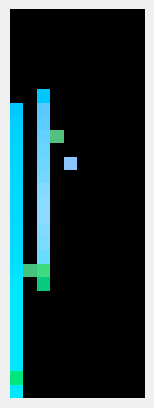

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


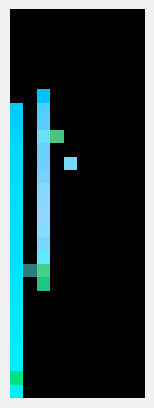

distance:


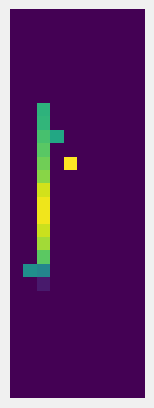

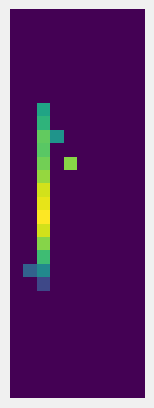

47/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.98it/s]


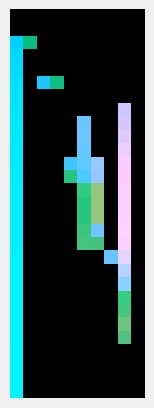

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


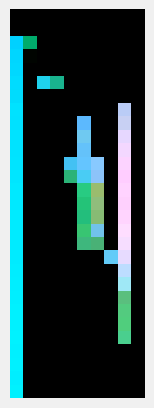

distance:


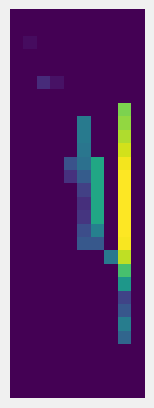

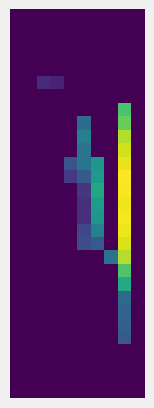

48/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.45it/s]


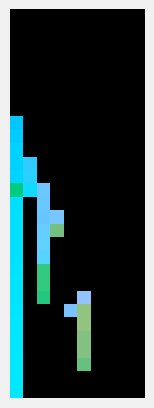

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


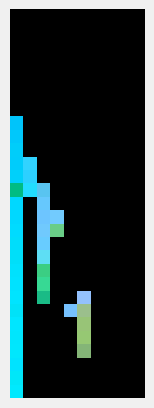

distance:


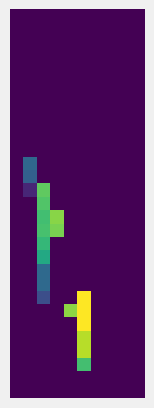

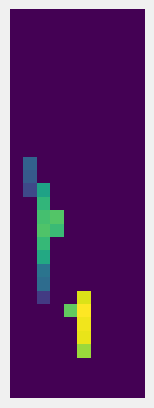

49/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.94it/s]


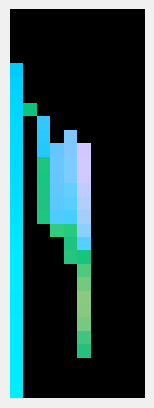

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


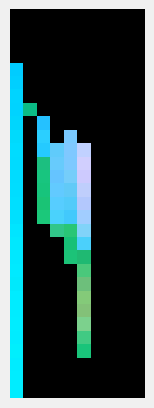

distance:


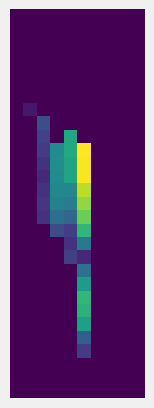

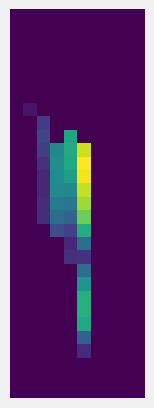

50/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.37it/s]


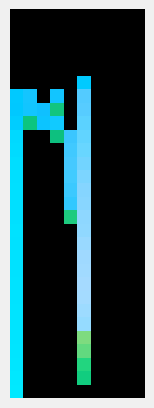

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


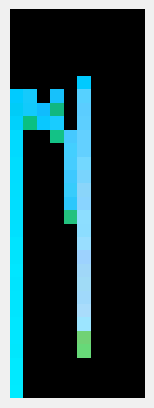

distance:


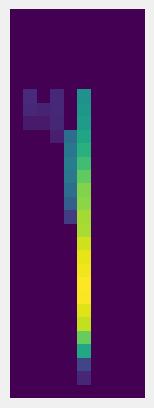

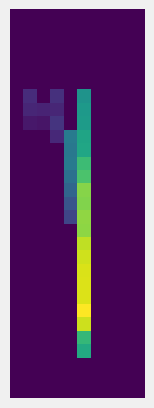

51/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.53it/s]


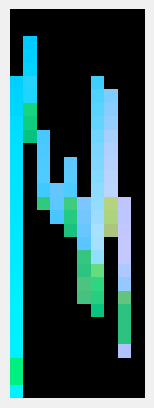

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


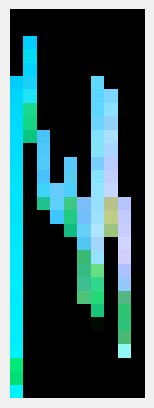

distance:


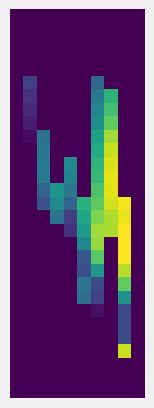

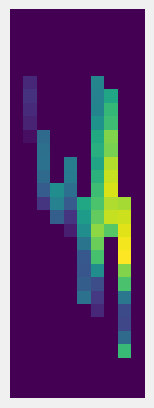

52/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


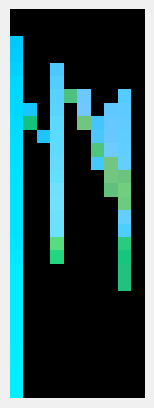

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


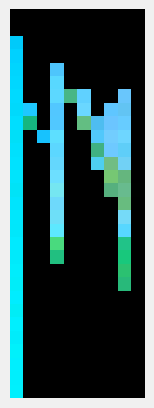

distance:


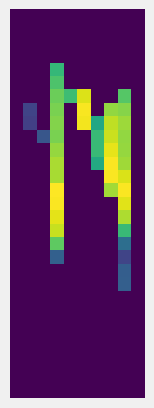

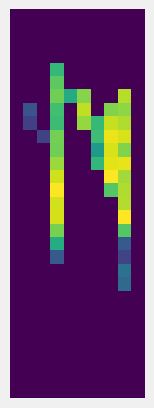

53/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


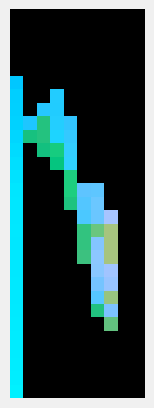

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


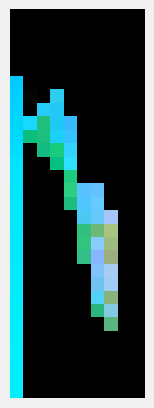

distance:


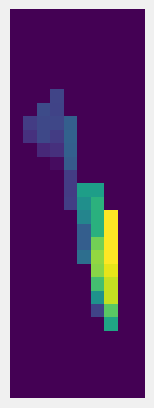

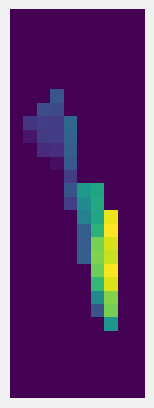

54/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.52it/s]


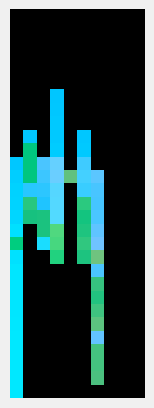

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


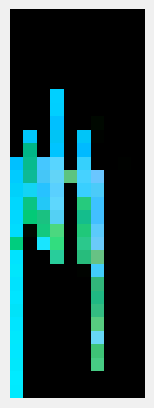

distance:


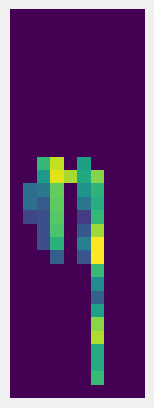

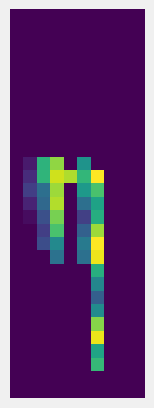

55/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.58it/s]


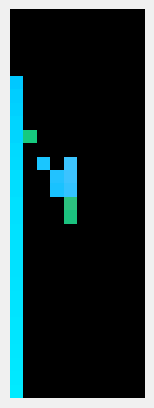

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


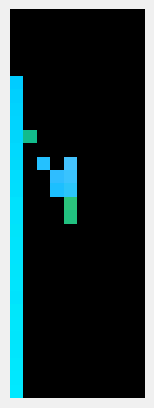

distance:


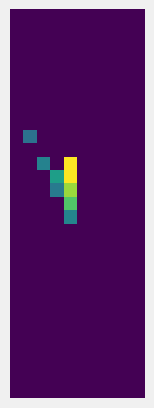

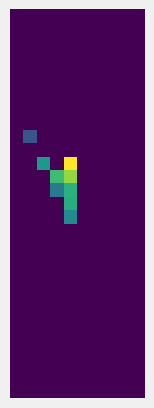

56/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.03it/s]


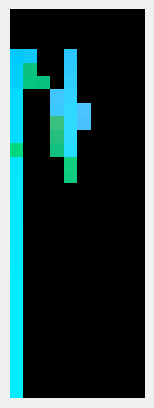

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


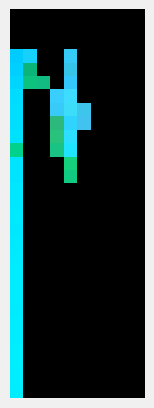

distance:


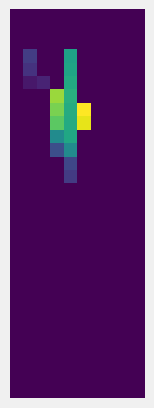

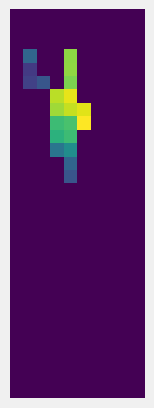

57/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.94it/s]


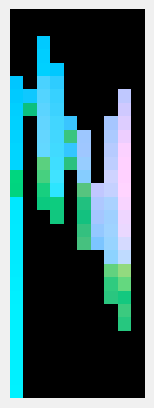

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


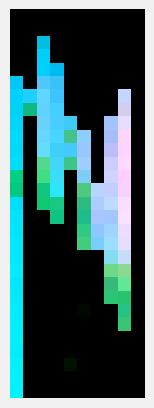

distance:


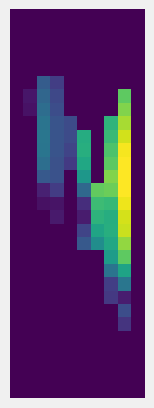

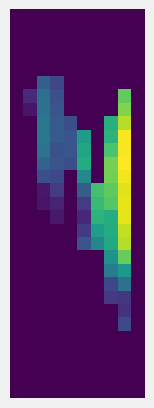

58/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.19it/s]


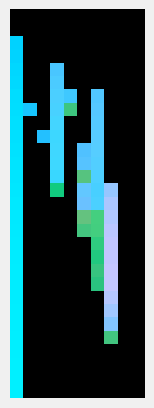

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


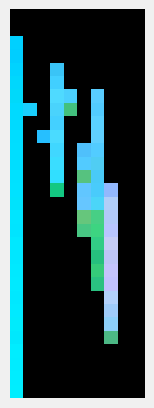

distance:


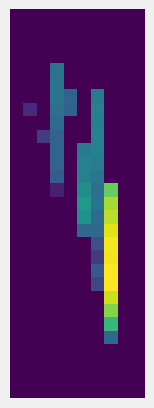

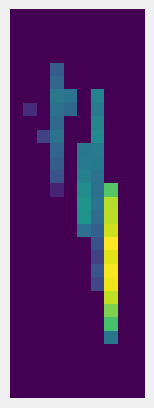

59/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.04it/s]


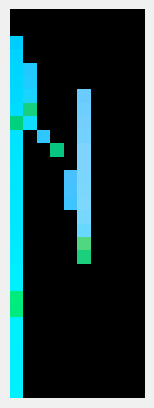

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


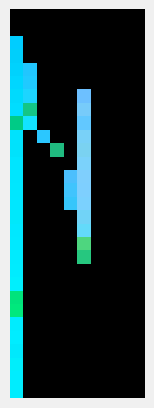

distance:


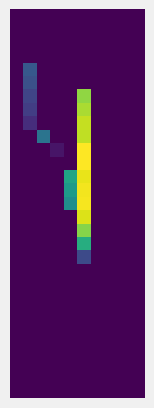

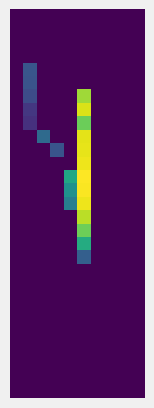

60/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.85it/s]


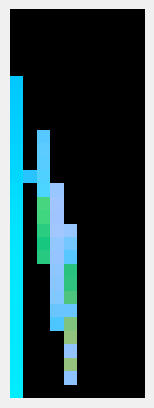

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


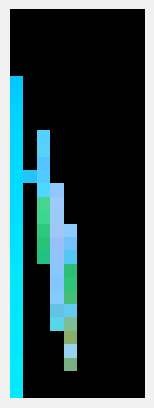

distance:


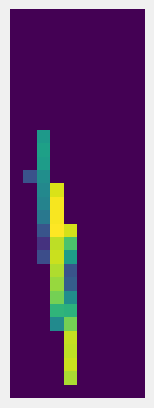

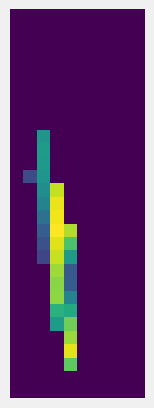

61/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.84it/s]


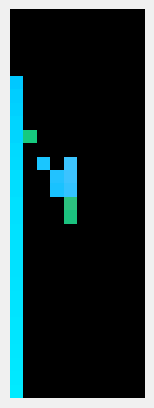

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


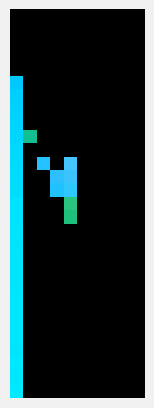

distance:


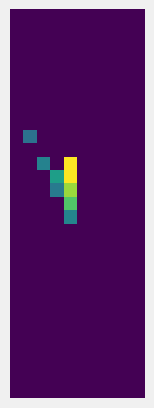

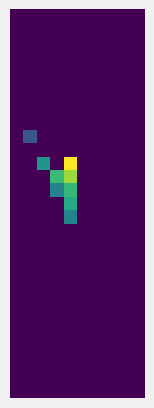

62/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.73it/s]


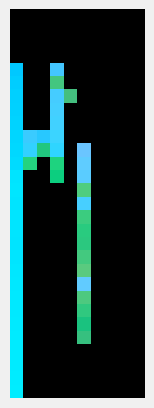

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


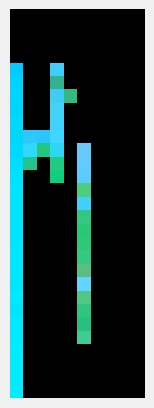

distance:


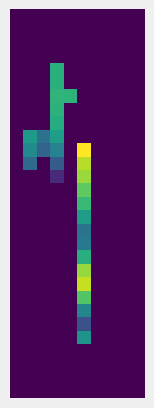

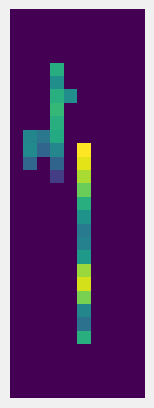

63/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.81it/s]


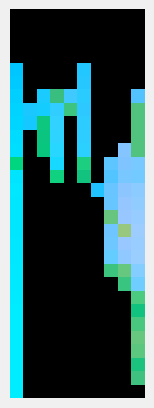

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


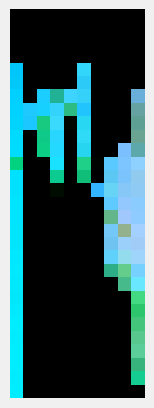

distance:


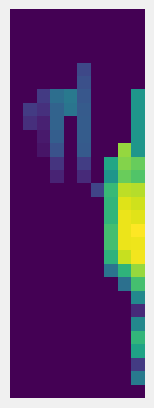

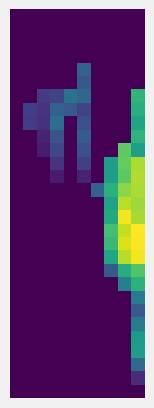

64/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.79it/s]


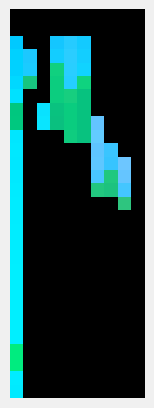

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


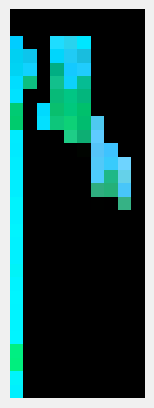

distance:


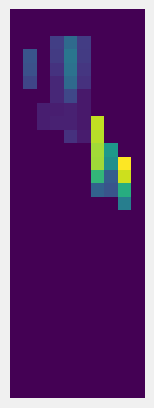

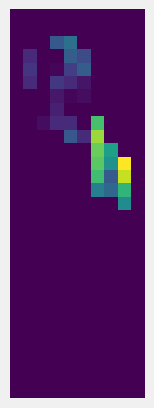

65/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.91it/s]


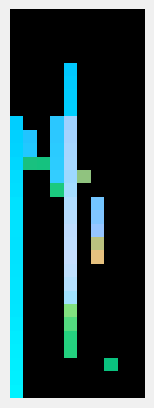

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


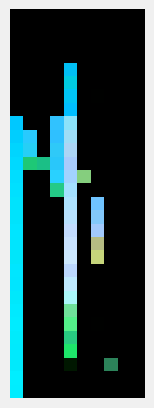

distance:


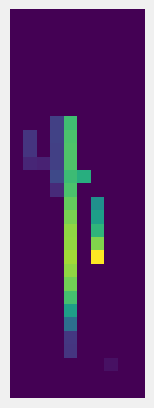

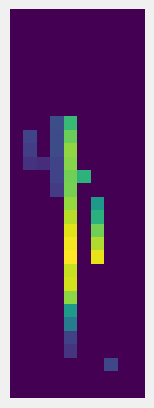

66/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


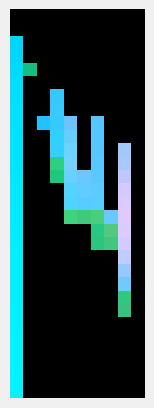

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


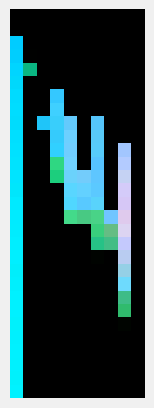

distance:


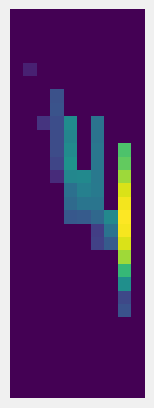

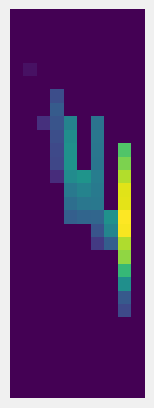

67/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


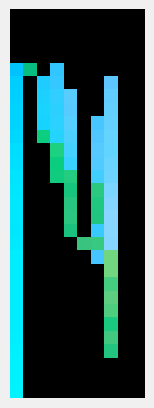

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


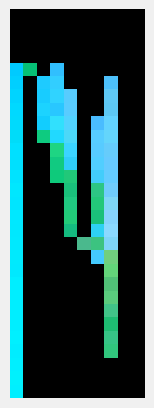

distance:


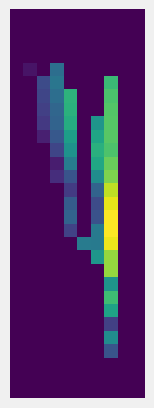

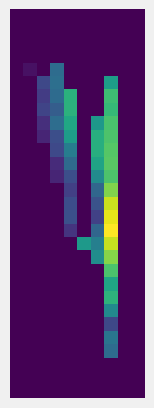

68/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.88it/s]


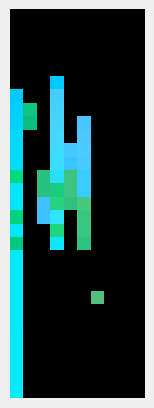

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


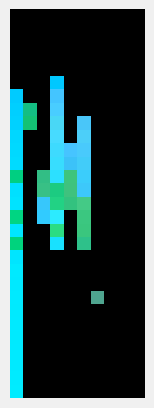

distance:


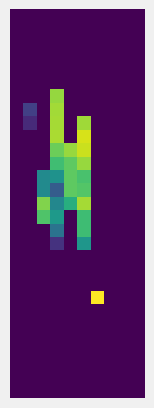

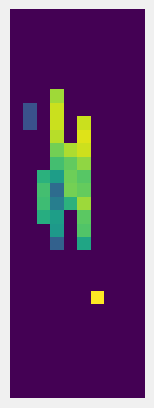

69/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.95it/s]


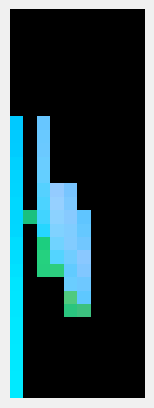

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


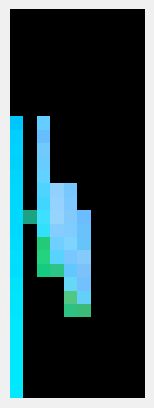

distance:


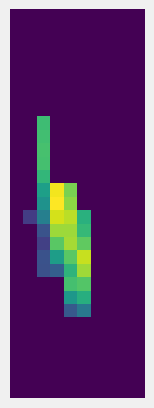

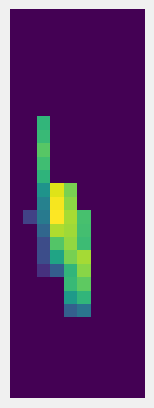

70/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.67it/s]


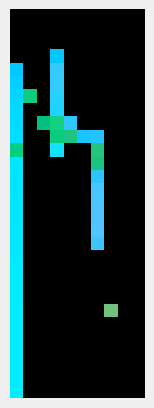

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


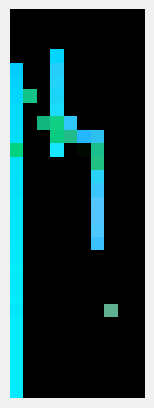

distance:


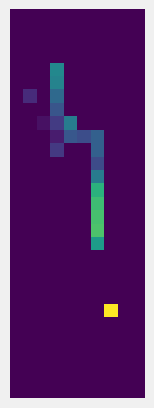

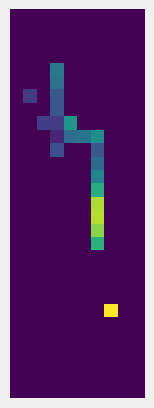

71/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.90it/s]


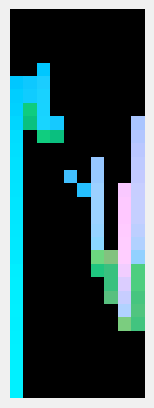

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


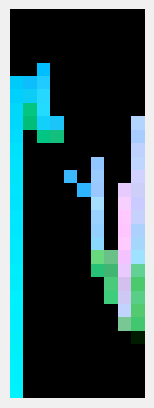

distance:


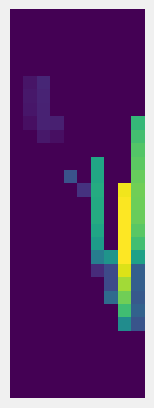

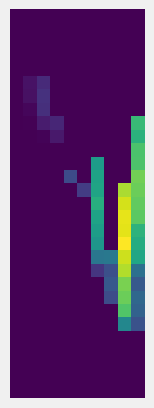

72/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.67it/s]


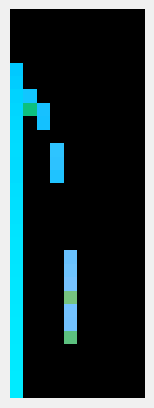

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


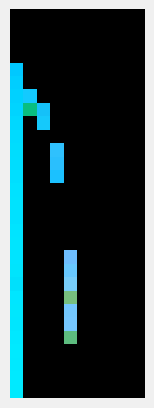

distance:


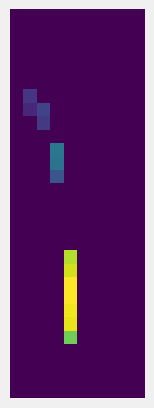

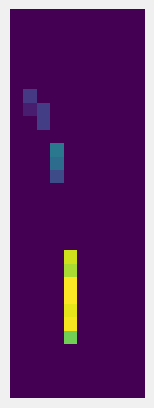

73/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.49it/s]


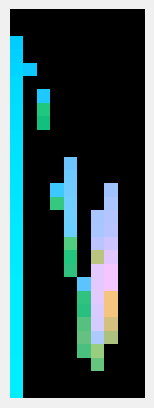

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


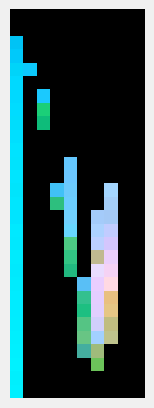

distance:


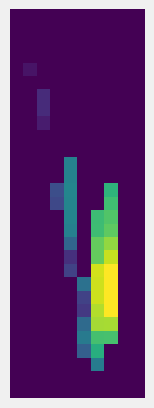

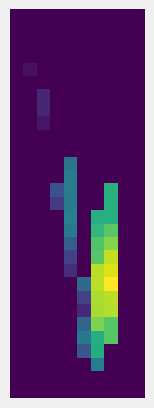

74/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.69it/s]


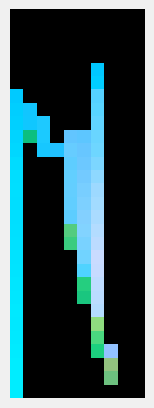

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


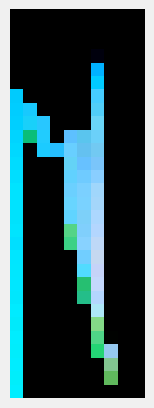

distance:


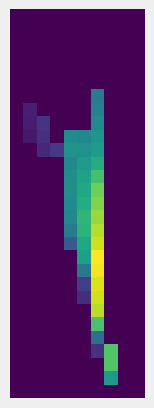

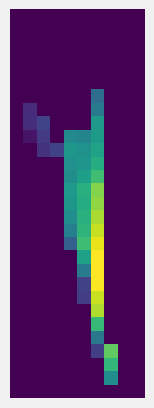

75/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.83it/s]


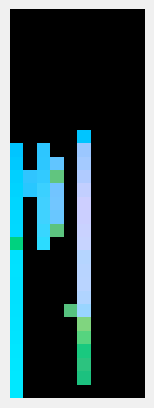

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


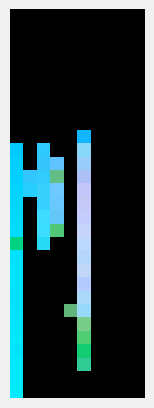

distance:


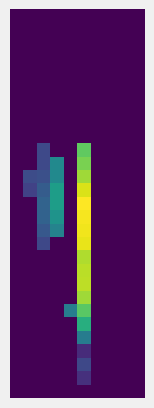

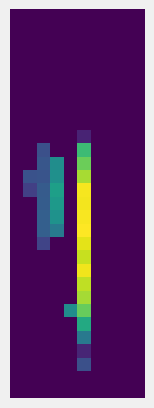

76/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.89it/s]


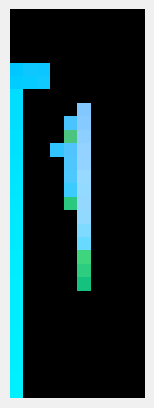

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


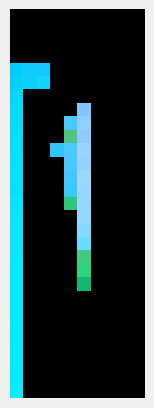

distance:


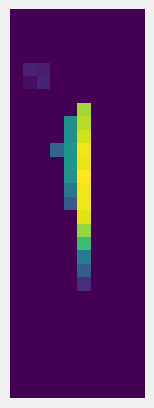

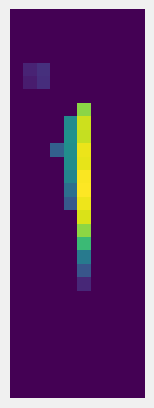

77/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.01it/s]


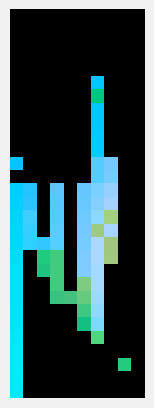

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


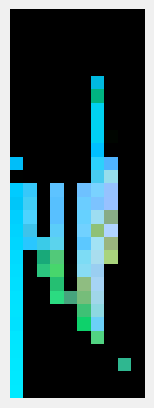

distance:


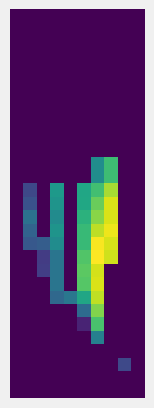

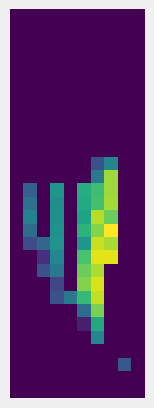

78/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.86it/s]


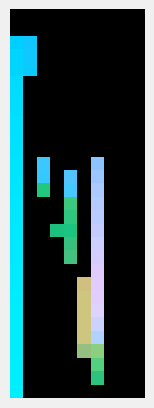

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


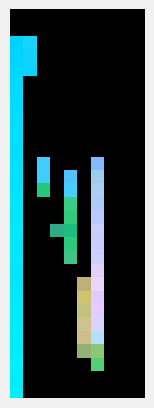

distance:


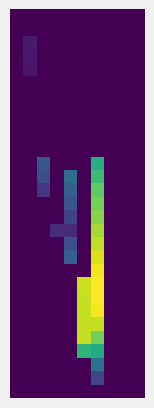

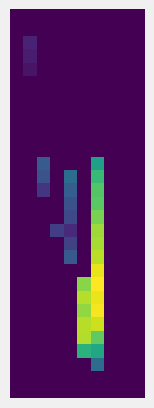

79/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.61it/s]


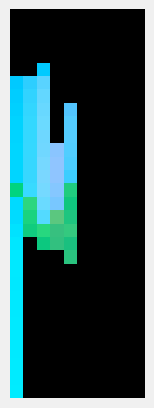

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


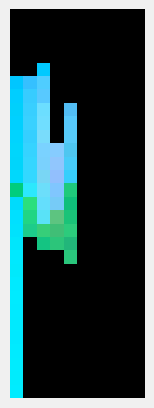

distance:


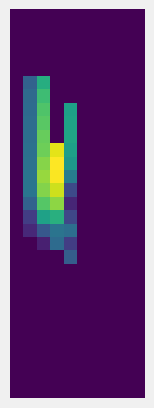

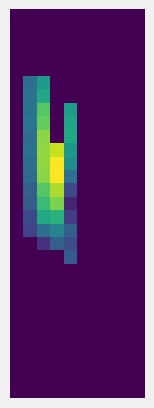

80/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.41it/s]


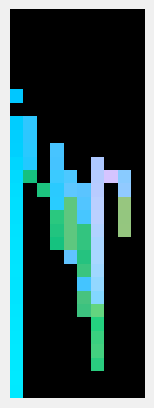

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


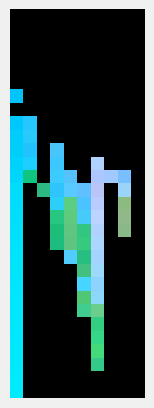

distance:


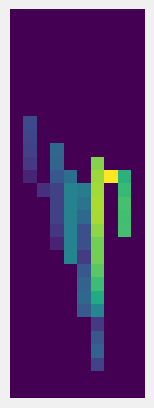

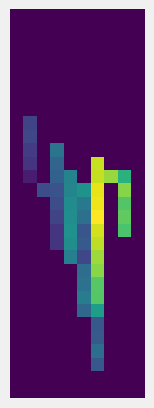

81/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.60it/s]


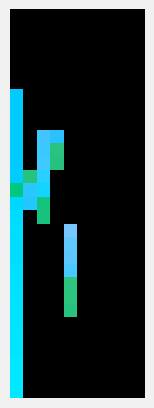

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


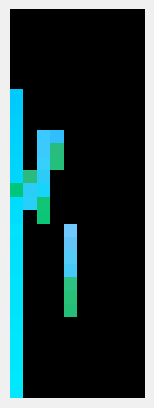

distance:


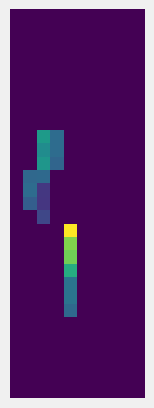

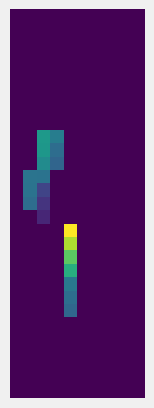

82/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.19it/s]


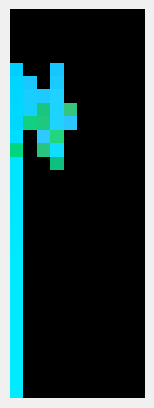

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


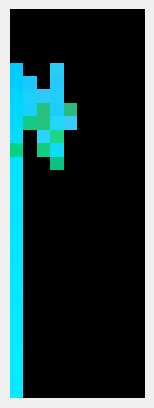

distance:


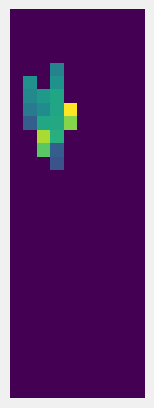

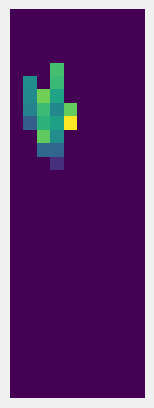

83/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.38it/s]


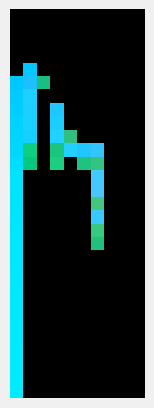

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


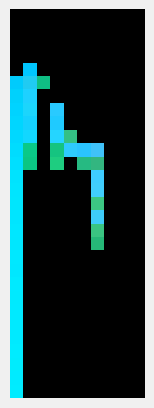

distance:


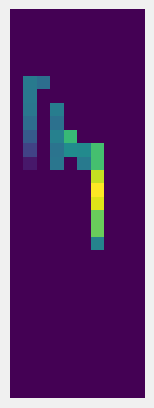

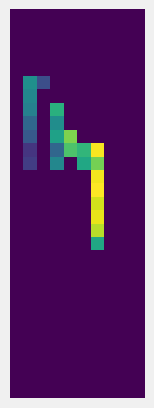

84/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.44it/s]


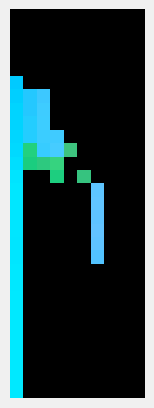

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


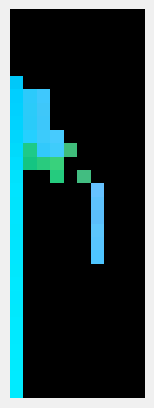

distance:


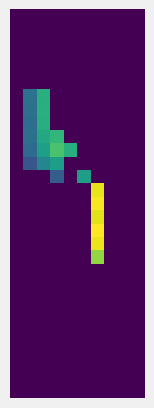

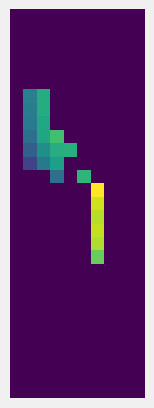

85/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.64it/s]


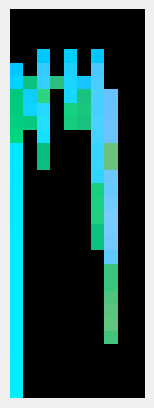

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


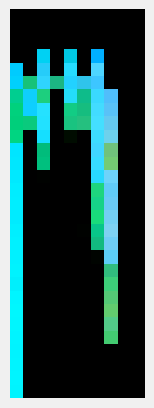

distance:


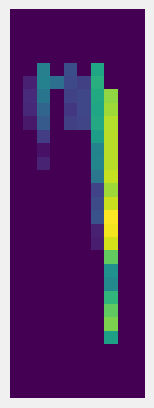

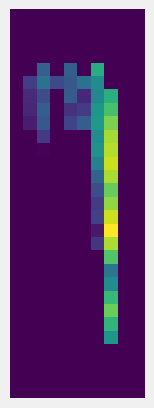

86/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.63it/s]


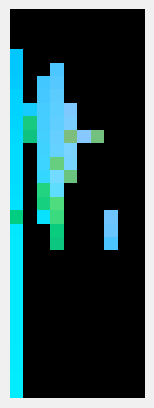

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


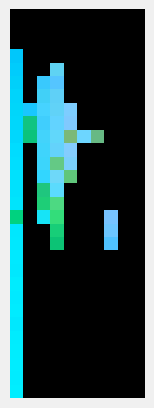

distance:


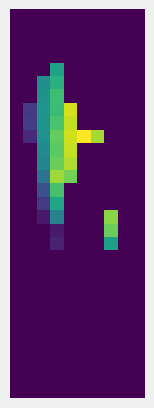

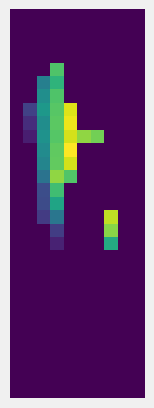

87/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.58it/s]


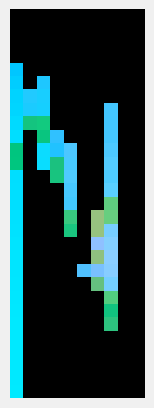

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


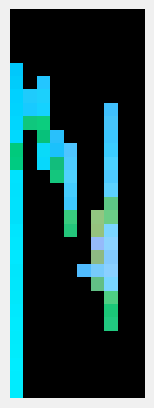

distance:


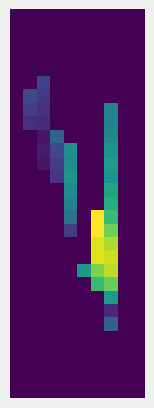

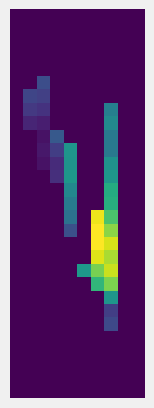

88/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.73it/s]


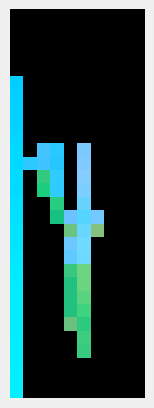

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


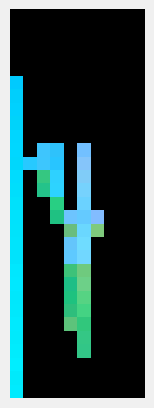

distance:


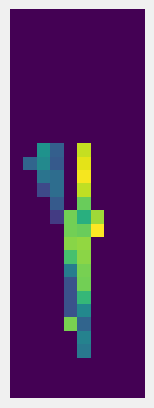

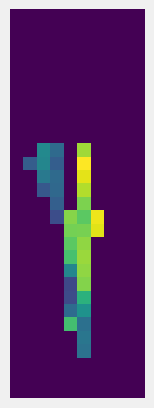

89/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.18it/s]


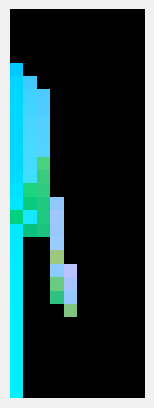

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


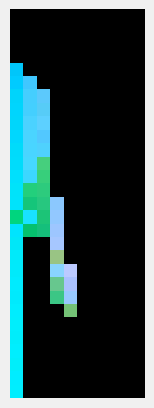

distance:


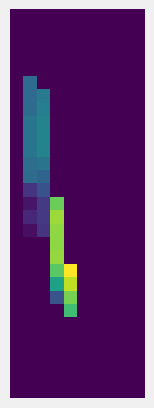

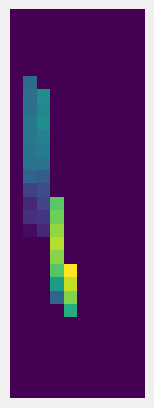

90/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.22it/s]


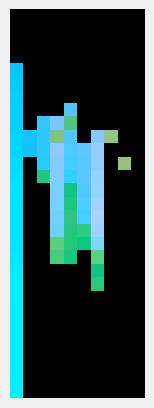

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


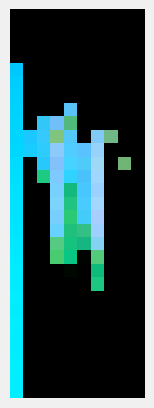

distance:


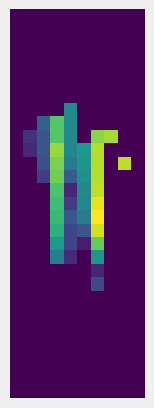

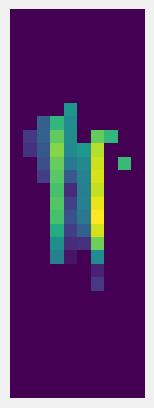

91/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.45it/s]


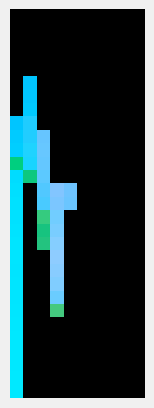

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


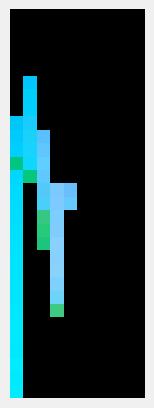

distance:


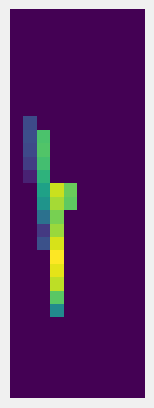

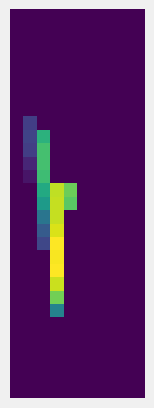

92/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.78it/s]


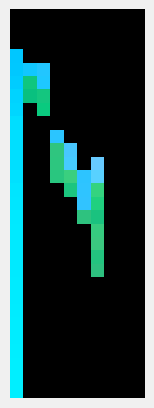

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


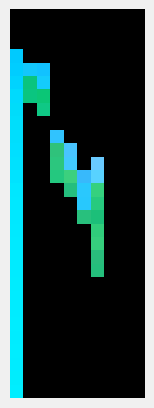

distance:


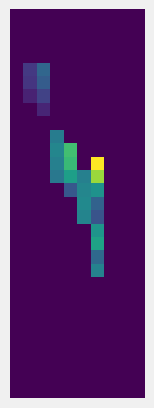

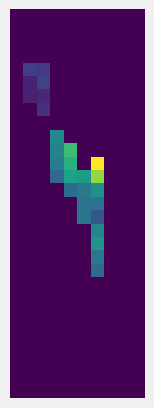

93/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.88it/s]


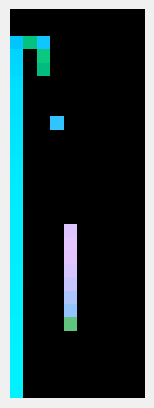

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


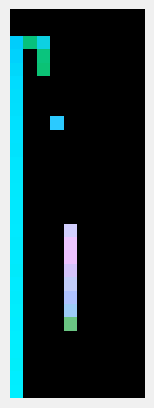

distance:


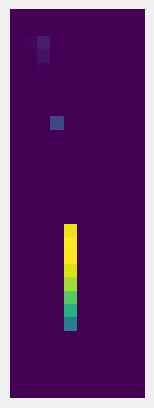

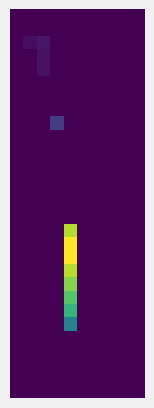

94/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.99it/s]


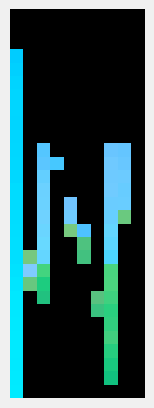

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


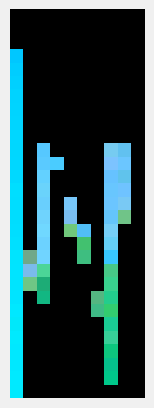

distance:


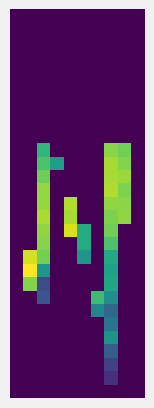

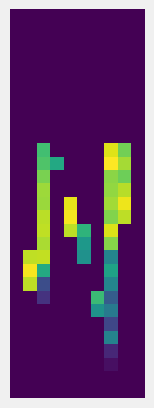

95/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.48it/s]


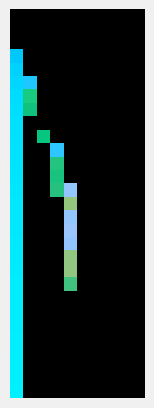

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


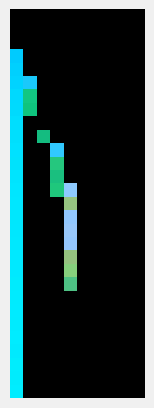

distance:


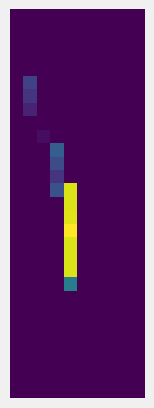

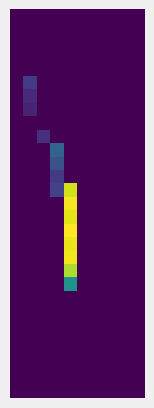

96/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.91it/s]


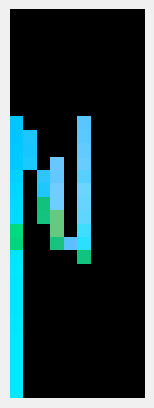

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


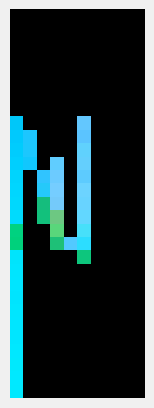

distance:


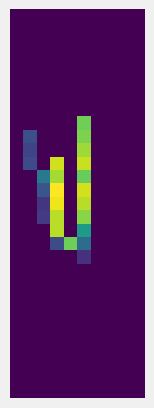

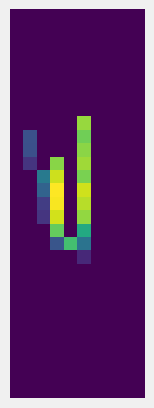

97/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.13it/s]


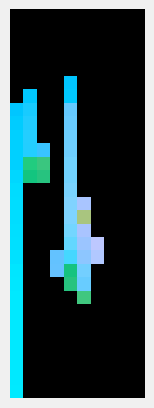

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


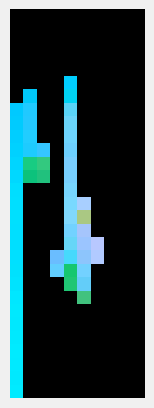

distance:


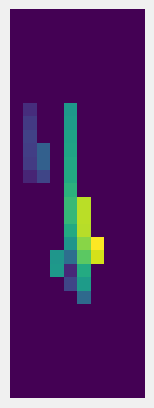

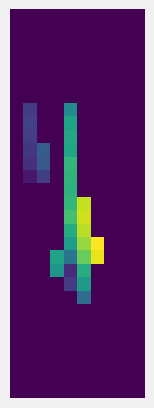

98/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 24.02it/s]


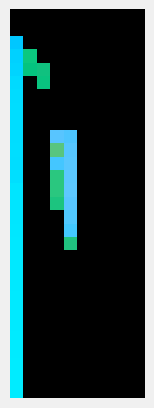

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


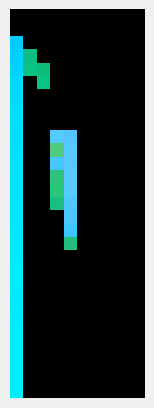

distance:


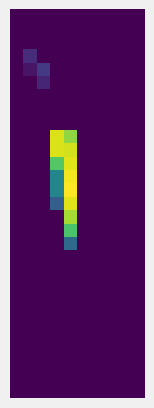

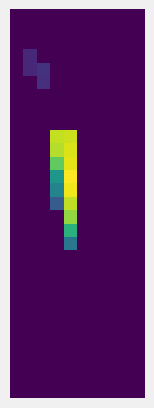

99/100


100%|█████████████████████████████████████████| 300/300 [00:12<00:00, 23.83it/s]


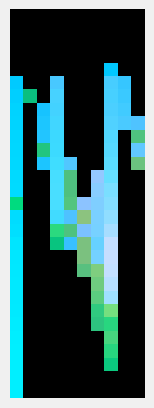

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


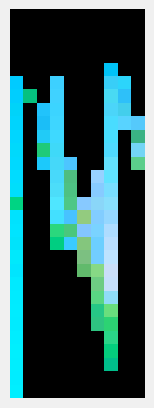

distance:


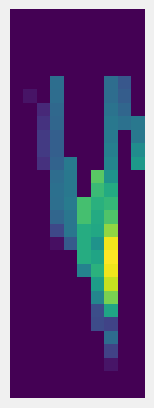

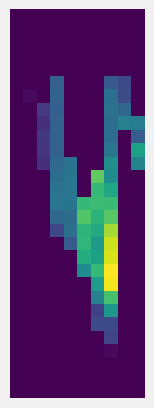

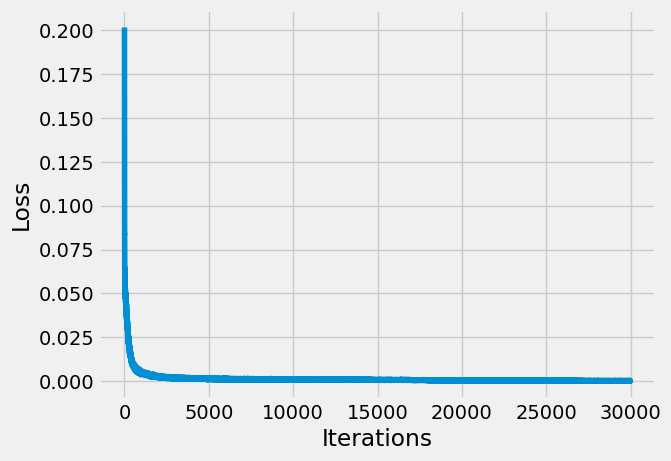

In [19]:
dataset_zero_one = torch.load('data/dataset_zero_one.pt')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nsnap = dataset.shape[2]
nbr = dataset.shape[3]
nvar = dataset.shape[1]
printer = False

batch_size = 128
latent_size = 300

loader = DataLoader(clip_norm_dist_dataset, shuffle=True, batch_size = batch_size)
encoder_small = Encoder_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)
decoder_small = Generator_CGAN(nvar, nsnap, nbr, latent_size, printer).to(device)

model_small = AE(encoder_small, decoder_small)

optimizer = torch.optim.Adam(model_small.parameters(), lr = 3e-4, weight_decay = 1e-8)

epochs = 100
outputs_small = []
losses_small = []
images_small = []
reconstructed_images_small = []
for epoch in range(epochs):
    print(f"{epoch}/{epochs}")
    for image in tqdm.tqdm(loader):
        image_small = image.to(dtype=torch.float32)
        # Reshaping the image to (-1, 784)
        
        # Output of Autoencoder
        reconstructed_small = model_small(image_small)
        
        if epoch == epochs - 1:
            images_small.append(image_small)
            reconstructed_images_small.append(reconstructed_small.detach())

        # Calculating the loss function
        loss = custom_reconstruction_loss(reconstructed_small, image_small)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses_small.append(loss.detach().numpy())
        outputs_small.append((epochs, image_small, reconstructed_small))
        
    img = image_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0].permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    print("distance:")
    img = image_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()
    
    img = reconstructed_small[0, 0].unsqueeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.axis('off')  # Optional: Turn off axis ticks and labels
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses_small)

In [20]:
reconstructed = torch.cat(reconstructed_images_small, dim = 0)
images = torch.cat(images_small, dim = 0)

reconstructed_dist = reconstructed[:, 0]
image_dist = images[:, 0]

print("\nOverall:")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed.min() == 0.0}")
zero_count = (reconstructed == 0).sum().item()
total_elements = reconstructed.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {images.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {images.min() == 0.0}")
zero_count = (images == 0).sum().item()
total_elements = images.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(images, reconstructed)


print("\n")
print("\n")
print("\nDistance")
print("\nChecking zero values in reconstructed image:")
print(f"minimum value in reconstructed image = {reconstructed_dist.min():.10f}")
print(f"Is minimum value in reconstructed image 0.0 = {reconstructed_dist.min() == 0.0}")
zero_count = (reconstructed_dist == 0).sum().item()
total_elements = reconstructed_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

print("\nChecking zero values in original image:")
print(f"minimum value in reconstructed image = {image_dist.min():.6f}")
print(f"Is minimum value in reconstructed image 0.0 = {image_dist.min() == 0.0}")
zero_count = (image_dist == 0).sum().item()
total_elements = image_dist.numel()
percentage_zero = (zero_count / total_elements) * 100
print("Percentage of zero elements:", round(percentage_zero, 2), "%")

have_same_zero_values(image_dist, reconstructed_dist)


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.6 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.92% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.38 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.92% of the same

# testing with big model

# reference normal normalization

0/20


100%|█████████████████████████████████████████| 300/300 [05:24<00:00,  1.08s/it]


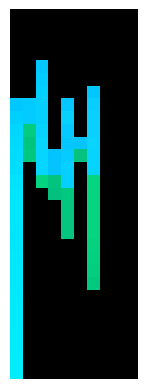

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


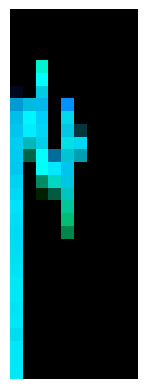

distance:


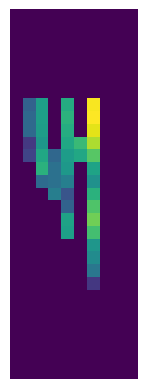

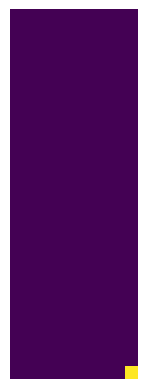

1/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


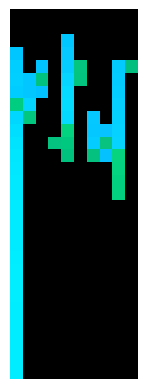

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


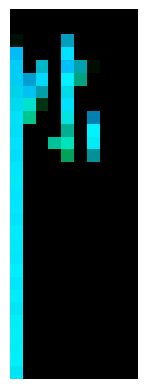

distance:


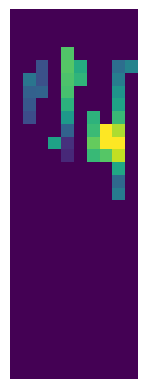

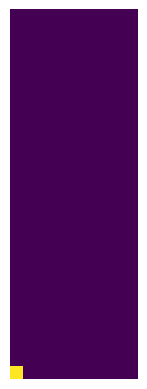

2/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


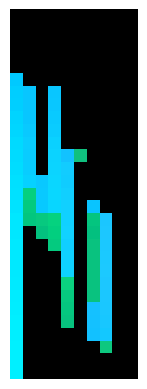

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


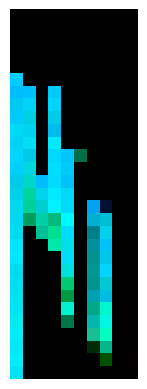

distance:


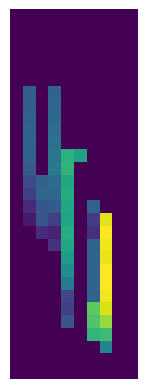

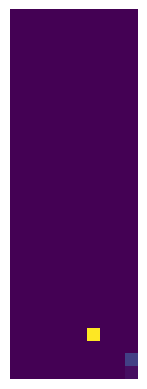

3/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.07s/it]


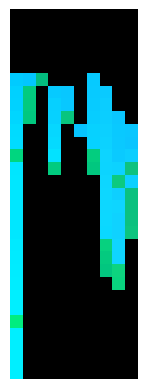

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


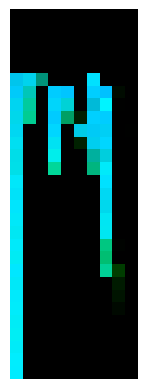

distance:


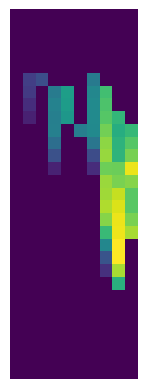

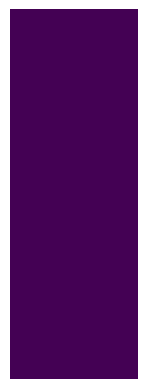

4/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.06s/it]


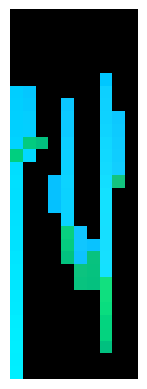

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


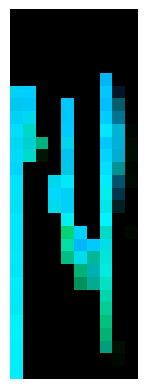

distance:


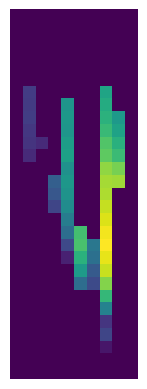

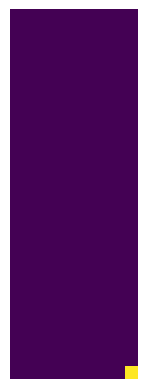

5/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.06s/it]


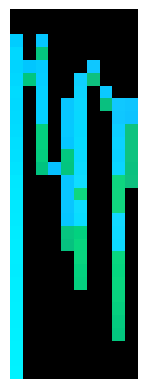

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


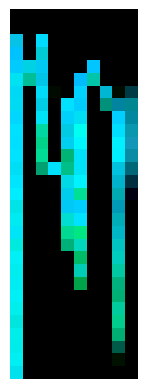

distance:


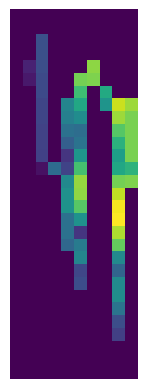

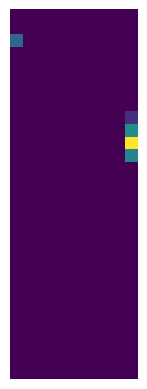

6/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


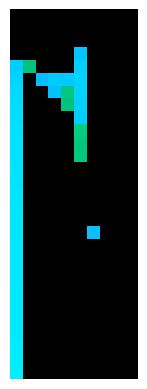

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


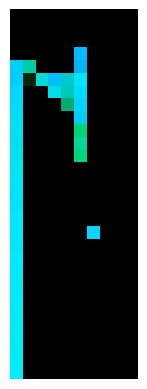

distance:


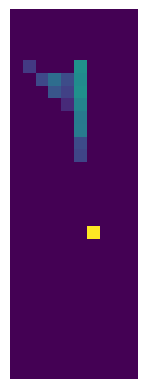

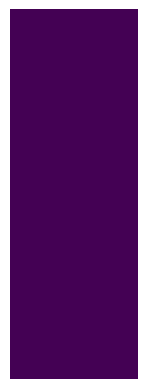

7/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.06s/it]


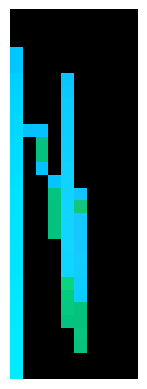

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


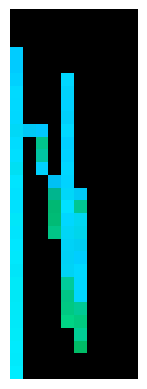

distance:


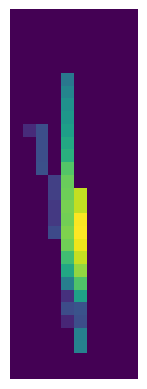

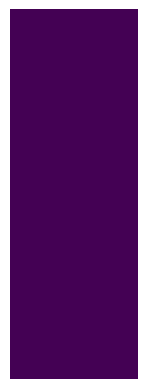

8/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.07s/it]


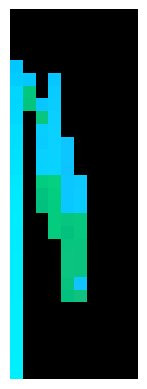

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


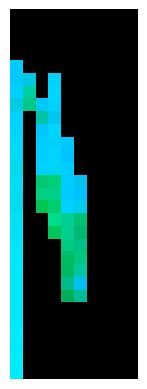

distance:


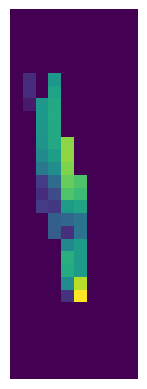

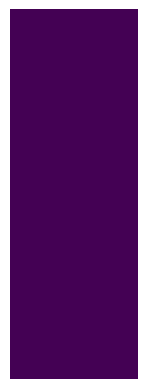

9/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


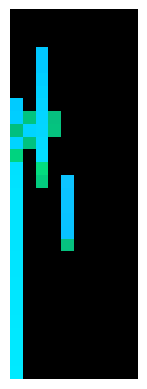

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


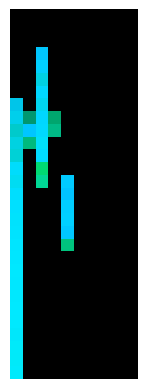

distance:


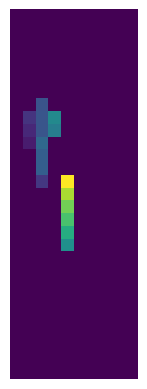

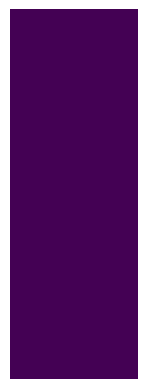

10/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


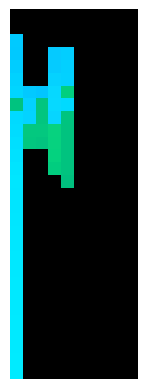

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


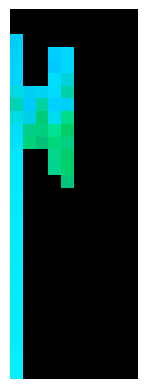

distance:


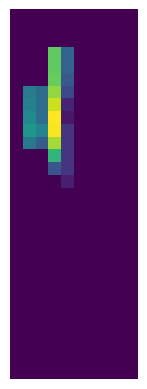

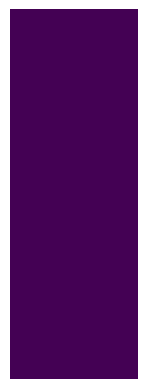

11/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


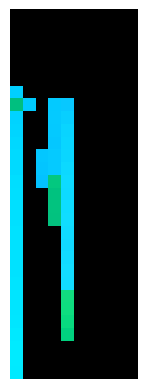

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


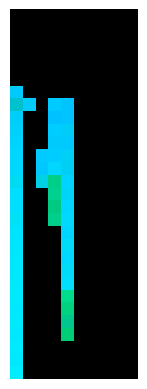

distance:


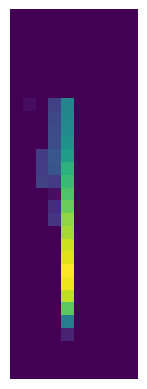

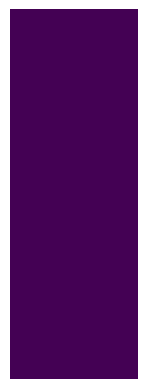

12/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


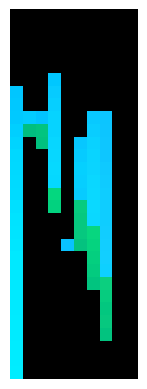

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


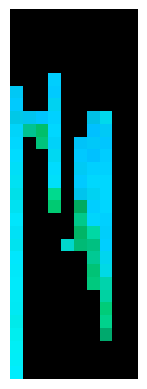

distance:


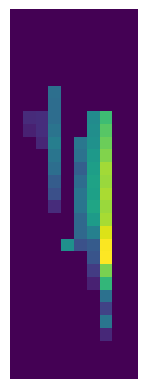

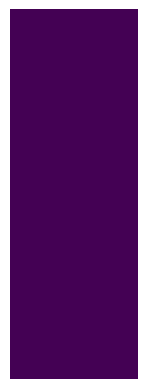

13/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


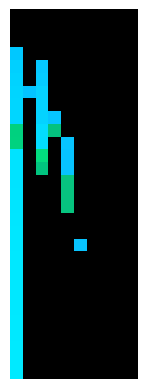

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


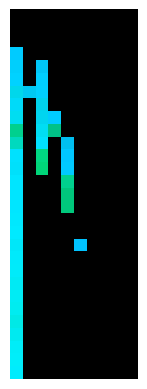

distance:


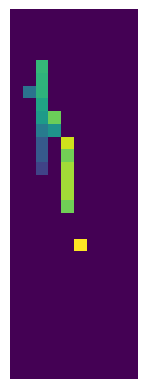

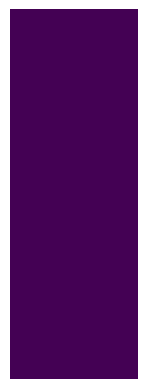

14/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.08s/it]


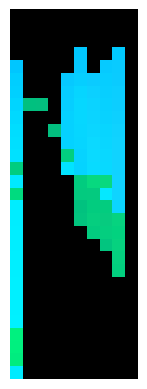

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


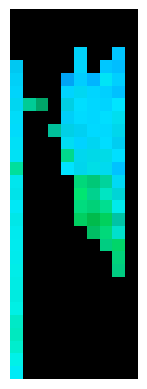

distance:


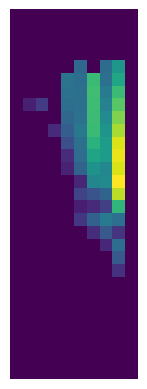

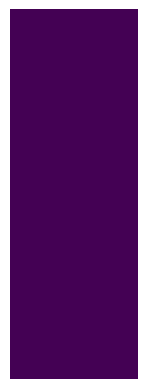

15/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


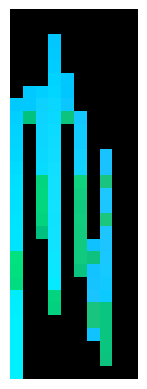

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


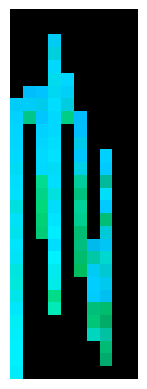

distance:


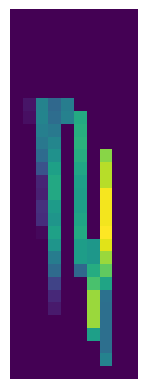

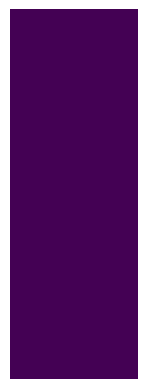

16/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.06s/it]


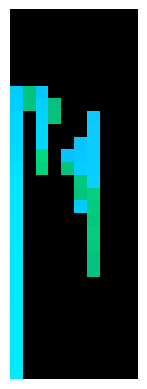

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


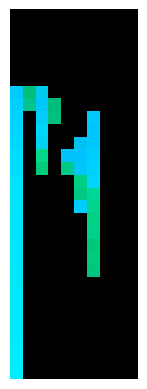

distance:


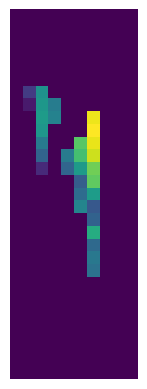

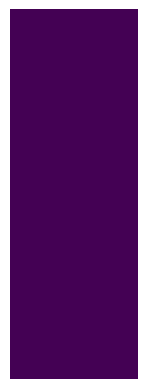

17/20


100%|█████████████████████████████████████████| 300/300 [06:05<00:00,  1.22s/it]


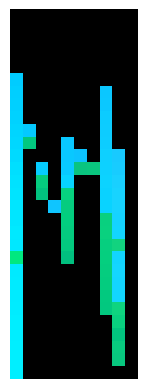

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


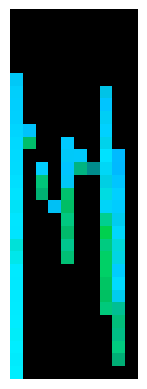

distance:


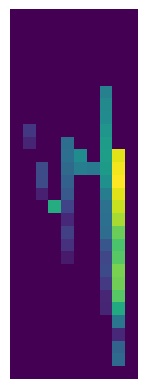

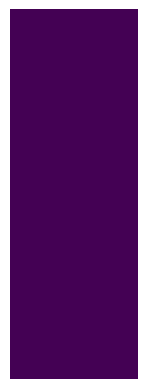

18/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


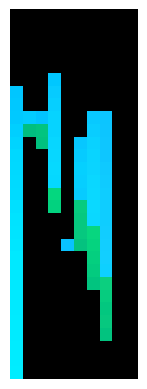

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


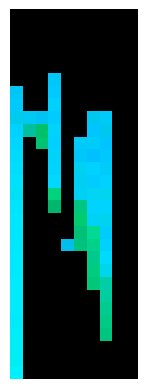

distance:


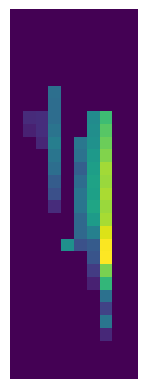

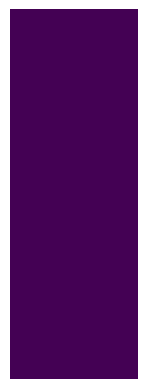

19/20


100%|█████████████████████████████████████████| 300/300 [05:18<00:00,  1.06s/it]


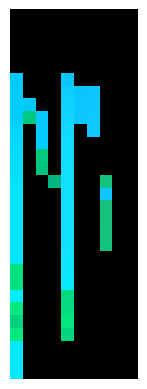

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


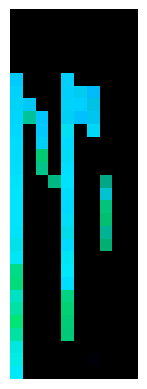

distance:


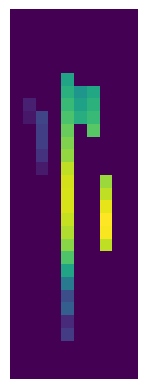

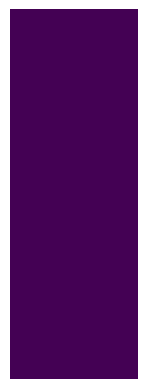


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 85.06 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 95.49% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 99.77 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 86.57% of the sam

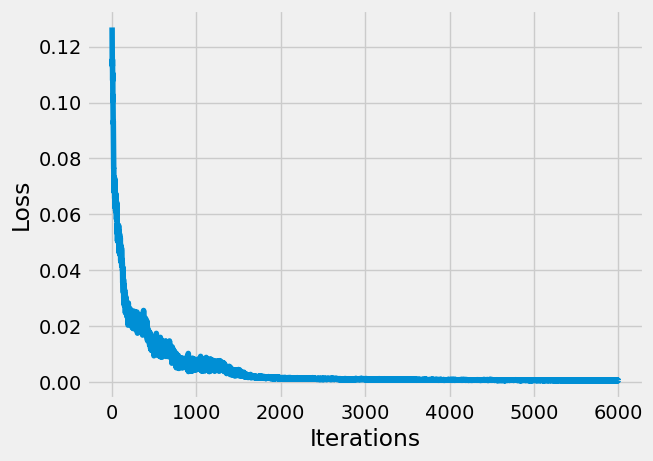

In [27]:
num_epochs = 20
loss_function = custom_reconstruction_loss
outputs, losses, images, reconstructed_images = training_notebook3_0(dataset_zero_one, num_epochs, loss_function)

analyze_notebook3_0(reconstructed_images, images)

# test log scale and minmax normalization

0/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


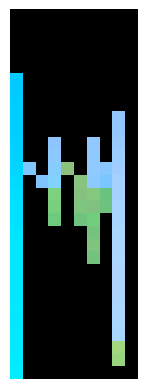

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


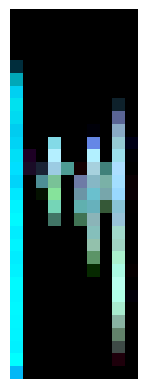

distance:


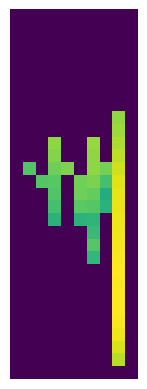

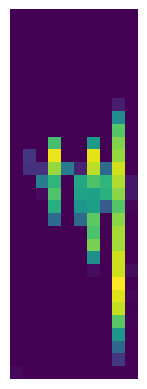

1/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


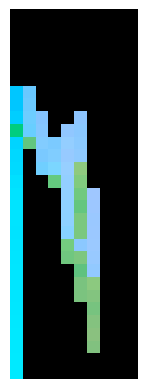

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


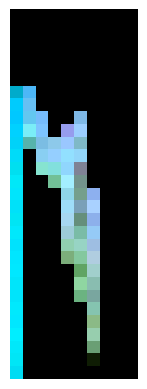

distance:


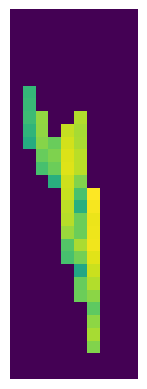

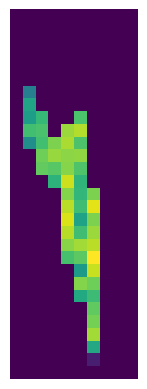

2/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.07s/it]


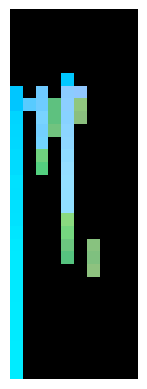

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


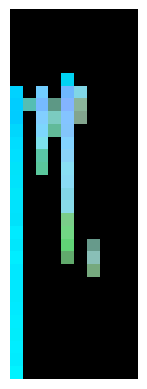

distance:


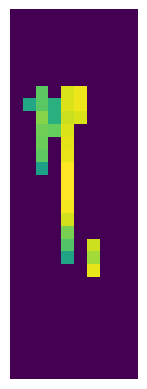

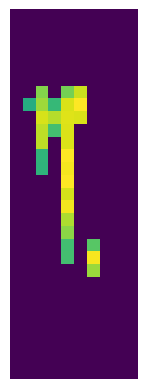

3/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


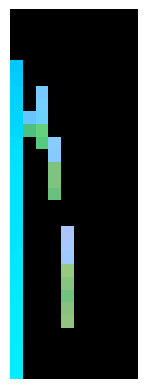

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


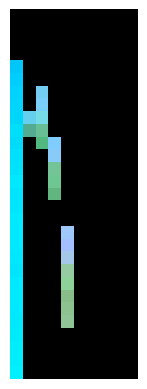

distance:


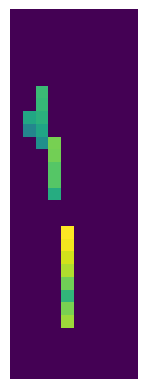

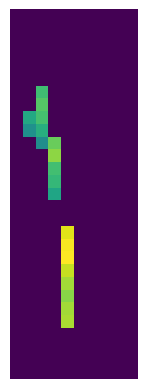

4/20


100%|█████████████████████████████████████████| 300/300 [05:28<00:00,  1.09s/it]


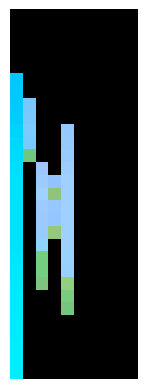

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


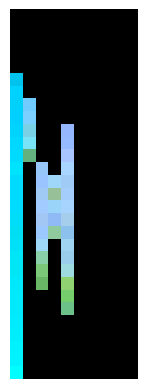

distance:


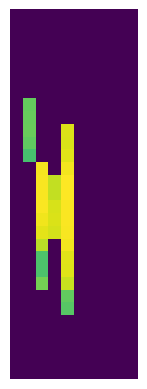

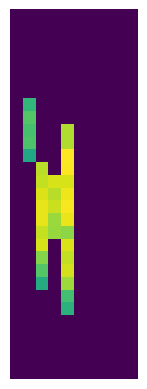

5/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.07s/it]


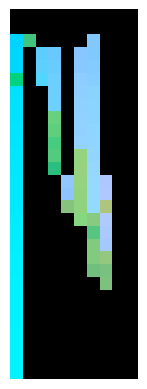

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


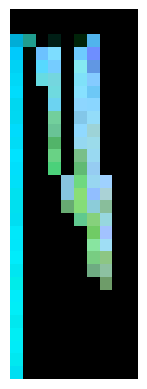

distance:


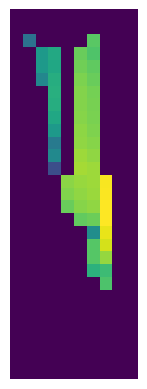

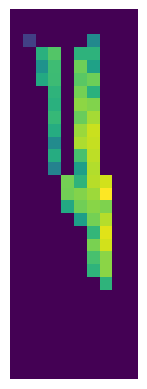

6/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.08s/it]


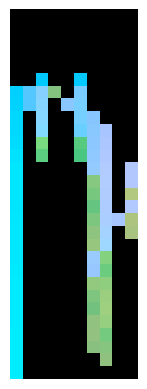

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


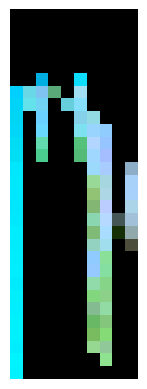

distance:


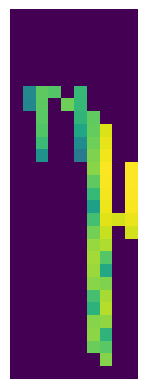

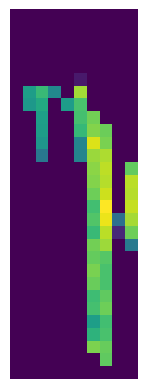

7/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


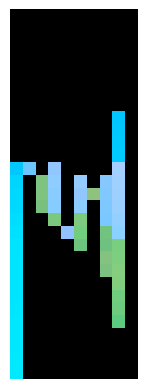

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


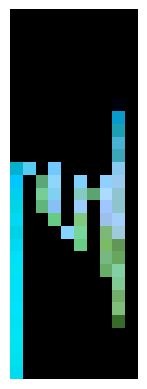

distance:


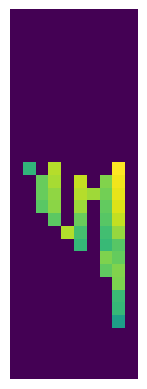

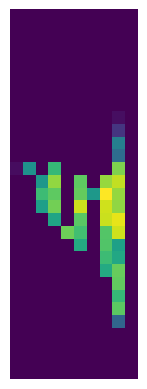

8/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


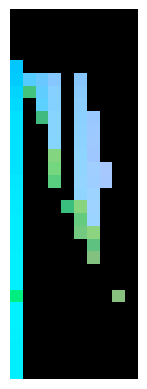

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


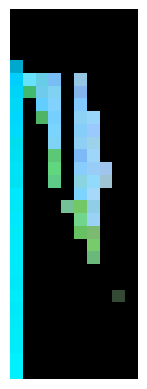

distance:


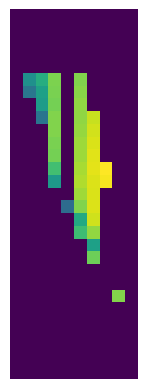

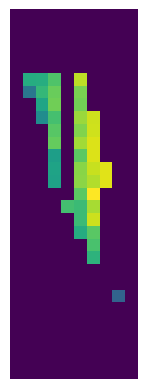

9/20


100%|█████████████████████████████████████████| 300/300 [05:22<00:00,  1.08s/it]


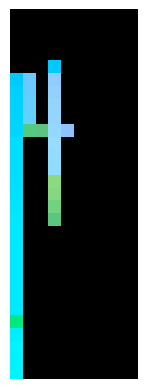

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


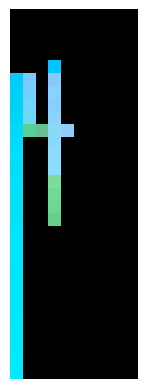

distance:


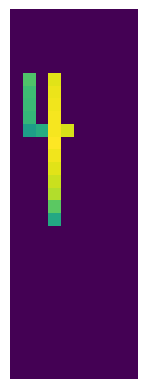

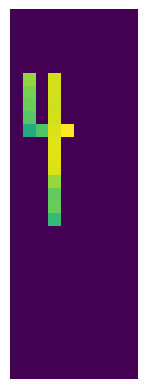

10/20


100%|█████████████████████████████████████████| 300/300 [05:26<00:00,  1.09s/it]


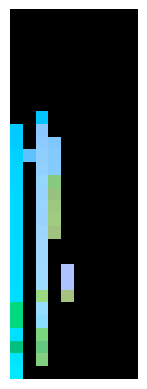

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


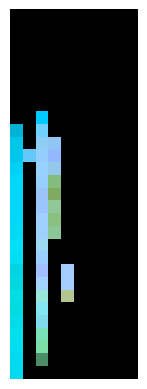

distance:


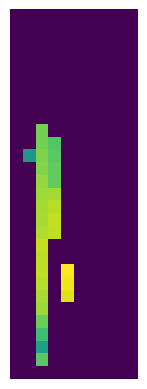

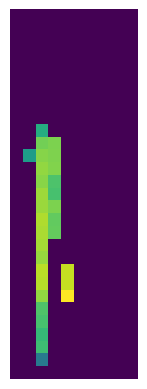

11/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


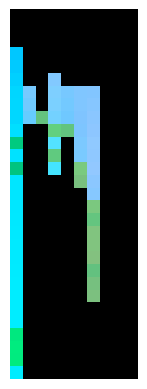

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


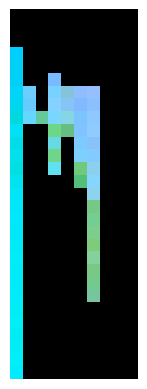

distance:


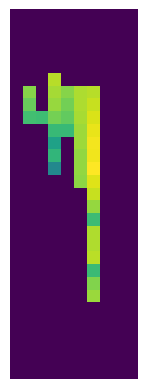

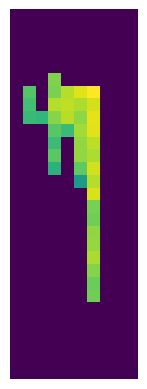

12/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


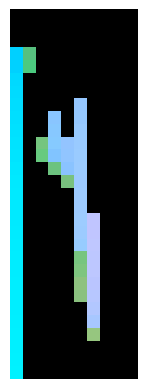

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


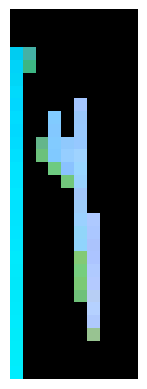

distance:


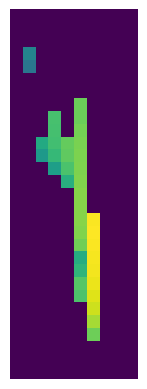

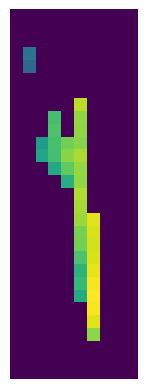

13/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


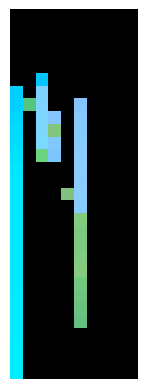

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


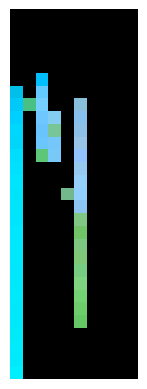

distance:


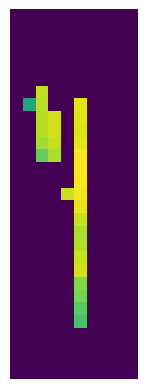

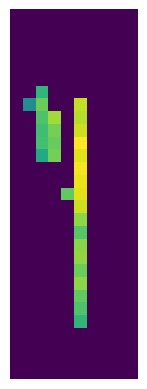

14/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


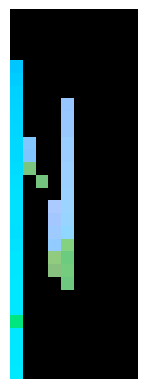

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


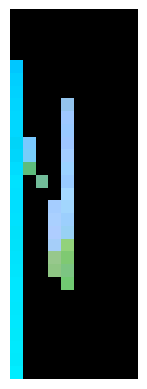

distance:


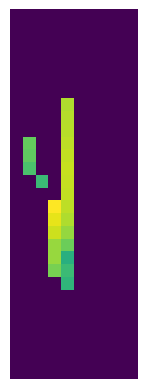

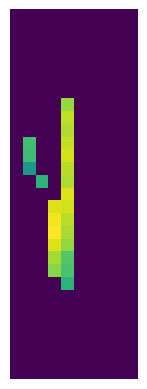

15/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


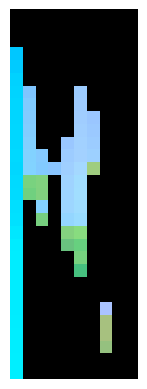

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


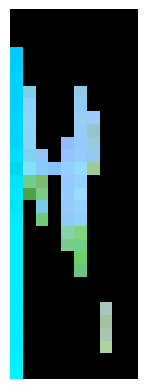

distance:


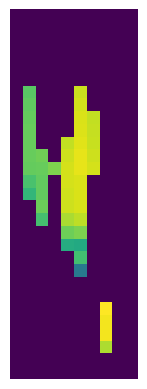

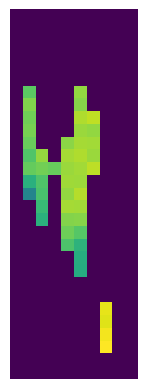

16/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


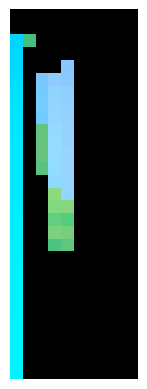

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


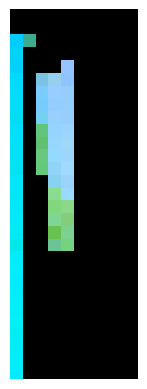

distance:


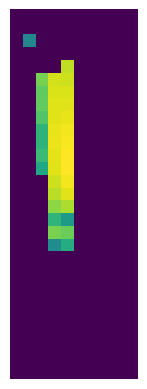

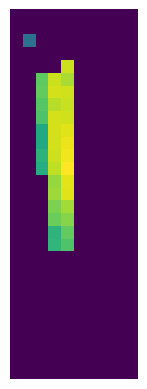

17/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


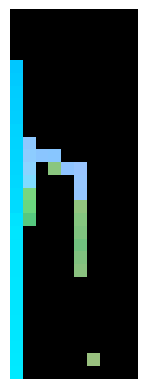

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


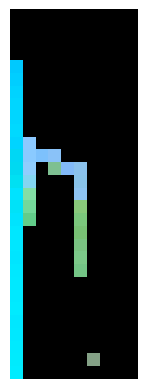

distance:


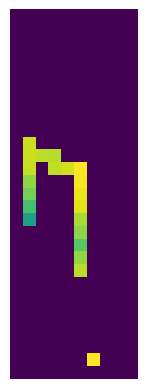

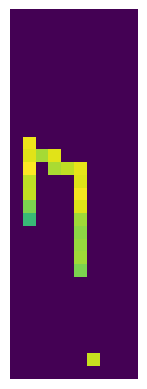

18/20


100%|█████████████████████████████████████████| 300/300 [05:24<00:00,  1.08s/it]


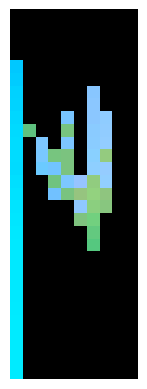

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


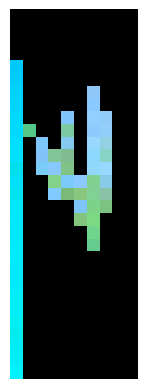

distance:


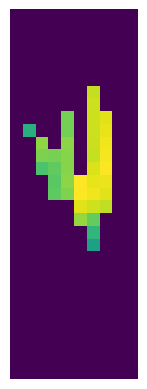

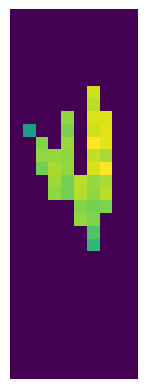

19/20


100%|█████████████████████████████████████████| 300/300 [05:18<00:00,  1.06s/it]


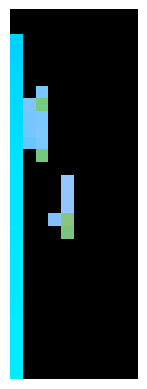

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


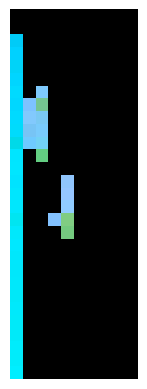

distance:


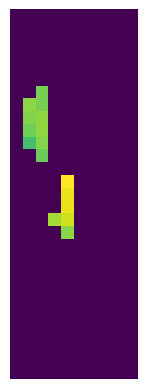

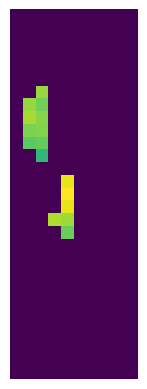


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.58 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.95% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.29 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.93% of the sam

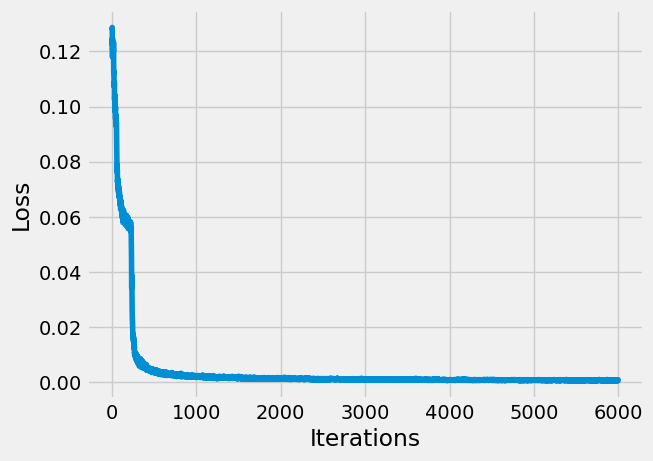

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 20
loss_function = custom_reconstruction_loss
outputs, losses, images, reconstructed_images = training_notebook3_0(log_norm_dist_dataset, num_epochs, loss_function)

analyze_notebook3_0(reconstructed_images, images)

# clipping

0/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


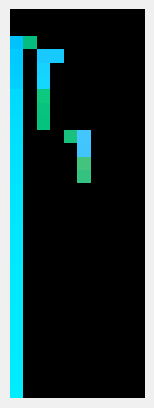

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


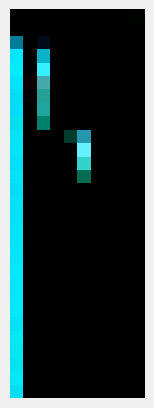

distance:


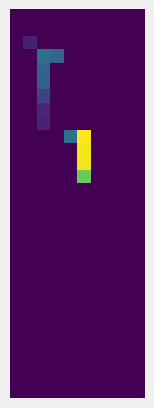

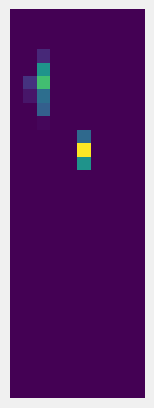

1/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


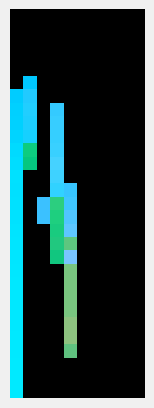

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


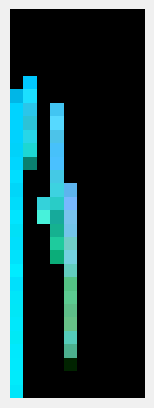

distance:


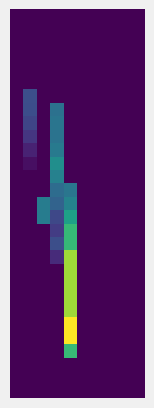

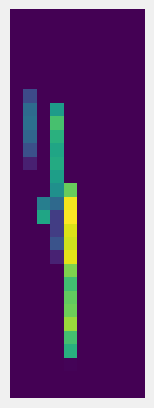

2/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.07s/it]


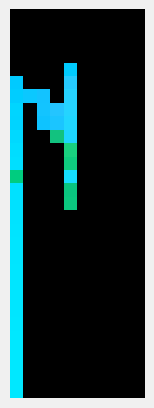

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


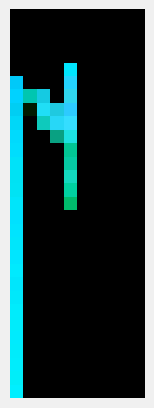

distance:


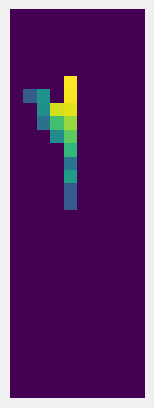

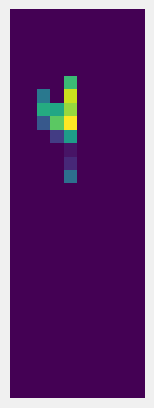

3/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


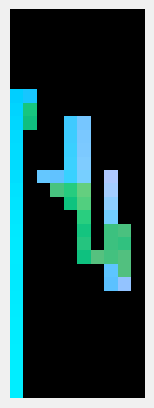

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


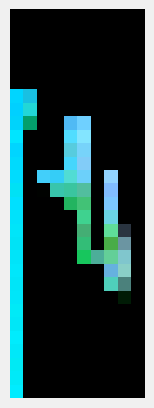

distance:


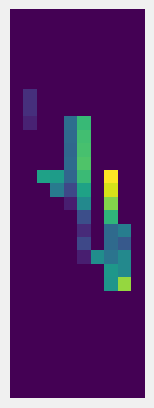

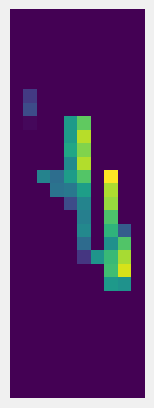

4/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


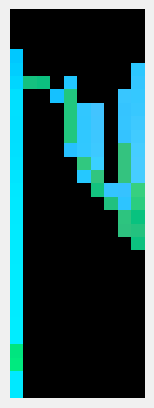

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


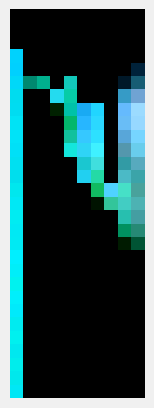

distance:


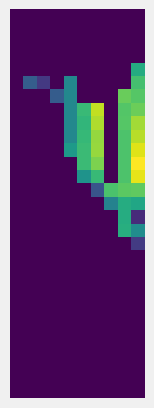

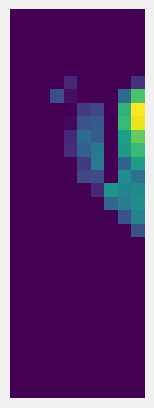

5/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


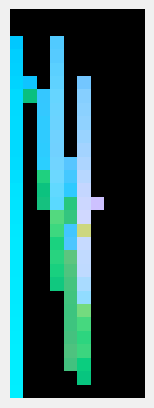

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


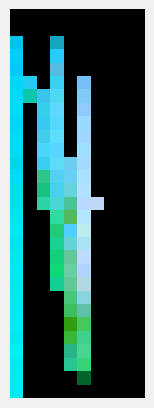

distance:


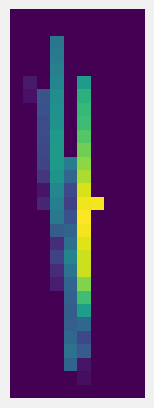

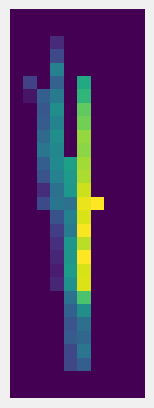

6/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.06s/it]


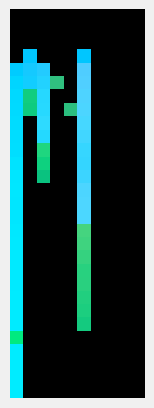

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


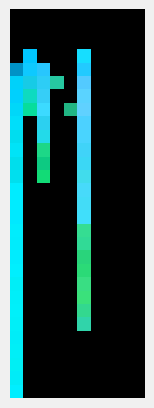

distance:


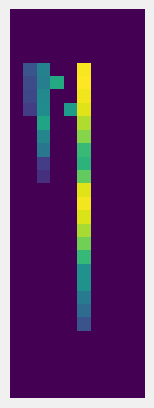

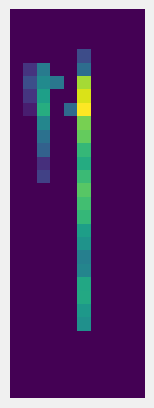

7/20


100%|█████████████████████████████████████████| 300/300 [05:18<00:00,  1.06s/it]


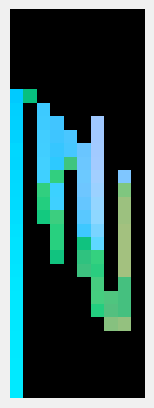

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


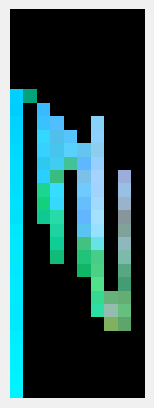

distance:


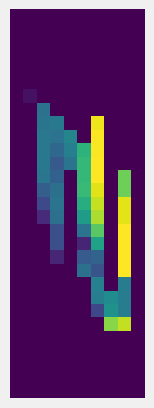

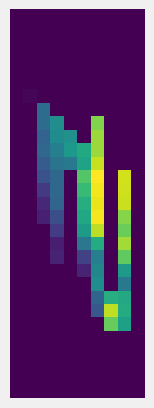

8/20


100%|█████████████████████████████████████████| 300/300 [05:18<00:00,  1.06s/it]


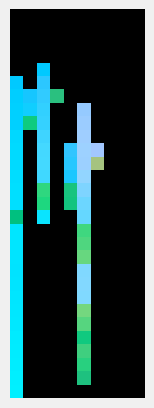

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


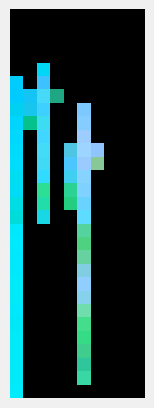

distance:


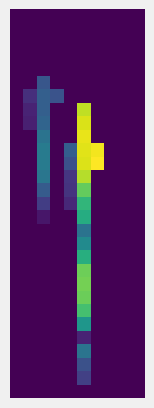

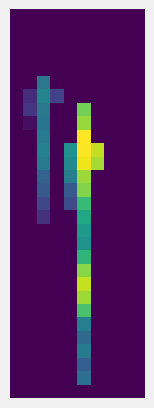

9/20


100%|█████████████████████████████████████████| 300/300 [05:17<00:00,  1.06s/it]


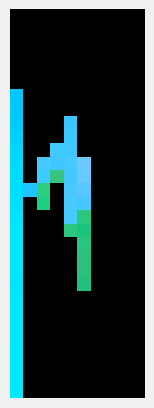

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


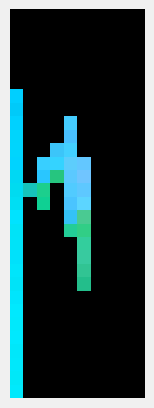

distance:


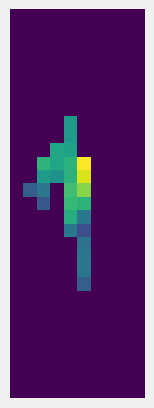

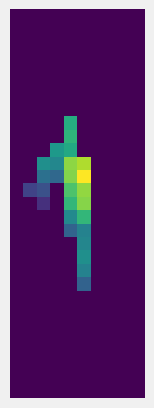

10/20


100%|█████████████████████████████████████████| 300/300 [05:17<00:00,  1.06s/it]


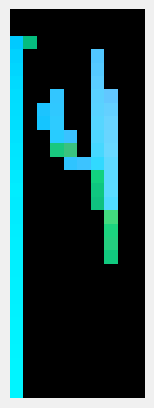

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


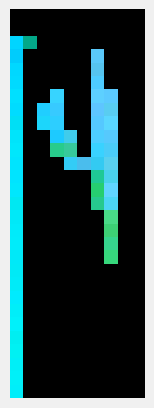

distance:


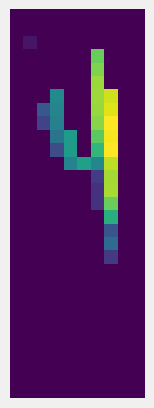

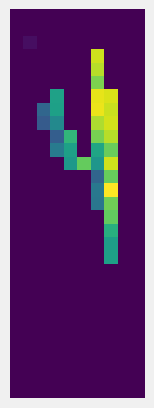

11/20


100%|█████████████████████████████████████████| 300/300 [05:17<00:00,  1.06s/it]


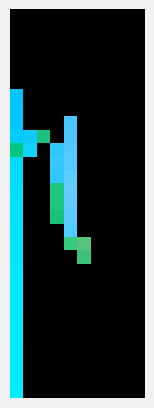

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


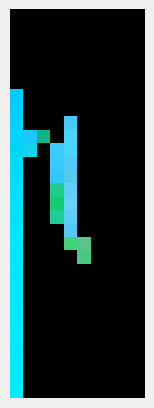

distance:


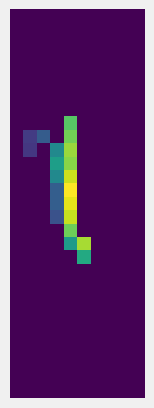

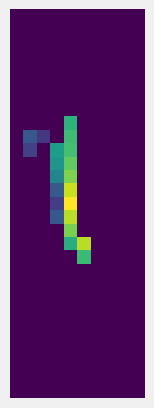

12/20


100%|█████████████████████████████████████████| 300/300 [05:18<00:00,  1.06s/it]


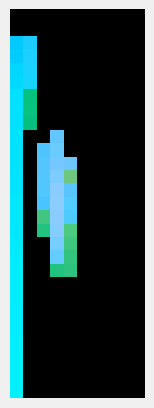

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


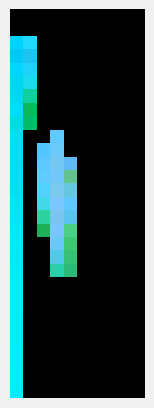

distance:


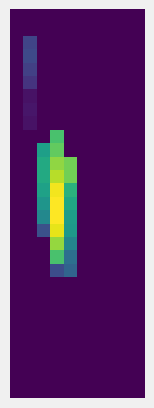

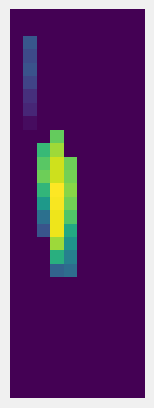

13/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


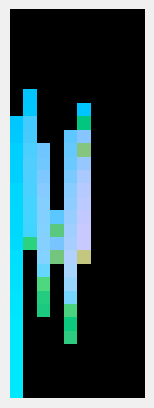

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


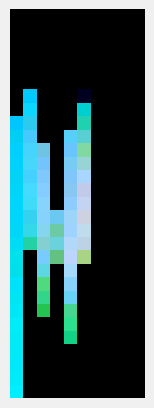

distance:


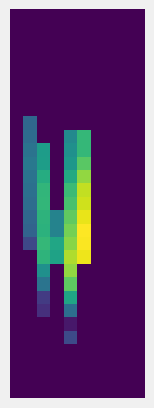

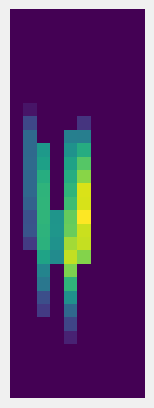

14/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


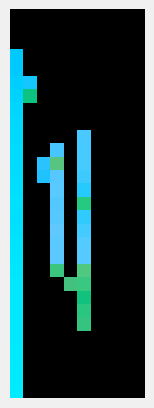

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


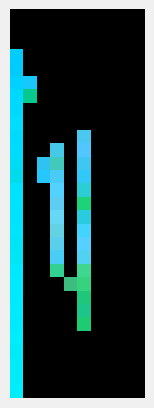

distance:


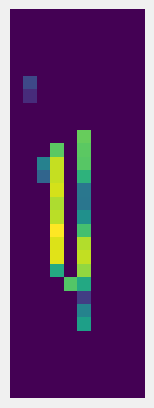

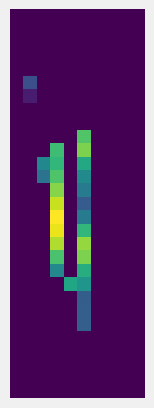

15/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


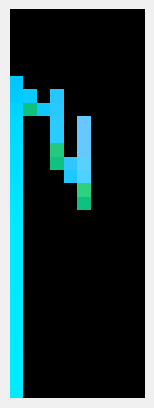

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


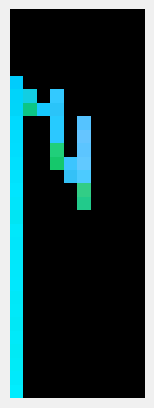

distance:


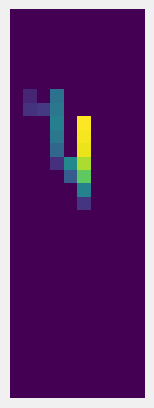

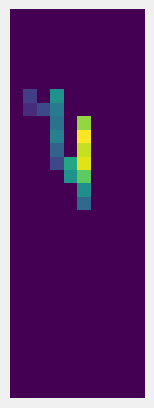

16/20


100%|█████████████████████████████████████████| 300/300 [05:21<00:00,  1.07s/it]


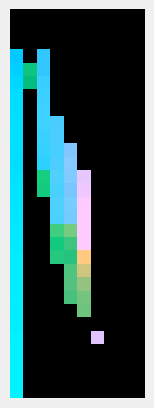

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


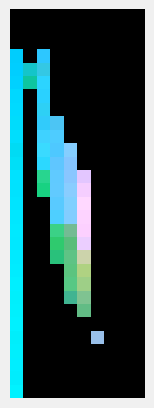

distance:


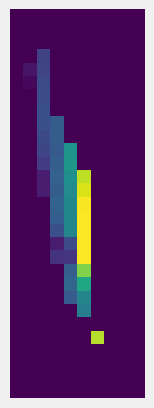

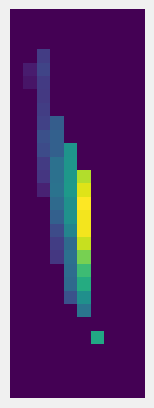

17/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


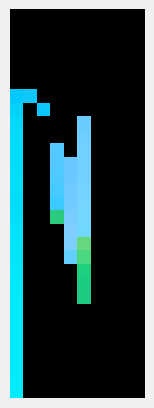

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


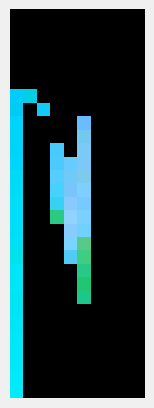

distance:


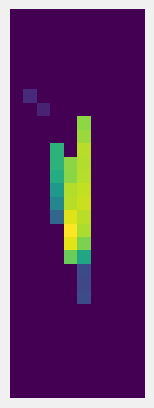

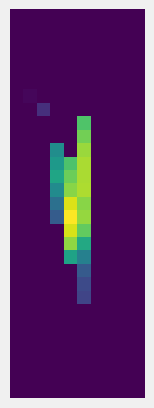

18/20


100%|█████████████████████████████████████████| 300/300 [05:20<00:00,  1.07s/it]


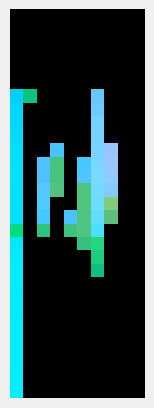

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


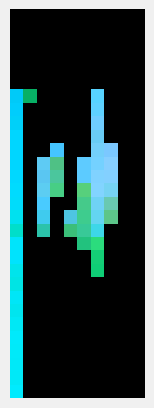

distance:


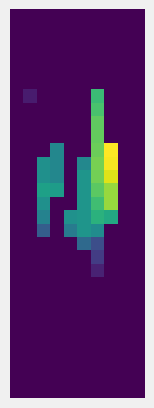

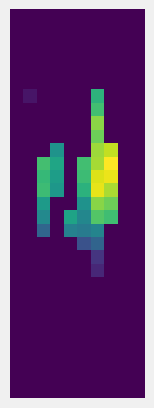

19/20


100%|█████████████████████████████████████████| 300/300 [05:19<00:00,  1.07s/it]


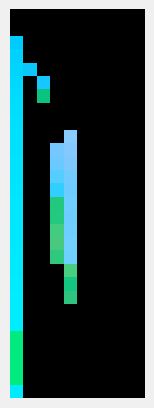

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


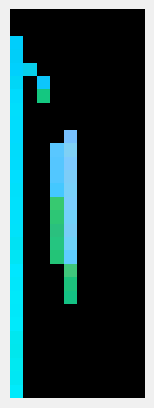

distance:


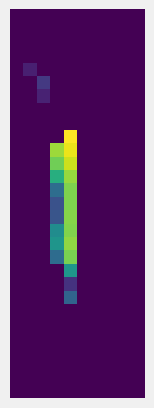

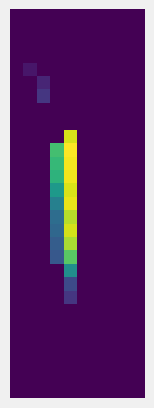


Overall:

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.6 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 80.61 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.93% of the same spots





Distance

Checking zero values in reconstructed image:
minimum value in reconstructed image = 0.0000000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.38 %

Checking zero values in original image:
minimum value in reconstructed image = 0.000000
Is minimum value in reconstructed image 0.0 = True
Percentage of zero elements: 86.35 %
the two tensors have zeroes in the same spots = False
the two tensors have zeroes and nonzero values in 99.88% of the same

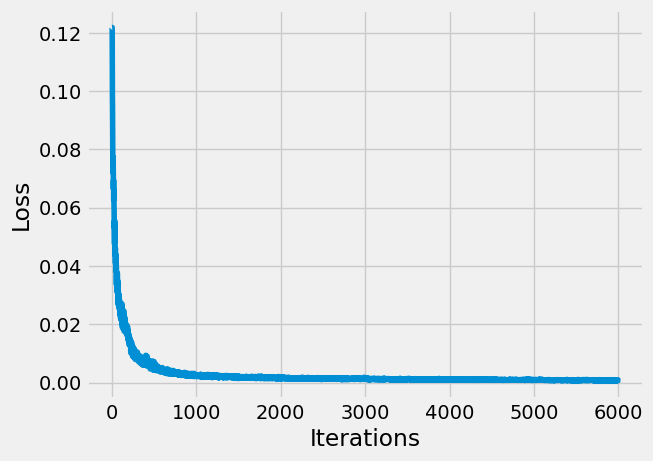

In [23]:
num_epochs = 20
loss_function = custom_reconstruction_loss
outputs, losses, images, reconstructed_images = training_notebook3_0(clip_norm_dist_dataset, num_epochs, loss_function)

analyze_notebook3_0(reconstructed_images, images)

In [26]:
print(log_norm_dist_dataset.shape)
print(log_norm_dist_dataset[:,0].min())
print(log_norm_dist_dataset[:,0].max())
print(log_norm_dist_dataset[:,0].mean())
print(log_norm_dist_dataset[:,1].min())
print(log_norm_dist_dataset[:,1].max())
print(log_norm_dist_dataset[:,1].mean())
print(log_norm_dist_dataset[:,2].min())
print(log_norm_dist_dataset[:,2].max())
print(log_norm_dist_dataset[:,2].mean())

torch.Size([38348, 3, 29, 10])
tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.0726, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.1852, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(1., dtype=torch.float64)
tensor(0.1964, dtype=torch.float64)


In [28]:
torch.save(log_norm_dist_dataset, 'data/dataset_distlognorm_massnorm.pt')
print(f"Saved log scale normalized dataset as dataset_distlognorm_massnorm.pt")

Saved log scale normalized dataset as dataset_distlognorm_massnorm.pt
